## Importing Dataset

In [1]:
import numpy as np
import pandas as pd
import json
from sklearn.model_selection import train_test_split
import time
import gc
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout , LSTM

In [2]:
DATA_PATH = "Datasets\\New_datasets\\Data_feature_MFCC.json"

In [3]:
# Function to load data

def load_data(data_path):
    
    with open(data_path, "r") as fp:
        data = json.load(fp)

  # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return X, y

In [4]:
X, y = load_data(DATA_PATH)

Data succesfully loaded!


In [5]:
X.shape

(3020, 259, 128)

In [6]:
y.shape

(3020,)

In [7]:
import gc
gc.collect()

0

# SVM 

In [8]:
import gc
gc.collect()

0

In [9]:
# parameters = [{'C': [0.1, 1, 5, 10, 50, 100,500], 'kernel': ['linear']},
#               {'C': [0.1, 1, 5, 10, 50, 100,500], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,10,100]}]

In [10]:
# from sklearn.model_selection import GridSearchCV, ShuffleSplit

In [11]:
# shuffle_split = ShuffleSplit(n_splits=1, test_size=0.3)

In [12]:
# grid_search = GridSearchCV(svc, param_grid = parameters, scoring='accuracy',cv=shuffle_split,n_jobs=-1,verbose=10)

In [13]:
# grid_search.fit(X,y)

In [14]:
# print("Best hyperparameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

In [15]:
import gc
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_svm = []
y_test_all = []
times_svm = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    model_svm = SVC(kernel='rbf')
    
    start_time = time.time()
    
    model_svm.fit(X_train, y_train)
    
    end_time = time.time()
    
    x = model_svm.predict(X_test)
    scores_svm.append(x)
    times_svm.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [16]:
times_svm

[816.6708648204803,
 810.6157236099243,
 810.3115653991699,
 814.6800720691681,
 808.4488339424133,
 807.0510549545288,
 812.7046360969543,
 803.2413845062256,
 805.8137137889862,
 804.8593864440918]

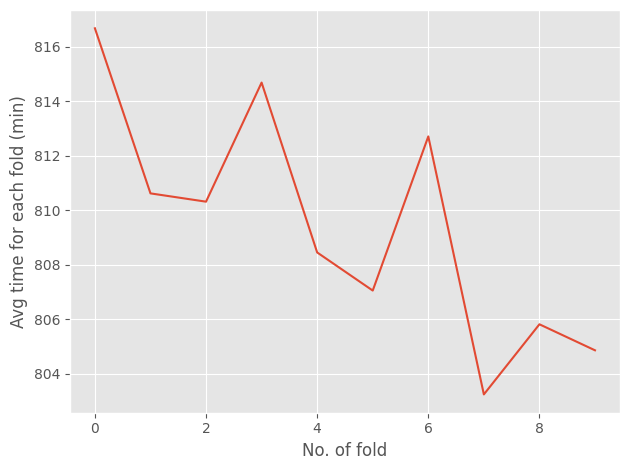

In [17]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(times_svm)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold (min)")
plt.tight_layout()
plt.savefig("svm times")
plt.show()

In [18]:
np.array(y_test_all).shape

(10, 302)

In [19]:
np.array(scores_svm).shape

(10, 302)

In [20]:
from sklearn.metrics import accuracy_score
acc_scores_svm = []
for i in range(len(y_test_all)):
    acc_scores_svm.append(accuracy_score(y_test_all[i],scores_svm[i]))

In [21]:
acc_scores_svm

[0.6258278145695364,
 0.6324503311258278,
 0.6490066225165563,
 0.6324503311258278,
 0.6192052980132451,
 0.5629139072847682,
 0.6225165562913907,
 0.6225165562913907,
 0.6026490066225165,
 0.6158940397350994]

In [22]:
df_acc = pd.DataFrame([acc_scores_svm])

df_acc.to_csv('svm_accuracy', index=False)

df_acc = pd.read_csv('svm_accuracy')

acc_scores_svm = df_acc.iloc[0].values

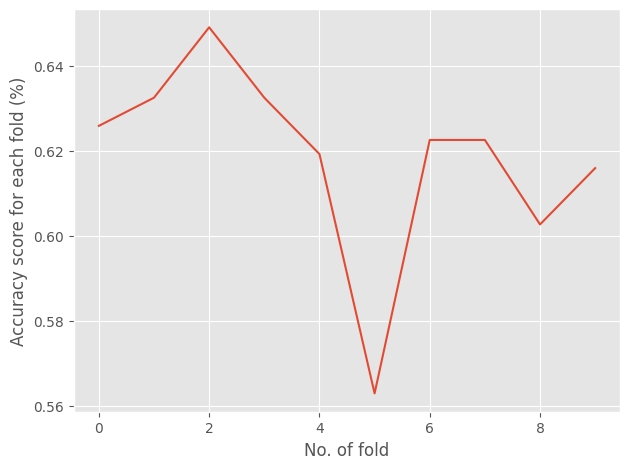

In [23]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_svm)
plt.xlabel("No. of fold")
plt.ylabel("Accuracy score for each fold (%)")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("svm accuracy")
plt.show()

In [24]:
scores_svm_n = np.array(scores_svm)
y_test_all_n = np.array(y_test_all)

scores_svm_n = scores_svm_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [25]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_svm_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 61.85%


In [26]:
import gc
gc.collect()

6598

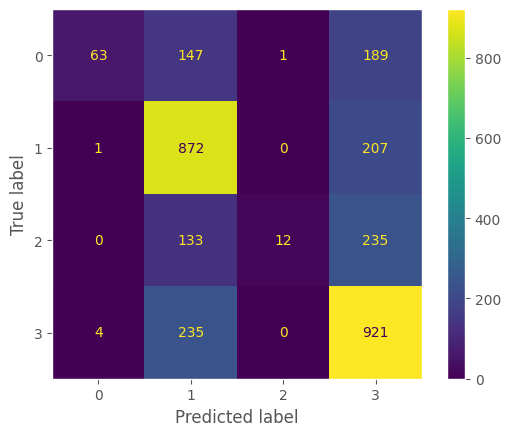

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_svm_n, labels=model_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_svm.classes_)
disp.plot()
plt.grid(False)
plt.savefig("svm")
plt.show()

In [28]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_svm_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.93      0.16      0.27       400
           1       0.63      0.81      0.71      1080
           2       0.92      0.03      0.06       380
           3       0.59      0.79      0.68      1160

    accuracy                           0.62      3020
   macro avg       0.77      0.45      0.43      3020
weighted avg       0.69      0.62      0.56      3020



## Decision Tree

In [29]:
import gc
gc.collect()

5

In [30]:
import gc
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_dtc = []
times_dtc = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    dtc = DecisionTreeClassifier()
    
    
    start_time = time.time()
    dtc.fit(X_train, y_train)
    end_time = time.time()
    
    
    x = dtc.predict(X_test)
    
    scores_dtc.append(x)
    times_dtc.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [31]:
times_dtc

[96.61901259422302,
 91.77284836769104,
 90.8270275592804,
 85.66038274765015,
 99.77169418334961,
 102.64470291137695,
 103.83789372444153,
 89.64225244522095,
 88.52062034606934,
 84.60172247886658]

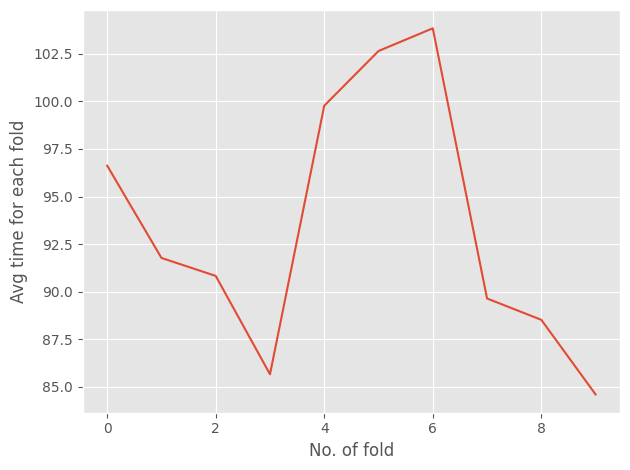

In [32]:
import matplotlib.pyplot as plt

plt.plot(times_dtc)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("dtc times")
plt.show()

In [33]:
np.array(y_test_all).shape

(10, 302)

In [34]:
np.array(scores_dtc).shape

(10, 302)

In [35]:
from sklearn.metrics import accuracy_score
acc_scores_dtc = []
for i in range(len(y_test_all)):
    acc_scores_dtc.append(accuracy_score(y_test_all[i],scores_dtc[i]))

In [36]:
acc_scores_dtc

[0.4867549668874172,
 0.48344370860927155,
 0.4768211920529801,
 0.3973509933774834,
 0.423841059602649,
 0.41721854304635764,
 0.45695364238410596,
 0.4105960264900662,
 0.4205298013245033,
 0.3708609271523179]

In [37]:
df_acc = pd.DataFrame([acc_scores_dtc])

df_acc.to_csv('dtc_accuracy', index=False)

df_acc = pd.read_csv('dtc_accuracy')

acc_scores_dtc = df_acc.iloc[0].values

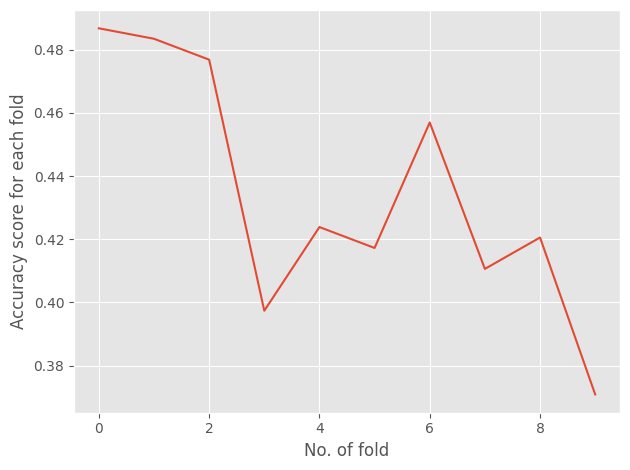

In [38]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_dtc)
plt.xlabel("No. of fold")
plt.ylabel("Accuracy score for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("dtc accuracy")
plt.show()

In [39]:
import gc
gc.collect()

3336

In [40]:
scores_dtc_n = np.array(scores_dtc)
y_test_all_n = np.array(y_test_all)

scores_dtc_n = scores_dtc_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [41]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_dtc_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 43.44%


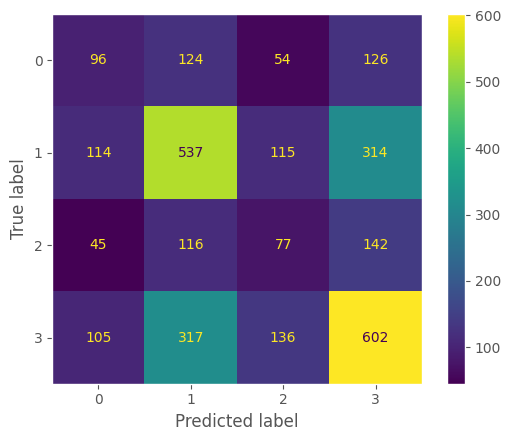

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_dtc_n, labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtc.classes_)
disp.plot()
plt.grid(False)
plt.savefig("DTC")
plt.show()

In [43]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_dtc_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.27      0.24      0.25       400
           1       0.49      0.50      0.49      1080
           2       0.20      0.20      0.20       380
           3       0.51      0.52      0.51      1160

    accuracy                           0.43      3020
   macro avg       0.37      0.36      0.37      3020
weighted avg       0.43      0.43      0.43      3020



In [44]:
# val = np.arange(100,500,20)
# parameters = [{'max_depth':val}]

In [45]:
# parameters

In [46]:
# shuffle_split = ShuffleSplit(n_splits=1, test_size=0.3)

In [47]:
# grid_search_dtc = GridSearchCV(dtc, param_grid = parameters, scoring='accuracy',cv=shuffle_split ,verbose = 3)

In [48]:
# grid_search_dtc.fit(X_train,y_train)

In [49]:
# print("Best hyperparameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

# Random Forest

In [50]:
import gc
gc.collect()

6038

In [51]:
import gc
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_rdf = []
times_rdf = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    rdf = RandomForestClassifier()
    
    #start time
    start_time = time.time()             
    
    rdf.fit(X_train, y_train)
    
    #end time
    end_time = time.time()     
    
    x = rdf.predict(X_test)
    scores_rdf.append(x)
    times_rdf.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [52]:
times_rdf

[52.39703607559204,
 55.650476932525635,
 38.333237171173096,
 48.800748348236084,
 49.300435304641724,
 55.17071032524109,
 55.634703159332275,
 54.68206238746643,
 52.68527150154114,
 55.17322015762329]

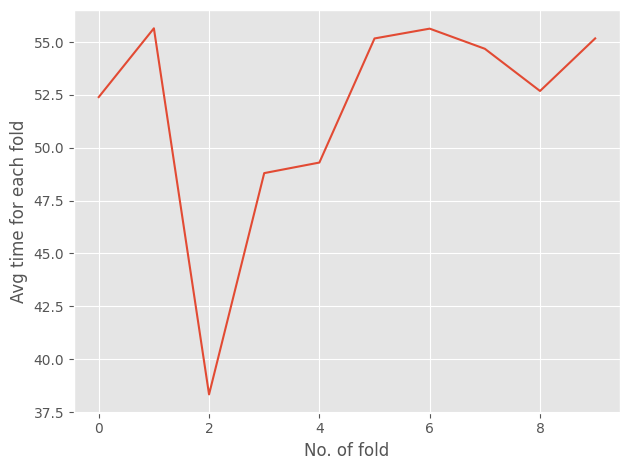

In [53]:
import matplotlib.pyplot as plt

plt.plot(times_rdf)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("rdf times")
plt.show()

In [54]:
import gc
gc.collect()

3584

In [55]:
from sklearn.metrics import accuracy_score
acc_scores_rdf = []
for i in range(len(y_test_all)):
    acc_scores_rdf.append(accuracy_score(y_test_all[i],scores_rdf[i]))

In [56]:
acc_scores_rdf

[0.5894039735099338,
 0.6225165562913907,
 0.5960264900662252,
 0.5894039735099338,
 0.5761589403973509,
 0.6456953642384106,
 0.5827814569536424,
 0.6192052980132451,
 0.5728476821192053,
 0.5794701986754967]

In [57]:
df_acc = pd.DataFrame([acc_scores_rdf])

df_acc.to_csv('rdf_accuracy', index=False)

df_acc = pd.read_csv('rdf_accuracy')

acc_scores_rdf = df_acc.iloc[0].values

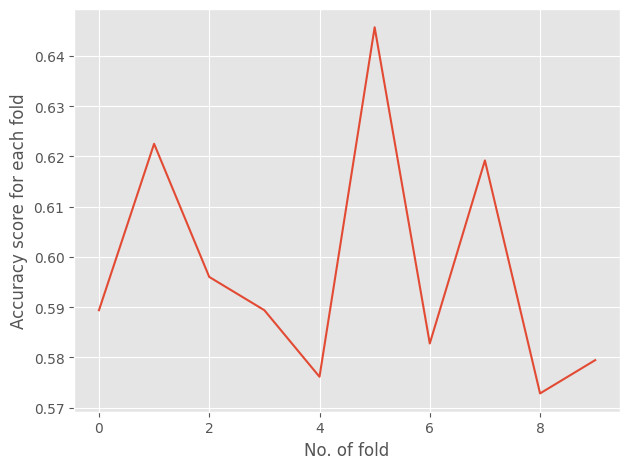

In [58]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_rdf)
plt.xlabel("No. of fold")
plt.ylabel("Accuracy score for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("rdf accuracy")
plt.show()
plt.show()

In [59]:
scores_rdf_n = np.array(scores_rdf)
y_test_all_n = np.array(y_test_all)

scores_rdf_n = scores_rdf_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [60]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_rdf_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 59.74%


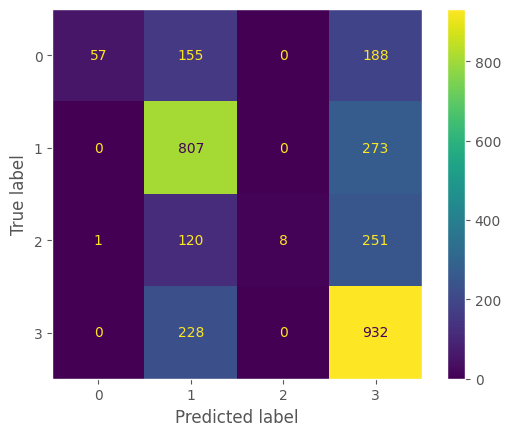

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_rdf_n, labels=rdf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rdf.classes_)
disp.plot()
plt.grid(False)
plt.savefig("RDF")
plt.show()

In [62]:
import gc
gc.collect()

6250

In [63]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_rdf_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.98      0.14      0.25       400
           1       0.62      0.75      0.68      1080
           2       1.00      0.02      0.04       380
           3       0.57      0.80      0.66      1160

    accuracy                           0.60      3020
   macro avg       0.79      0.43      0.41      3020
weighted avg       0.69      0.60      0.53      3020



In [64]:
# parameters_rdf = [
#               {'n_estimators': [10,50,100,150,250,500,750,1000,1500,2000],
#               'max_depth': [1,10,50,100,150,250,500,750,1000,1500,2000]}
#              ]

In [65]:
# shuffle_split = ShuffleSplit(n_splits=1, test_size=0.3)

In [66]:
# grid_search = GridSearchCV(rdf, param_grid = parameters_rdf, scoring='accuracy',cv=shuffle_split ,verbose = 3)

In [67]:
# grid_search.fit(X_train,y_train)

In [68]:
# print("Best hyperparameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

# KNN

In [69]:
import gc
gc.collect()

0

In [70]:
import gc
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_knn = []
times_knn = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    knn = KNeighborsClassifier()
    
    start_time = time.time()
    
    knn.fit(X_train, y_train)
    
    end_time = time.time()
    
    x = knn.predict(X_test)
    scores_knn.append(x)
    times_knn.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [71]:
times_knn

[0.06250143051147461,
 0.060694217681884766,
 0.06824684143066406,
 0.06105923652648926,
 0.08308935165405273,
 0.06963610649108887,
 0.07043337821960449,
 0.06707262992858887,
 0.053920745849609375,
 0.08436846733093262]

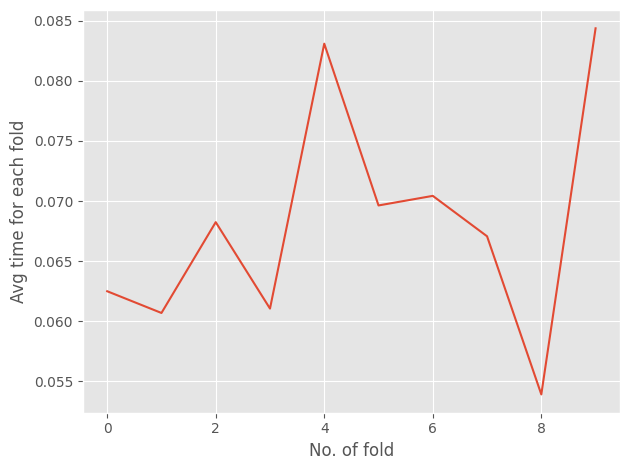

In [72]:
import matplotlib.pyplot as plt

plt.plot(times_knn)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("knn times")
plt.show()

In [73]:
from sklearn.metrics import accuracy_score
acc_scores_knn = []
for i in range(len(y_test_all)):
    acc_scores_knn.append(accuracy_score(y_test_all[i],scores_knn[i]))

In [74]:
acc_scores_knn

[0.8079470198675497,
 0.8013245033112583,
 0.8079470198675497,
 0.8377483443708609,
 0.8311258278145696,
 0.8013245033112583,
 0.7947019867549668,
 0.7880794701986755,
 0.7781456953642384,
 0.8311258278145696]

In [75]:
df_acc = pd.DataFrame([acc_scores_knn])

df_acc.to_csv('knn_accuracy', index=False)

df_acc = pd.read_csv('knn_accuracy')

acc_scores_knn = df_acc.iloc[0].values

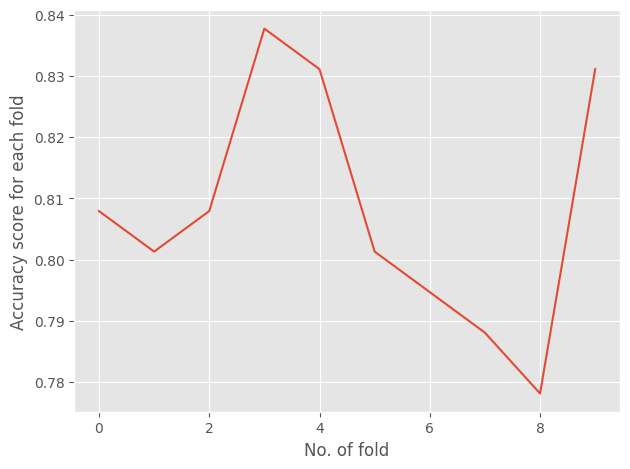

In [76]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_knn)
plt.xlabel("No. of fold")
plt.ylabel("Accuracy score for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("knn accuracy")
plt.show()
plt.show()

In [77]:
import gc
gc.collect()

3435

In [78]:
scores_knn_n = np.array(scores_knn)
y_test_all_n = np.array(y_test_all)

scores_knn_n = scores_knn_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [79]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_knn_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.79%


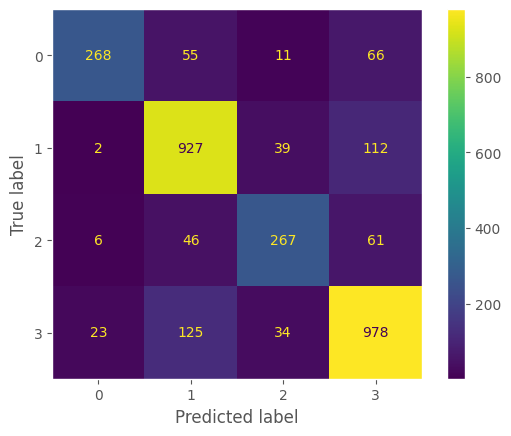

In [80]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_knn_n, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()
plt.grid(False)
plt.savefig("KNN")
plt.show()

In [81]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_knn_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.90      0.67      0.77       400
           1       0.80      0.86      0.83      1080
           2       0.76      0.70      0.73       380
           3       0.80      0.84      0.82      1160

    accuracy                           0.81      3020
   macro avg       0.82      0.77      0.79      3020
weighted avg       0.81      0.81      0.81      3020



In [82]:
# shuffle_split = ShuffleSplit(n_splits=1, test_size=0.3)

In [83]:
# parameters_knn = [{'n_neighbors':[3,5,7,9,11,13,15,17,19,21],'weights': ['uniform', 'distance'],'leaf_size':[30,50,70,90,100]}]

In [84]:
# grid_search_knn = GridSearchCV(knn, param_grid = parameters_knn, scoring='accuracy',cv=shuffle_split ,verbose = 3)

In [85]:
# grid_search_knn.fit(X_train,y_train)

In [86]:
# print("Best hyperparameters: ", grid_search_knn.best_params_)
# print("Best score: ", grid_search_knn.best_score_)

In [87]:
# knn_2 = KNeighborsClassifier(n_neighbors=5,weights='distance',leaf_size=30)
# knn_2.fit(X_train,y_train)

# Naive Bayes

In [88]:
import gc
gc.collect()

6033

In [89]:
import gc
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_nb = []
times_nb = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    nb = GaussianNB()
    
    start_time = time.time()
    
    nb.fit(X_train, y_train)
    
    end_time = time.time()
    
    x = nb.predict(X_test)
    scores_nb.append(x)
    times_nb.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [90]:
times_nb

[0.7600698471069336,
 0.8957927227020264,
 0.9541208744049072,
 0.9330596923828125,
 0.9301495552062988,
 0.9300823211669922,
 0.8743300437927246,
 0.9063796997070312,
 0.9426865577697754,
 0.9444758892059326]

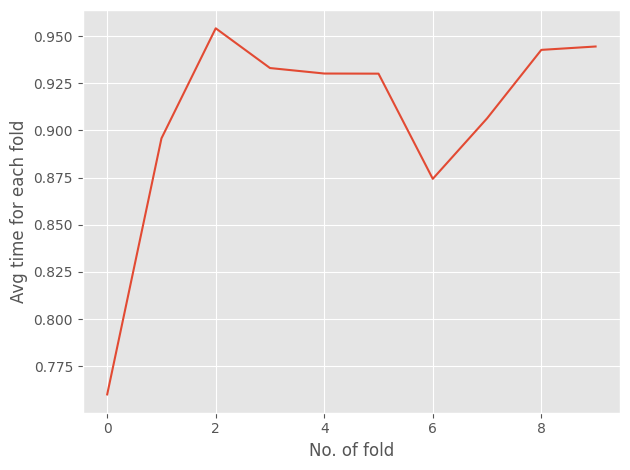

In [91]:
import matplotlib.pyplot as plt

plt.plot(times_nb)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("nb times")
plt.show()

In [92]:
import gc
gc.collect()

3584

In [93]:
from sklearn.metrics import accuracy_score
acc_scores_nb = []
for i in range(len(y_test_all)):
    acc_scores_nb.append(accuracy_score(y_test_all[i],scores_nb[i]))

In [94]:
acc_scores_nb

[0.5695364238410596,
 0.5298013245033113,
 0.5165562913907285,
 0.6158940397350994,
 0.5662251655629139,
 0.6026490066225165,
 0.5761589403973509,
 0.5860927152317881,
 0.5629139072847682,
 0.6225165562913907]

In [95]:
df_acc = pd.DataFrame([acc_scores_nb])

df_acc.to_csv('nb_accuracy', index=False)

df_acc = pd.read_csv('nb_accuracy')

acc_scores_nb = df_acc.iloc[0].values

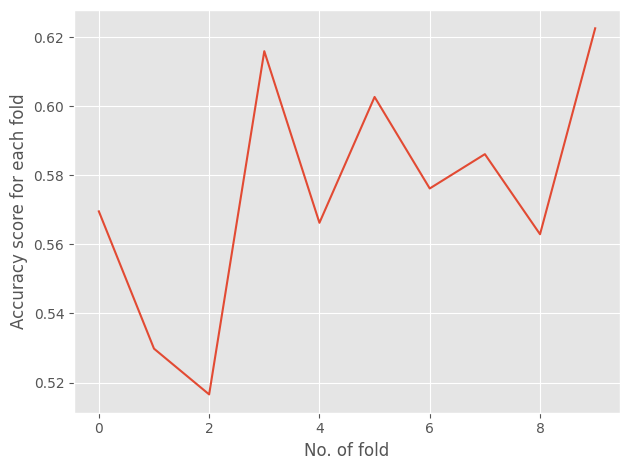

In [96]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_nb)
plt.xlabel("No. of fold")
plt.ylabel("Accuracy score for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("nb accuracy")
plt.show()

In [97]:
scores_nb_n = np.array(scores_nb)
y_test_all_n = np.array(y_test_all)

scores_nb_n = scores_nb_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [98]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_nb_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 57.48%


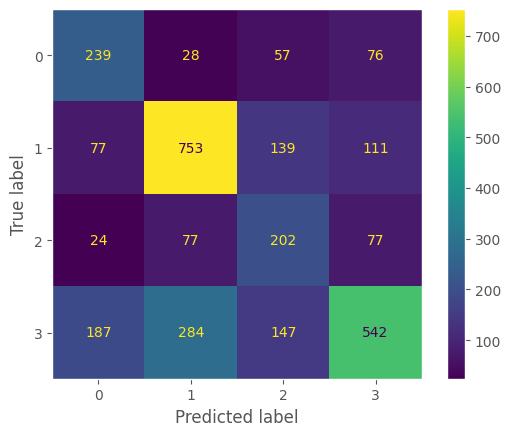

In [99]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_nb_n, labels=nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=nb.classes_)
disp.plot()
plt.grid(False)
plt.savefig("NB")
plt.show()

In [100]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_nb_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.45      0.60      0.52       400
           1       0.66      0.70      0.68      1080
           2       0.37      0.53      0.44       380
           3       0.67      0.47      0.55      1160

    accuracy                           0.57      3020
   macro avg       0.54      0.57      0.55      3020
weighted avg       0.60      0.57      0.58      3020



In [101]:
import gc
gc.collect()

6049

In [102]:
# parameters_nb = {'var_smoothing': [1e-10,1e-11,1e-12,1e-13,1e-14,1e-15,1e-16,1e-17,1e-18,1e-19,1e-20,1e-9, 1e-8, 1e-7, 1e-6, 1e-5,1e-4,1e-3,1e-2]}

In [103]:
# shuffle_split = ShuffleSplit(n_splits=1, test_size=0.3)

In [104]:
# grid_search_nb = GridSearchCV(nb, param_grid = parameters_nb, scoring='accuracy',cv=shuffle_split ,verbose = 3)

In [105]:
# grid_search_nb.fit(X_train,y_train)

In [106]:
# print("Best hyperparameters: ", grid_search_nb.best_params_)
# print("Best score: ", grid_search_nb.best_score_)

In [107]:
# nb_2 = GaussianNB(var_smoothing=1e-10)
# nb_2.fit(X_train,y_train)

In [108]:
# times_svm_n = np.array(times_svm)
# times_svm_n = times_svm_n/60.0

# times_dtc_n = np.array(times_dtc)
# times_dtc_n = times_dtc_n/60.0

# times_rdf_n = np.array(times_rdf)
# times_rdf_n = times_rdf_n/60.0

# times_knn_n = np.array(times_knn)
# times_knn_n = times_knn_n/60.0

# times_nb_n = np.array(times_nb)
# times_nb_n = times_svm_n/60.0

# Fusion (CNN+SVM)

In [139]:
import gc
gc.collect()

15823

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import BatchNormalization

In [141]:
# X,y = load_data(DATA_PATH)

In [142]:
X.shape

(3020, 259, 128)

In [143]:
# ''''''
# from keras.layers import Activation
# from keras.backend import sigmoid
# def swish(x):
#     return x * sigmoid(x)
# ''''''

In [144]:
# ''''
# from keras.utils import get_custom_objects
# get_custom_objects().update({'swish':Activation(swish)})
# ''''

In [145]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_cnn_svm = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_cnn_svm.append(self.times)

# early_stop = EarlyStopping(monitor='loss', patience=7, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [146]:
def create_model_cnn_svm():
    
    model_cnn_svm = keras.Sequential([

        keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (X.shape[1],X.shape[2],1)),
        keras.layers.MaxPool2D((3,3),strides=(1,1),padding ='same'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),

        keras.layers.Conv2D(32,(3,3),activation ='relu'),
        keras.layers.MaxPool2D((3,3),strides=(1,1),padding ='same'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),

        keras.layers.Flatten(),
        keras.layers.Dense(64,activation='relu'),
        keras.layers.Dropout(0.5),


        keras.layers.Dense(4,kernel_regularizer=keras.regularizers.l2(0.01),activation='softmax')

    ])
    return model_cnn_svm

In [147]:
import gc
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_cnn_svm = []
y_test_all_cnn_svm = []
train_acc_cnn_svm = []
test_acc_cnn_svm = []
train_loss_cnn_svm = []
test_loss_cnn_svm = []


for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_cnn_svm.append(y_test)
    
    model_cnn_svm = None
    model_cnn_svm = create_model_cnn_svm()
    
    X_train, x_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    optimiser =tf.keras.optimizers.Adam(learning_rate=0.001)
    
    model_cnn_svm.compile(optimizer = optimiser, loss = tf.keras.losses.squared_hinge, metrics = ['accuracy'])
    
    history = model_cnn_svm.fit(X_train, y_train,validation_data=(x_valid,y_valid),batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    x = model_cnn_svm.predict(X_test)
    
    scores_cnn_svm.append(x)
    train_acc_cnn_svm.append(history.history["accuracy"])
    test_acc_cnn_svm.append(history.history["val_accuracy"])
    train_loss_cnn_svm.append(history.history["loss"])
    test_loss_cnn_svm.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 10s 80ms/step - loss: 0.8441 - accuracy: 0.3500 - val_loss: 0.8399 - val_accuracy: 0.3456 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 6s 73ms/step - loss: 0.8215 - accuracy: 0.3536 - val_loss: 0.8217 - val_accuracy: 0.3456 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 6s 73ms/step - loss: 0.8083 - accuracy: 0.3504 - val_loss: 0.8124 - val_accuracy: 0.3456 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 6s 72ms/step - loss: 0.8009 - accuracy: 0.3626 - val_loss: 0.8078 - val_accuracy: 0.3456 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7942 - accuracy: 0.3254 - val_loss: 0.8056 - val_accuracy: 0.3456 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7848 - accuracy: 0.3070 - val_loss: 0.8044 - val_accuracy: 0.3456 - lr: 0.0010
Epoch 7/100
77/77 [=========================

Epoch 29/100
76/77 [============================>.] - ETA: 0s - loss: 0.7403 - accuracy: 0.3051
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 5.64 seconds
77/77 [==============================] - 6s 73ms/step - loss: 0.7397 - accuracy: 0.3046 - val_loss: 0.8019 - val_accuracy: 0.3456 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7438 - accuracy: 0.3091 - val_loss: 0.8019 - val_accuracy: 0.3456 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 6s 74ms/step - loss: 0.7486 - accuracy: 0.2980 - val_loss: 0.8019 - val_accuracy: 0.3456 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7436 - accuracy: 0.3054 - val_loss: 0.8019 - val_accuracy: 0.3456 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7428 - accuracy: 0.2964 - val_loss: 0.8019 - val_accuracy: 0.3456 - lr: 1.6000e-06
E

76/77 [============================>.] - ETA: 0s - loss: 0.7433 - accuracy: 0.3010
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 5.64 seconds
77/77 [==============================] - 6s 73ms/step - loss: 0.7434 - accuracy: 0.3017 - val_loss: 0.8019 - val_accuracy: 0.3456 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7512 - accuracy: 0.2915 - val_loss: 0.8019 - val_accuracy: 0.3456 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7415 - accuracy: 0.3001 - val_loss: 0.8019 - val_accuracy: 0.3456 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7476 - accuracy: 0.3001 - val_loss: 0.8019 - val_accuracy: 0.3456 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7458 - accuracy: 0.3046 - val_loss: 0.8019 - val_accuracy: 0.3456 - lr: 4.0960e-12
Epoch 90/100
77

77/77 [==============================] - 6s 73ms/step - loss: 0.7901 - accuracy: 0.3516 - val_loss: 0.7923 - val_accuracy: 0.3897 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 6s 74ms/step - loss: 0.7904 - accuracy: 0.3471 - val_loss: 0.7923 - val_accuracy: 0.3897 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 6s 74ms/step - loss: 0.7911 - accuracy: 0.3528 - val_loss: 0.7923 - val_accuracy: 0.3897 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7900 - accuracy: 0.3483 - val_loss: 0.7923 - val_accuracy: 0.3897 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 6s 74ms/step - loss: 0.7912 - accuracy: 0.3512 - val_loss: 0.7923 - val_accuracy: 0.3897 - lr: 3.2000e-07
Epoch 45/100
76/77 [============================>.] - ETA: 0s - loss: 0.7905 - accuracy: 0.3499
Epoch 45: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 45: 5.66 seconds
77

77/77 [==============================] - 6s 74ms/step - loss: 0.7903 - accuracy: 0.3508 - val_loss: 0.7923 - val_accuracy: 0.3897 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7905 - accuracy: 0.3479 - val_loss: 0.7923 - val_accuracy: 0.3897 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7901 - accuracy: 0.3491 - val_loss: 0.7923 - val_accuracy: 0.3897 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7909 - accuracy: 0.3483 - val_loss: 0.7923 - val_accuracy: 0.3897 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 0s 13ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 6s 75ms/step - loss: 0.8476 - accuracy: 0.1439 - val_loss: 0.8250 - val_accuracy: 0.0919 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 6s 73ms/step - loss: 0.8266 - accuracy: 0.1382 - val_loss: 0.8071 - val_

Epoch 24/100
77/77 [==============================] - 6s 74ms/step - loss: 0.7666 - accuracy: 0.2437 - val_loss: 0.7824 - val_accuracy: 0.3897 - lr: 4.0000e-05
Epoch 25/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7661 - accuracy: 0.2486 - val_loss: 0.7823 - val_accuracy: 0.3897 - lr: 4.0000e-05
Epoch 26/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7672 - accuracy: 0.2457 - val_loss: 0.7823 - val_accuracy: 0.3897 - lr: 4.0000e-05
Epoch 27/100
77/77 [==============================] - 6s 74ms/step - loss: 0.7685 - accuracy: 0.2420 - val_loss: 0.7823 - val_accuracy: 0.3897 - lr: 4.0000e-05
Epoch 28/100
76/77 [============================>.] - ETA: 0s - loss: 0.7700 - accuracy: 0.2615
Epoch 28: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 28: 5.63 seconds
77/77 [==============================] - 6s 73ms/step - loss: 0.7696 - accuracy: 0.2617 - val_loss: 0.7823 - val_accuracy: 0.3897 - lr: 4.0000e-05
Ep

77/77 [==============================] - 6s 73ms/step - loss: 0.7692 - accuracy: 0.2506 - val_loss: 0.7822 - val_accuracy: 0.3897 - lr: 1.0240e-10
Epoch 81/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7685 - accuracy: 0.2522 - val_loss: 0.7822 - val_accuracy: 0.3897 - lr: 1.0240e-10
Epoch 82/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7689 - accuracy: 0.2322 - val_loss: 0.7822 - val_accuracy: 0.3897 - lr: 1.0240e-10
Epoch 83/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7646 - accuracy: 0.2449 - val_loss: 0.7822 - val_accuracy: 0.3897 - lr: 1.0240e-10
Epoch 84/100
76/77 [============================>.] - ETA: 0s - loss: 0.7699 - accuracy: 0.2455
Epoch 84: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 84: 5.65 seconds
77/77 [==============================] - 6s 73ms/step - loss: 0.7699 - accuracy: 0.2445 - val_loss: 0.7822 - val_accuracy: 0.3897 - lr: 1.0240e-10
Epoch 85/100
7

Epoch 8/100
77/77 [==============================] - 6s 74ms/step - loss: 0.7521 - accuracy: 0.3340 - val_loss: 0.7885 - val_accuracy: 0.3971 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7436 - accuracy: 0.3271 - val_loss: 0.7879 - val_accuracy: 0.3971 - lr: 0.0010
Epoch 10/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7422 - accuracy: 0.3397 - val_loss: 0.7873 - val_accuracy: 0.3971 - lr: 0.0010
Epoch 11/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7432 - accuracy: 0.3217 - val_loss: 0.7868 - val_accuracy: 0.3971 - lr: 0.0010
Epoch 12/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7448 - accuracy: 0.3406 - val_loss: 0.7864 - val_accuracy: 0.3971 - lr: 0.0010
Epoch 13/100
76/77 [============================>.] - ETA: 0s - loss: 0.7433 - accuracy: 0.3376
Epoch 13: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 13: 5.62 seconds
77/77 [===

77/77 [==============================] - 6s 73ms/step - loss: 0.7398 - accuracy: 0.3279 - val_loss: 0.7850 - val_accuracy: 0.3971 - lr: 2.5600e-09
Epoch 65/100
77/77 [==============================] - 6s 74ms/step - loss: 0.7412 - accuracy: 0.3230 - val_loss: 0.7850 - val_accuracy: 0.3971 - lr: 2.5600e-09
Epoch 66/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7352 - accuracy: 0.3111 - val_loss: 0.7850 - val_accuracy: 0.3971 - lr: 2.5600e-09
Epoch 67/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7421 - accuracy: 0.3164 - val_loss: 0.7850 - val_accuracy: 0.3971 - lr: 2.5600e-09
Epoch 68/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7450 - accuracy: 0.3262 - val_loss: 0.7850 - val_accuracy: 0.3971 - lr: 2.5600e-09
Epoch 69/100
76/77 [============================>.] - ETA: 0s - loss: 0.7461 - accuracy: 0.3302
Epoch 69: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 69: 5.61 seconds
77/7

Epoch 20/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7954 - accuracy: 0.3790 - val_loss: 0.7929 - val_accuracy: 0.3934 - lr: 4.0000e-05
Epoch 21/100
77/77 [==============================] - 6s 74ms/step - loss: 0.7935 - accuracy: 0.3614 - val_loss: 0.7929 - val_accuracy: 0.3934 - lr: 4.0000e-05
Epoch 22/100
77/77 [==============================] - 6s 74ms/step - loss: 0.7946 - accuracy: 0.3671 - val_loss: 0.7928 - val_accuracy: 0.3934 - lr: 4.0000e-05
Epoch 23/100
77/77 [==============================] - ETA: 0s - loss: 0.7935 - accuracy: 0.3688
Epoch 23: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 23: 5.62 seconds
77/77 [==============================] - 6s 73ms/step - loss: 0.7935 - accuracy: 0.3688 - val_loss: 0.7928 - val_accuracy: 0.3934 - lr: 4.0000e-05
Epoch 24/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7948 - accuracy: 0.3896 - val_loss: 0.7928 - val_accuracy: 0.3934 - lr: 8.0000e-06
Ep

77/77 [==============================] - 6s 73ms/step - loss: 0.7953 - accuracy: 0.3639 - val_loss: 0.7927 - val_accuracy: 0.3934 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7932 - accuracy: 0.3786 - val_loss: 0.7927 - val_accuracy: 0.3934 - lr: 1.0240e-10
Epoch 78/100
77/77 [==============================] - 6s 74ms/step - loss: 0.7943 - accuracy: 0.3794 - val_loss: 0.7927 - val_accuracy: 0.3934 - lr: 1.0240e-10
Epoch 79/100
76/77 [============================>.] - ETA: 0s - loss: 0.7937 - accuracy: 0.3779
Epoch 79: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 79: 5.66 seconds
77/77 [==============================] - 6s 74ms/step - loss: 0.7937 - accuracy: 0.3786 - val_loss: 0.7927 - val_accuracy: 0.3934 - lr: 1.0240e-10
Epoch 80/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7942 - accuracy: 0.3647 - val_loss: 0.7927 - val_accuracy: 0.3934 - lr: 2.0480e-11
Epoch 81/100
7

77/77 [==============================] - 6s 74ms/step - loss: 0.8026 - accuracy: 0.1288 - val_loss: 0.7939 - val_accuracy: 0.1140 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7969 - accuracy: 0.1276 - val_loss: 0.7902 - val_accuracy: 0.1140 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7944 - accuracy: 0.1284 - val_loss: 0.7885 - val_accuracy: 0.1140 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7932 - accuracy: 0.1288 - val_loss: 0.7877 - val_accuracy: 0.1140 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7925 - accuracy: 0.1276 - val_loss: 0.7872 - val_accuracy: 0.1140 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - ETA: 0s - loss: 0.7921 - accuracy: 0.1288
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 5.65 seconds
77/77 [=====================

77/77 [==============================] - 6s 73ms/step - loss: 0.7913 - accuracy: 0.1292 - val_loss: 0.7862 - val_accuracy: 0.1140 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7913 - accuracy: 0.1288 - val_loss: 0.7862 - val_accuracy: 0.1140 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 6s 74ms/step - loss: 0.7913 - accuracy: 0.1304 - val_loss: 0.7862 - val_accuracy: 0.1140 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7913 - accuracy: 0.1292 - val_loss: 0.7862 - val_accuracy: 0.1140 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7913 - accuracy: 0.1280 - val_loss: 0.7862 - val_accuracy: 0.1140 - lr: 2.5600e-09
Epoch 64/100
76/77 [============================>.] - ETA: 0s - loss: 0.7915 - accuracy: 0.1287
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 5.66 seconds
77/7

Epoch 15/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7985 - accuracy: 0.1333 - val_loss: 0.7943 - val_accuracy: 0.1176 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7984 - accuracy: 0.1333 - val_loss: 0.7943 - val_accuracy: 0.1176 - lr: 2.0000e-04
Epoch 17/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7984 - accuracy: 0.1333 - val_loss: 0.7942 - val_accuracy: 0.1176 - lr: 2.0000e-04
Epoch 18/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7983 - accuracy: 0.1337 - val_loss: 0.7942 - val_accuracy: 0.1176 - lr: 2.0000e-04
Epoch 19/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7982 - accuracy: 0.1341 - val_loss: 0.7941 - val_accuracy: 0.1176 - lr: 2.0000e-04
Epoch 20/100
77/77 [==============================] - ETA: 0s - loss: 0.7982 - accuracy: 0.1337
Epoch 20: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 20: 5

77/77 [==============================] - 6s 73ms/step - loss: 0.7980 - accuracy: 0.1325 - val_loss: 0.7939 - val_accuracy: 0.1176 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7980 - accuracy: 0.1337 - val_loss: 0.7939 - val_accuracy: 0.1176 - lr: 5.1200e-10
Epoch 73/100
77/77 [==============================] - 6s 74ms/step - loss: 0.7980 - accuracy: 0.1333 - val_loss: 0.7939 - val_accuracy: 0.1176 - lr: 5.1200e-10
Epoch 74/100
77/77 [==============================] - 6s 74ms/step - loss: 0.7980 - accuracy: 0.1325 - val_loss: 0.7939 - val_accuracy: 0.1176 - lr: 5.1200e-10
Epoch 75/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7980 - accuracy: 0.1333 - val_loss: 0.7939 - val_accuracy: 0.1176 - lr: 5.1200e-10
Epoch 76/100
77/77 [==============================] - ETA: 0s - loss: 0.7980 - accuracy: 0.1333
Epoch 76: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 76: 5.66 seconds
7

Epoch 27/100
77/77 [==============================] - 6s 74ms/step - loss: 0.7839 - accuracy: 0.2482 - val_loss: 0.7901 - val_accuracy: 0.1140 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 6s 74ms/step - loss: 0.7862 - accuracy: 0.2486 - val_loss: 0.7901 - val_accuracy: 0.1140 - lr: 8.0000e-06
Epoch 29/100
76/77 [============================>.] - ETA: 0s - loss: 0.7844 - accuracy: 0.2496
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 5.63 seconds
77/77 [==============================] - 6s 73ms/step - loss: 0.7840 - accuracy: 0.2490 - val_loss: 0.7901 - val_accuracy: 0.1140 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 6s 74ms/step - loss: 0.7866 - accuracy: 0.2473 - val_loss: 0.7901 - val_accuracy: 0.1140 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 6s 74ms/step - loss: 0.7837 - accuracy: 0.2510 - val_loss: 0.7901 - val_accuracy: 0.1140 - lr: 1.6000e-06
E

77/77 [==============================] - 6s 74ms/step - loss: 0.7875 - accuracy: 0.2543 - val_loss: 0.7901 - val_accuracy: 0.1140 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 6s 74ms/step - loss: 0.7876 - accuracy: 0.2494 - val_loss: 0.7901 - val_accuracy: 0.1140 - lr: 2.0480e-11
Epoch 85/100
76/77 [============================>.] - ETA: 0s - loss: 0.7853 - accuracy: 0.2529
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 5.63 seconds
77/77 [==============================] - 6s 73ms/step - loss: 0.7849 - accuracy: 0.2527 - val_loss: 0.7901 - val_accuracy: 0.1140 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 6s 74ms/step - loss: 0.7853 - accuracy: 0.2392 - val_loss: 0.7901 - val_accuracy: 0.1140 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 6s 74ms/step - loss: 0.7857 - accuracy: 0.2416 - val_loss: 0.7901 - val_accuracy: 0.1140 - lr: 4.0960e-12
Epoch 88/100
77

77/77 [==============================] - 6s 74ms/step - loss: 0.7698 - accuracy: 0.2155 - val_loss: 0.7901 - val_accuracy: 0.0993 - lr: 3.2000e-07
Epoch 39/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7670 - accuracy: 0.2195 - val_loss: 0.7901 - val_accuracy: 0.0993 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 6s 74ms/step - loss: 0.7659 - accuracy: 0.2110 - val_loss: 0.7901 - val_accuracy: 0.0993 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7711 - accuracy: 0.2183 - val_loss: 0.7901 - val_accuracy: 0.0993 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7633 - accuracy: 0.2326 - val_loss: 0.7901 - val_accuracy: 0.0993 - lr: 3.2000e-07
Epoch 43/100
76/77 [============================>.] - ETA: 0s - loss: 0.7663 - accuracy: 0.2163
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 5.65 seconds
77

77/77 [==============================] - 6s 73ms/step - loss: 0.7690 - accuracy: 0.2134 - val_loss: 0.7901 - val_accuracy: 0.0993 - lr: 8.1920e-13
Epoch 95/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7720 - accuracy: 0.2036 - val_loss: 0.7901 - val_accuracy: 0.0993 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7671 - accuracy: 0.2089 - val_loss: 0.7901 - val_accuracy: 0.0993 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 6s 74ms/step - loss: 0.7690 - accuracy: 0.2228 - val_loss: 0.7901 - val_accuracy: 0.0993 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 6s 73ms/step - loss: 0.7684 - accuracy: 0.2175 - val_loss: 0.7901 - val_accuracy: 0.0993 - lr: 8.1920e-13
Epoch 99/100
76/77 [============================>.] - ETA: 0s - loss: 0.7701 - accuracy: 0.2056
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 5.64 seconds
7

Epoch 22/100
77/77 [==============================] - 6s 74ms/step - loss: 0.6973 - accuracy: 0.2400 - val_loss: 0.7868 - val_accuracy: 0.3603 - lr: 4.0000e-05
Epoch 23/100
76/77 [============================>.] - ETA: 0s - loss: 0.7019 - accuracy: 0.2660
Epoch 23: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 23: 5.63 seconds
77/77 [==============================] - 6s 73ms/step - loss: 0.7020 - accuracy: 0.2661 - val_loss: 0.7868 - val_accuracy: 0.3603 - lr: 4.0000e-05
Epoch 24/100
77/77 [==============================] - 6s 73ms/step - loss: 0.6996 - accuracy: 0.2886 - val_loss: 0.7868 - val_accuracy: 0.3603 - lr: 8.0000e-06
Epoch 25/100
77/77 [==============================] - 6s 74ms/step - loss: 0.6932 - accuracy: 0.3025 - val_loss: 0.7868 - val_accuracy: 0.3603 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 6s 73ms/step - loss: 0.6914 - accuracy: 0.2968 - val_loss: 0.7868 - val_accuracy: 0.3603 - lr: 8.0000e-06
Ep

77/77 [==============================] - 6s 74ms/step - loss: 0.6952 - accuracy: 0.2907 - val_loss: 0.7867 - val_accuracy: 0.3603 - lr: 1.0240e-10
Epoch 79/100
76/77 [============================>.] - ETA: 0s - loss: 0.6984 - accuracy: 0.3002
Epoch 79: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 79: 5.66 seconds
77/77 [==============================] - 6s 74ms/step - loss: 0.6974 - accuracy: 0.3001 - val_loss: 0.7867 - val_accuracy: 0.3603 - lr: 1.0240e-10
Epoch 80/100
77/77 [==============================] - 6s 73ms/step - loss: 0.6916 - accuracy: 0.2939 - val_loss: 0.7867 - val_accuracy: 0.3603 - lr: 2.0480e-11
Epoch 81/100
77/77 [==============================] - 6s 73ms/step - loss: 0.6911 - accuracy: 0.3078 - val_loss: 0.7867 - val_accuracy: 0.3603 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 6s 73ms/step - loss: 0.6954 - accuracy: 0.2972 - val_loss: 0.7867 - val_accuracy: 0.3603 - lr: 2.0480e-11
Epoch 83/100
7

In [148]:
import gc
gc.collect()

0

In [149]:
np.array(y_test_all_cnn_svm).shape

(10, 302)

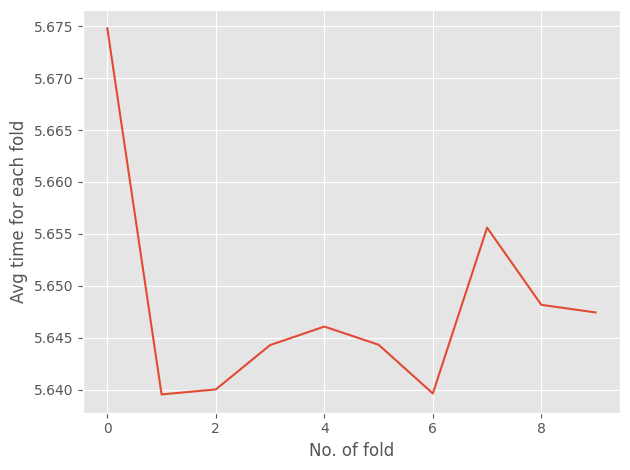

In [150]:
import matplotlib.pyplot as plt

times_cnn_svm_n = np.zeros((10,100))
for i, row in enumerate(times_cnn_svm):
    times_cnn_svm_n[i, :len(row)] = row

times_cnn_svm_n_n = np.mean(times_cnn_svm_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_cnn_svm_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("cnn_svm times")
plt.show()

In [151]:
train_acc_cnn_svm_n = np.zeros((10,100))
for i, row in enumerate(train_acc_cnn_svm):
    train_acc_cnn_svm_n[i, :len(row)] = row
    
test_acc_cnn_svm_n = np.zeros((10,100))
for i, row in enumerate(test_acc_cnn_svm):
    test_acc_cnn_svm_n[i, :len(row)] = row
    
train_loss_cnn_svm_n = np.zeros((10,100))
for i, row in enumerate(train_loss_cnn_svm):
    train_loss_cnn_svm_n[i, :len(row)] = row
    
test_loss_cnn_svm_n = np.zeros((10,100))
for i, row in enumerate(test_loss_cnn_svm):
    test_loss_cnn_svm_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_cnn_svm_n = np.mean(train_acc_cnn_svm_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_cnn_svm_n = np.mean(test_acc_cnn_svm_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_cnn_svm_n = np.mean(train_loss_cnn_svm_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_cnn_svm_n = np.mean(test_loss_cnn_svm_n,axis=0)

In [152]:
train_acc_cnn_svm_n.shape

(100,)

In [153]:
train_acc_cnn_svm_n.shape

(100,)

In [154]:
data = [train_acc_cnn_svm_n,test_acc_cnn_svm_n,train_loss_cnn_svm_n,test_loss_cnn_svm_n]

df = pd.DataFrame(data)
df.to_csv('cnn_svm_acc', index=False)
df = pd.read_csv('cnn_svm_acc')

train_acc_cnn_svm_n = df.iloc[0]
test_acc_cnn_svm_n = df.iloc[1]
train_loss_cnn_svm_n = df.iloc[2]
test_loss_cnn_svm_n = df.iloc[3]


df_t = pd.DataFrame([times_cnn_svm_n_n])
df_t.to_csv('cnn_svm_times', index=False)
df_t = pd.read_csv('cnn_svm_times')

times_cnn_svm_n_n = df_t.iloc[0]

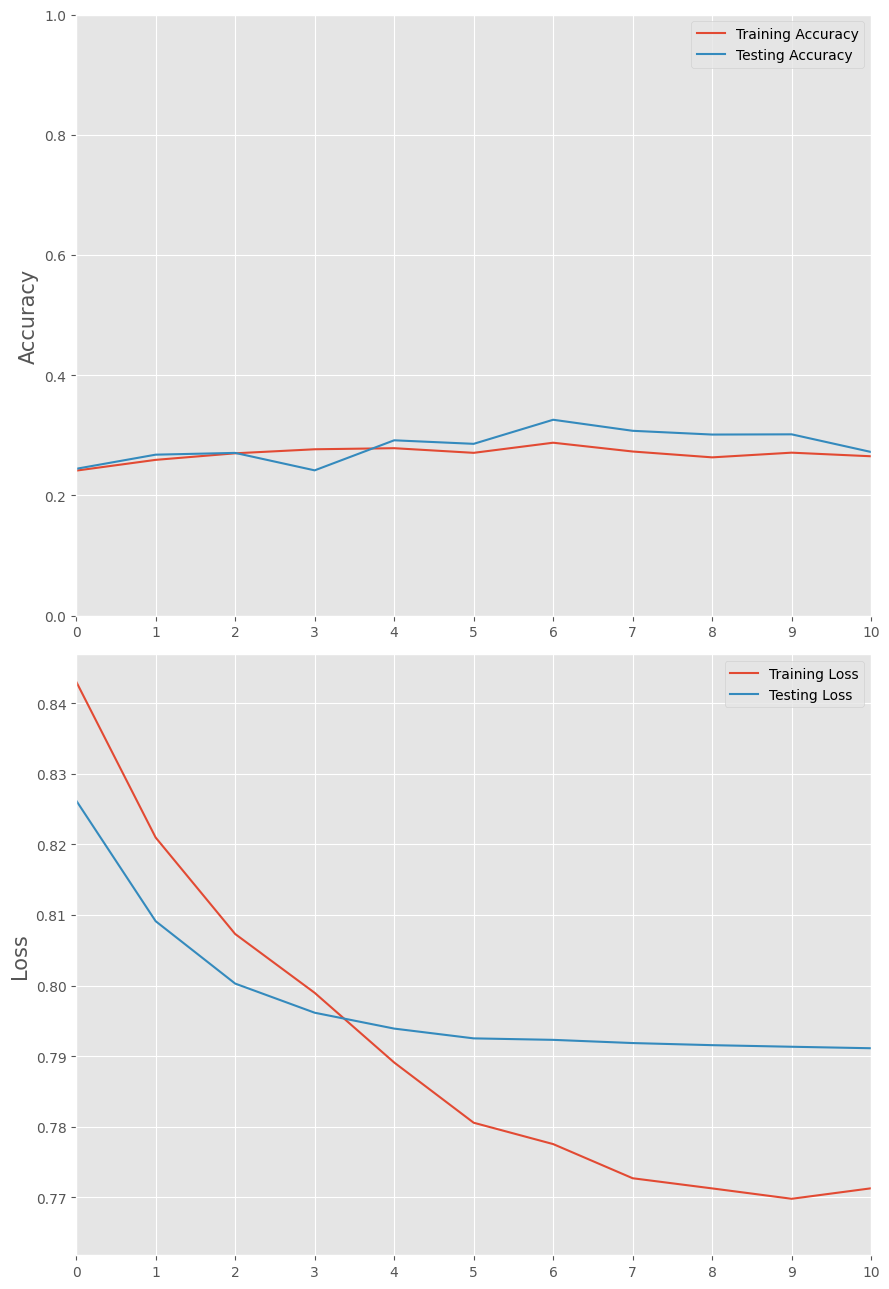

In [155]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))
plt.style.use('ggplot')

axs[0].plot(train_acc_cnn_svm_n, label='Training Accuracy')
axs[0].plot(test_acc_cnn_svm_n, label='Testing Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_cnn_svm_n, label='Training Loss')
axs[1].plot(test_loss_cnn_svm_n, label='Testing Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("CNN + SVM Training and Testing Loss")
plt.show()

In [156]:
np.array(scores_cnn_svm).shape

(10, 302, 4)

In [157]:
np.array(y_test_all_cnn_svm).shape

(10, 302)

In [158]:
y_pred_cnn_svm = np.argmax(scores_cnn_svm,axis=2)

In [159]:
y_pred_cnn_svm.shape

(10, 302)

In [160]:
from sklearn.metrics import accuracy_score
acc_scores_cnn_svm = []
for i in range(len(y_test_all_cnn_svm)):
    acc_scores_cnn_svm.append(accuracy_score(y_true = y_test_all_cnn_svm[i],y_pred = y_pred_cnn_svm[i]))

In [161]:
import gc
gc.collect()

40

In [162]:
acc_scores_cnn_svm

[0.3576158940397351,
 0.3576158940397351,
 0.3576158940397351,
 0.3841059602649007,
 0.3841059602649007,
 0.12582781456953643,
 0.1291390728476821,
 0.12582781456953643,
 0.12582781456953643,
 0.3576158940397351]

In [163]:
df_acc = pd.DataFrame([acc_scores_cnn_svm])

df_acc.to_csv('cnn_svm_accuracy', index=False)

df_acc = pd.read_csv('cnn_svm_accuracy')

acc_scores_cnn_svm = df_acc.iloc[0].values

In [164]:
y_test_all_n = np.array(y_test_all_cnn_svm)

y_pred_cnn_svm_n = y_pred_cnn_svm.flatten()
y_test_all_n = y_test_all_n.flatten()

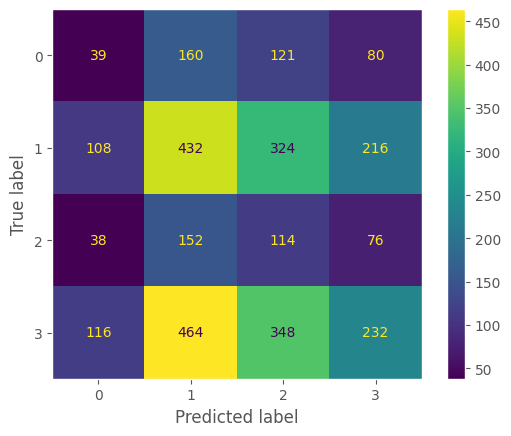

In [165]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_cnn_svm_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("CNN + SVM")
plt.show()

In [166]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_cnn_svm_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.13      0.10      0.11       400
           1       0.36      0.40      0.38      1080
           2       0.13      0.30      0.18       380
           3       0.38      0.20      0.26      1160

    accuracy                           0.27      3020
   macro avg       0.25      0.25      0.23      3020
weighted avg       0.31      0.27      0.27      3020



## CNN + SVM (hyper-para-tuning)

In [ ]:
# ''''
# conv_1_filter: 48
# conv_1_kernel: 3
# conv_2_filter: 64
# conv_2_kernel: 5
# dense_1_units: 32
# lr: 0.0012043751090852965

# ''''

In [ ]:
# import numpy as np
# from sklearn.model_selection import GridSearchCV, StratifiedKFold
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
# from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# X,y = load_data(DATA_PATH)

In [ ]:
# X = X / 255.0

In [ ]:
# X.shape

In [ ]:
# ''''
# def create():
    
#     model_cnn = Sequential()
#     model.add(Conv2D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(X.shape[1],X.shape[2],1))),
#     model.add(MaxPooling2D(pool_size=pool_size ,strides=(1,1),padding ='same')),
#     model.add(Conv2D(filters=filters, kernel_size=kernel_size, activation='relu')),
#     model.add(MaxPooling2D(pool_size=pool_size,strides=(1,1),padding ='same')),
#     model.add(Flatten()),
#     model.add(Dense(128, activation='relu')),
#     model.add(Dropout(0.5)),
#     model.add(Dense(4,kernel_regularizer=keras.regularizers.l2(0.01), activation='softmax')),
#     model.compile(optimizer=optimizer, loss='squared_hinge', metrics=['accuracy'])
    
#     return model_cnn

# ''''

In [ ]:
# def build_model(hp):
#     model = keras.Sequential([
#     keras.layers.Conv2D(
#         filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
#         kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
#         activation='relu',
#         input_shape=(259,13,1)
#     ),
    
#     keras.layers.MaxPooling2D(
#         pool_size = (2, 2),
#         strides=(1,1),
#         padding ='same'
#     ),
        
#     keras.layers.Conv2D(
#         filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
#         kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
#         activation='relu'
#     ),
        
#     keras.layers.MaxPooling2D(
#         pool_size = (2,2),
#         strides=(1,1),
#         padding ='same'
#     ),
    
#     keras.layers.Flatten(),
#     keras.layers.Dense(
#         units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
#         activation='relu'
#     ),
#     keras.layers.Dense(4,kernel_regularizer=keras.regularizers.l2(0.01), activation='softmax')
#   ])
  
#     learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
#     model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
#               loss='squared_hinge',
#               metrics=['accuracy'])
  
#     return model

In [ ]:
# from keras_tuner import RandomSearch
# from keras_tuner.engine.hyperparameters import HyperParameters

In [ ]:
# tuner_search=RandomSearch(build_model,
#                           objective='accuracy',
#                           overwrite=True,
#                           max_trials=10,directory='cnn')

In [ ]:
# tuner_search.search(X,y,epochs=2,validation_split=0.2)

In [ ]:
# tuner_search.results_summary()

In [ ]:
# models = tuner_search.get_best_models(num_models=2)

# best_model = models[0]

# best_model.build(input_shape=(259,13,1))

# best_model.summary()

In [ ]:
# def display_cv_results(search_results):
#     print('Best score = {:.4f} using {}'.format(search_results.best_score_, search_results.best_params_))    
    
# # create model
# model = KerasClassifier(build_fn=create_cnn_model, verbose=1)
# # define parameters and values for grid search 
# param_grid = {
#     'filters': [16, 32, 64],
#     'kernel_size': [(3, 3), (5, 5)],
#     'pool_size': [(2, 2), (3, 3)],
#     'activation': ['relu', 'sigmoid'],
#     'optimizer': ['adam', 'SGD'],
#     'batch_size': [16, 32, 64],
# }
# grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=cv)
# grid_result = grid.fit(X, y)  # fit the full dataset as we are using cross validation 

# # print out results
# print('time for grid search = {:.0f} sec'.format(time()-start))
# display_cv_results(grid_result)

# XGboost

In [109]:
import gc
gc.collect()

0

In [110]:
import gc
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_xg = []
times_xg = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    xg = XGBClassifier()
    
    start_time = time.time()
    
    xg.fit(X_train, y_train)
    
    end_time = time.time()
    
    x = xg.predict(X_test)
    scores_xg.append(x)
    times_xg.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


In [111]:
times_xg

[341.68278884887695,
 346.3812258243561,
 348.2042727470398,
 346.86827182769775,
 349.4460656642914,
 350.6510910987854,
 346.57736921310425,
 347.03132486343384,
 346.28352642059326,
 348.20271468162537]

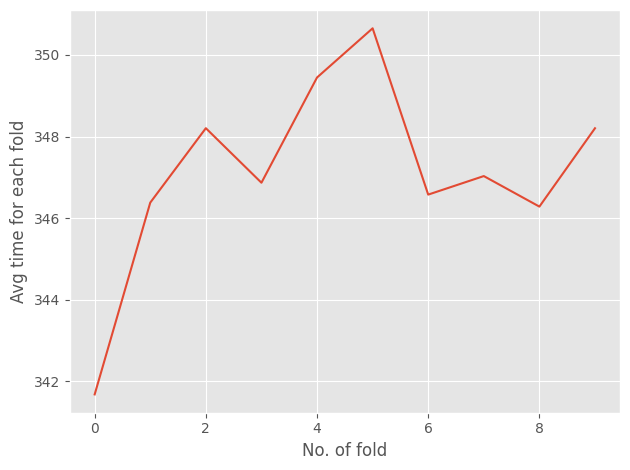

In [112]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.plot(times_xg)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("xg times")
plt.show()

In [113]:
import gc
gc.collect()

3225

In [114]:
from sklearn.metrics import accuracy_score
acc_scores_xg = []
for i in range(len(y_test_all)):
    acc_scores_xg.append(accuracy_score(y_test_all[i],scores_xg[i]))

In [115]:
acc_scores_xg

[0.6655629139072847,
 0.6920529801324503,
 0.6324503311258278,
 0.6490066225165563,
 0.6456953642384106,
 0.6821192052980133,
 0.652317880794702,
 0.7052980132450332,
 0.6556291390728477,
 0.6821192052980133]

In [116]:
df_acc = pd.DataFrame([acc_scores_xg])

df_acc.to_csv('xg_accuracy', index=False)

df_acc = pd.read_csv('xg_accuracy')

acc_scores_xg = df_acc.iloc[0].values

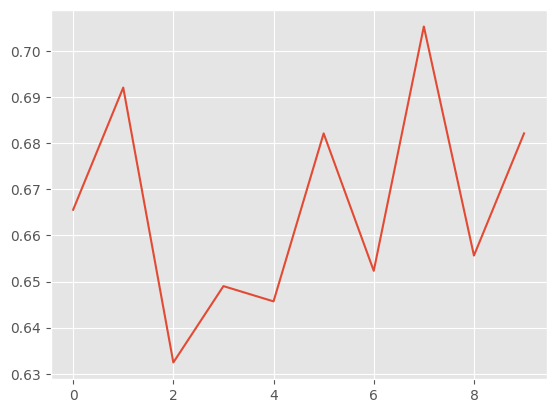

In [117]:
import matplotlib.pyplot as plt
plt.plot(acc_scores_xg)
plt.style.use('ggplot')
plt.savefig("XG boost Acc figures")
plt.show()

In [118]:
scores_xg_n = np.array(scores_xg)
y_test_all_n = np.array(y_test_all)

scores_xg_n = scores_xg_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [119]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_xg_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 66.62%


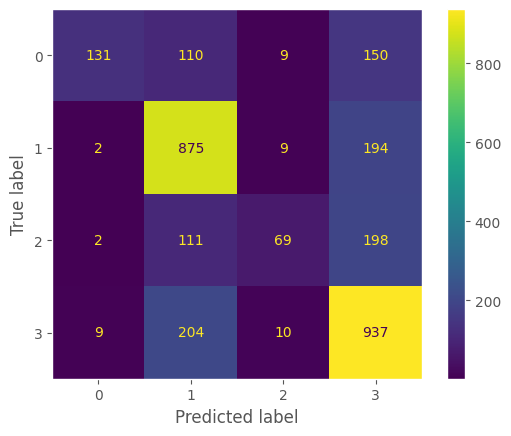

In [120]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_xg_n, labels=xg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xg.classes_)
disp.plot()
plt.grid(False)
plt.savefig("XG Boost")

plt.show()

In [121]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_xg_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.91      0.33      0.48       400
           1       0.67      0.81      0.74      1080
           2       0.71      0.18      0.29       380
           3       0.63      0.81      0.71      1160

    accuracy                           0.67      3020
   macro avg       0.73      0.53      0.55      3020
weighted avg       0.69      0.67      0.64      3020



# Catboost

In [122]:
import gc
gc.collect()

6363

In [123]:
import gc
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostClassifier

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_cb = []
times_cb = []
y_test_all = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)
    
    y_test_all.append(y_test)
    
    X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size=0.10)
    
    cb = CatBoostClassifier(iterations=100)
    
    start_time = time.time()
    
    cb.fit(X_train, y_train)
    
    end_time = time.time()
    
    x = cb.predict(X_test)
    scores_cb.append(x)
    times_cb.append(end_time - start_time)
    
    gc.collect()

Training on fold 1/10...
Learning rate set to 0.5
0:	learn: 1.2664119	total: 6.76s	remaining: 11m 8s
1:	learn: 1.1900815	total: 10.6s	remaining: 8m 41s
2:	learn: 1.1360009	total: 14.7s	remaining: 7m 54s
3:	learn: 1.1043858	total: 18.4s	remaining: 7m 20s
4:	learn: 1.0730767	total: 22.1s	remaining: 6m 59s
5:	learn: 1.0438618	total: 25.8s	remaining: 6m 44s
6:	learn: 1.0069970	total: 29.6s	remaining: 6m 33s
7:	learn: 0.9832020	total: 33.3s	remaining: 6m 23s
8:	learn: 0.9535929	total: 37s	remaining: 6m 14s
9:	learn: 0.9289714	total: 40.7s	remaining: 6m 6s
10:	learn: 0.9057054	total: 44.5s	remaining: 5m 59s
11:	learn: 0.8820252	total: 48.2s	remaining: 5m 53s
12:	learn: 0.8584139	total: 51.9s	remaining: 5m 47s
13:	learn: 0.8411572	total: 55.6s	remaining: 5m 41s
14:	learn: 0.8207345	total: 59.3s	remaining: 5m 36s
15:	learn: 0.7929066	total: 1m 3s	remaining: 5m 31s
16:	learn: 0.7734318	total: 1m 6s	remaining: 5m 26s
17:	learn: 0.7532050	total: 1m 10s	remaining: 5m 21s
18:	learn: 0.7338393	total

56:	learn: 0.2657943	total: 3m 34s	remaining: 2m 41s
57:	learn: 0.2622542	total: 3m 38s	remaining: 2m 38s
58:	learn: 0.2566251	total: 3m 41s	remaining: 2m 34s
59:	learn: 0.2503552	total: 3m 45s	remaining: 2m 30s
60:	learn: 0.2451481	total: 3m 49s	remaining: 2m 26s
61:	learn: 0.2392760	total: 3m 53s	remaining: 2m 22s
62:	learn: 0.2358218	total: 3m 56s	remaining: 2m 19s
63:	learn: 0.2295165	total: 4m	remaining: 2m 15s
64:	learn: 0.2247465	total: 4m 4s	remaining: 2m 11s
65:	learn: 0.2198086	total: 4m 7s	remaining: 2m 7s
66:	learn: 0.2126054	total: 4m 11s	remaining: 2m 3s
67:	learn: 0.2080975	total: 4m 15s	remaining: 2m
68:	learn: 0.2048475	total: 4m 19s	remaining: 1m 56s
69:	learn: 0.2012711	total: 4m 22s	remaining: 1m 52s
70:	learn: 0.1965959	total: 4m 26s	remaining: 1m 48s
71:	learn: 0.1907472	total: 4m 30s	remaining: 1m 45s
72:	learn: 0.1887014	total: 4m 33s	remaining: 1m 41s
73:	learn: 0.1869076	total: 4m 37s	remaining: 1m 37s
74:	learn: 0.1829100	total: 4m 41s	remaining: 1m 33s
75:	l

12:	learn: 0.8470114	total: 49.5s	remaining: 5m 31s
13:	learn: 0.8243247	total: 53.1s	remaining: 5m 26s
14:	learn: 0.7988168	total: 56.9s	remaining: 5m 22s
15:	learn: 0.7776386	total: 1m	remaining: 5m 18s
16:	learn: 0.7547396	total: 1m 4s	remaining: 5m 14s
17:	learn: 0.7354698	total: 1m 8s	remaining: 5m 10s
18:	learn: 0.7095066	total: 1m 11s	remaining: 5m 6s
19:	learn: 0.6843852	total: 1m 15s	remaining: 5m 1s
20:	learn: 0.6603087	total: 1m 19s	remaining: 4m 57s
21:	learn: 0.6399079	total: 1m 22s	remaining: 4m 53s
22:	learn: 0.6195050	total: 1m 26s	remaining: 4m 49s
23:	learn: 0.6026069	total: 1m 30s	remaining: 4m 45s
24:	learn: 0.5877864	total: 1m 33s	remaining: 4m 41s
25:	learn: 0.5753918	total: 1m 37s	remaining: 4m 38s
26:	learn: 0.5590342	total: 1m 41s	remaining: 4m 34s
27:	learn: 0.5443481	total: 1m 45s	remaining: 4m 30s
28:	learn: 0.5280916	total: 1m 48s	remaining: 4m 26s
29:	learn: 0.5125893	total: 1m 52s	remaining: 4m 22s
30:	learn: 0.4997143	total: 1m 56s	remaining: 4m 18s
31:	

68:	learn: 0.2177390	total: 4m 16s	remaining: 1m 55s
69:	learn: 0.2155022	total: 4m 19s	remaining: 1m 51s
70:	learn: 0.2123693	total: 4m 23s	remaining: 1m 47s
71:	learn: 0.2088928	total: 4m 27s	remaining: 1m 44s
72:	learn: 0.2052198	total: 4m 31s	remaining: 1m 40s
73:	learn: 0.2016457	total: 4m 34s	remaining: 1m 36s
74:	learn: 0.1998518	total: 4m 38s	remaining: 1m 32s
75:	learn: 0.1970585	total: 4m 42s	remaining: 1m 29s
76:	learn: 0.1946945	total: 4m 45s	remaining: 1m 25s
77:	learn: 0.1900463	total: 4m 49s	remaining: 1m 21s
78:	learn: 0.1867170	total: 4m 53s	remaining: 1m 17s
79:	learn: 0.1851420	total: 4m 56s	remaining: 1m 14s
80:	learn: 0.1814276	total: 5m	remaining: 1m 10s
81:	learn: 0.1780398	total: 5m 4s	remaining: 1m 6s
82:	learn: 0.1763786	total: 5m 8s	remaining: 1m 3s
83:	learn: 0.1728110	total: 5m 11s	remaining: 59.4s
84:	learn: 0.1698944	total: 5m 15s	remaining: 55.7s
85:	learn: 0.1666964	total: 5m 19s	remaining: 51.9s
86:	learn: 0.1635284	total: 5m 22s	remaining: 48.2s
87:	l

24:	learn: 0.6015129	total: 1m 34s	remaining: 4m 44s
25:	learn: 0.5834290	total: 1m 38s	remaining: 4m 40s
26:	learn: 0.5632431	total: 1m 42s	remaining: 4m 36s
27:	learn: 0.5466035	total: 1m 46s	remaining: 4m 33s
28:	learn: 0.5285142	total: 1m 50s	remaining: 4m 29s
29:	learn: 0.5119116	total: 1m 54s	remaining: 4m 26s
30:	learn: 0.5025757	total: 1m 58s	remaining: 4m 22s
31:	learn: 0.4883178	total: 2m 2s	remaining: 4m 19s
32:	learn: 0.4770167	total: 2m 6s	remaining: 4m 16s
33:	learn: 0.4643407	total: 2m 10s	remaining: 4m 13s
34:	learn: 0.4529127	total: 2m 14s	remaining: 4m 9s
35:	learn: 0.4442672	total: 2m 18s	remaining: 4m 6s
36:	learn: 0.4350797	total: 2m 22s	remaining: 4m 3s
37:	learn: 0.4242244	total: 2m 26s	remaining: 3m 59s
38:	learn: 0.4120063	total: 2m 30s	remaining: 3m 56s
39:	learn: 0.4031863	total: 2m 35s	remaining: 3m 52s
40:	learn: 0.3929265	total: 2m 39s	remaining: 3m 48s
41:	learn: 0.3831982	total: 2m 43s	remaining: 3m 45s
42:	learn: 0.3770978	total: 2m 47s	remaining: 3m 41

80:	learn: 0.1783674	total: 5m	remaining: 1m 10s
81:	learn: 0.1748527	total: 5m 4s	remaining: 1m 6s
82:	learn: 0.1716715	total: 5m 7s	remaining: 1m 3s
83:	learn: 0.1687954	total: 5m 11s	remaining: 59.4s
84:	learn: 0.1662346	total: 5m 15s	remaining: 55.7s
85:	learn: 0.1629660	total: 5m 19s	remaining: 52s
86:	learn: 0.1591870	total: 5m 22s	remaining: 48.3s
87:	learn: 0.1554103	total: 5m 26s	remaining: 44.5s
88:	learn: 0.1531634	total: 5m 30s	remaining: 40.8s
89:	learn: 0.1517421	total: 5m 34s	remaining: 37.1s
90:	learn: 0.1493683	total: 5m 37s	remaining: 33.4s
91:	learn: 0.1471167	total: 5m 41s	remaining: 29.7s
92:	learn: 0.1459048	total: 5m 45s	remaining: 26s
93:	learn: 0.1437306	total: 5m 48s	remaining: 22.3s
94:	learn: 0.1412870	total: 5m 52s	remaining: 18.6s
95:	learn: 0.1388657	total: 5m 56s	remaining: 14.8s
96:	learn: 0.1377039	total: 5m 59s	remaining: 11.1s
97:	learn: 0.1351397	total: 6m 3s	remaining: 7.42s
98:	learn: 0.1325978	total: 6m 7s	remaining: 3.71s
99:	learn: 0.1303491	to

36:	learn: 0.4220711	total: 2m 17s	remaining: 3m 53s
37:	learn: 0.4108963	total: 2m 20s	remaining: 3m 49s
38:	learn: 0.3981786	total: 2m 24s	remaining: 3m 46s
39:	learn: 0.3920505	total: 2m 28s	remaining: 3m 42s
40:	learn: 0.3798740	total: 2m 31s	remaining: 3m 38s
41:	learn: 0.3714545	total: 2m 35s	remaining: 3m 35s
42:	learn: 0.3605905	total: 2m 39s	remaining: 3m 31s
43:	learn: 0.3527626	total: 2m 43s	remaining: 3m 27s
44:	learn: 0.3471656	total: 2m 46s	remaining: 3m 23s
45:	learn: 0.3407378	total: 2m 50s	remaining: 3m 20s
46:	learn: 0.3336886	total: 2m 54s	remaining: 3m 16s
47:	learn: 0.3224228	total: 2m 57s	remaining: 3m 12s
48:	learn: 0.3160859	total: 3m 1s	remaining: 3m 8s
49:	learn: 0.3109289	total: 3m 5s	remaining: 3m 5s
50:	learn: 0.3047229	total: 3m 8s	remaining: 3m 1s
51:	learn: 0.2989818	total: 3m 12s	remaining: 2m 57s
52:	learn: 0.2945415	total: 3m 16s	remaining: 2m 54s
53:	learn: 0.2905204	total: 3m 19s	remaining: 2m 50s
54:	learn: 0.2840945	total: 3m 23s	remaining: 2m 46s

In [124]:
times_cb

[399.1735095977783,
 399.1343741416931,
 396.3813383579254,
 388.08408212661743,
 392.8849341869354,
 387.63903856277466,
 405.60585045814514,
 391.80247950553894,
 388.9734716415405,
 391.7768952846527]

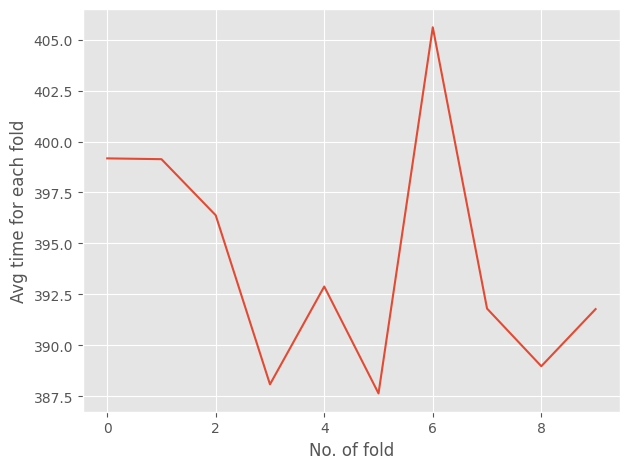

In [125]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.plot(times_cb)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("cb times")
plt.show()

In [126]:
from sklearn.metrics import accuracy_score
acc_scores_cb = []
for i in range(len(y_test_all)):
    acc_scores_cb.append(accuracy_score(y_test_all[i],scores_cb[i]))

In [127]:
acc_scores_cb

[0.6556291390728477,
 0.5960264900662252,
 0.6688741721854304,
 0.5496688741721855,
 0.6026490066225165,
 0.6258278145695364,
 0.6125827814569537,
 0.6192052980132451,
 0.6026490066225165,
 0.6589403973509934]

In [128]:
df_acc = pd.DataFrame([acc_scores_cb])

df_acc.to_csv('cb_accuracy', index=False)

df_acc = pd.read_csv('cb_accuracy')

acc_scores_cb = df_acc.iloc[0].values

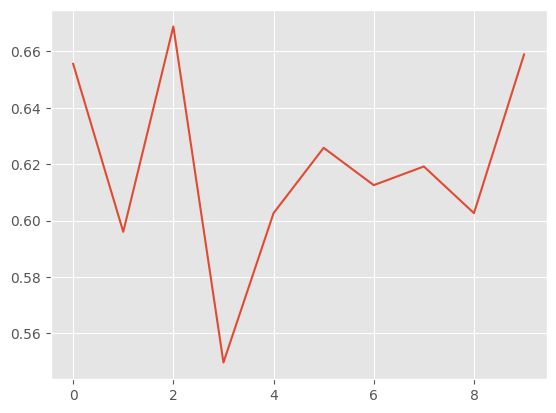

In [129]:
# import seaborn as sns
# sns.histplot(data=acc_scores,bins=20, kde=True)
import matplotlib.pyplot as plt
plt.plot(acc_scores_cb)
plt.style.use('ggplot')
plt.savefig("Catboost acc scores")
plt.show()

In [130]:
scores_cb_n = np.array(scores_cb)
y_test_all_n = np.array(y_test_all)

scores_cb_n = scores_cb_n.flatten()
y_test_all_n = y_test_all_n.flatten()

In [131]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_all_n, scores_cb_n)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 61.92%


In [132]:
import gc
gc.collect()

3341

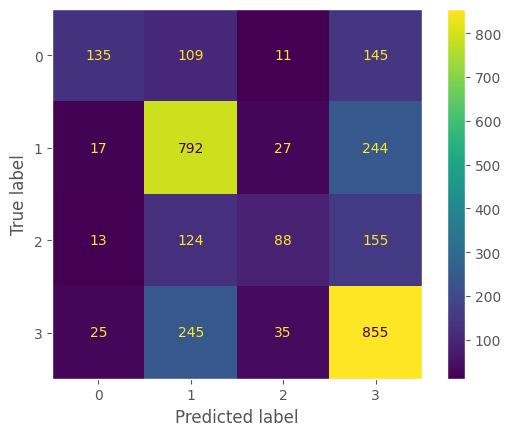

In [133]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, scores_cb_n, labels=cb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=cb.classes_)
disp.plot()
plt.grid(False)
plt.savefig("Catboost")

plt.show()

In [134]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, scores_cb_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.71      0.34      0.46       400
           1       0.62      0.73      0.67      1080
           2       0.55      0.23      0.33       380
           3       0.61      0.74      0.67      1160

    accuracy                           0.62      3020
   macro avg       0.62      0.51      0.53      3020
weighted avg       0.62      0.62      0.60      3020



In [135]:
times_svm_n = [i/60 for i in times_svm]
times_dtc_n = [i/60 for i in times_dtc]
times_rdf_n = [i/60 for i in times_rdf]
times_knn_n = [i/60 for i in times_knn]
times_nb_n = [i/60 for i in times_nb]
times_xg_n = [i/60 for i in times_xg]
times_cb_n = [i/60 for i in times_cb]

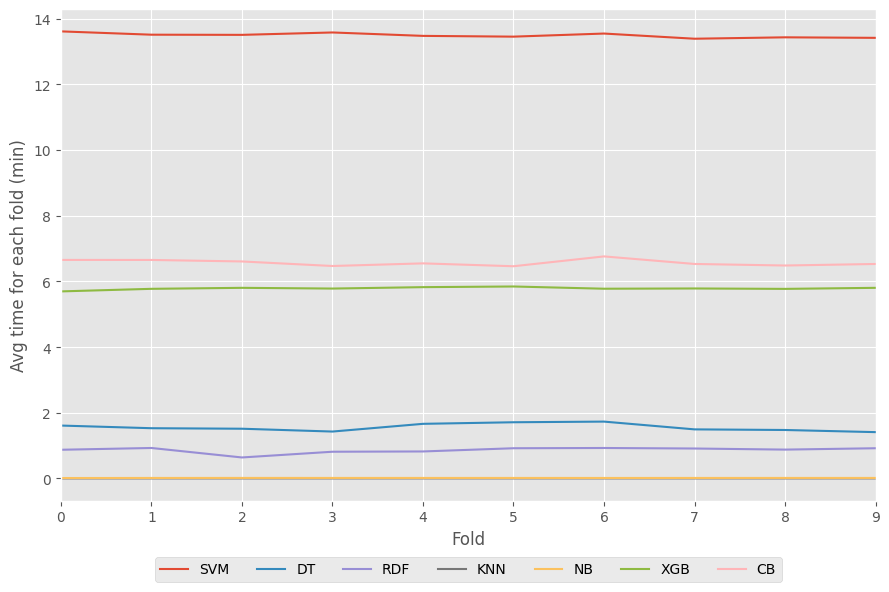

In [136]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(9,6))
plt.plot(times_svm_n,label='SVM')
plt.plot(times_dtc_n,label='DT')
plt.plot(times_rdf_n,label='RDF')
plt.plot(times_knn_n,label='KNN')
plt.plot(times_nb_n,label='NB')
plt.plot(times_xg_n,label='XGB')
plt.plot(times_cb_n,label='CB')

plt.xlabel("Fold")
plt.ylabel("Avg time for each fold (min)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=7)
plt.xlim([0,9])
plt.tight_layout()
plt.savefig("Machine Learning Melspec Times")
plt.show()

In [137]:
acc_scores_svm_n = [i*100 for i in acc_scores_svm]
acc_scores_dtc_n = [i*100 for i in acc_scores_dtc]
acc_scores_rdf_n = [i*100 for i in acc_scores_rdf]
acc_scores_knn_n = [i*100 for i in acc_scores_knn]
acc_scores_nb_n = [i*100 for i in acc_scores_nb]
acc_scores_xg_n = [i*100 for i in acc_scores_xg]
acc_scores_cb_n = [i*100 for i in acc_scores_cb]

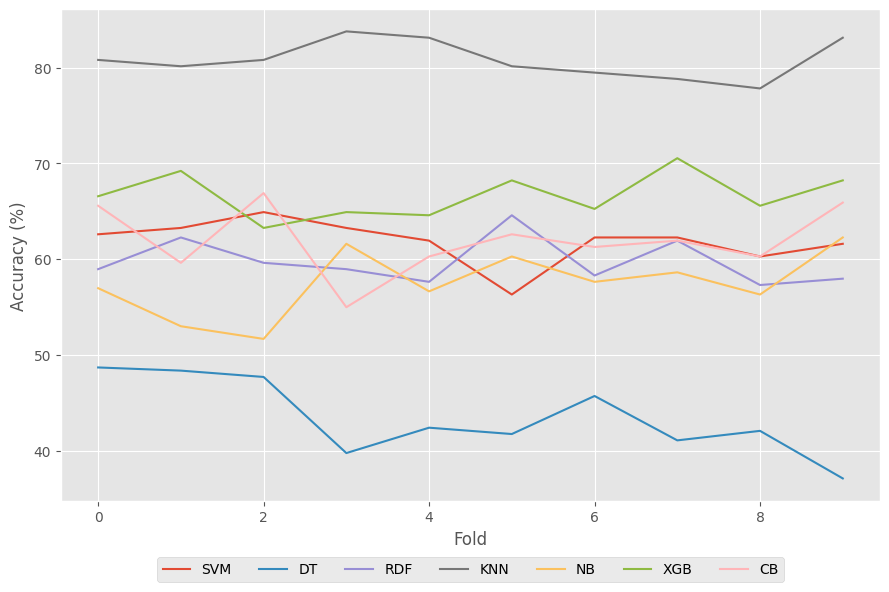

In [138]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(9,6))
plt.plot(acc_scores_svm_n,label='SVM')
plt.plot(acc_scores_dtc_n,label='DT')
plt.plot(acc_scores_rdf_n,label='RDF')
plt.plot(acc_scores_knn_n,label='KNN')
plt.plot(acc_scores_nb_n,label='NB')
plt.plot(acc_scores_xg_n,label='XGB')
plt.plot(acc_scores_cb_n,label='CB')

plt.xlabel("Fold")
plt.ylabel("Accuracy (%)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10),ncol=7)
plt.tight_layout()
plt.savefig("Machine Learning Melspec Accuracy")
plt.show()

# LSTM

In [167]:
import gc
gc.collect()

6421

In [168]:
from sklearn.model_selection import train_test_split

In [169]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout , LSTM

In [170]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_lstm = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_lstm.append(self.times)

# early_stop = EarlyStopping(monitor='loss', patience=17, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 10, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [171]:
def create_model_lstm():
    
    model_lstm = keras.Sequential([

        keras.layers.LSTM(256,activation='tanh',input_shape=(X.shape[1],X.shape[2]),return_sequences=True),
        keras.layers.Dropout(0.25),

        keras.layers.LSTM(128,activation='tanh',return_sequences=True),
        keras.layers.Dropout(0.25),

        keras.layers.LSTM(64,activation='tanh'),
        keras.layers.Dropout(0.25),

        keras.layers.Dense(4,activation='softmax')

    ])
    
    return model_lstm

In [172]:
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_lstm = []
y_test_all_lstm = []
train_acc_lstm = []
test_acc_lstm = []
train_loss_lstm = []
test_loss_lstm = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_lstm.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_lstm = None
    model_lstm = create_model_lstm()
        
    model_lstm.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_lstm.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_lstm.predict(X_test)
    
    scores_lstm.append(x)
    train_acc_lstm.append(history.history["accuracy"])
    test_acc_lstm.append(history.history["val_accuracy"])
    train_loss_lstm.append(history.history["loss"])
    test_loss_lstm.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 7s 62ms/step - loss: 1.0925 - accuracy: 0.5188 - val_loss: 1.0459 - val_accuracy: 0.5809 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 4s 52ms/step - loss: 0.7454 - accuracy: 0.7011 - val_loss: 0.8095 - val_accuracy: 0.6654 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 5s 60ms/step - loss: 0.5372 - accuracy: 0.7952 - val_loss: 0.6946 - val_accuracy: 0.7574 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 4s 54ms/step - loss: 0.4338 - accuracy: 0.8401 - val_loss: 0.4813 - val_accuracy: 0.8493 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 4s 56ms/step - loss: 0.2843 - accuracy: 0.9019 - val_loss: 0.7488 - val_accuracy: 0.7243 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 4s 54ms/step - loss: 0.3568 - accuracy: 0.8737 - val_loss: 0.5405 - val_accuracy: 0.7904 - lr: 0.0010
Epoch 7/100
77/77 [==========================

77/77 [==============================] - 4s 56ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3737 - val_accuracy: 0.9265 - lr: 1.6000e-06
Epoch 59/100
77/77 [==============================] - 5s 59ms/step - loss: 9.3257e-04 - accuracy: 1.0000 - val_loss: 0.3738 - val_accuracy: 0.9265 - lr: 1.6000e-06
Epoch 60/100
77/77 [==============================] - 4s 55ms/step - loss: 9.2072e-04 - accuracy: 1.0000 - val_loss: 0.3739 - val_accuracy: 0.9265 - lr: 1.6000e-06
Epoch 61/100
77/77 [==============================] - 4s 55ms/step - loss: 9.5196e-04 - accuracy: 1.0000 - val_loss: 0.3739 - val_accuracy: 0.9265 - lr: 1.6000e-06
Epoch 62/100
77/77 [==============================] - 4s 57ms/step - loss: 9.9011e-04 - accuracy: 1.0000 - val_loss: 0.3740 - val_accuracy: 0.9265 - lr: 1.6000e-06
Epoch 63/100
77/77 [==============================] - 5s 59ms/step - loss: 9.6738e-04 - accuracy: 1.0000 - val_loss: 0.3741 - val_accuracy: 0.9265 - lr: 1.6000e-06
Epoch 64/100
77/77 [=============

76/77 [============================>.] - ETA: 0s - loss: 9.5373e-04 - accuracy: 1.0000
Epoch 86: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 86: 4.53 seconds
77/77 [==============================] - 5s 58ms/step - loss: 9.5399e-04 - accuracy: 1.0000 - val_loss: 0.3745 - val_accuracy: 0.9265 - lr: 6.4000e-08
Epoch 87/100
77/77 [==============================] - 4s 52ms/step - loss: 9.9577e-04 - accuracy: 1.0000 - val_loss: 0.3745 - val_accuracy: 0.9265 - lr: 1.2800e-08
Epoch 88/100
77/77 [==============================] - 4s 57ms/step - loss: 9.6319e-04 - accuracy: 1.0000 - val_loss: 0.3745 - val_accuracy: 0.9265 - lr: 1.2800e-08
Epoch 89/100
77/77 [==============================] - 4s 56ms/step - loss: 9.9721e-04 - accuracy: 1.0000 - val_loss: 0.3745 - val_accuracy: 0.9265 - lr: 1.2800e-08
Epoch 90/100
77/77 [==============================] - 4s 55ms/step - loss: 9.6219e-04 - accuracy: 1.0000 - val_loss: 0.3745 - val_accuracy: 0.9265 - lr: 1

Epoch 44/100
77/77 [==============================] - 4s 55ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.3077 - val_accuracy: 0.9228 - lr: 2.0000e-04
Epoch 45/100
77/77 [==============================] - 4s 54ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.3109 - val_accuracy: 0.9228 - lr: 2.0000e-04
Epoch 46/100
77/77 [==============================] - 4s 57ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.3138 - val_accuracy: 0.9228 - lr: 2.0000e-04
Epoch 47/100
77/77 [==============================] - 4s 55ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3189 - val_accuracy: 0.9228 - lr: 2.0000e-04
Epoch 48/100
77/77 [==============================] - 4s 55ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.3232 - val_accuracy: 0.9191 - lr: 2.0000e-04
Epoch 49/100
76/77 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 49: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 49: 4

77/77 [==============================] - 4s 57ms/step - loss: 9.0635e-04 - accuracy: 1.0000 - val_loss: 0.3354 - val_accuracy: 0.9191 - lr: 1.6000e-06
Epoch 73/100
77/77 [==============================] - 4s 58ms/step - loss: 8.9332e-04 - accuracy: 1.0000 - val_loss: 0.3354 - val_accuracy: 0.9191 - lr: 1.6000e-06
Epoch 74/100
77/77 [==============================] - 4s 55ms/step - loss: 9.1641e-04 - accuracy: 1.0000 - val_loss: 0.3354 - val_accuracy: 0.9191 - lr: 1.6000e-06
Epoch 75/100
77/77 [==============================] - 4s 53ms/step - loss: 9.3628e-04 - accuracy: 1.0000 - val_loss: 0.3355 - val_accuracy: 0.9191 - lr: 1.6000e-06
Epoch 76/100
77/77 [==============================] - 5s 59ms/step - loss: 8.9888e-04 - accuracy: 1.0000 - val_loss: 0.3356 - val_accuracy: 0.9191 - lr: 1.6000e-06
Epoch 77/100
77/77 [==============================] - 4s 55ms/step - loss: 9.0155e-04 - accuracy: 1.0000 - val_loss: 0.3357 - val_accuracy: 0.9191 - lr: 1.6000e-06
Epoch 78/100
77/77 [=========

Epoch 100/100
10/10 [==============================] - 1s 21ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 8s 66ms/step - loss: 1.1562 - accuracy: 0.5020 - val_loss: 0.9231 - val_accuracy: 0.6140 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 5s 59ms/step - loss: 0.7960 - accuracy: 0.6750 - val_loss: 0.8148 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 4s 54ms/step - loss: 0.5651 - accuracy: 0.7866 - val_loss: 0.6036 - val_accuracy: 0.7757 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 5s 59ms/step - loss: 0.4567 - accuracy: 0.8324 - val_loss: 0.4892 - val_accuracy: 0.8346 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 4s 58ms/step - loss: 0.3180 - accuracy: 0.8962 - val_loss: 0.5445 - val_accuracy: 0.8199 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 4s 59ms/step - loss: 0.2617 - accuracy: 0.9064 - val_loss: 0.5177 - val_accurac

Epoch 30/100
77/77 [==============================] - 4s 54ms/step - loss: 0.0121 - accuracy: 0.9975 - val_loss: 0.3049 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 31/100
77/77 [==============================] - 4s 56ms/step - loss: 0.0074 - accuracy: 0.9992 - val_loss: 0.3358 - val_accuracy: 0.9338 - lr: 0.0010
Epoch 32/100
77/77 [==============================] - 4s 56ms/step - loss: 0.0119 - accuracy: 0.9971 - val_loss: 0.3120 - val_accuracy: 0.9338 - lr: 0.0010
Epoch 33/100
77/77 [==============================] - 4s 55ms/step - loss: 0.2966 - accuracy: 0.9195 - val_loss: 0.5351 - val_accuracy: 0.8382 - lr: 0.0010
Epoch 34/100
77/77 [==============================] - 4s 56ms/step - loss: 0.1298 - accuracy: 0.9599 - val_loss: 0.3835 - val_accuracy: 0.9081 - lr: 0.0010
Epoch 35/100
76/77 [============================>.] - ETA: 0s - loss: 0.1113 - accuracy: 0.9650
Epoch 35: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 35: 4.26 seconds
77/77 [=

Epoch 59/100
77/77 [==============================] - 4s 51ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.2891 - val_accuracy: 0.9522 - lr: 4.0000e-05
Epoch 60/100
77/77 [==============================] - 4s 54ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.2900 - val_accuracy: 0.9522 - lr: 4.0000e-05
Epoch 61/100
77/77 [==============================] - 4s 56ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.2952 - val_accuracy: 0.9485 - lr: 4.0000e-05
Epoch 62/100
77/77 [==============================] - 4s 55ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3016 - val_accuracy: 0.9485 - lr: 4.0000e-05
Epoch 63/100
77/77 [==============================] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 63: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 63: 4.12 seconds
77/77 [==============================] - 4s 53ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3014 - val_accuracy: 0.9485 - lr: 4.0000e-05
Ep

Epoch 88/100
77/77 [==============================] - 4s 56ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3032 - val_accuracy: 0.9485 - lr: 3.2000e-07
Epoch 89/100
77/77 [==============================] - 4s 55ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3032 - val_accuracy: 0.9485 - lr: 3.2000e-07
Epoch 90/100
77/77 [==============================] - 4s 57ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3032 - val_accuracy: 0.9485 - lr: 3.2000e-07
Epoch 91/100
77/77 [==============================] - 4s 58ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3032 - val_accuracy: 0.9485 - lr: 3.2000e-07
Epoch 92/100
77/77 [==============================] - 4s 55ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3032 - val_accuracy: 0.9485 - lr: 3.2000e-07
Epoch 93/100
77/77 [==============================] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 93: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 93: 4.

Epoch 17/100
77/77 [==============================] - 4s 53ms/step - loss: 0.2078 - accuracy: 0.9289 - val_loss: 0.4374 - val_accuracy: 0.8566 - lr: 0.0010
Epoch 18/100
77/77 [==============================] - 4s 57ms/step - loss: 0.0865 - accuracy: 0.9742 - val_loss: 0.5347 - val_accuracy: 0.8529 - lr: 0.0010
Epoch 19/100
77/77 [==============================] - 4s 53ms/step - loss: 0.0498 - accuracy: 0.9828 - val_loss: 0.4578 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 20/100
77/77 [==============================] - 4s 56ms/step - loss: 0.0290 - accuracy: 0.9914 - val_loss: 0.3833 - val_accuracy: 0.8897 - lr: 0.0010
Epoch 21/100
77/77 [==============================] - 4s 53ms/step - loss: 0.0527 - accuracy: 0.9836 - val_loss: 0.7830 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 22/100
77/77 [==============================] - 4s 56ms/step - loss: 0.1941 - accuracy: 0.9419 - val_loss: 0.3933 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 23/100
76/77 [============================>.] - ETA: 0s - 

Epoch 46/100
77/77 [==============================] - 4s 55ms/step - loss: 6.8414e-04 - accuracy: 1.0000 - val_loss: 0.4472 - val_accuracy: 0.9154 - lr: 4.0000e-05
Epoch 47/100
77/77 [==============================] - 4s 53ms/step - loss: 6.2917e-04 - accuracy: 1.0000 - val_loss: 0.4468 - val_accuracy: 0.9154 - lr: 4.0000e-05
Epoch 48/100
77/77 [==============================] - 4s 55ms/step - loss: 6.3889e-04 - accuracy: 1.0000 - val_loss: 0.4465 - val_accuracy: 0.9154 - lr: 4.0000e-05
Epoch 49/100
77/77 [==============================] - 4s 55ms/step - loss: 6.2732e-04 - accuracy: 1.0000 - val_loss: 0.4461 - val_accuracy: 0.9154 - lr: 4.0000e-05
Epoch 50/100
77/77 [==============================] - 4s 54ms/step - loss: 6.2525e-04 - accuracy: 1.0000 - val_loss: 0.4463 - val_accuracy: 0.9154 - lr: 4.0000e-05
Epoch 51/100
77/77 [==============================] - 4s 53ms/step - loss: 6.1711e-04 - accuracy: 1.0000 - val_loss: 0.4479 - val_accuracy: 0.9154 - lr: 4.0000e-05
Epoch 52/100
77/

Epoch 74/100
77/77 [==============================] - 5s 59ms/step - loss: 5.4386e-04 - accuracy: 1.0000 - val_loss: 0.4526 - val_accuracy: 0.9154 - lr: 1.6000e-06
Epoch 75/100
76/77 [============================>.] - ETA: 0s - loss: 5.5262e-04 - accuracy: 1.0000
Epoch 75: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 75: 4.77 seconds
77/77 [==============================] - 5s 62ms/step - loss: 5.5229e-04 - accuracy: 1.0000 - val_loss: 0.4525 - val_accuracy: 0.9154 - lr: 1.6000e-06
Epoch 76/100
77/77 [==============================] - 4s 57ms/step - loss: 5.2412e-04 - accuracy: 1.0000 - val_loss: 0.4525 - val_accuracy: 0.9154 - lr: 3.2000e-07
Epoch 77/100
77/77 [==============================] - 4s 54ms/step - loss: 5.5668e-04 - accuracy: 1.0000 - val_loss: 0.4525 - val_accuracy: 0.9154 - lr: 3.2000e-07
Epoch 78/100
77/77 [==============================] - 5s 60ms/step - loss: 5.6618e-04 - accuracy: 1.0000 - val_loss: 0.4525 - val_accuracy: 0.

Epoch 2/100
77/77 [==============================] - 4s 57ms/step - loss: 0.7698 - accuracy: 0.7105 - val_loss: 0.6088 - val_accuracy: 0.7610 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 4s 56ms/step - loss: 0.6063 - accuracy: 0.7764 - val_loss: 0.6553 - val_accuracy: 0.7537 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 4s 57ms/step - loss: 0.4615 - accuracy: 0.8410 - val_loss: 0.6151 - val_accuracy: 0.7684 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 4s 54ms/step - loss: 0.4381 - accuracy: 0.8348 - val_loss: 0.5071 - val_accuracy: 0.8051 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 4s 58ms/step - loss: 0.3016 - accuracy: 0.8913 - val_loss: 0.5384 - val_accuracy: 0.7721 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 4s 57ms/step - loss: 0.2039 - accuracy: 0.9280 - val_loss: 0.5949 - val_accuracy: 0.8346 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - 4s 55ms/step - lo

Epoch 32/100
77/77 [==============================] - 4s 54ms/step - loss: 0.0031 - accuracy: 0.9996 - val_loss: 0.3586 - val_accuracy: 0.9228 - lr: 2.0000e-04
Epoch 33/100
77/77 [==============================] - 4s 56ms/step - loss: 0.0030 - accuracy: 0.9996 - val_loss: 0.3599 - val_accuracy: 0.9228 - lr: 2.0000e-04
Epoch 34/100
77/77 [==============================] - 4s 57ms/step - loss: 0.0027 - accuracy: 0.9996 - val_loss: 0.3631 - val_accuracy: 0.9228 - lr: 2.0000e-04
Epoch 35/100
77/77 [==============================] - 4s 52ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.3672 - val_accuracy: 0.9228 - lr: 2.0000e-04
Epoch 36/100
77/77 [==============================] - 4s 58ms/step - loss: 0.0023 - accuracy: 0.9996 - val_loss: 0.3713 - val_accuracy: 0.9228 - lr: 2.0000e-04
Epoch 37/100
77/77 [==============================] - 4s 56ms/step - loss: 0.0022 - accuracy: 0.9996 - val_loss: 0.3758 - val_accuracy: 0.9228 - lr: 2.0000e-04
Epoch 38/100
77/77 [====================

Epoch 61/100
77/77 [==============================] - 4s 58ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3887 - val_accuracy: 0.9228 - lr: 1.6000e-06
Epoch 62/100
77/77 [==============================] - 4s 58ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3888 - val_accuracy: 0.9228 - lr: 1.6000e-06
Epoch 63/100
77/77 [==============================] - 4s 58ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3889 - val_accuracy: 0.9228 - lr: 1.6000e-06
Epoch 64/100
77/77 [==============================] - 4s 57ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.3889 - val_accuracy: 0.9228 - lr: 1.6000e-06
Epoch 65/100
77/77 [==============================] - 4s 57ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3890 - val_accuracy: 0.9228 - lr: 1.6000e-06
Epoch 66/100
77/77 [==============================] - 4s 55ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3891 - val_accuracy: 0.9228 - lr: 1.6000e-06
Epoch 67/100
77/77 [====================

Epoch 90/100
77/77 [==============================] - 4s 56ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.3895 - val_accuracy: 0.9228 - lr: 1.2800e-08
Epoch 91/100
77/77 [==============================] - 4s 55ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.3895 - val_accuracy: 0.9228 - lr: 1.2800e-08
Epoch 92/100
77/77 [==============================] - 4s 56ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.3895 - val_accuracy: 0.9228 - lr: 1.2800e-08
Epoch 93/100
77/77 [==============================] - 4s 54ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3895 - val_accuracy: 0.9228 - lr: 1.2800e-08
Epoch 94/100
77/77 [==============================] - 4s 54ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3895 - val_accuracy: 0.9228 - lr: 1.2800e-08
Epoch 95/100
77/77 [==============================] - 4s 57ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3895 - val_accuracy: 0.9228 - lr: 1.2800e-08
Epoch 96/100
77/77 [====================

77/77 [==============================] - 4s 53ms/step - loss: 0.1029 - accuracy: 0.9673 - val_loss: 0.3686 - val_accuracy: 0.8971 - lr: 0.0010
Epoch 20/100
77/77 [==============================] - 4s 56ms/step - loss: 0.0739 - accuracy: 0.9779 - val_loss: 0.4290 - val_accuracy: 0.8787 - lr: 0.0010
Epoch 21/100
77/77 [==============================] - 5s 59ms/step - loss: 0.0516 - accuracy: 0.9861 - val_loss: 0.3478 - val_accuracy: 0.9154 - lr: 0.0010
Epoch 22/100
77/77 [==============================] - 5s 60ms/step - loss: 0.1026 - accuracy: 0.9644 - val_loss: 0.3790 - val_accuracy: 0.8860 - lr: 0.0010
Epoch 23/100
77/77 [==============================] - 4s 57ms/step - loss: 0.0734 - accuracy: 0.9791 - val_loss: 0.4428 - val_accuracy: 0.8934 - lr: 0.0010
Epoch 24/100
77/77 [==============================] - 4s 57ms/step - loss: 0.0364 - accuracy: 0.9922 - val_loss: 0.3637 - val_accuracy: 0.9228 - lr: 0.0010
Epoch 25/100
77/77 [==============================] - 5s 59ms/step - loss: 0.

Epoch 48/100
77/77 [==============================] - 4s 53ms/step - loss: 2.7753e-04 - accuracy: 1.0000 - val_loss: 0.3843 - val_accuracy: 0.9412 - lr: 2.0000e-04
Epoch 49/100
77/77 [==============================] - 5s 61ms/step - loss: 2.7701e-04 - accuracy: 1.0000 - val_loss: 0.3853 - val_accuracy: 0.9412 - lr: 2.0000e-04
Epoch 50/100
76/77 [============================>.] - ETA: 0s - loss: 2.5950e-04 - accuracy: 1.0000
Epoch 50: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 50: 4.61 seconds
77/77 [==============================] - 5s 60ms/step - loss: 2.5987e-04 - accuracy: 1.0000 - val_loss: 0.3862 - val_accuracy: 0.9412 - lr: 2.0000e-04
Epoch 51/100
77/77 [==============================] - 5s 60ms/step - loss: 2.6014e-04 - accuracy: 1.0000 - val_loss: 0.3864 - val_accuracy: 0.9412 - lr: 4.0000e-05
Epoch 52/100
77/77 [==============================] - 4s 54ms/step - loss: 2.8315e-04 - accuracy: 1.0000 - val_loss: 0.3865 - val_accuracy: 0

Epoch 76/100
77/77 [==============================] - 4s 57ms/step - loss: 2.7499e-04 - accuracy: 1.0000 - val_loss: 0.3894 - val_accuracy: 0.9412 - lr: 1.6000e-06
Epoch 77/100
77/77 [==============================] - 5s 59ms/step - loss: 2.6110e-04 - accuracy: 1.0000 - val_loss: 0.3895 - val_accuracy: 0.9412 - lr: 1.6000e-06
Epoch 78/100
77/77 [==============================] - 4s 51ms/step - loss: 2.6448e-04 - accuracy: 1.0000 - val_loss: 0.3895 - val_accuracy: 0.9412 - lr: 1.6000e-06
Epoch 79/100
77/77 [==============================] - 4s 52ms/step - loss: 2.6317e-04 - accuracy: 1.0000 - val_loss: 0.3895 - val_accuracy: 0.9412 - lr: 1.6000e-06
Epoch 80/100
77/77 [==============================] - ETA: 0s - loss: 2.5808e-04 - accuracy: 1.0000
Epoch 80: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 80: 4.64 seconds
77/77 [==============================] - 5s 60ms/step - loss: 2.5808e-04 - accuracy: 1.0000 - val_loss: 0.3895 - val_accuracy: 0.

Epoch 4/100
77/77 [==============================] - 5s 59ms/step - loss: 0.5070 - accuracy: 0.8177 - val_loss: 0.6649 - val_accuracy: 0.7463 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 4s 58ms/step - loss: 0.3009 - accuracy: 0.9035 - val_loss: 0.7819 - val_accuracy: 0.7794 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 4s 57ms/step - loss: 0.3324 - accuracy: 0.8818 - val_loss: 0.8703 - val_accuracy: 0.7647 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 4s 56ms/step - loss: 0.3560 - accuracy: 0.8823 - val_loss: 0.5420 - val_accuracy: 0.8235 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - 4s 56ms/step - loss: 0.2265 - accuracy: 0.9240 - val_loss: 0.4789 - val_accuracy: 0.8309 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 5s 61ms/step - loss: 0.4070 - accuracy: 0.8647 - val_loss: 0.9860 - val_accuracy: 0.5184 - lr: 0.0010
Epoch 10/100
77/77 [==============================] - 4s 55ms/step - l

Epoch 34/100
77/77 [==============================] - 5s 59ms/step - loss: 0.0118 - accuracy: 0.9988 - val_loss: 0.4061 - val_accuracy: 0.9118 - lr: 2.0000e-04
Epoch 35/100
77/77 [==============================] - 4s 58ms/step - loss: 0.0086 - accuracy: 0.9988 - val_loss: 0.4135 - val_accuracy: 0.9081 - lr: 2.0000e-04
Epoch 36/100
77/77 [==============================] - 4s 56ms/step - loss: 0.0092 - accuracy: 0.9984 - val_loss: 0.4242 - val_accuracy: 0.9081 - lr: 2.0000e-04
Epoch 37/100
77/77 [==============================] - 5s 59ms/step - loss: 0.0073 - accuracy: 0.9980 - val_loss: 0.4385 - val_accuracy: 0.9118 - lr: 2.0000e-04
Epoch 38/100
77/77 [==============================] - 4s 55ms/step - loss: 0.0060 - accuracy: 0.9988 - val_loss: 0.4529 - val_accuracy: 0.9081 - lr: 2.0000e-04
Epoch 39/100
77/77 [==============================] - 4s 56ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.4609 - val_accuracy: 0.9081 - lr: 2.0000e-04
Epoch 40/100
77/77 [====================

Epoch 63/100
77/77 [==============================] - 4s 56ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.5089 - val_accuracy: 0.9081 - lr: 8.0000e-06
Epoch 64/100
77/77 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 64: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 64: 4.56 seconds
77/77 [==============================] - 5s 59ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.5093 - val_accuracy: 0.9081 - lr: 8.0000e-06
Epoch 65/100
77/77 [==============================] - 4s 54ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.5093 - val_accuracy: 0.9081 - lr: 1.6000e-06
Epoch 66/100
77/77 [==============================] - 4s 53ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.5094 - val_accuracy: 0.9081 - lr: 1.6000e-06
Epoch 67/100
77/77 [==============================] - 4s 58ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.5095 - val_accuracy: 0.9081 - lr: 1.6000e-06
E

Epoch 92/100
77/77 [==============================] - 4s 55ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.5106 - val_accuracy: 0.9081 - lr: 6.4000e-08
Epoch 93/100
77/77 [==============================] - 4s 57ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.5106 - val_accuracy: 0.9081 - lr: 6.4000e-08
Epoch 94/100
76/77 [============================>.] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 94: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 94: 4.63 seconds
77/77 [==============================] - 5s 60ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.5106 - val_accuracy: 0.9081 - lr: 6.4000e-08
Epoch 95/100
77/77 [==============================] - 4s 53ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.5106 - val_accuracy: 0.9081 - lr: 1.2800e-08
Epoch 96/100
77/77 [==============================] - 4s 58ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.5106 - val_accuracy: 0.9081 - lr: 1.2800e-08
E

77/77 [==============================] - 4s 56ms/step - loss: 0.0692 - accuracy: 0.9800 - val_loss: 0.3571 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 22/100
77/77 [==============================] - 4s 54ms/step - loss: 0.0309 - accuracy: 0.9926 - val_loss: 0.3790 - val_accuracy: 0.9118 - lr: 0.0010
Epoch 23/100
77/77 [==============================] - 4s 54ms/step - loss: 0.0403 - accuracy: 0.9886 - val_loss: 0.3254 - val_accuracy: 0.9081 - lr: 0.0010
Epoch 24/100
77/77 [==============================] - 4s 55ms/step - loss: 0.0449 - accuracy: 0.9873 - val_loss: 1.0391 - val_accuracy: 0.7868 - lr: 0.0010
Epoch 25/100
76/77 [============================>.] - ETA: 0s - loss: 0.2759 - accuracy: 0.9219
Epoch 25: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 25: 4.37 seconds
77/77 [==============================] - 4s 57ms/step - loss: 0.2744 - accuracy: 0.9223 - val_loss: 0.1825 - val_accuracy: 0.9412 - lr: 0.0010
Epoch 26/100
77/77 [==============

Epoch 50/100
77/77 [==============================] - 4s 54ms/step - loss: 9.7959e-04 - accuracy: 1.0000 - val_loss: 0.1782 - val_accuracy: 0.9596 - lr: 4.0000e-05
Epoch 51/100
77/77 [==============================] - ETA: 0s - loss: 9.6410e-04 - accuracy: 1.0000
Epoch 51: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 51: 4.16 seconds
77/77 [==============================] - 4s 54ms/step - loss: 9.6410e-04 - accuracy: 1.0000 - val_loss: 0.1782 - val_accuracy: 0.9596 - lr: 4.0000e-05
Epoch 52/100
77/77 [==============================] - 4s 52ms/step - loss: 9.9283e-04 - accuracy: 1.0000 - val_loss: 0.1782 - val_accuracy: 0.9596 - lr: 8.0000e-06
Epoch 53/100
77/77 [==============================] - 4s 54ms/step - loss: 9.1869e-04 - accuracy: 1.0000 - val_loss: 0.1783 - val_accuracy: 0.9596 - lr: 8.0000e-06
Epoch 54/100
77/77 [==============================] - 4s 53ms/step - loss: 9.9731e-04 - accuracy: 1.0000 - val_loss: 0.1783 - val_accuracy: 0.

Epoch 78/100
77/77 [==============================] - 5s 60ms/step - loss: 8.7973e-04 - accuracy: 1.0000 - val_loss: 0.1798 - val_accuracy: 0.9669 - lr: 1.6000e-06
Epoch 79/100
77/77 [==============================] - 4s 57ms/step - loss: 8.5533e-04 - accuracy: 1.0000 - val_loss: 0.1798 - val_accuracy: 0.9669 - lr: 1.6000e-06
Epoch 80/100
77/77 [==============================] - 4s 57ms/step - loss: 8.8433e-04 - accuracy: 1.0000 - val_loss: 0.1799 - val_accuracy: 0.9669 - lr: 1.6000e-06
Epoch 81/100
77/77 [==============================] - ETA: 0s - loss: 8.5372e-04 - accuracy: 1.0000
Epoch 81: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 81: 4.65 seconds
77/77 [==============================] - 5s 60ms/step - loss: 8.5372e-04 - accuracy: 1.0000 - val_loss: 0.1799 - val_accuracy: 0.9669 - lr: 1.6000e-06
Epoch 82/100
77/77 [==============================] - 5s 61ms/step - loss: 8.8163e-04 - accuracy: 1.0000 - val_loss: 0.1799 - val_accuracy: 0.

Epoch 6/100
77/77 [==============================] - 4s 57ms/step - loss: 0.2464 - accuracy: 0.9125 - val_loss: 0.4377 - val_accuracy: 0.8529 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 4s 56ms/step - loss: 0.2170 - accuracy: 0.9285 - val_loss: 0.3658 - val_accuracy: 0.8713 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - 4s 53ms/step - loss: 0.1747 - accuracy: 0.9444 - val_loss: 0.4496 - val_accuracy: 0.8419 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 4s 55ms/step - loss: 0.1366 - accuracy: 0.9534 - val_loss: 0.4356 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 10/100
77/77 [==============================] - 4s 57ms/step - loss: 0.1214 - accuracy: 0.9616 - val_loss: 0.3966 - val_accuracy: 0.8676 - lr: 0.0010
Epoch 11/100
77/77 [==============================] - 4s 55ms/step - loss: 0.1105 - accuracy: 0.9661 - val_loss: 0.3718 - val_accuracy: 0.9007 - lr: 0.0010
Epoch 12/100
77/77 [==============================] - 4s 58ms/step -

Epoch 35/100
77/77 [==============================] - 5s 59ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3395 - val_accuracy: 0.9154 - lr: 4.0000e-05
Epoch 36/100
77/77 [==============================] - 4s 56ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3403 - val_accuracy: 0.9154 - lr: 4.0000e-05
Epoch 37/100
77/77 [==============================] - 4s 53ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3413 - val_accuracy: 0.9154 - lr: 4.0000e-05
Epoch 38/100
77/77 [==============================] - 4s 55ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3424 - val_accuracy: 0.9154 - lr: 4.0000e-05
Epoch 39/100
77/77 [==============================] - 4s 55ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3435 - val_accuracy: 0.9154 - lr: 4.0000e-05
Epoch 40/100
77/77 [==============================] - 4s 54ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3447 - val_accuracy: 0.9154 - lr: 4.0000e-05
Epoch 41/100
77/77 [====================

Epoch 64/100
77/77 [==============================] - ETA: 0s - loss: 0.0010 - accuracy: 1.0000
Epoch 64: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 64: 4.14 seconds
77/77 [==============================] - 4s 54ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3545 - val_accuracy: 0.9154 - lr: 1.6000e-06
Epoch 65/100
77/77 [==============================] - 5s 60ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3545 - val_accuracy: 0.9154 - lr: 3.2000e-07
Epoch 66/100
77/77 [==============================] - 4s 57ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3546 - val_accuracy: 0.9154 - lr: 3.2000e-07
Epoch 67/100
77/77 [==============================] - 4s 54ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3546 - val_accuracy: 0.9154 - lr: 3.2000e-07
Epoch 68/100
77/77 [==============================] - 4s 56ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3546 - val_accuracy: 0.9154 - lr: 3.2000e-07
Ep

77/77 [==============================] - 4s 54ms/step - loss: 0.1013 - accuracy: 0.9661 - val_loss: 0.4341 - val_accuracy: 0.8934 - lr: 0.0010
Epoch 22/100
77/77 [==============================] - 4s 57ms/step - loss: 0.0813 - accuracy: 0.9734 - val_loss: 0.3971 - val_accuracy: 0.9044 - lr: 0.0010
Epoch 23/100
77/77 [==============================] - 4s 57ms/step - loss: 0.0503 - accuracy: 0.9873 - val_loss: 0.5211 - val_accuracy: 0.8603 - lr: 0.0010
Epoch 24/100
77/77 [==============================] - 4s 57ms/step - loss: 0.1099 - accuracy: 0.9685 - val_loss: 0.4124 - val_accuracy: 0.9007 - lr: 0.0010
Epoch 25/100
76/77 [============================>.] - ETA: 0s - loss: 0.0719 - accuracy: 0.9770
Epoch 25: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 25: 3.94 seconds
77/77 [==============================] - 4s 51ms/step - loss: 0.0726 - accuracy: 0.9767 - val_loss: 0.4032 - val_accuracy: 0.8897 - lr: 0.0010
Epoch 26/100
77/77 [==============

Time taken for epoch 49: 4.42 seconds
77/77 [==============================] - 4s 57ms/step - loss: 8.5974e-04 - accuracy: 1.0000 - val_loss: 0.3450 - val_accuracy: 0.9338 - lr: 4.0000e-05
Epoch 50/100
77/77 [==============================] - 4s 56ms/step - loss: 8.6075e-04 - accuracy: 1.0000 - val_loss: 0.3452 - val_accuracy: 0.9338 - lr: 8.0000e-06
Epoch 51/100
77/77 [==============================] - 4s 54ms/step - loss: 9.0416e-04 - accuracy: 1.0000 - val_loss: 0.3452 - val_accuracy: 0.9338 - lr: 8.0000e-06
Epoch 52/100
77/77 [==============================] - 4s 56ms/step - loss: 8.9481e-04 - accuracy: 1.0000 - val_loss: 0.3457 - val_accuracy: 0.9338 - lr: 8.0000e-06
Epoch 53/100
77/77 [==============================] - 4s 58ms/step - loss: 8.3947e-04 - accuracy: 1.0000 - val_loss: 0.3459 - val_accuracy: 0.9338 - lr: 8.0000e-06
Epoch 54/100
77/77 [==============================] - 4s 58ms/step - loss: 9.0024e-04 - accuracy: 1.0000 - val_loss: 0.3461 - val_accuracy: 0.9338 - lr: 8.

In [173]:
import gc
gc.collect()

0

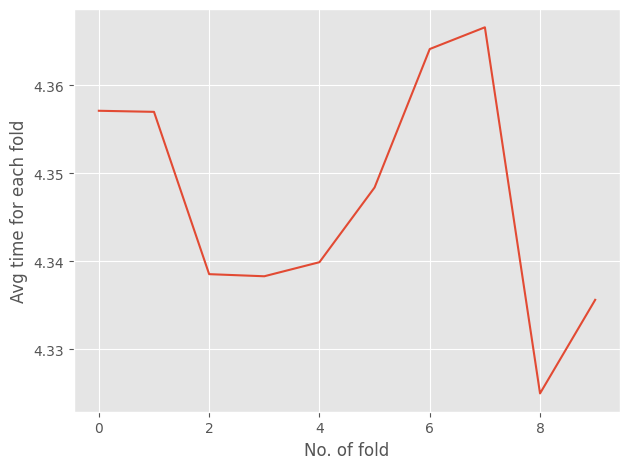

In [174]:
import matplotlib.pyplot as plt

times_lstm_n = np.zeros((10,100))
for i, row in enumerate(times_lstm):
    times_lstm_n[i, :len(row)] = row

times_lstm_n_n = np.mean(times_lstm_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_lstm_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("lstm times")
plt.show()

In [175]:
train_acc_lstm_n = np.zeros((10,100))
for i, row in enumerate(train_acc_lstm):
    train_acc_lstm_n[i, :len(row)] = row
    
test_acc_lstm_n = np.zeros((10,100))
for i, row in enumerate(test_acc_lstm):
    test_acc_lstm_n[i, :len(row)] = row
    
train_loss_lstm_n = np.zeros((10,100))
for i, row in enumerate(train_loss_lstm):
    train_loss_lstm_n[i, :len(row)] = row
    
test_loss_lstm_n = np.zeros((10,100))
for i, row in enumerate(test_loss_lstm):
    test_loss_lstm_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_lstm_n = np.mean(train_acc_lstm_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_lstm_n = np.mean(test_acc_lstm_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_lstm_n = np.mean(train_loss_lstm_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_lstm_n = np.mean(test_loss_lstm_n,axis=0)

In [176]:
data = [train_acc_lstm_n,test_acc_lstm_n,train_loss_lstm_n,test_loss_lstm_n]

df = pd.DataFrame(data)
df.to_csv('lstm_acc', index=False)
df = pd.read_csv('lstm_acc')

train_acc_lstm_n = df.iloc[0]
test_acc_lstm_n = df.iloc[1]
train_loss_lstm_n = df.iloc[2]
test_loss_lstm_n = df.iloc[3]


df_t = pd.DataFrame([times_lstm_n_n])
df_t.to_csv('lstm_times', index=False)
df_t = pd.read_csv('lstm_times')

times_lstm_n_n = df_t.iloc[0]

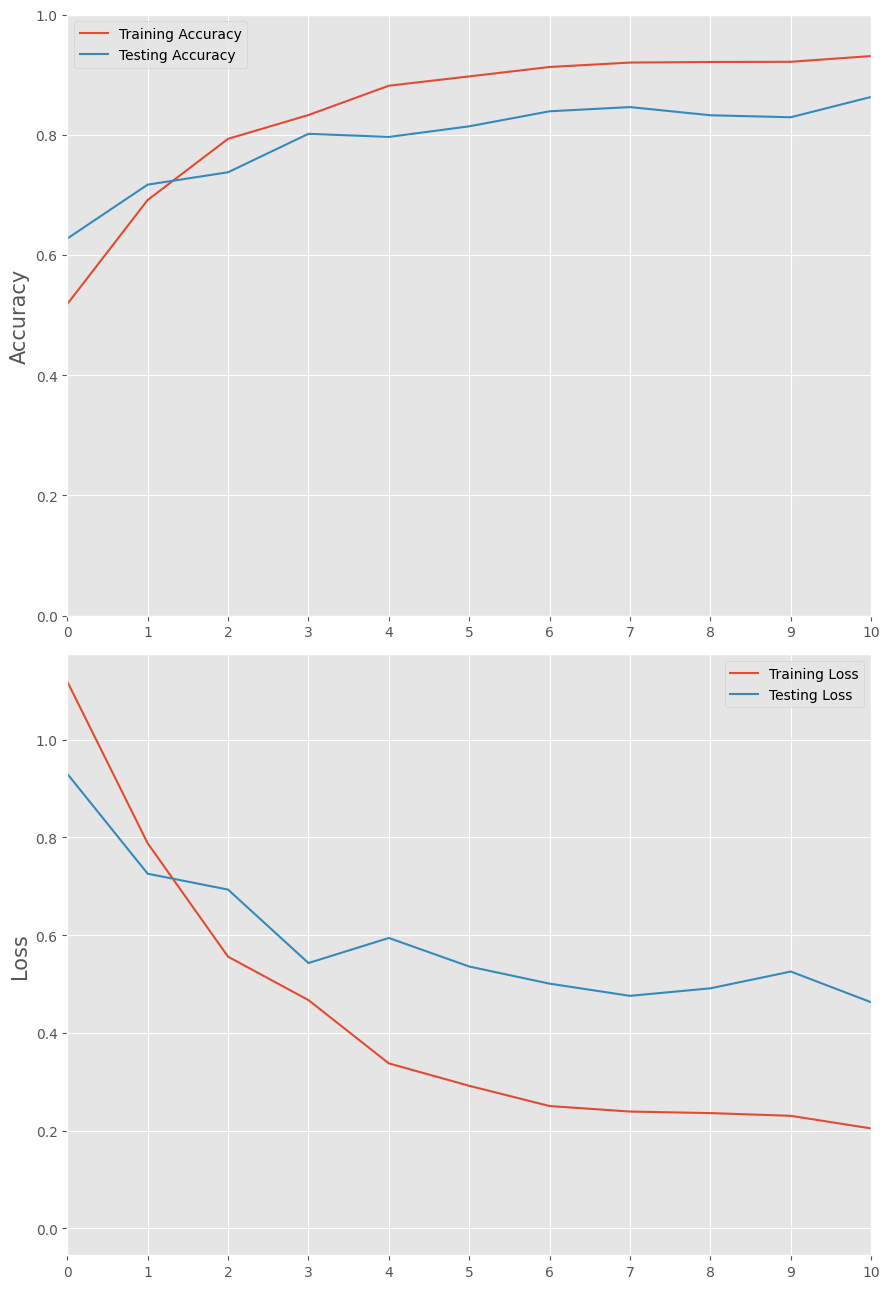

In [177]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_lstm_n, label='Training Accuracy')
axs[0].plot(test_acc_lstm_n, label='Testing Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_lstm_n, label='Training Loss')
axs[1].plot(test_loss_lstm_n, label='Testing Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("LSTM Training and Testing Loss")
plt.show()

In [178]:
np.array(scores_lstm).shape

(10, 302, 4)

In [179]:
np.array(y_test_all_lstm).shape

(10, 302)

In [180]:
y_pred_lstm = np.argmax(scores_lstm,axis=2)

In [181]:
y_pred_lstm.shape

(10, 302)

In [182]:
from sklearn.metrics import accuracy_score
acc_scores_lstm = []
for i in range(len(y_test_all_lstm)):
    acc_scores_lstm.append(accuracy_score(y_true = y_test_all_lstm[i],y_pred = y_pred_lstm[i]))

In [183]:
acc_scores_lstm

[0.9437086092715232,
 0.9470198675496688,
 0.9205298013245033,
 0.9271523178807947,
 0.9304635761589404,
 0.9370860927152318,
 0.9271523178807947,
 0.9337748344370861,
 0.9039735099337748,
 0.9403973509933775]

In [184]:
df_acc = pd.DataFrame([acc_scores_lstm])

df_acc.to_csv('lstm_accuracy', index=False)

df_acc = pd.read_csv('lstm_accuracy')

acc_scores_lstm = df_acc.iloc[0].values

In [185]:
y_test_all_n = np.array(y_test_all_lstm)

y_pred_lstm_n = y_pred_lstm.flatten()
y_test_all_n = y_test_all_n.flatten()

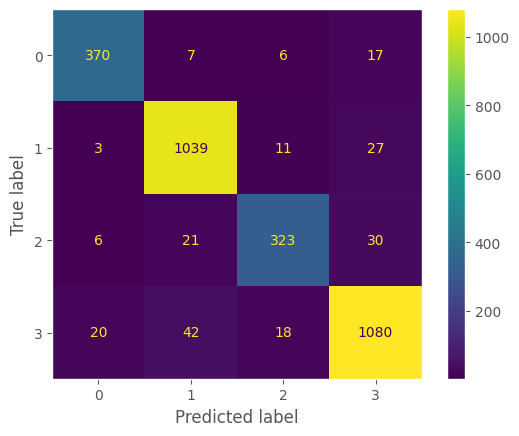

In [186]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n,y_pred_lstm_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("LSTM")

plt.show()

In [187]:
import gc
gc.collect()

30504

In [188]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n,y_pred_lstm_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       400
           1       0.94      0.96      0.95      1080
           2       0.90      0.85      0.88       380
           3       0.94      0.93      0.93      1160

    accuracy                           0.93      3020
   macro avg       0.93      0.92      0.92      3020
weighted avg       0.93      0.93      0.93      3020



# BISLTM

In [216]:
import gc
gc.collect()

0

In [217]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_bilstm = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_bilstm.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 5, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [218]:
from keras.layers import LSTM

In [219]:
def create_model_bilstm():
    
    model_bilstm = keras.Sequential([

        keras.layers.Bidirectional(LSTM(100,return_sequences=True),input_shape=(X.shape[1],X.shape[2])),
        keras.layers.Dropout(0.5),

        keras.layers.Bidirectional(LSTM(100,return_sequences=True)),
        keras.layers.Dropout(0.5),

        keras.layers.Bidirectional(LSTM(100)),
        keras.layers.Dropout(0.5),

        keras.layers.Dense(4,activation='softmax')

    ])
    
    return model_bilstm

In [220]:
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_bilstm = []
y_test_all_bilstm = []
train_acc_bilstm = []
test_acc_bilstm = []
train_loss_bilstm = []
test_loss_bilstm = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_bilstm.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_bilstm = None
    model_bilstm = create_model_bilstm()
        
    model_bilstm.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_bilstm.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=64, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_bilstm.predict(X_test)
    
    scores_bilstm.append(x)
    train_acc_bilstm.append(history.history["accuracy"])
    test_acc_bilstm.append(history.history["val_accuracy"])
    train_loss_bilstm.append(history.history["loss"])
    test_loss_bilstm.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
39/39 [==============================] - 9s 146ms/step - loss: 1.1931 - accuracy: 0.4841 - val_loss: 0.9950 - val_accuracy: 0.5699 - lr: 0.0010
Epoch 2/100
39/39 [==============================] - 5s 131ms/step - loss: 0.8435 - accuracy: 0.6709 - val_loss: 0.7099 - val_accuracy: 0.7279 - lr: 0.0010
Epoch 3/100
39/39 [==============================] - 5s 128ms/step - loss: 0.5252 - accuracy: 0.8066 - val_loss: 0.6718 - val_accuracy: 0.7794 - lr: 0.0010
Epoch 4/100
39/39 [==============================] - 4s 105ms/step - loss: 0.3168 - accuracy: 0.8814 - val_loss: 0.8382 - val_accuracy: 0.7279 - lr: 0.0010
Epoch 5/100
39/39 [==============================] - 5s 122ms/step - loss: 0.2024 - accuracy: 0.9289 - val_loss: 0.4640 - val_accuracy: 0.8529 - lr: 0.0010
Epoch 6/100
39/39 [==============================] - 5s 117ms/step - loss: 0.1888 - accuracy: 0.9370 - val_loss: 0.4550 - val_accuracy: 0.8419 - lr: 0.0010
Epoch 7/100
39/39 [====================

Epoch 30/100
39/39 [==============================] - ETA: 0s - loss: 0.0041 - accuracy: 1.0000
Epoch 30: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 30: 4.77 seconds
39/39 [==============================] - 5s 123ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.3019 - val_accuracy: 0.9154 - lr: 4.0000e-05
Epoch 31/100
39/39 [==============================] - 5s 118ms/step - loss: 0.0036 - accuracy: 0.9992 - val_loss: 0.3020 - val_accuracy: 0.9154 - lr: 8.0000e-06
Epoch 32/100
39/39 [==============================] - 5s 126ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.3023 - val_accuracy: 0.9154 - lr: 8.0000e-06
Epoch 33/100
39/39 [==============================] - 5s 125ms/step - loss: 0.0033 - accuracy: 0.9996 - val_loss: 0.3017 - val_accuracy: 0.9154 - lr: 8.0000e-06
Epoch 34/100
39/39 [==============================] - 4s 115ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.3004 - val_accuracy: 0.9154 - lr: 8.0000e-

Epoch 58/100
39/39 [==============================] - 5s 121ms/step - loss: 0.0033 - accuracy: 0.9996 - val_loss: 0.3002 - val_accuracy: 0.9154 - lr: 2.5600e-09
Epoch 59/100
39/39 [==============================] - 5s 137ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.3002 - val_accuracy: 0.9154 - lr: 2.5600e-09
Epoch 60/100
39/39 [==============================] - ETA: 0s - loss: 0.0033 - accuracy: 0.9996
Epoch 60: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 60: 5.29 seconds
39/39 [==============================] - 5s 136ms/step - loss: 0.0033 - accuracy: 0.9996 - val_loss: 0.3002 - val_accuracy: 0.9154 - lr: 2.5600e-09
Epoch 61/100
39/39 [==============================] - 5s 120ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.3002 - val_accuracy: 0.9154 - lr: 5.1200e-10
Epoch 62/100
39/39 [==============================] - 5s 131ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.3002 - val_accuracy: 0.9154 - lr: 5.1200e-10

Epoch 86/100
39/39 [==============================] - 5s 122ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.3002 - val_accuracy: 0.9154 - lr: 1.6384e-13
Epoch 87/100
39/39 [==============================] - 5s 123ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.3002 - val_accuracy: 0.9154 - lr: 1.6384e-13
Epoch 88/100
39/39 [==============================] - 4s 110ms/step - loss: 0.0036 - accuracy: 0.9996 - val_loss: 0.3002 - val_accuracy: 0.9154 - lr: 1.6384e-13
Epoch 89/100
39/39 [==============================] - 5s 124ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.3002 - val_accuracy: 0.9154 - lr: 1.6384e-13
Epoch 90/100
39/39 [==============================] - ETA: 0s - loss: 0.0028 - accuracy: 1.0000
Epoch 90: ReduceLROnPlateau reducing learning rate to 3.2768002178849846e-14.
Time taken for epoch 90: 4.89 seconds
39/39 [==============================] - 5s 126ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.3002 - val_accuracy: 0.9154 - lr: 1.6384e

Epoch 42/100
39/39 [==============================] - 5s 130ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.2473 - val_accuracy: 0.9228 - lr: 6.4000e-08
Epoch 43/100
39/39 [==============================] - 4s 115ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.2473 - val_accuracy: 0.9228 - lr: 6.4000e-08
Epoch 44/100
39/39 [==============================] - 5s 129ms/step - loss: 0.0038 - accuracy: 0.9996 - val_loss: 0.2473 - val_accuracy: 0.9228 - lr: 6.4000e-08
Epoch 45/100
39/39 [==============================] - 5s 129ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.2473 - val_accuracy: 0.9228 - lr: 6.4000e-08
Epoch 46/100
39/39 [==============================] - ETA: 0s - loss: 0.0033 - accuracy: 1.0000
Epoch 46: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 46: 4.51 seconds
39/39 [==============================] - 5s 116ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.2473 - val_accuracy: 0.9228 - lr: 6.4000e

Epoch 70/100
39/39 [==============================] - 5s 119ms/step - loss: 0.0035 - accuracy: 0.9996 - val_loss: 0.2473 - val_accuracy: 0.9228 - lr: 2.0480e-11
Epoch 71/100
39/39 [==============================] - ETA: 0s - loss: 0.0026 - accuracy: 1.0000
Epoch 71: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 71: 4.80 seconds
39/39 [==============================] - 5s 123ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.2473 - val_accuracy: 0.9228 - lr: 2.0480e-11
Epoch 72/100
39/39 [==============================] - 5s 117ms/step - loss: 0.0037 - accuracy: 0.9996 - val_loss: 0.2473 - val_accuracy: 0.9228 - lr: 4.0960e-12
Epoch 73/100
39/39 [==============================] - 4s 112ms/step - loss: 0.0033 - accuracy: 0.9996 - val_loss: 0.2473 - val_accuracy: 0.9228 - lr: 4.0960e-12
Epoch 74/100
39/39 [==============================] - 5s 118ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.2473 - val_accuracy: 0.9228 - lr: 4.0960e-

Epoch 98/100
39/39 [==============================] - 5s 129ms/step - loss: 0.0035 - accuracy: 0.9996 - val_loss: 0.2473 - val_accuracy: 0.9228 - lr: 1.3107e-15
Epoch 99/100
39/39 [==============================] - 5s 123ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.2473 - val_accuracy: 0.9228 - lr: 1.3107e-15
Epoch 100/100
10/10 [==============================] - 2s 38ms/step
Training on fold 3/10...
Epoch 1/100
39/39 [==============================] - 9s 155ms/step - loss: 1.2338 - accuracy: 0.4440 - val_loss: 0.9707 - val_accuracy: 0.6176 - lr: 0.0010
Epoch 2/100
39/39 [==============================] - 4s 115ms/step - loss: 0.9418 - accuracy: 0.6231 - val_loss: 0.7082 - val_accuracy: 0.7574 - lr: 0.0010
Epoch 3/100
39/39 [==============================] - 5s 129ms/step - loss: 0.5640 - accuracy: 0.7948 - val_loss: 0.5732 - val_accuracy: 0.7610 - lr: 0.0010
Epoch 4/100
39/39 [==============================] - 5s 133ms/step - loss: 0.4346 - accuracy: 0.8316 - val_loss: 0.66

39/39 [==============================] - 5s 134ms/step - loss: 0.0071 - accuracy: 0.9980 - val_loss: 0.1606 - val_accuracy: 0.9596 - lr: 2.0000e-04
Epoch 28/100
39/39 [==============================] - 5s 117ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.1635 - val_accuracy: 0.9559 - lr: 2.0000e-04
Epoch 29/100
39/39 [==============================] - 5s 131ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1726 - val_accuracy: 0.9485 - lr: 2.0000e-04
Epoch 30/100
39/39 [==============================] - 5s 130ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1609 - val_accuracy: 0.9596 - lr: 2.0000e-04
Epoch 31/100
39/39 [==============================] - 4s 107ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.1551 - val_accuracy: 0.9632 - lr: 2.0000e-04
Epoch 32/100
39/39 [==============================] - 5s 125ms/step - loss: 9.9483e-04 - accuracy: 1.0000 - val_loss: 0.1568 - val_accuracy: 0.9596 - lr: 2.0000e-04
Epoch 33/100
39/39 [=======================

Epoch 55/100
39/39 [==============================] - 5s 126ms/step - loss: 6.7602e-04 - accuracy: 1.0000 - val_loss: 0.1641 - val_accuracy: 0.9596 - lr: 3.2000e-07
Epoch 56/100
39/39 [==============================] - ETA: 0s - loss: 5.4266e-04 - accuracy: 1.0000
Epoch 56: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 56: 5.09 seconds
39/39 [==============================] - 5s 131ms/step - loss: 5.4266e-04 - accuracy: 1.0000 - val_loss: 0.1641 - val_accuracy: 0.9596 - lr: 3.2000e-07
Epoch 57/100
39/39 [==============================] - 5s 124ms/step - loss: 5.7162e-04 - accuracy: 1.0000 - val_loss: 0.1641 - val_accuracy: 0.9596 - lr: 6.4000e-08
Epoch 58/100
39/39 [==============================] - 5s 126ms/step - loss: 6.0968e-04 - accuracy: 1.0000 - val_loss: 0.1641 - val_accuracy: 0.9596 - lr: 6.4000e-08
Epoch 59/100
39/39 [==============================] - 5s 136ms/step - loss: 5.0760e-04 - accuracy: 1.0000 - val_loss: 0.1641 - val_accurac

Epoch 82/100
39/39 [==============================] - 5s 135ms/step - loss: 7.5240e-04 - accuracy: 1.0000 - val_loss: 0.1641 - val_accuracy: 0.9596 - lr: 2.0480e-11
Epoch 83/100
39/39 [==============================] - 5s 117ms/step - loss: 8.2686e-04 - accuracy: 1.0000 - val_loss: 0.1641 - val_accuracy: 0.9596 - lr: 2.0480e-11
Epoch 84/100
39/39 [==============================] - 5s 126ms/step - loss: 7.2770e-04 - accuracy: 1.0000 - val_loss: 0.1641 - val_accuracy: 0.9596 - lr: 2.0480e-11
Epoch 85/100
39/39 [==============================] - 5s 134ms/step - loss: 7.5640e-04 - accuracy: 1.0000 - val_loss: 0.1641 - val_accuracy: 0.9596 - lr: 2.0480e-11
Epoch 86/100
39/39 [==============================] - ETA: 0s - loss: 5.8556e-04 - accuracy: 1.0000
Epoch 86: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 86: 4.95 seconds
39/39 [==============================] - 5s 128ms/step - loss: 5.8556e-04 - accuracy: 1.0000 - val_loss: 0.1641 - val_accurac

Epoch 10/100
39/39 [==============================] - 5s 120ms/step - loss: 0.1389 - accuracy: 0.9509 - val_loss: 0.6333 - val_accuracy: 0.8088 - lr: 0.0010
Epoch 11/100
39/39 [==============================] - 5s 126ms/step - loss: 0.0800 - accuracy: 0.9751 - val_loss: 0.4412 - val_accuracy: 0.8493 - lr: 0.0010
Epoch 12/100
39/39 [==============================] - 5s 120ms/step - loss: 0.1055 - accuracy: 0.9632 - val_loss: 0.4422 - val_accuracy: 0.8676 - lr: 0.0010
Epoch 13/100
39/39 [==============================] - 5s 123ms/step - loss: 0.0871 - accuracy: 0.9693 - val_loss: 0.3925 - val_accuracy: 0.8971 - lr: 0.0010
Epoch 14/100
39/39 [==============================] - 4s 115ms/step - loss: 0.0403 - accuracy: 0.9865 - val_loss: 0.3854 - val_accuracy: 0.9007 - lr: 0.0010
Epoch 15/100
39/39 [==============================] - 5s 135ms/step - loss: 0.0209 - accuracy: 0.9951 - val_loss: 0.3793 - val_accuracy: 0.9044 - lr: 0.0010
Epoch 16/100
39/39 [==============================] - 5s 1

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [238]:
import gc
gc.collect()

30067

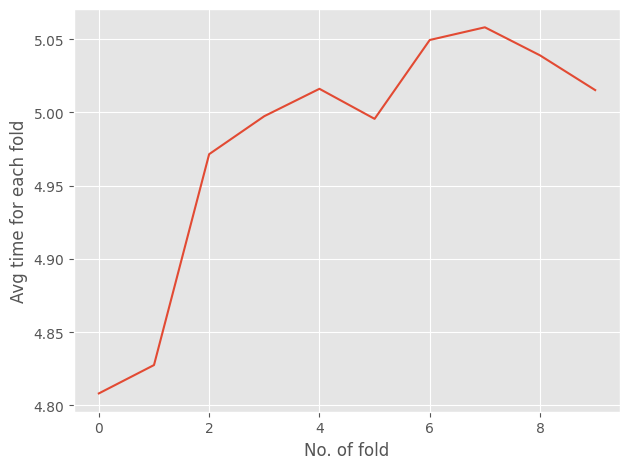

In [239]:
import matplotlib.pyplot as plt

times_bilstm_n = np.zeros((10,100))
for i, row in enumerate(times_bilstm):
    times_bilstm_n[i, :len(row)] = row

times_bilstm_n_n = np.mean(times_bilstm_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_bilstm_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("bilstm times")
plt.show()

In [240]:
train_acc_bilstm_n = np.zeros((10,100))
for i, row in enumerate(train_acc_bilstm):
    train_acc_bilstm_n[i, :len(row)] = row
    
test_acc_bilstm_n = np.zeros((10,100))
for i, row in enumerate(test_acc_bilstm):
    test_acc_bilstm_n[i, :len(row)] = row
    
train_loss_bilstm_n = np.zeros((10,100))
for i, row in enumerate(train_loss_bilstm):
    train_loss_bilstm_n[i, :len(row)] = row
    
test_loss_bilstm_n = np.zeros((10,100))
for i, row in enumerate(test_loss_bilstm):
    test_loss_bilstm_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_bilstm_n = np.mean(train_acc_bilstm_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_bilstm_n = np.mean(test_acc_bilstm_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_bilstm_n = np.mean(train_loss_bilstm_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_bilstm_n = np.mean(test_loss_bilstm_n,axis=0)

In [241]:
train_acc_bilstm_n

array([0.47616517, 0.65408831, 0.80159444, 0.86430908, 0.90968929,
       0.92759607, 0.95551921, 0.96001635, 0.96406377, 0.95829926,
       0.97559281, 0.98197057, 0.98385119, 0.98765333, 0.98589534,
       0.98945216, 0.98544562, 0.98977923, 0.98712183, 0.98924775,
       0.99121014, 0.99399019, 0.99582993, 0.99660671, 0.99603435,
       0.99701554, 0.99623876, 0.99051512, 0.99811938, 0.99860997,
       0.99877351, 0.9997547 , 0.99979559, 0.99991823, 0.99983647,
       1.        , 0.99991823, 0.99979559, 0.99995912, 0.99983647,
       0.99991823, 0.99987735, 0.99987735, 0.99995912, 0.99991823,
       0.99991823, 0.99995912, 0.99995912, 0.99987735, 0.99983647,
       0.99991823, 0.99979559, 0.99995912, 0.99991823, 0.99995912,
       0.99995912, 0.99995912, 0.99987735, 0.99991823, 0.99987735,
       0.99995912, 0.99991823, 0.99995912, 0.99991823, 0.99995912,
       0.99979559, 0.99987735, 0.99987735, 0.99991823, 0.99987735,
       0.99995912, 0.99987735, 0.99983647, 0.99995912, 0.99979

In [242]:
data = [train_acc_bilstm_n,test_acc_bilstm_n,train_loss_bilstm_n,test_loss_bilstm_n]

df = pd.DataFrame(data)
df.to_csv('bilstm_acc', index=False)
df = pd.read_csv('bilstm_acc')

train_acc_bilstm_n = df.iloc[0]
test_acc_bilstm_n = df.iloc[1]
train_loss_bilstm_n = df.iloc[2]
test_loss_bilstm_n = df.iloc[3]


df_t = pd.DataFrame([times_bilstm_n_n])
df_t.to_csv('bilstm_times', index=False)
df_t = pd.read_csv('bilstm_times')

times_bilstm_n_n = df_t.iloc[0]

In [243]:
train_acc_bilstm_n

0     0.476165
1     0.654088
2     0.801594
3     0.864309
4     0.909689
        ...   
95    0.999918
96    0.999918
97    0.999918
98    0.999959
99    0.999836
Name: 0, Length: 100, dtype: float64

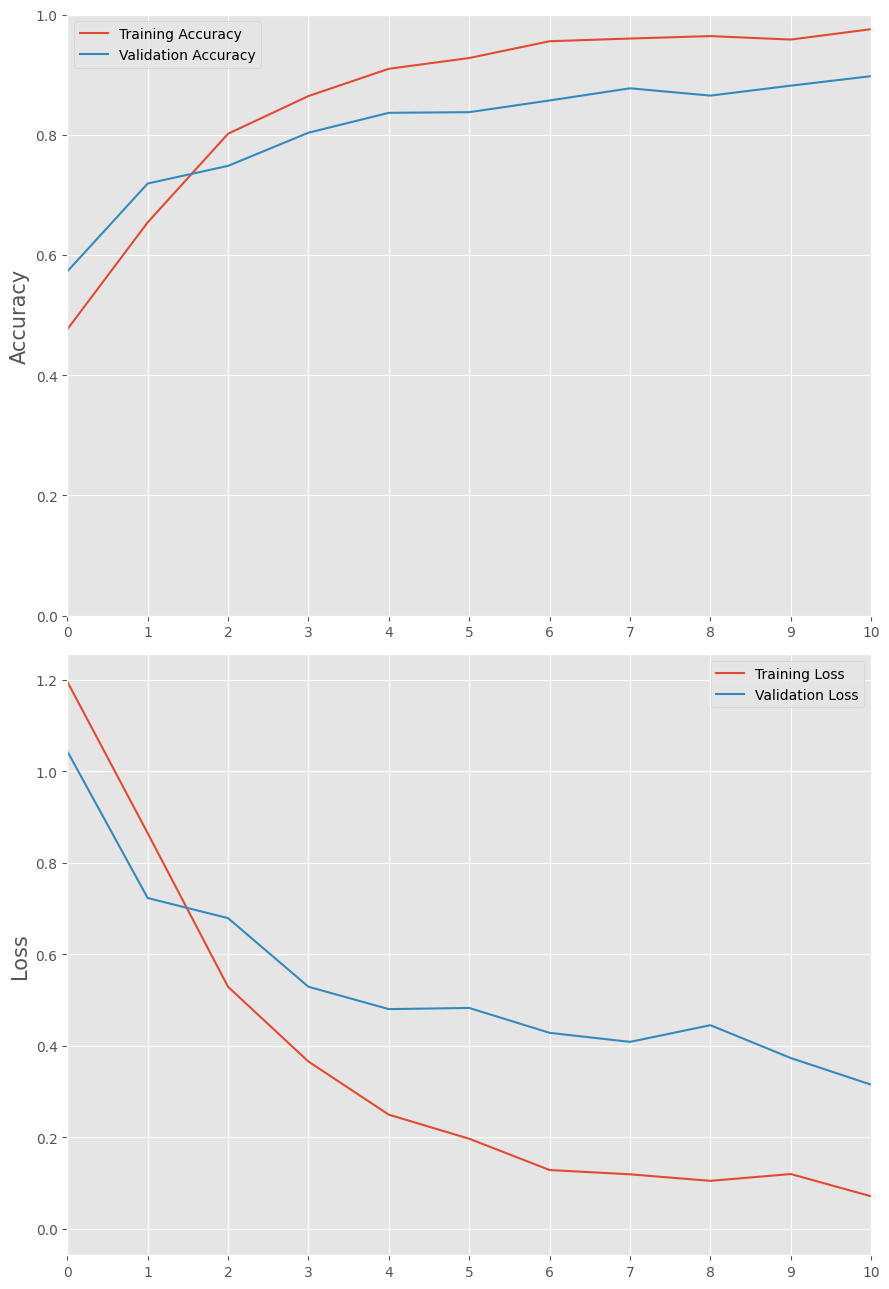

In [244]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_bilstm_n, label='Training Accuracy')
axs[0].plot(test_acc_bilstm_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_bilstm_n, label='Training Loss')
axs[1].plot(test_loss_bilstm_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("BILSTM Training and Testing Loss")
plt.show()

In [245]:
np.array(scores_bilstm).shape

(10, 302, 4)

In [246]:
np.array(y_test_all_bilstm).shape

(10, 302)

In [247]:
y_pred_bilstm = np.argmax(scores_bilstm,axis=2)

In [248]:
y_pred_bilstm.shape

(10, 302)

In [249]:
from sklearn.metrics import accuracy_score
acc_scores_bilstm = []
for i in range(len(y_test_all_bilstm)):
    acc_scores_bilstm.append(accuracy_score(y_true = y_test_all_bilstm[i],y_pred = y_pred_bilstm[i]))

In [250]:
acc_scores_bilstm

[0.9304635761589404,
 0.9437086092715232,
 0.956953642384106,
 0.956953642384106,
 0.9470198675496688,
 0.9337748344370861,
 0.9437086092715232,
 0.9536423841059603,
 0.9437086092715232,
 0.956953642384106]

In [251]:
df_acc = pd.DataFrame([acc_scores_bilstm])

df_acc.to_csv('bilstm_accuracy', index=False)

df_acc = pd.read_csv('bilstm_accuracy')

acc_scores_bilstm = df_acc.iloc[0].values

In [252]:
y_test_all_n = np.array(y_test_all_bilstm)

y_pred_bilstm_n = y_pred_bilstm.flatten()
y_test_all_n = y_test_all_n.flatten()

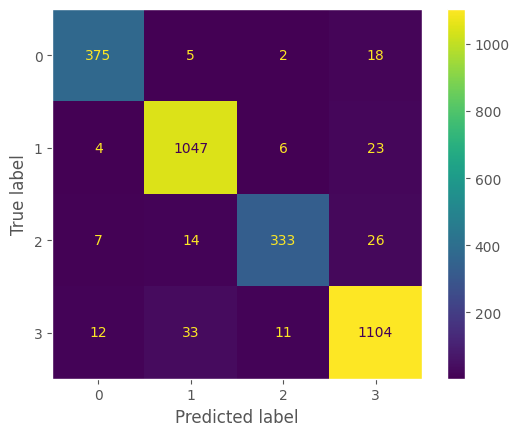

In [253]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n,y_pred_bilstm_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("BISLTM")

plt.show()

In [254]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n,y_pred_bilstm_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       400
           1       0.95      0.97      0.96      1080
           2       0.95      0.88      0.91       380
           3       0.94      0.95      0.95      1160

    accuracy                           0.95      3020
   macro avg       0.95      0.93      0.94      3020
weighted avg       0.95      0.95      0.95      3020



# BRNN

In [189]:
import gc
gc.collect()

0

In [190]:
# X,y = load_data(DATA_PATH)

In [191]:
import tensorflow as tf
from tensorflow.keras.layers import Bidirectional, SimpleRNN, Dense
from tensorflow.keras.models import Sequential

In [192]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_birnn = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_birnn.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=7, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [193]:
def create_model_birnn():

    model_birnn = keras.Sequential([

        keras.layers.Bidirectional(SimpleRNN(256,return_sequences=True),input_shape=(X.shape[1],X.shape[2])),
        keras.layers.Dropout(0.5),

        keras.layers.Bidirectional(SimpleRNN(128,return_sequences=True)),
        keras.layers.Dropout(0.5),

        keras.layers.Bidirectional(SimpleRNN(64)),
        keras.layers.Dropout(0.5),

        keras.layers.Dense(units = 4,activation='softmax')

    ])
    return model_birnn

In [194]:
import gc
gc.collect()

5

In [195]:
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_birnn = []
y_test_all_birnn = []
train_acc_birnn = []
test_acc_birnn = []
train_loss_birnn = []
test_loss_birnn = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X[train_indices], X[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_birnn.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_birnn = None
    model_birnn = create_model_birnn()
        
    model_birnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_birnn.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_birnn.predict(X_test)
    
    scores_birnn.append(x)
    train_acc_birnn.append(history.history["accuracy"])
    test_acc_birnn.append(history.history["val_accuracy"])
    train_loss_birnn.append(history.history["loss"])
    test_loss_birnn.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 70s 878ms/step - loss: 1.7218 - accuracy: 0.3536 - val_loss: 1.3910 - val_accuracy: 0.4191 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 70s 910ms/step - loss: 1.5624 - accuracy: 0.3720 - val_loss: 1.3850 - val_accuracy: 0.4301 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 73s 945ms/step - loss: 1.4924 - accuracy: 0.3778 - val_loss: 1.2880 - val_accuracy: 0.4154 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 74s 959ms/step - loss: 1.3907 - accuracy: 0.4047 - val_loss: 1.2365 - val_accuracy: 0.4596 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 72s 936ms/step - loss: 1.3417 - accuracy: 0.4272 - val_loss: 1.2384 - val_accuracy: 0.4485 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 73s 942ms/step - loss: 1.2941 - accuracy: 0.4354 - val_loss: 1.1856 - val_accuracy: 0.5147 - lr: 0.0010
Epoch 7/100
77/77 [==============

77/77 [==============================] - ETA: 0s - loss: 0.0370 - accuracy: 0.9910
Epoch 58: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 58: 70.50 seconds
77/77 [==============================] - 70s 918ms/step - loss: 0.0370 - accuracy: 0.9910 - val_loss: 0.4691 - val_accuracy: 0.8603 - lr: 8.0000e-06
Epoch 59/100
77/77 [==============================] - 69s 899ms/step - loss: 0.0402 - accuracy: 0.9881 - val_loss: 0.4634 - val_accuracy: 0.8603 - lr: 1.6000e-06
Epoch 60/100
77/77 [==============================] - 70s 911ms/step - loss: 0.0423 - accuracy: 0.9881 - val_loss: 0.4637 - val_accuracy: 0.8640 - lr: 1.6000e-06
Epoch 61/100
77/77 [==============================] - 71s 922ms/step - loss: 0.0378 - accuracy: 0.9898 - val_loss: 0.4647 - val_accuracy: 0.8603 - lr: 1.6000e-06
Epoch 62/100
77/77 [==============================] - 70s 915ms/step - loss: 0.0421 - accuracy: 0.9869 - val_loss: 0.4678 - val_accuracy: 0.8603 - lr: 1.6000e-06
Epo

Epoch 86/100
77/77 [==============================] - ETA: 0s - loss: 0.0347 - accuracy: 0.9922
Epoch 86: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 86: 70.59 seconds
77/77 [==============================] - 71s 916ms/step - loss: 0.0347 - accuracy: 0.9922 - val_loss: 0.4718 - val_accuracy: 0.8566 - lr: 1.2800e-08
Epoch 87/100
77/77 [==============================] - 71s 929ms/step - loss: 0.0394 - accuracy: 0.9877 - val_loss: 0.4718 - val_accuracy: 0.8566 - lr: 2.5600e-09
Epoch 88/100
77/77 [==============================] - 71s 921ms/step - loss: 0.0384 - accuracy: 0.9886 - val_loss: 0.4718 - val_accuracy: 0.8566 - lr: 2.5600e-09
Epoch 89/100
77/77 [==============================] - 70s 915ms/step - loss: 0.0405 - accuracy: 0.9881 - val_loss: 0.4718 - val_accuracy: 0.8566 - lr: 2.5600e-09
Epoch 90/100
77/77 [==============================] - 72s 941ms/step - loss: 0.0348 - accuracy: 0.9922 - val_loss: 0.4718 - val_accuracy: 0.8566 - lr: 2

77/77 [==============================] - 71s 927ms/step - loss: 0.1402 - accuracy: 0.9456 - val_loss: 0.5237 - val_accuracy: 0.8199 - lr: 2.0000e-04
Epoch 44/100
77/77 [==============================] - 70s 915ms/step - loss: 0.0988 - accuracy: 0.9685 - val_loss: 0.5389 - val_accuracy: 0.8235 - lr: 2.0000e-04
Epoch 45/100
77/77 [==============================] - 72s 929ms/step - loss: 0.0783 - accuracy: 0.9738 - val_loss: 0.5589 - val_accuracy: 0.8199 - lr: 2.0000e-04
Epoch 46/100
77/77 [==============================] - 73s 943ms/step - loss: 0.0750 - accuracy: 0.9751 - val_loss: 0.5607 - val_accuracy: 0.8199 - lr: 2.0000e-04
Epoch 47/100
77/77 [==============================] - 70s 906ms/step - loss: 0.0662 - accuracy: 0.9804 - val_loss: 0.5040 - val_accuracy: 0.8199 - lr: 2.0000e-04
Epoch 48/100
77/77 [==============================] - 72s 928ms/step - loss: 0.0638 - accuracy: 0.9812 - val_loss: 0.5505 - val_accuracy: 0.8162 - lr: 2.0000e-04
Epoch 49/100
77/77 [=====================

Epoch 72/100
77/77 [==============================] - 70s 914ms/step - loss: 0.0263 - accuracy: 0.9947 - val_loss: 0.4970 - val_accuracy: 0.8493 - lr: 8.0000e-06
Epoch 73/100
77/77 [==============================] - 72s 932ms/step - loss: 0.0254 - accuracy: 0.9955 - val_loss: 0.4898 - val_accuracy: 0.8529 - lr: 8.0000e-06
Epoch 74/100
77/77 [==============================] - ETA: 0s - loss: 0.0240 - accuracy: 0.9951
Epoch 74: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 74: 70.31 seconds
77/77 [==============================] - 70s 916ms/step - loss: 0.0240 - accuracy: 0.9951 - val_loss: 0.4891 - val_accuracy: 0.8493 - lr: 8.0000e-06
Epoch 75/100
77/77 [==============================] - 73s 947ms/step - loss: 0.0315 - accuracy: 0.9898 - val_loss: 0.4887 - val_accuracy: 0.8529 - lr: 1.6000e-06
Epoch 76/100
77/77 [==============================] - 72s 936ms/step - loss: 0.0277 - accuracy: 0.9910 - val_loss: 0.4893 - val_accuracy: 0.8529 - lr: 1

Epoch 100/100
10/10 [==============================] - 2s 140ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 74s 935ms/step - loss: 1.6904 - accuracy: 0.3369 - val_loss: 1.4199 - val_accuracy: 0.3787 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 70s 912ms/step - loss: 1.5980 - accuracy: 0.3647 - val_loss: 1.2731 - val_accuracy: 0.3787 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 69s 891ms/step - loss: 1.5067 - accuracy: 0.3659 - val_loss: 1.2747 - val_accuracy: 0.4265 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 70s 911ms/step - loss: 1.4332 - accuracy: 0.3851 - val_loss: 1.2492 - val_accuracy: 0.4559 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 70s 909ms/step - loss: 1.3396 - accuracy: 0.4178 - val_loss: 1.2620 - val_accuracy: 0.4779 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 72s 937ms/step - loss: 1.2700 - accuracy: 0.4526 - val_loss: 1.2224 

Epoch 58/100
77/77 [==============================] - 69s 897ms/step - loss: 0.0347 - accuracy: 0.9898 - val_loss: 0.5774 - val_accuracy: 0.8529 - lr: 2.0000e-04
Epoch 59/100
77/77 [==============================] - 70s 903ms/step - loss: 0.0339 - accuracy: 0.9902 - val_loss: 0.5421 - val_accuracy: 0.8713 - lr: 2.0000e-04
Epoch 60/100
77/77 [==============================] - 69s 901ms/step - loss: 0.0343 - accuracy: 0.9890 - val_loss: 0.4902 - val_accuracy: 0.8897 - lr: 2.0000e-04
Epoch 61/100
77/77 [==============================] - 71s 922ms/step - loss: 0.0232 - accuracy: 0.9939 - val_loss: 0.4851 - val_accuracy: 0.8787 - lr: 2.0000e-04
Epoch 62/100
77/77 [==============================] - 70s 905ms/step - loss: 0.0272 - accuracy: 0.9910 - val_loss: 0.4625 - val_accuracy: 0.8860 - lr: 2.0000e-04
Epoch 63/100
77/77 [==============================] - 72s 930ms/step - loss: 0.0276 - accuracy: 0.9914 - val_loss: 0.4800 - val_accuracy: 0.8824 - lr: 2.0000e-04
Epoch 64/100
77/77 [========

Epoch 15/100
77/77 [==============================] - 70s 908ms/step - loss: 0.7895 - accuracy: 0.6934 - val_loss: 0.8460 - val_accuracy: 0.6691 - lr: 0.0010
Epoch 16/100
77/77 [==============================] - 71s 922ms/step - loss: 0.7228 - accuracy: 0.7269 - val_loss: 0.8025 - val_accuracy: 0.7169 - lr: 0.0010
Epoch 17/100
77/77 [==============================] - 71s 921ms/step - loss: 0.6588 - accuracy: 0.7498 - val_loss: 1.2520 - val_accuracy: 0.6140 - lr: 0.0010
Epoch 18/100
77/77 [==============================] - 70s 913ms/step - loss: 0.6564 - accuracy: 0.7412 - val_loss: 0.7431 - val_accuracy: 0.7243 - lr: 0.0010
Epoch 19/100
77/77 [==============================] - 71s 929ms/step - loss: 0.6456 - accuracy: 0.7592 - val_loss: 0.8345 - val_accuracy: 0.7132 - lr: 0.0010
Epoch 20/100
77/77 [==============================] - 72s 935ms/step - loss: 0.5025 - accuracy: 0.8140 - val_loss: 0.7450 - val_accuracy: 0.7353 - lr: 0.0010
Epoch 21/100
77/77 [==============================] 

Epoch 44/100
77/77 [==============================] - 72s 938ms/step - loss: 0.0581 - accuracy: 0.9841 - val_loss: 0.6349 - val_accuracy: 0.8199 - lr: 2.0000e-04
Epoch 45/100
77/77 [==============================] - 72s 932ms/step - loss: 0.0719 - accuracy: 0.9751 - val_loss: 0.5497 - val_accuracy: 0.8419 - lr: 2.0000e-04
Epoch 46/100
77/77 [==============================] - 70s 907ms/step - loss: 0.0563 - accuracy: 0.9820 - val_loss: 0.5695 - val_accuracy: 0.8272 - lr: 2.0000e-04
Epoch 47/100
77/77 [==============================] - 71s 917ms/step - loss: 0.0581 - accuracy: 0.9804 - val_loss: 0.5244 - val_accuracy: 0.8493 - lr: 2.0000e-04
Epoch 48/100
77/77 [==============================] - 73s 952ms/step - loss: 0.0560 - accuracy: 0.9791 - val_loss: 0.6730 - val_accuracy: 0.8272 - lr: 2.0000e-04
Epoch 49/100
77/77 [==============================] - 72s 935ms/step - loss: 0.0506 - accuracy: 0.9849 - val_loss: 0.5716 - val_accuracy: 0.8566 - lr: 2.0000e-04
Epoch 50/100
77/77 [========

Epoch 100/100
10/10 [==============================] - 1s 96ms/step
Training on fold 5/10...
Epoch 1/100
77/77 [==============================] - 72s 908ms/step - loss: 1.7189 - accuracy: 0.3242 - val_loss: 1.1887 - val_accuracy: 0.5037 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 70s 910ms/step - loss: 1.5900 - accuracy: 0.3467 - val_loss: 1.1691 - val_accuracy: 0.5037 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 69s 895ms/step - loss: 1.4859 - accuracy: 0.3663 - val_loss: 1.1372 - val_accuracy: 0.5368 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 70s 913ms/step - loss: 1.4147 - accuracy: 0.3802 - val_loss: 1.1715 - val_accuracy: 0.4890 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 70s 912ms/step - loss: 1.3711 - accuracy: 0.4203 - val_loss: 1.1200 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 70s 914ms/step - loss: 1.2924 - accuracy: 0.4293 - val_loss: 1.1165 -

Epoch 58/100
77/77 [==============================] - 71s 917ms/step - loss: 0.0518 - accuracy: 0.9849 - val_loss: 0.5413 - val_accuracy: 0.8235 - lr: 2.0000e-04
Epoch 59/100
77/77 [==============================] - 69s 892ms/step - loss: 0.0554 - accuracy: 0.9820 - val_loss: 0.5250 - val_accuracy: 0.8566 - lr: 2.0000e-04
Epoch 60/100
77/77 [==============================] - 67s 869ms/step - loss: 0.0494 - accuracy: 0.9865 - val_loss: 0.5600 - val_accuracy: 0.8199 - lr: 2.0000e-04
Epoch 61/100
77/77 [==============================] - 69s 901ms/step - loss: 0.0436 - accuracy: 0.9873 - val_loss: 0.5792 - val_accuracy: 0.8309 - lr: 2.0000e-04
Epoch 62/100
77/77 [==============================] - ETA: 0s - loss: 0.0444 - accuracy: 0.9865
Epoch 62: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 62: 69.60 seconds
77/77 [==============================] - 70s 903ms/step - loss: 0.0444 - accuracy: 0.9865 - val_loss: 0.5144 - val_accuracy: 0.8419 - lr: 2

Epoch 86/100
77/77 [==============================] - 70s 914ms/step - loss: 0.0275 - accuracy: 0.9930 - val_loss: 0.4928 - val_accuracy: 0.8382 - lr: 3.2000e-07
Epoch 87/100
77/77 [==============================] - 74s 957ms/step - loss: 0.0321 - accuracy: 0.9902 - val_loss: 0.4925 - val_accuracy: 0.8382 - lr: 3.2000e-07
Epoch 88/100
77/77 [==============================] - 71s 926ms/step - loss: 0.0322 - accuracy: 0.9922 - val_loss: 0.4925 - val_accuracy: 0.8382 - lr: 3.2000e-07
Epoch 89/100
77/77 [==============================] - 71s 918ms/step - loss: 0.0284 - accuracy: 0.9943 - val_loss: 0.4926 - val_accuracy: 0.8382 - lr: 3.2000e-07
Epoch 90/100
77/77 [==============================] - ETA: 0s - loss: 0.0299 - accuracy: 0.9914
Epoch 90: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 90: 70.95 seconds
77/77 [==============================] - 71s 922ms/step - loss: 0.0299 - accuracy: 0.9914 - val_loss: 0.4931 - val_accuracy: 0.8382 - lr: 3.

Epoch 15/100
77/77 [==============================] - 70s 912ms/step - loss: 0.8745 - accuracy: 0.6656 - val_loss: 1.3625 - val_accuracy: 0.5662 - lr: 0.0010
Epoch 16/100
77/77 [==============================] - 70s 907ms/step - loss: 0.8037 - accuracy: 0.6901 - val_loss: 0.9766 - val_accuracy: 0.6397 - lr: 0.0010
Epoch 17/100
77/77 [==============================] - 71s 918ms/step - loss: 0.7629 - accuracy: 0.7003 - val_loss: 0.9205 - val_accuracy: 0.6691 - lr: 0.0010
Epoch 18/100
77/77 [==============================] - 72s 939ms/step - loss: 0.6997 - accuracy: 0.7355 - val_loss: 0.9416 - val_accuracy: 0.6544 - lr: 0.0010
Epoch 19/100
77/77 [==============================] - 70s 909ms/step - loss: 0.6775 - accuracy: 0.7371 - val_loss: 0.9762 - val_accuracy: 0.6581 - lr: 0.0010
Epoch 20/100
77/77 [==============================] - 72s 940ms/step - loss: 0.5972 - accuracy: 0.7772 - val_loss: 0.7637 - val_accuracy: 0.7243 - lr: 0.0010
Epoch 21/100
77/77 [==============================] 

77/77 [==============================] - 70s 912ms/step - loss: 0.0779 - accuracy: 0.9726 - val_loss: 0.5362 - val_accuracy: 0.8419 - lr: 2.0000e-04
Epoch 45/100
77/77 [==============================] - 71s 926ms/step - loss: 0.0778 - accuracy: 0.9759 - val_loss: 0.5884 - val_accuracy: 0.8419 - lr: 2.0000e-04
Epoch 46/100
77/77 [==============================] - 69s 902ms/step - loss: 0.0644 - accuracy: 0.9779 - val_loss: 0.5653 - val_accuracy: 0.8382 - lr: 2.0000e-04
Epoch 47/100
77/77 [==============================] - 66s 853ms/step - loss: 0.0620 - accuracy: 0.9796 - val_loss: 0.7629 - val_accuracy: 0.8015 - lr: 2.0000e-04
Epoch 48/100
77/77 [==============================] - 68s 882ms/step - loss: 0.0673 - accuracy: 0.9791 - val_loss: 0.5998 - val_accuracy: 0.8199 - lr: 2.0000e-04
Epoch 49/100
77/77 [==============================] - 69s 899ms/step - loss: 0.0614 - accuracy: 0.9804 - val_loss: 0.6043 - val_accuracy: 0.8125 - lr: 2.0000e-04
Epoch 50/100
77/77 [=====================

Epoch 73/100
77/77 [==============================] - 71s 920ms/step - loss: 0.0328 - accuracy: 0.9902 - val_loss: 0.5966 - val_accuracy: 0.8382 - lr: 8.0000e-06
Epoch 74/100
77/77 [==============================] - 70s 914ms/step - loss: 0.0310 - accuracy: 0.9922 - val_loss: 0.5986 - val_accuracy: 0.8382 - lr: 8.0000e-06
Epoch 75/100
77/77 [==============================] - 68s 885ms/step - loss: 0.0278 - accuracy: 0.9922 - val_loss: 0.6025 - val_accuracy: 0.8346 - lr: 8.0000e-06
Epoch 76/100
77/77 [==============================] - 70s 917ms/step - loss: 0.0271 - accuracy: 0.9922 - val_loss: 0.6000 - val_accuracy: 0.8346 - lr: 8.0000e-06
Epoch 77/100
77/77 [==============================] - ETA: 0s - loss: 0.0285 - accuracy: 0.9918
Epoch 77: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 77: 70.37 seconds
77/77 [==============================] - 70s 915ms/step - loss: 0.0285 - accuracy: 0.9918 - val_loss: 0.6039 - val_accuracy: 0.8346 - lr: 8

10/10 [==============================] - 1s 120ms/step
Training on fold 7/10...
Epoch 1/100
77/77 [==============================] - 74s 929ms/step - loss: 1.7530 - accuracy: 0.3267 - val_loss: 1.3355 - val_accuracy: 0.4044 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 72s 932ms/step - loss: 1.6134 - accuracy: 0.3549 - val_loss: 1.4166 - val_accuracy: 0.4669 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 70s 912ms/step - loss: 1.5081 - accuracy: 0.3639 - val_loss: 1.2314 - val_accuracy: 0.4779 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 73s 947ms/step - loss: 1.4216 - accuracy: 0.3892 - val_loss: 1.2214 - val_accuracy: 0.5184 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 70s 914ms/step - loss: 1.3324 - accuracy: 0.4223 - val_loss: 1.2148 - val_accuracy: 0.5294 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 71s 918ms/step - loss: 1.2890 - accuracy: 0.4550 - val_loss: 1.1542 - val_accuracy

Epoch 30/100
77/77 [==============================] - 74s 963ms/step - loss: 0.1552 - accuracy: 0.9424 - val_loss: 0.5950 - val_accuracy: 0.8309 - lr: 2.0000e-04
Epoch 31/100
77/77 [==============================] - 70s 909ms/step - loss: 0.1525 - accuracy: 0.9464 - val_loss: 0.6060 - val_accuracy: 0.8493 - lr: 2.0000e-04
Epoch 32/100
77/77 [==============================] - 71s 930ms/step - loss: 0.1378 - accuracy: 0.9518 - val_loss: 0.6178 - val_accuracy: 0.8199 - lr: 2.0000e-04
Epoch 33/100
77/77 [==============================] - 68s 880ms/step - loss: 0.1110 - accuracy: 0.9628 - val_loss: 0.5851 - val_accuracy: 0.8493 - lr: 2.0000e-04
Epoch 34/100
77/77 [==============================] - 70s 910ms/step - loss: 0.1208 - accuracy: 0.9632 - val_loss: 0.6313 - val_accuracy: 0.8382 - lr: 2.0000e-04
Epoch 35/100
77/77 [==============================] - 71s 927ms/step - loss: 0.0943 - accuracy: 0.9706 - val_loss: 0.5752 - val_accuracy: 0.8346 - lr: 2.0000e-04
Epoch 36/100
77/77 [========

Epoch 86/100
77/77 [==============================] - 71s 918ms/step - loss: 0.0613 - accuracy: 0.9796 - val_loss: 0.6437 - val_accuracy: 0.8382 - lr: 2.5600e-09
Epoch 87/100
77/77 [==============================] - ETA: 0s - loss: 0.0597 - accuracy: 0.9816
Epoch 87: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 87: 71.37 seconds
77/77 [==============================] - 71s 925ms/step - loss: 0.0597 - accuracy: 0.9816 - val_loss: 0.6437 - val_accuracy: 0.8382 - lr: 2.5600e-09
Epoch 88/100
77/77 [==============================] - 70s 905ms/step - loss: 0.0579 - accuracy: 0.9841 - val_loss: 0.6437 - val_accuracy: 0.8382 - lr: 5.1200e-10
Epoch 89/100
77/77 [==============================] - 73s 951ms/step - loss: 0.0629 - accuracy: 0.9836 - val_loss: 0.6437 - val_accuracy: 0.8382 - lr: 5.1200e-10
Epoch 90/100
77/77 [==============================] - 72s 944ms/step - loss: 0.0649 - accuracy: 0.9812 - val_loss: 0.6437 - val_accuracy: 0.8382 - lr: 5.12

Epoch 15/100
77/77 [==============================] - 73s 950ms/step - loss: 0.8059 - accuracy: 0.6770 - val_loss: 1.0074 - val_accuracy: 0.6434 - lr: 0.0010
Epoch 16/100
77/77 [==============================] - 72s 936ms/step - loss: 0.8067 - accuracy: 0.6787 - val_loss: 0.8514 - val_accuracy: 0.6912 - lr: 0.0010
Epoch 17/100
77/77 [==============================] - 71s 924ms/step - loss: 0.7031 - accuracy: 0.7240 - val_loss: 0.8208 - val_accuracy: 0.6728 - lr: 0.0010
Epoch 18/100
77/77 [==============================] - 71s 922ms/step - loss: 0.7251 - accuracy: 0.7204 - val_loss: 0.8560 - val_accuracy: 0.6949 - lr: 0.0010
Epoch 19/100
77/77 [==============================] - 71s 918ms/step - loss: 0.5820 - accuracy: 0.7674 - val_loss: 0.6816 - val_accuracy: 0.7610 - lr: 0.0010
Epoch 20/100
77/77 [==============================] - 71s 930ms/step - loss: 0.5536 - accuracy: 0.7931 - val_loss: 0.8181 - val_accuracy: 0.7243 - lr: 0.0010
Epoch 21/100
77/77 [==============================] 

Time taken for epoch 72: 71.16 seconds
77/77 [==============================] - 71s 924ms/step - loss: 0.0316 - accuracy: 0.9902 - val_loss: 0.4833 - val_accuracy: 0.8750 - lr: 8.0000e-06
Epoch 73/100
77/77 [==============================] - 72s 933ms/step - loss: 0.0316 - accuracy: 0.9902 - val_loss: 0.4860 - val_accuracy: 0.8750 - lr: 1.6000e-06
Epoch 74/100
77/77 [==============================] - 71s 921ms/step - loss: 0.0323 - accuracy: 0.9898 - val_loss: 0.4950 - val_accuracy: 0.8750 - lr: 1.6000e-06
Epoch 75/100
77/77 [==============================] - 71s 918ms/step - loss: 0.0292 - accuracy: 0.9902 - val_loss: 0.4963 - val_accuracy: 0.8750 - lr: 1.6000e-06
Epoch 76/100
77/77 [==============================] - 71s 921ms/step - loss: 0.0326 - accuracy: 0.9894 - val_loss: 0.4913 - val_accuracy: 0.8750 - lr: 1.6000e-06
Epoch 77/100
77/77 [==============================] - 72s 939ms/step - loss: 0.0286 - accuracy: 0.9939 - val_loss: 0.4974 - val_accuracy: 0.8750 - lr: 1.6000e-06
Ep

Time taken for epoch 100: 69.32 seconds
10/10 [==============================] - 2s 165ms/step
Training on fold 9/10...
Epoch 1/100
77/77 [==============================] - 74s 937ms/step - loss: 1.7891 - accuracy: 0.3230 - val_loss: 1.2963 - val_accuracy: 0.3713 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 73s 944ms/step - loss: 1.5717 - accuracy: 0.3561 - val_loss: 1.2936 - val_accuracy: 0.3787 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 70s 908ms/step - loss: 1.5200 - accuracy: 0.3749 - val_loss: 1.2356 - val_accuracy: 0.4632 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 70s 909ms/step - loss: 1.4301 - accuracy: 0.3978 - val_loss: 1.2844 - val_accuracy: 0.3934 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 69s 901ms/step - loss: 1.3977 - accuracy: 0.4002 - val_loss: 1.2041 - val_accuracy: 0.5037 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 70s 916ms/step - loss: 1.2832 - accuracy: 

Epoch 30/100
77/77 [==============================] - 71s 927ms/step - loss: 0.3117 - accuracy: 0.8941 - val_loss: 0.9175 - val_accuracy: 0.7096 - lr: 0.0010
Epoch 31/100
77/77 [==============================] - 71s 925ms/step - loss: 0.2548 - accuracy: 0.9007 - val_loss: 0.7422 - val_accuracy: 0.7463 - lr: 0.0010
Epoch 32/100
77/77 [==============================] - 72s 941ms/step - loss: 0.2375 - accuracy: 0.9080 - val_loss: 0.5699 - val_accuracy: 0.8162 - lr: 0.0010
Epoch 33/100
77/77 [==============================] - 72s 938ms/step - loss: 0.2435 - accuracy: 0.9113 - val_loss: 0.7211 - val_accuracy: 0.7941 - lr: 0.0010
Epoch 34/100
77/77 [==============================] - 71s 926ms/step - loss: 0.4257 - accuracy: 0.8438 - val_loss: 0.7331 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 35/100
77/77 [==============================] - 71s 917ms/step - loss: 0.2889 - accuracy: 0.8966 - val_loss: 0.9209 - val_accuracy: 0.7096 - lr: 0.0010
Epoch 36/100
77/77 [==============================] 

Epoch 59/100
77/77 [==============================] - 71s 921ms/step - loss: 0.0315 - accuracy: 0.9898 - val_loss: 0.7225 - val_accuracy: 0.8272 - lr: 4.0000e-05
Epoch 60/100
77/77 [==============================] - 71s 925ms/step - loss: 0.0307 - accuracy: 0.9902 - val_loss: 0.7166 - val_accuracy: 0.8235 - lr: 4.0000e-05
Epoch 61/100
77/77 [==============================] - 71s 926ms/step - loss: 0.0285 - accuracy: 0.9914 - val_loss: 0.6251 - val_accuracy: 0.8419 - lr: 4.0000e-05
Epoch 62/100
77/77 [==============================] - 70s 917ms/step - loss: 0.0250 - accuracy: 0.9951 - val_loss: 0.6473 - val_accuracy: 0.8382 - lr: 4.0000e-05
Epoch 63/100
77/77 [==============================] - 72s 935ms/step - loss: 0.0275 - accuracy: 0.9926 - val_loss: 0.6506 - val_accuracy: 0.8419 - lr: 4.0000e-05
Epoch 64/100
77/77 [==============================] - 70s 911ms/step - loss: 0.0276 - accuracy: 0.9922 - val_loss: 0.6548 - val_accuracy: 0.8382 - lr: 4.0000e-05
Epoch 65/100
77/77 [========

Epoch 87/100
77/77 [==============================] - 72s 935ms/step - loss: 0.0262 - accuracy: 0.9939 - val_loss: 0.6502 - val_accuracy: 0.8419 - lr: 6.4000e-08
Epoch 88/100
77/77 [==============================] - 71s 920ms/step - loss: 0.0226 - accuracy: 0.9947 - val_loss: 0.6502 - val_accuracy: 0.8419 - lr: 6.4000e-08
Epoch 89/100
77/77 [==============================] - 72s 937ms/step - loss: 0.0214 - accuracy: 0.9955 - val_loss: 0.6503 - val_accuracy: 0.8419 - lr: 6.4000e-08
Epoch 90/100
77/77 [==============================] - 68s 890ms/step - loss: 0.0243 - accuracy: 0.9926 - val_loss: 0.6504 - val_accuracy: 0.8419 - lr: 6.4000e-08
Epoch 91/100
77/77 [==============================] - 72s 938ms/step - loss: 0.0241 - accuracy: 0.9922 - val_loss: 0.6504 - val_accuracy: 0.8419 - lr: 6.4000e-08
Epoch 92/100
77/77 [==============================] - 68s 888ms/step - loss: 0.0238 - accuracy: 0.9935 - val_loss: 0.6506 - val_accuracy: 0.8419 - lr: 6.4000e-08
Epoch 93/100
77/77 [========

Epoch 16/100
77/77 [==============================] - 67s 873ms/step - loss: 0.7873 - accuracy: 0.7040 - val_loss: 1.1424 - val_accuracy: 0.6066 - lr: 0.0010
Epoch 17/100
77/77 [==============================] - 72s 930ms/step - loss: 0.6930 - accuracy: 0.7334 - val_loss: 0.8778 - val_accuracy: 0.6838 - lr: 0.0010
Epoch 18/100
77/77 [==============================] - 71s 919ms/step - loss: 0.6368 - accuracy: 0.7502 - val_loss: 0.8202 - val_accuracy: 0.7132 - lr: 0.0010
Epoch 19/100
77/77 [==============================] - 72s 936ms/step - loss: 0.6300 - accuracy: 0.7580 - val_loss: 1.0766 - val_accuracy: 0.6434 - lr: 0.0010
Epoch 20/100
77/77 [==============================] - 71s 918ms/step - loss: 0.5679 - accuracy: 0.7919 - val_loss: 0.7475 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 21/100
77/77 [==============================] - 69s 891ms/step - loss: 0.4654 - accuracy: 0.8226 - val_loss: 0.9196 - val_accuracy: 0.6985 - lr: 0.0010
Epoch 22/100
77/77 [==============================] 

Epoch 46/100
77/77 [==============================] - 70s 909ms/step - loss: 0.2056 - accuracy: 0.9195 - val_loss: 0.6536 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 47/100
77/77 [==============================] - 70s 910ms/step - loss: 0.2114 - accuracy: 0.9211 - val_loss: 0.4516 - val_accuracy: 0.8566 - lr: 0.0010
Epoch 48/100
77/77 [==============================] - 71s 918ms/step - loss: 0.1360 - accuracy: 0.9473 - val_loss: 0.4793 - val_accuracy: 0.8713 - lr: 0.0010
Epoch 49/100
77/77 [==============================] - 70s 907ms/step - loss: 0.1437 - accuracy: 0.9505 - val_loss: 0.5730 - val_accuracy: 0.8309 - lr: 0.0010
Epoch 50/100
77/77 [==============================] - 73s 954ms/step - loss: 0.1234 - accuracy: 0.9587 - val_loss: 0.6038 - val_accuracy: 0.8346 - lr: 0.0010
Epoch 51/100
77/77 [==============================] - 71s 921ms/step - loss: 0.1253 - accuracy: 0.9579 - val_loss: 0.6876 - val_accuracy: 0.8088 - lr: 0.0010
Epoch 52/100
77/77 [==============================] 

Time taken for epoch 74: 67.61 seconds
77/77 [==============================] - 68s 876ms/step - loss: 0.0190 - accuracy: 0.9951 - val_loss: 0.3958 - val_accuracy: 0.8897 - lr: 4.0000e-05
Epoch 75/100
77/77 [==============================] - 67s 878ms/step - loss: 0.0196 - accuracy: 0.9951 - val_loss: 0.3969 - val_accuracy: 0.8934 - lr: 8.0000e-06
Epoch 76/100
77/77 [==============================] - 72s 945ms/step - loss: 0.0206 - accuracy: 0.9947 - val_loss: 0.3953 - val_accuracy: 0.8934 - lr: 8.0000e-06
Epoch 77/100
77/77 [==============================] - 68s 887ms/step - loss: 0.0193 - accuracy: 0.9947 - val_loss: 0.3967 - val_accuracy: 0.8897 - lr: 8.0000e-06
Epoch 78/100
77/77 [==============================] - 69s 892ms/step - loss: 0.0222 - accuracy: 0.9939 - val_loss: 0.4017 - val_accuracy: 0.8934 - lr: 8.0000e-06
Epoch 79/100
77/77 [==============================] - 68s 880ms/step - loss: 0.0137 - accuracy: 0.9980 - val_loss: 0.4055 - val_accuracy: 0.8934 - lr: 8.0000e-06
Ep

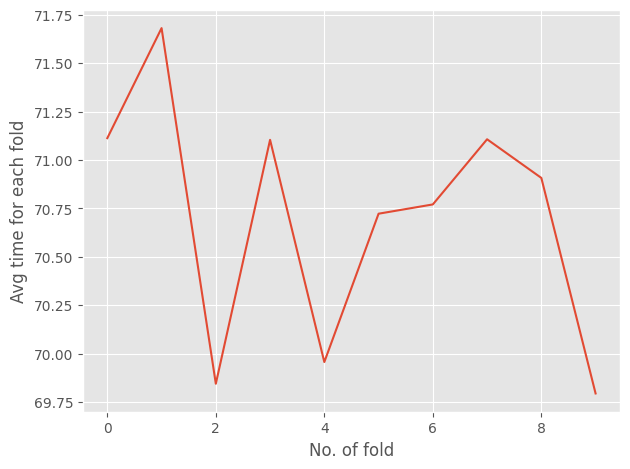

In [196]:
import matplotlib.pyplot as plt

times_birnn_n = np.zeros((10,100))
for i, row in enumerate(times_birnn):
    times_birnn_n[i, :len(row)] = row

times_birnn_n_n = np.mean(times_birnn_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_birnn_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("birnn times")
plt.show()

In [197]:
train_acc_birnn_n = np.zeros((10,100))
for i, row in enumerate(train_acc_birnn):
    train_acc_birnn_n[i, :len(row)] = row
    
test_acc_birnn_n = np.zeros((10,100))
for i, row in enumerate(test_acc_birnn):
    test_acc_birnn_n[i, :len(row)] = row
    
train_loss_birnn_n = np.zeros((10,100))
for i, row in enumerate(train_loss_birnn):
    train_loss_birnn_n[i, :len(row)] = row
    
test_loss_birnn_n = np.zeros((10,100))
for i, row in enumerate(test_loss_birnn):
    test_loss_birnn_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_birnn_n = np.mean(train_acc_birnn_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_birnn_n = np.mean(test_acc_birnn_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_birnn_n = np.mean(train_loss_birnn_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_birnn_n = np.mean(test_loss_birnn_n,axis=0)

In [198]:
data = [train_acc_birnn_n,test_acc_birnn_n,train_loss_birnn_n,test_loss_birnn_n]

df = pd.DataFrame(data)
df.to_csv('birnn_acc', index=False)
df = pd.read_csv('birnn_acc')

train_acc_birnn_n = df.iloc[0]
test_acc_birnn_n = df.iloc[1]
train_loss_birnn_n = df.iloc[2]
test_loss_birnn_n = df.iloc[3]


df_t = pd.DataFrame([times_birnn_n_n])
df_t.to_csv('birnn_times', index=False)
df_t = pd.read_csv('birnn_times')

times_birnn_n_n = df_t.iloc[0]

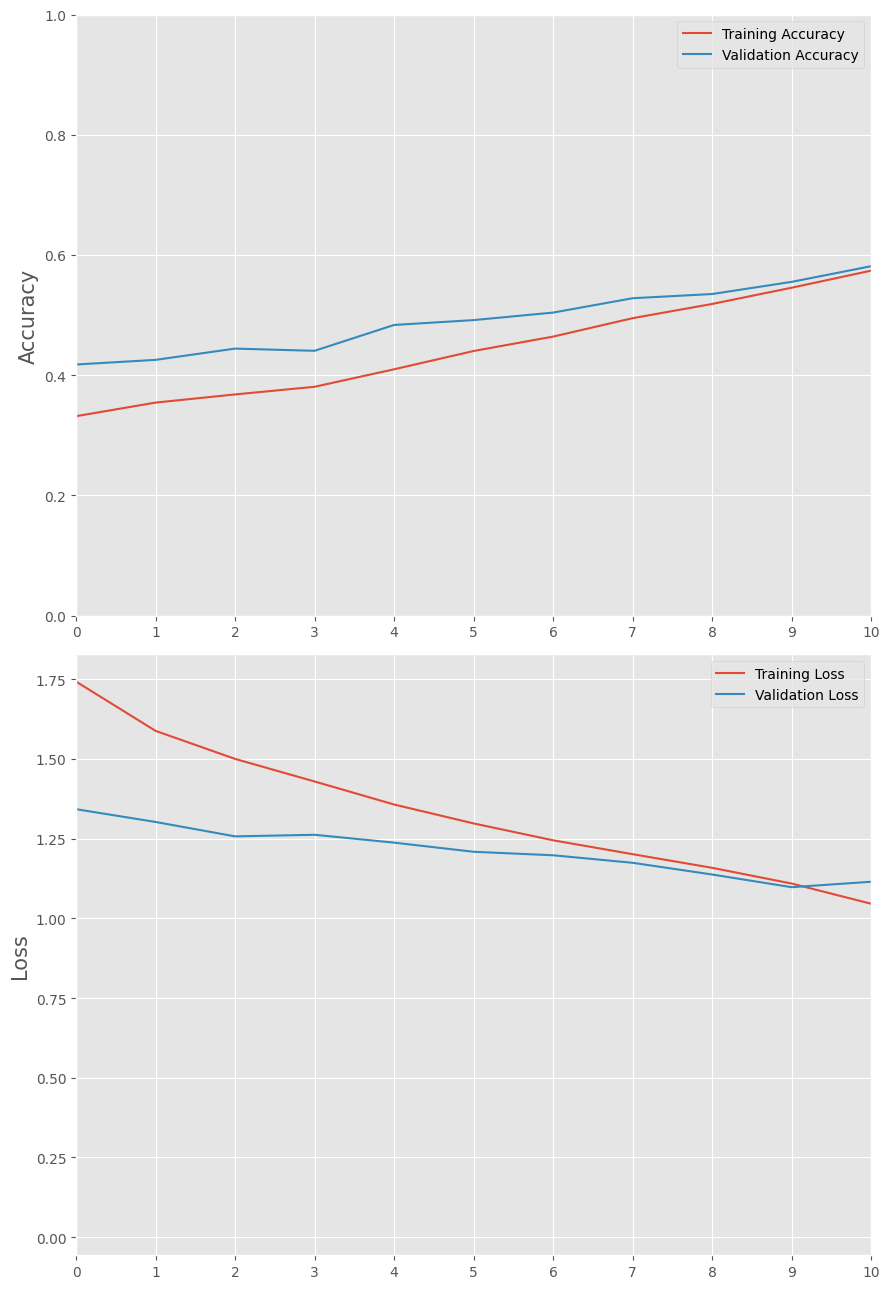

In [199]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_birnn_n, label='Training Accuracy')
axs[0].plot(test_acc_birnn_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_birnn_n, label='Training Loss')
axs[1].plot(test_loss_birnn_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig(" BIRNN Training and Testing Loss")
plt.show()

In [200]:
import gc
gc.collect()

23753

In [201]:
np.array(scores_birnn).shape

(10, 302, 4)

In [202]:
y_pred_birnn = np.argmax(scores_birnn,axis=2)

In [203]:
y_pred_birnn.shape

(10, 302)

In [204]:
from sklearn.metrics import accuracy_score
acc_scores_birnn = []
for i in range(len(y_test_all_birnn)):
    acc_scores_birnn.append(accuracy_score(y_true = y_test_all_birnn[i],y_pred = y_pred_birnn[i]))

In [205]:
acc_scores_birnn

[0.8675496688741722,
 0.8443708609271523,
 0.8774834437086093,
 0.8940397350993378,
 0.8675496688741722,
 0.8311258278145696,
 0.8509933774834437,
 0.8311258278145696,
 0.8576158940397351,
 0.8807947019867549]

In [206]:
df_acc = pd.DataFrame([acc_scores_birnn])

df_acc.to_csv('birnn_accuracy', index=False)

df_acc = pd.read_csv('birnn_accuracy')

acc_scores_birnn = df_acc.iloc[0].values

In [207]:
acc_birnn = np.mean(acc_scores_birnn)

In [208]:
acc_birnn

0.8602649006622517

In [209]:
y_test_all_n = np.array(y_test_all_birnn)

y_pred_birnn_n = y_pred_birnn.flatten()
y_test_all_n = y_test_all_n.flatten()

In [210]:
import gc
gc.collect()

0

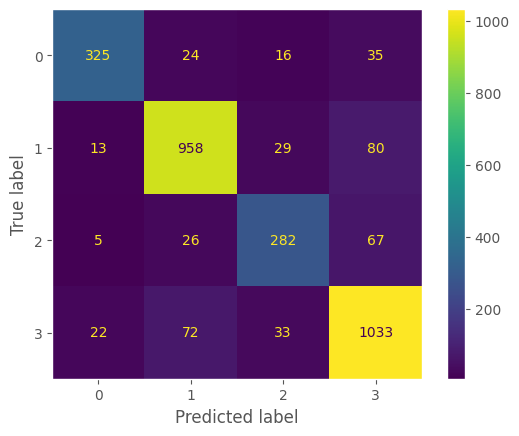

In [211]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_birnn_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("birnn")
plt.show()

In [212]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_birnn_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       400
           1       0.89      0.89      0.89      1080
           2       0.78      0.74      0.76       380
           3       0.85      0.89      0.87      1160

    accuracy                           0.86      3020
   macro avg       0.85      0.83      0.84      3020
weighted avg       0.86      0.86      0.86      3020



# MobileNetV2

In [255]:
import gc
gc.collect()

30026

In [8]:
X.shape

(3020, 259, 128)

In [215]:
# X = np.concatenate([X,X,X,X,X,X,X,X,X,X,X,X,X,X,X], axis= -1)

In [9]:
X = np.expand_dims(X, axis=-1)

In [10]:
X_n = np.concatenate([X,X,X], axis= -1)

In [11]:
X_n.shape

(3020, 259, 128, 3)

In [260]:
y.shape

(3020,)

In [261]:
import tensorflow as tf
from keras.applications import MobileNetV2

In [262]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_mnv2 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_mnv2.append(self.times)

# early_stop = EarlyStopping(monitor='loss', patience=7, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 10, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [263]:
IMG_SHAPE = (None,None,3)

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top= False, 
                                              weights='imagenet')
base_model.trainable = False

In [264]:
def create_model_mnv2():
     
    model_mnv2 = tf.keras.Sequential([
        
        
        base_model,
        
        tf.keras.layers.GlobalAveragePooling2D(),
        
        tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
        
        tf.keras.layers.Dropout(0.25),
        
        tf.keras.layers.Dense(units=4, activation='softmax')
        
])
    
    return model_mnv2

In [265]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_mnv2 = []
y_test_all_mnv2 = []
train_acc_mnv2 = []
test_acc_mnv2 = []
train_loss_mnv2 = []
test_loss_mnv2 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_mnv2.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_mnv2 = None
    model_mnv2 = create_model_mnv2()
        
    model_mnv2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_mnv2.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_mnv2.predict(X_test)
    
    scores_mnv2.append(x)
    train_acc_mnv2.append(history.history["accuracy"])
    test_acc_mnv2.append(history.history["val_accuracy"])
    train_loss_mnv2.append(history.history["loss"])
    test_loss_mnv2.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 4s 29ms/step - loss: 1.2817 - accuracy: 0.4321 - val_loss: 1.1449 - val_accuracy: 0.4779 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 2s 22ms/step - loss: 1.1248 - accuracy: 0.4959 - val_loss: 1.0815 - val_accuracy: 0.5147 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 2s 22ms/step - loss: 1.0777 - accuracy: 0.5417 - val_loss: 1.0643 - val_accuracy: 0.5221 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 2s 22ms/step - loss: 1.0108 - accuracy: 0.5740 - val_loss: 1.0399 - val_accuracy: 0.5478 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 2s 22ms/step - loss: 0.9972 - accuracy: 0.5769 - val_loss: 1.0169 - val_accuracy: 0.5588 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 2s 22ms/step - loss: 0.9430 - accuracy: 0.6063 - val_loss: 1.0539 - val_accuracy: 0.5331 - lr: 0.0010
Epoch 7/100
77/77 [==========================

Epoch 31/100
77/77 [==============================] - 2s 21ms/step - loss: 0.3250 - accuracy: 0.8827 - val_loss: 1.0949 - val_accuracy: 0.6103 - lr: 0.0010
Epoch 32/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2967 - accuracy: 0.8929 - val_loss: 1.2596 - val_accuracy: 0.5846 - lr: 0.0010
Epoch 33/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2954 - accuracy: 0.8949 - val_loss: 1.1486 - val_accuracy: 0.5919 - lr: 0.0010
Epoch 34/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2822 - accuracy: 0.9031 - val_loss: 1.1415 - val_accuracy: 0.5919 - lr: 0.0010
Epoch 35/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2883 - accuracy: 0.8953 - val_loss: 1.1201 - val_accuracy: 0.6066 - lr: 0.0010
Epoch 36/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2578 - accuracy: 0.9109 - val_loss: 1.0954 - val_accuracy: 0.6066 - lr: 0.0010
Epoch 37/100
76/77 [============================>.] - ETA: 0s - 

Epoch 89/100
77/77 [==============================] - 2s 21ms/step - loss: 0.0634 - accuracy: 0.9886 - val_loss: 1.3396 - val_accuracy: 0.6140 - lr: 8.0000e-06
Epoch 90/100
77/77 [==============================] - 2s 21ms/step - loss: 0.0642 - accuracy: 0.9898 - val_loss: 1.3448 - val_accuracy: 0.6176 - lr: 8.0000e-06
Epoch 91/100
77/77 [==============================] - 2s 21ms/step - loss: 0.0645 - accuracy: 0.9890 - val_loss: 1.3450 - val_accuracy: 0.6103 - lr: 8.0000e-06
Epoch 92/100
77/77 [==============================] - 2s 21ms/step - loss: 0.0674 - accuracy: 0.9869 - val_loss: 1.3364 - val_accuracy: 0.6103 - lr: 8.0000e-06
Epoch 93/100
77/77 [==============================] - 2s 21ms/step - loss: 0.0648 - accuracy: 0.9881 - val_loss: 1.3356 - val_accuracy: 0.6140 - lr: 8.0000e-06
Epoch 94/100
77/77 [==============================] - 2s 21ms/step - loss: 0.0632 - accuracy: 0.9894 - val_loss: 1.3371 - val_accuracy: 0.6140 - lr: 8.0000e-06
Epoch 95/100
77/77 [====================

Epoch 18/100
77/77 [==============================] - 2s 22ms/step - loss: 0.6116 - accuracy: 0.7531 - val_loss: 0.9885 - val_accuracy: 0.5993 - lr: 0.0010
Epoch 19/100
77/77 [==============================] - 2s 21ms/step - loss: 0.5708 - accuracy: 0.7829 - val_loss: 1.0877 - val_accuracy: 0.5809 - lr: 0.0010
Epoch 20/100
77/77 [==============================] - 2s 21ms/step - loss: 0.5393 - accuracy: 0.7882 - val_loss: 1.0655 - val_accuracy: 0.5662 - lr: 0.0010
Epoch 21/100
77/77 [==============================] - 2s 21ms/step - loss: 0.5164 - accuracy: 0.7964 - val_loss: 1.0432 - val_accuracy: 0.5809 - lr: 0.0010
Epoch 22/100
77/77 [==============================] - 2s 21ms/step - loss: 0.4906 - accuracy: 0.8058 - val_loss: 1.0251 - val_accuracy: 0.5919 - lr: 0.0010
Epoch 23/100
77/77 [==============================] - 2s 22ms/step - loss: 0.4624 - accuracy: 0.8254 - val_loss: 1.1184 - val_accuracy: 0.5809 - lr: 0.0010
Epoch 24/100
75/77 [============================>.] - ETA: 0s - 

Epoch 47/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2239 - accuracy: 0.9428 - val_loss: 1.1393 - val_accuracy: 0.6029 - lr: 4.0000e-05
Epoch 48/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2338 - accuracy: 0.9379 - val_loss: 1.1308 - val_accuracy: 0.6176 - lr: 4.0000e-05
Epoch 49/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2342 - accuracy: 0.9260 - val_loss: 1.1281 - val_accuracy: 0.6176 - lr: 4.0000e-05
Epoch 50/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2273 - accuracy: 0.9350 - val_loss: 1.1298 - val_accuracy: 0.6140 - lr: 4.0000e-05
Epoch 51/100
76/77 [============================>.] - ETA: 0s - loss: 0.2294 - accuracy: 0.9404
Epoch 51: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 51: 1.66 seconds
77/77 [==============================] - 2s 22ms/step - loss: 0.2300 - accuracy: 0.9403 - val_loss: 1.1365 - val_accuracy: 0.6066 - lr: 4.0000e-05
Ep

Epoch 76/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2198 - accuracy: 0.9419 - val_loss: 1.1428 - val_accuracy: 0.6103 - lr: 3.2000e-07
Epoch 77/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2280 - accuracy: 0.9354 - val_loss: 1.1428 - val_accuracy: 0.6103 - lr: 3.2000e-07
Epoch 78/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2275 - accuracy: 0.9362 - val_loss: 1.1428 - val_accuracy: 0.6103 - lr: 3.2000e-07
Epoch 79/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2169 - accuracy: 0.9415 - val_loss: 1.1428 - val_accuracy: 0.6103 - lr: 3.2000e-07
Epoch 80/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2212 - accuracy: 0.9379 - val_loss: 1.1428 - val_accuracy: 0.6103 - lr: 3.2000e-07
Epoch 81/100
75/77 [============================>.] - ETA: 0s - loss: 0.2176 - accuracy: 0.9475
Epoch 81: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 81: 1.

Epoch 5/100
77/77 [==============================] - 2s 21ms/step - loss: 0.9652 - accuracy: 0.5998 - val_loss: 1.0332 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 2s 21ms/step - loss: 0.9508 - accuracy: 0.6022 - val_loss: 1.0104 - val_accuracy: 0.5588 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 2s 21ms/step - loss: 0.8959 - accuracy: 0.6337 - val_loss: 1.0888 - val_accuracy: 0.5147 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - 2s 21ms/step - loss: 0.8706 - accuracy: 0.6406 - val_loss: 1.0179 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 2s 21ms/step - loss: 0.8179 - accuracy: 0.6680 - val_loss: 1.0134 - val_accuracy: 0.5956 - lr: 0.0010
Epoch 10/100
77/77 [==============================] - 2s 21ms/step - loss: 0.7795 - accuracy: 0.6778 - val_loss: 1.0229 - val_accuracy: 0.5699 - lr: 0.0010
Epoch 11/100
77/77 [==============================] - 2s 21ms/step - 

Epoch 34/100
77/77 [==============================] - 2s 21ms/step - loss: 0.3027 - accuracy: 0.9133 - val_loss: 1.1291 - val_accuracy: 0.5662 - lr: 4.0000e-05
Epoch 35/100
77/77 [==============================] - 2s 21ms/step - loss: 0.3087 - accuracy: 0.9096 - val_loss: 1.1111 - val_accuracy: 0.5699 - lr: 4.0000e-05
Epoch 36/100
77/77 [==============================] - 2s 21ms/step - loss: 0.3035 - accuracy: 0.9195 - val_loss: 1.1063 - val_accuracy: 0.5809 - lr: 4.0000e-05
Epoch 37/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2999 - accuracy: 0.9076 - val_loss: 1.1180 - val_accuracy: 0.5588 - lr: 4.0000e-05
Epoch 38/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2996 - accuracy: 0.9125 - val_loss: 1.1339 - val_accuracy: 0.5772 - lr: 4.0000e-05
Epoch 39/100
75/77 [============================>.] - ETA: 0s - loss: 0.3023 - accuracy: 0.9125
Epoch 39: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 39: 1.

Epoch 63/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2918 - accuracy: 0.9199 - val_loss: 1.1207 - val_accuracy: 0.5735 - lr: 3.2000e-07
Epoch 64/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2893 - accuracy: 0.9195 - val_loss: 1.1210 - val_accuracy: 0.5735 - lr: 3.2000e-07
Epoch 65/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2897 - accuracy: 0.9170 - val_loss: 1.1209 - val_accuracy: 0.5772 - lr: 3.2000e-07
Epoch 66/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2884 - accuracy: 0.9150 - val_loss: 1.1210 - val_accuracy: 0.5772 - lr: 3.2000e-07
Epoch 67/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2945 - accuracy: 0.9191 - val_loss: 1.1208 - val_accuracy: 0.5772 - lr: 3.2000e-07
Epoch 68/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2803 - accuracy: 0.9240 - val_loss: 1.1208 - val_accuracy: 0.5772 - lr: 3.2000e-07
Epoch 69/100
75/77 [====================

Epoch 92/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2876 - accuracy: 0.9113 - val_loss: 1.1211 - val_accuracy: 0.5772 - lr: 2.5600e-09
Epoch 93/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2939 - accuracy: 0.9199 - val_loss: 1.1211 - val_accuracy: 0.5772 - lr: 2.5600e-09
Epoch 94/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2960 - accuracy: 0.9150 - val_loss: 1.1211 - val_accuracy: 0.5772 - lr: 2.5600e-09
Epoch 95/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2826 - accuracy: 0.9231 - val_loss: 1.1211 - val_accuracy: 0.5772 - lr: 2.5600e-09
Epoch 96/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2824 - accuracy: 0.9186 - val_loss: 1.1211 - val_accuracy: 0.5772 - lr: 2.5600e-09
Epoch 97/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2896 - accuracy: 0.9182 - val_loss: 1.1211 - val_accuracy: 0.5772 - lr: 2.5600e-09
Epoch 98/100
77/77 [====================

Epoch 21/100
77/77 [==============================] - 2s 21ms/step - loss: 0.5131 - accuracy: 0.8103 - val_loss: 0.9502 - val_accuracy: 0.6213 - lr: 2.0000e-04
Epoch 22/100
77/77 [==============================] - 2s 21ms/step - loss: 0.5166 - accuracy: 0.8160 - val_loss: 0.9580 - val_accuracy: 0.5993 - lr: 2.0000e-04
Epoch 23/100
77/77 [==============================] - 2s 21ms/step - loss: 0.4889 - accuracy: 0.8230 - val_loss: 0.9631 - val_accuracy: 0.6176 - lr: 2.0000e-04
Epoch 24/100
77/77 [==============================] - 2s 21ms/step - loss: 0.4889 - accuracy: 0.8344 - val_loss: 0.9639 - val_accuracy: 0.6066 - lr: 2.0000e-04
Epoch 25/100
77/77 [==============================] - 2s 21ms/step - loss: 0.4756 - accuracy: 0.8299 - val_loss: 0.9543 - val_accuracy: 0.6176 - lr: 2.0000e-04
Epoch 26/100
77/77 [==============================] - 2s 22ms/step - loss: 0.4767 - accuracy: 0.8316 - val_loss: 0.9567 - val_accuracy: 0.6140 - lr: 2.0000e-04
Epoch 27/100
75/77 [====================

Epoch 50/100
77/77 [==============================] - 2s 21ms/step - loss: 0.4116 - accuracy: 0.8659 - val_loss: 0.9694 - val_accuracy: 0.6066 - lr: 1.6000e-06
Epoch 51/100
77/77 [==============================] - 2s 21ms/step - loss: 0.4231 - accuracy: 0.8590 - val_loss: 0.9694 - val_accuracy: 0.6066 - lr: 1.6000e-06
Epoch 52/100
77/77 [==============================] - 2s 21ms/step - loss: 0.4232 - accuracy: 0.8545 - val_loss: 0.9694 - val_accuracy: 0.6066 - lr: 1.6000e-06
Epoch 53/100
77/77 [==============================] - 2s 21ms/step - loss: 0.4160 - accuracy: 0.8626 - val_loss: 0.9693 - val_accuracy: 0.6103 - lr: 1.6000e-06
Epoch 54/100
77/77 [==============================] - 2s 21ms/step - loss: 0.4197 - accuracy: 0.8590 - val_loss: 0.9693 - val_accuracy: 0.6103 - lr: 1.6000e-06
Epoch 55/100
77/77 [==============================] - 2s 21ms/step - loss: 0.4134 - accuracy: 0.8651 - val_loss: 0.9690 - val_accuracy: 0.6103 - lr: 1.6000e-06
Epoch 56/100
77/77 [====================

Epoch 79/100
77/77 [==============================] - 2s 21ms/step - loss: 0.4219 - accuracy: 0.8590 - val_loss: 0.9695 - val_accuracy: 0.6103 - lr: 1.2800e-08
Epoch 80/100
77/77 [==============================] - 2s 21ms/step - loss: 0.4185 - accuracy: 0.8532 - val_loss: 0.9695 - val_accuracy: 0.6103 - lr: 1.2800e-08
Epoch 81/100
77/77 [==============================] - 2s 21ms/step - loss: 0.4168 - accuracy: 0.8573 - val_loss: 0.9695 - val_accuracy: 0.6103 - lr: 1.2800e-08
Epoch 82/100
77/77 [==============================] - 2s 21ms/step - loss: 0.4147 - accuracy: 0.8622 - val_loss: 0.9695 - val_accuracy: 0.6103 - lr: 1.2800e-08
Epoch 83/100
77/77 [==============================] - 2s 21ms/step - loss: 0.4193 - accuracy: 0.8585 - val_loss: 0.9695 - val_accuracy: 0.6103 - lr: 1.2800e-08
Epoch 84/100
77/77 [==============================] - 2s 21ms/step - loss: 0.4192 - accuracy: 0.8581 - val_loss: 0.9695 - val_accuracy: 0.6103 - lr: 1.2800e-08
Epoch 85/100
77/77 [====================

Epoch 8/100
77/77 [==============================] - 2s 21ms/step - loss: 0.8815 - accuracy: 0.6325 - val_loss: 0.9411 - val_accuracy: 0.5772 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 2s 21ms/step - loss: 0.8390 - accuracy: 0.6578 - val_loss: 0.9551 - val_accuracy: 0.5515 - lr: 0.0010
Epoch 10/100
77/77 [==============================] - 2s 21ms/step - loss: 0.8131 - accuracy: 0.6680 - val_loss: 0.9623 - val_accuracy: 0.6066 - lr: 0.0010
Epoch 11/100
77/77 [==============================] - 2s 21ms/step - loss: 0.7923 - accuracy: 0.6725 - val_loss: 0.9609 - val_accuracy: 0.6360 - lr: 0.0010
Epoch 12/100
77/77 [==============================] - 2s 21ms/step - loss: 0.7507 - accuracy: 0.6942 - val_loss: 0.9541 - val_accuracy: 0.6066 - lr: 0.0010
Epoch 13/100
77/77 [==============================] - 2s 21ms/step - loss: 0.7288 - accuracy: 0.6979 - val_loss: 0.9454 - val_accuracy: 0.6029 - lr: 0.0010
Epoch 14/100
77/77 [==============================] - 2s 21ms/step

Epoch 66/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2484 - accuracy: 0.9370 - val_loss: 0.9732 - val_accuracy: 0.6287 - lr: 1.6000e-06
Epoch 67/100
74/77 [===========================>..] - ETA: 0s - loss: 0.2553 - accuracy: 0.9248
Epoch 67: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 67: 1.63 seconds
77/77 [==============================] - 2s 21ms/step - loss: 0.2554 - accuracy: 0.9260 - val_loss: 0.9732 - val_accuracy: 0.6287 - lr: 1.6000e-06
Epoch 68/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2534 - accuracy: 0.9297 - val_loss: 0.9731 - val_accuracy: 0.6287 - lr: 3.2000e-07
Epoch 69/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2499 - accuracy: 0.9280 - val_loss: 0.9731 - val_accuracy: 0.6287 - lr: 3.2000e-07
Epoch 70/100
77/77 [==============================] - 2s 22ms/step - loss: 0.2382 - accuracy: 0.9391 - val_loss: 0.9731 - val_accuracy: 0.6250 - lr: 3.2000e-07
Ep

Epoch 95/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2528 - accuracy: 0.9260 - val_loss: 0.9730 - val_accuracy: 0.6287 - lr: 1.2800e-08
Epoch 96/100
77/77 [==============================] - 2s 22ms/step - loss: 0.2534 - accuracy: 0.9268 - val_loss: 0.9730 - val_accuracy: 0.6287 - lr: 1.2800e-08
Epoch 97/100
77/77 [==============================] - ETA: 0s - loss: 0.2543 - accuracy: 0.9280
Epoch 97: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 97: 1.62 seconds
77/77 [==============================] - 2s 21ms/step - loss: 0.2543 - accuracy: 0.9280 - val_loss: 0.9730 - val_accuracy: 0.6287 - lr: 1.2800e-08
Epoch 98/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2516 - accuracy: 0.9301 - val_loss: 0.9730 - val_accuracy: 0.6287 - lr: 2.5600e-09
Epoch 99/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2503 - accuracy: 0.9313 - val_loss: 0.9730 - val_accuracy: 0.6287 - lr: 2.5600e-09
E

Epoch 53/100
77/77 [==============================] - 2s 21ms/step - loss: 0.1445 - accuracy: 0.9640 - val_loss: 1.0244 - val_accuracy: 0.6691 - lr: 4.0000e-05
Epoch 54/100
77/77 [==============================] - ETA: 0s - loss: 0.1528 - accuracy: 0.9640
Epoch 54: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 54: 1.65 seconds
77/77 [==============================] - 2s 21ms/step - loss: 0.1528 - accuracy: 0.9640 - val_loss: 1.0301 - val_accuracy: 0.6581 - lr: 4.0000e-05
Epoch 55/100
77/77 [==============================] - 2s 21ms/step - loss: 0.1390 - accuracy: 0.9718 - val_loss: 1.0308 - val_accuracy: 0.6618 - lr: 8.0000e-06
Epoch 56/100
77/77 [==============================] - 2s 21ms/step - loss: 0.1425 - accuracy: 0.9681 - val_loss: 1.0335 - val_accuracy: 0.6581 - lr: 8.0000e-06
Epoch 57/100
77/77 [==============================] - 2s 22ms/step - loss: 0.1462 - accuracy: 0.9640 - val_loss: 1.0332 - val_accuracy: 0.6618 - lr: 8.0000e-06
Ep

Epoch 82/100
77/77 [==============================] - 2s 21ms/step - loss: 0.1405 - accuracy: 0.9710 - val_loss: 1.0292 - val_accuracy: 0.6618 - lr: 3.2000e-07
Epoch 83/100
77/77 [==============================] - 2s 21ms/step - loss: 0.1447 - accuracy: 0.9652 - val_loss: 1.0291 - val_accuracy: 0.6618 - lr: 3.2000e-07
Epoch 84/100
75/77 [============================>.] - ETA: 0s - loss: 0.1434 - accuracy: 0.9642
Epoch 84: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 84: 1.66 seconds
77/77 [==============================] - 2s 22ms/step - loss: 0.1436 - accuracy: 0.9640 - val_loss: 1.0292 - val_accuracy: 0.6618 - lr: 3.2000e-07
Epoch 85/100
77/77 [==============================] - 2s 21ms/step - loss: 0.1497 - accuracy: 0.9636 - val_loss: 1.0292 - val_accuracy: 0.6618 - lr: 6.4000e-08
Epoch 86/100
77/77 [==============================] - 2s 21ms/step - loss: 0.1438 - accuracy: 0.9681 - val_loss: 1.0292 - val_accuracy: 0.6618 - lr: 6.4000e-08
Ep

Epoch 11/100
77/77 [==============================] - 2s 21ms/step - loss: 0.7996 - accuracy: 0.6623 - val_loss: 0.9818 - val_accuracy: 0.5846 - lr: 0.0010
Epoch 12/100
77/77 [==============================] - 2s 21ms/step - loss: 0.7582 - accuracy: 0.6815 - val_loss: 0.9260 - val_accuracy: 0.6213 - lr: 0.0010
Epoch 13/100
77/77 [==============================] - 2s 21ms/step - loss: 0.7167 - accuracy: 0.7105 - val_loss: 1.0251 - val_accuracy: 0.6066 - lr: 0.0010
Epoch 14/100
77/77 [==============================] - 2s 21ms/step - loss: 0.7020 - accuracy: 0.7146 - val_loss: 0.9410 - val_accuracy: 0.5662 - lr: 0.0010
Epoch 15/100
77/77 [==============================] - 2s 21ms/step - loss: 0.6823 - accuracy: 0.7244 - val_loss: 0.9233 - val_accuracy: 0.6066 - lr: 0.0010
Epoch 16/100
77/77 [==============================] - 2s 21ms/step - loss: 0.6381 - accuracy: 0.7494 - val_loss: 0.9400 - val_accuracy: 0.5809 - lr: 0.0010
Epoch 17/100
77/77 [==============================] - 2s 21ms/st

Epoch 40/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2928 - accuracy: 0.9203 - val_loss: 0.9325 - val_accuracy: 0.6250 - lr: 4.0000e-05
Epoch 41/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2880 - accuracy: 0.9125 - val_loss: 0.9336 - val_accuracy: 0.6287 - lr: 4.0000e-05
Epoch 42/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2862 - accuracy: 0.9162 - val_loss: 0.9276 - val_accuracy: 0.6324 - lr: 4.0000e-05
Epoch 43/100
77/77 [==============================] - 2s 22ms/step - loss: 0.2804 - accuracy: 0.9178 - val_loss: 0.9296 - val_accuracy: 0.6287 - lr: 4.0000e-05
Epoch 44/100
77/77 [==============================] - 2s 22ms/step - loss: 0.2853 - accuracy: 0.9178 - val_loss: 0.9330 - val_accuracy: 0.6250 - lr: 4.0000e-05
Epoch 45/100
75/77 [============================>.] - ETA: 0s - loss: 0.2827 - accuracy: 0.9179
Epoch 45: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 45: 1.

Epoch 69/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2743 - accuracy: 0.9203 - val_loss: 0.9351 - val_accuracy: 0.6287 - lr: 3.2000e-07
Epoch 70/100
77/77 [==============================] - 2s 22ms/step - loss: 0.2743 - accuracy: 0.9121 - val_loss: 0.9353 - val_accuracy: 0.6287 - lr: 3.2000e-07
Epoch 71/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2721 - accuracy: 0.9207 - val_loss: 0.9353 - val_accuracy: 0.6287 - lr: 3.2000e-07
Epoch 72/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2776 - accuracy: 0.9227 - val_loss: 0.9353 - val_accuracy: 0.6287 - lr: 3.2000e-07
Epoch 73/100
77/77 [==============================] - 2s 22ms/step - loss: 0.2697 - accuracy: 0.9231 - val_loss: 0.9353 - val_accuracy: 0.6287 - lr: 3.2000e-07
Epoch 74/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2700 - accuracy: 0.9203 - val_loss: 0.9354 - val_accuracy: 0.6287 - lr: 3.2000e-07
Epoch 75/100
75/77 [====================

Epoch 98/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2772 - accuracy: 0.9154 - val_loss: 0.9354 - val_accuracy: 0.6287 - lr: 2.5600e-09
Epoch 99/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2682 - accuracy: 0.9235 - val_loss: 0.9354 - val_accuracy: 0.6287 - lr: 2.5600e-09
Epoch 100/100
10/10 [==============================] - 1s 18ms/step
Training on fold 8/10...
Epoch 1/100
77/77 [==============================] - 3s 28ms/step - loss: 1.3602 - accuracy: 0.4195 - val_loss: 1.0920 - val_accuracy: 0.5515 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 2s 21ms/step - loss: 1.1264 - accuracy: 0.5012 - val_loss: 1.0867 - val_accuracy: 0.5772 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 2s 21ms/step - loss: 1.0674 - accuracy: 0.5425 - val_loss: 1.0514 - val_accuracy: 0.5588 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 2s 21ms/step - loss: 1.0272 - accuracy: 0.5621 - val_loss: 1.0211 - v

77/77 [==============================] - 2s 21ms/step - loss: 0.4143 - accuracy: 0.8565 - val_loss: 0.9417 - val_accuracy: 0.6397 - lr: 2.0000e-04
Epoch 28/100
77/77 [==============================] - 2s 21ms/step - loss: 0.4103 - accuracy: 0.8573 - val_loss: 0.9486 - val_accuracy: 0.6324 - lr: 2.0000e-04
Epoch 29/100
77/77 [==============================] - 2s 21ms/step - loss: 0.3910 - accuracy: 0.8630 - val_loss: 0.9529 - val_accuracy: 0.6544 - lr: 2.0000e-04
Epoch 30/100
77/77 [==============================] - 2s 21ms/step - loss: 0.3854 - accuracy: 0.8737 - val_loss: 0.9797 - val_accuracy: 0.6397 - lr: 2.0000e-04
Epoch 31/100
77/77 [==============================] - 2s 21ms/step - loss: 0.3921 - accuracy: 0.8626 - val_loss: 0.9545 - val_accuracy: 0.6360 - lr: 2.0000e-04
Epoch 32/100
77/77 [==============================] - 2s 21ms/step - loss: 0.3846 - accuracy: 0.8679 - val_loss: 0.9449 - val_accuracy: 0.6360 - lr: 2.0000e-04
Epoch 33/100
77/77 [==============================] -

Epoch 56/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2886 - accuracy: 0.9150 - val_loss: 0.9669 - val_accuracy: 0.6434 - lr: 8.0000e-06
Epoch 57/100
77/77 [==============================] - 2s 21ms/step - loss: 0.3003 - accuracy: 0.9109 - val_loss: 0.9693 - val_accuracy: 0.6434 - lr: 8.0000e-06
Epoch 58/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2968 - accuracy: 0.9121 - val_loss: 0.9700 - val_accuracy: 0.6434 - lr: 8.0000e-06
Epoch 59/100
76/77 [============================>.] - ETA: 0s - loss: 0.2948 - accuracy: 0.9165
Epoch 59: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 59: 1.62 seconds
77/77 [==============================] - 2s 21ms/step - loss: 0.2941 - accuracy: 0.9170 - val_loss: 0.9684 - val_accuracy: 0.6434 - lr: 8.0000e-06
Epoch 60/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2945 - accuracy: 0.9105 - val_loss: 0.9685 - val_accuracy: 0.6434 - lr: 1.6000e-06
E

Epoch 85/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2940 - accuracy: 0.9141 - val_loss: 0.9695 - val_accuracy: 0.6434 - lr: 6.4000e-08
Epoch 86/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2924 - accuracy: 0.9105 - val_loss: 0.9695 - val_accuracy: 0.6434 - lr: 6.4000e-08
Epoch 87/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2942 - accuracy: 0.9141 - val_loss: 0.9695 - val_accuracy: 0.6434 - lr: 6.4000e-08
Epoch 88/100
77/77 [==============================] - 2s 22ms/step - loss: 0.2900 - accuracy: 0.9150 - val_loss: 0.9695 - val_accuracy: 0.6434 - lr: 6.4000e-08
Epoch 89/100
75/77 [============================>.] - ETA: 0s - loss: 0.2936 - accuracy: 0.9150
Epoch 89: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 89: 1.64 seconds
77/77 [==============================] - 2s 21ms/step - loss: 0.2954 - accuracy: 0.9133 - val_loss: 0.9695 - val_accuracy: 0.6434 - lr: 6.4000e-08
E

Epoch 14/100
77/77 [==============================] - 2s 21ms/step - loss: 0.7354 - accuracy: 0.7044 - val_loss: 1.0598 - val_accuracy: 0.5551 - lr: 0.0010
Epoch 15/100
77/77 [==============================] - 2s 21ms/step - loss: 0.7003 - accuracy: 0.7200 - val_loss: 0.9913 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 16/100
77/77 [==============================] - 2s 21ms/step - loss: 0.6782 - accuracy: 0.7183 - val_loss: 1.0375 - val_accuracy: 0.5809 - lr: 0.0010
Epoch 17/100
77/77 [==============================] - 2s 21ms/step - loss: 0.6534 - accuracy: 0.7343 - val_loss: 1.0296 - val_accuracy: 0.5735 - lr: 0.0010
Epoch 18/100
77/77 [==============================] - 2s 21ms/step - loss: 0.6152 - accuracy: 0.7547 - val_loss: 1.0044 - val_accuracy: 0.5846 - lr: 0.0010
Epoch 19/100
77/77 [==============================] - 2s 21ms/step - loss: 0.6025 - accuracy: 0.7645 - val_loss: 1.0068 - val_accuracy: 0.5551 - lr: 0.0010
Epoch 20/100
77/77 [==============================] - 2s 21ms/st

Epoch 43/100
77/77 [==============================] - 2s 21ms/step - loss: 0.3054 - accuracy: 0.9052 - val_loss: 1.0825 - val_accuracy: 0.5662 - lr: 4.0000e-05
Epoch 44/100
77/77 [==============================] - ETA: 0s - loss: 0.3094 - accuracy: 0.9072
Epoch 44: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 44: 1.63 seconds
77/77 [==============================] - 2s 21ms/step - loss: 0.3094 - accuracy: 0.9072 - val_loss: 1.0867 - val_accuracy: 0.5699 - lr: 4.0000e-05
Epoch 45/100
77/77 [==============================] - 2s 21ms/step - loss: 0.3085 - accuracy: 0.9068 - val_loss: 1.0878 - val_accuracy: 0.5588 - lr: 8.0000e-06
Epoch 46/100
77/77 [==============================] - 2s 21ms/step - loss: 0.3145 - accuracy: 0.9035 - val_loss: 1.0853 - val_accuracy: 0.5625 - lr: 8.0000e-06
Epoch 47/100
77/77 [==============================] - 2s 21ms/step - loss: 0.3096 - accuracy: 0.9072 - val_loss: 1.0835 - val_accuracy: 0.5625 - lr: 8.0000e-06
Ep

Epoch 72/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2911 - accuracy: 0.9121 - val_loss: 1.0867 - val_accuracy: 0.5662 - lr: 3.2000e-07
Epoch 73/100
77/77 [==============================] - 2s 21ms/step - loss: 0.3003 - accuracy: 0.9092 - val_loss: 1.0868 - val_accuracy: 0.5662 - lr: 3.2000e-07
Epoch 74/100
75/77 [============================>.] - ETA: 0s - loss: 0.3114 - accuracy: 0.9050
Epoch 74: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 74: 1.62 seconds
77/77 [==============================] - 2s 21ms/step - loss: 0.3099 - accuracy: 0.9060 - val_loss: 1.0867 - val_accuracy: 0.5662 - lr: 3.2000e-07
Epoch 75/100
77/77 [==============================] - 2s 21ms/step - loss: 0.3046 - accuracy: 0.9060 - val_loss: 1.0867 - val_accuracy: 0.5662 - lr: 6.4000e-08
Epoch 76/100
77/77 [==============================] - 2s 21ms/step - loss: 0.3005 - accuracy: 0.9133 - val_loss: 1.0868 - val_accuracy: 0.5662 - lr: 6.4000e-08
Ep

10/10 [==============================] - 1s 19ms/step
Training on fold 10/10...
Epoch 1/100
77/77 [==============================] - 3s 28ms/step - loss: 1.3035 - accuracy: 0.4342 - val_loss: 1.1087 - val_accuracy: 0.5257 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 2s 21ms/step - loss: 1.1299 - accuracy: 0.5025 - val_loss: 1.0650 - val_accuracy: 0.5699 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 2s 21ms/step - loss: 1.0711 - accuracy: 0.5360 - val_loss: 1.0289 - val_accuracy: 0.5551 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 2s 21ms/step - loss: 1.0327 - accuracy: 0.5540 - val_loss: 0.9951 - val_accuracy: 0.5919 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 2s 22ms/step - loss: 1.0194 - accuracy: 0.5576 - val_loss: 1.0856 - val_accuracy: 0.5404 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 2s 21ms/step - loss: 0.9586 - accuracy: 0.6051 - val_loss: 0.9836 - val_accuracy: 0.5625 - l

Epoch 59/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2494 - accuracy: 0.9297 - val_loss: 1.0607 - val_accuracy: 0.6471 - lr: 8.0000e-06
Epoch 60/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2469 - accuracy: 0.9362 - val_loss: 1.0618 - val_accuracy: 0.6507 - lr: 8.0000e-06
Epoch 61/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2516 - accuracy: 0.9321 - val_loss: 1.0631 - val_accuracy: 0.6471 - lr: 8.0000e-06
Epoch 62/100
77/77 [==============================] - ETA: 0s - loss: 0.2544 - accuracy: 0.9293
Epoch 62: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 62: 1.62 seconds
77/77 [==============================] - 2s 21ms/step - loss: 0.2544 - accuracy: 0.9293 - val_loss: 1.0609 - val_accuracy: 0.6434 - lr: 8.0000e-06
Epoch 63/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2546 - accuracy: 0.9268 - val_loss: 1.0615 - val_accuracy: 0.6507 - lr: 1.6000e-06
E

Epoch 88/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2460 - accuracy: 0.9325 - val_loss: 1.0626 - val_accuracy: 0.6471 - lr: 6.4000e-08
Epoch 89/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2526 - accuracy: 0.9268 - val_loss: 1.0625 - val_accuracy: 0.6471 - lr: 6.4000e-08
Epoch 90/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2633 - accuracy: 0.9244 - val_loss: 1.0626 - val_accuracy: 0.6471 - lr: 6.4000e-08
Epoch 91/100
77/77 [==============================] - 2s 21ms/step - loss: 0.2472 - accuracy: 0.9313 - val_loss: 1.0626 - val_accuracy: 0.6471 - lr: 6.4000e-08
Epoch 92/100
76/77 [============================>.] - ETA: 0s - loss: 0.2580 - accuracy: 0.9268
Epoch 92: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 92: 1.63 seconds
77/77 [==============================] - 2s 21ms/step - loss: 0.2588 - accuracy: 0.9264 - val_loss: 1.0626 - val_accuracy: 0.6471 - lr: 6.4000e-08
E

In [266]:
import gc
gc.collect()

0

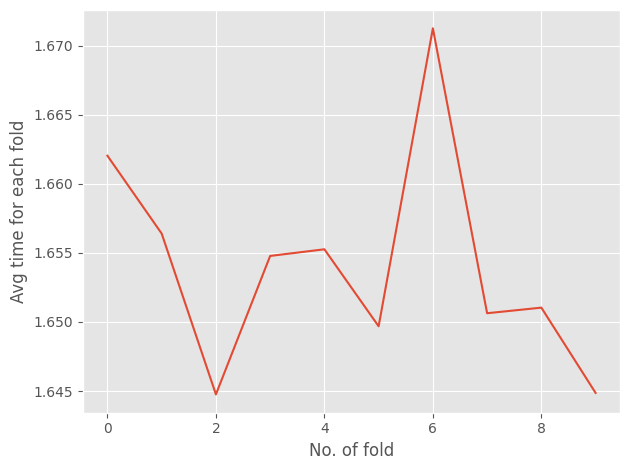

In [267]:
import matplotlib.pyplot as plt

times_mnv2_n = np.zeros((10,100))
for i, row in enumerate(times_mnv2):
    times_mnv2_n[i, :len(row)] = row

times_mnv2_n_n = np.mean(times_mnv2_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_mnv2_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("mnv2 times")
plt.show()

In [268]:
train_acc_mnv2_n = np.zeros((10,100))
for i, row in enumerate(train_acc_mnv2):
    train_acc_mnv2_n[i, :len(row)] = row
    
test_acc_mnv2_n = np.zeros((10,100))
for i, row in enumerate(test_acc_mnv2):
    test_acc_mnv2_n[i, :len(row)] = row
    
train_loss_mnv2_n = np.zeros((10,100))
for i, row in enumerate(train_loss_mnv2):
    train_loss_mnv2_n[i, :len(row)] = row
    
test_loss_mnv2_n = np.zeros((10,100))
for i, row in enumerate(test_loss_mnv2):
    test_loss_mnv2_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_mnv2_n = np.mean(train_acc_mnv2_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_mnv2_n = np.mean(test_acc_mnv2_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_mnv2_n = np.mean(train_loss_mnv2_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_mnv2_n = np.mean(test_loss_mnv2_n,axis=0)

In [269]:
data = [train_acc_mnv2_n,test_acc_mnv2_n,train_loss_mnv2_n,test_loss_mnv2_n]

df = pd.DataFrame(data)
df.to_csv('mnv2_acc', index=False)
df = pd.read_csv('mnv2_acc')

train_acc_mnv2_n = df.iloc[0]
test_acc_mnv2_n = df.iloc[1]
train_loss_mnv2_n = df.iloc[2]
test_loss_mnv2_n = df.iloc[3]


df_t = pd.DataFrame([times_mnv2_n_n])
df_t.to_csv('mnv2_times', index=False)
df_t = pd.read_csv('mnv2_times')

times_mnv2_n_n = df_t.iloc[0]

In [270]:
train_acc_mnv2_n

0     0.430867
1     0.501022
2     0.538062
3     0.558872
4     0.578904
        ...   
95    0.929191
96    0.926124
97    0.927269
98    0.928455
99    0.927800
Name: 0, Length: 100, dtype: float64

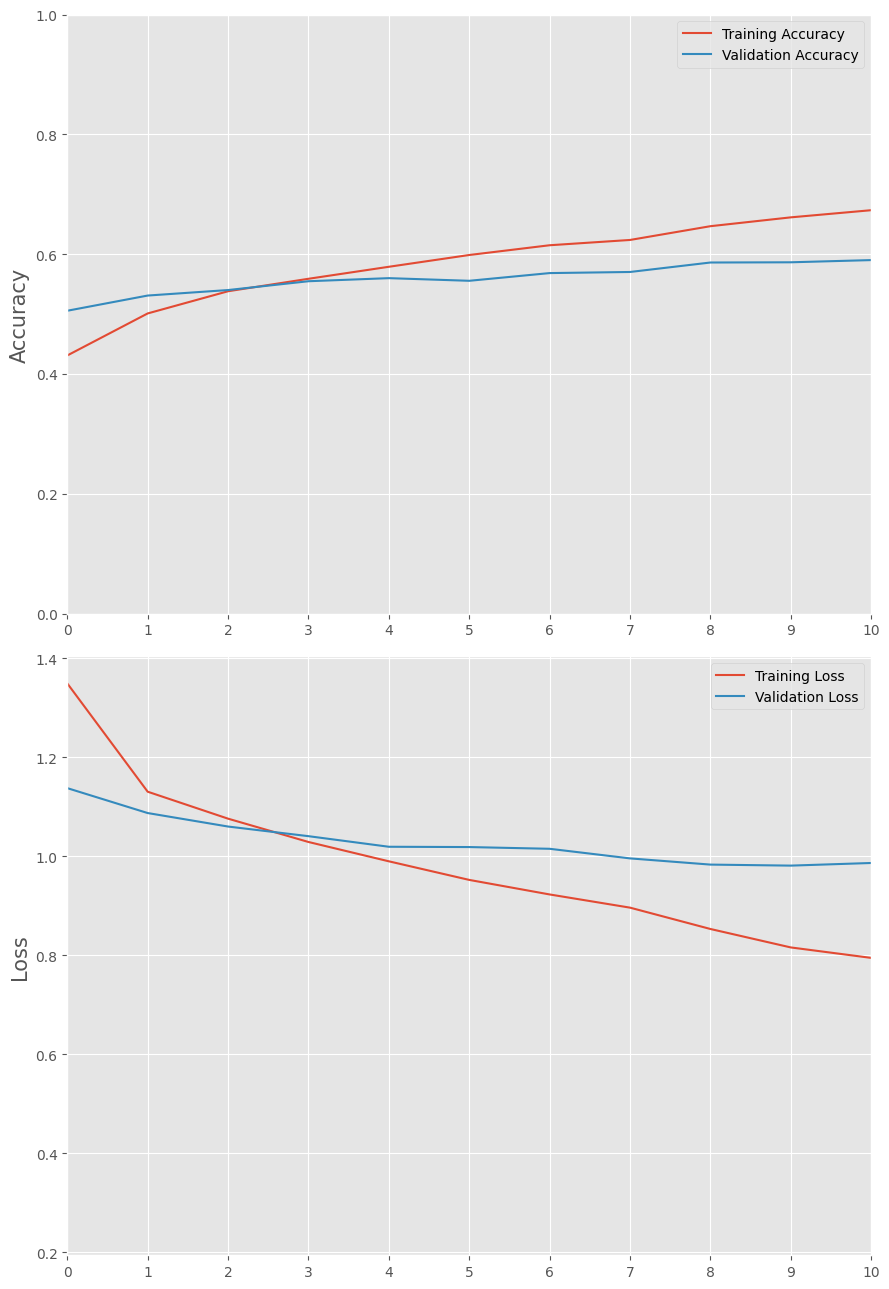

In [271]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_mnv2_n, label='Training Accuracy')
axs[0].plot(test_acc_mnv2_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_mnv2_n, label='Training Loss')
axs[1].plot(test_loss_mnv2_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("mnv2 Training and Testing Loss")
plt.show()

In [272]:
np.array(scores_mnv2).shape

(10, 302, 4)

In [273]:
y_pred_mnv2 = np.argmax(scores_mnv2,axis=2)

In [274]:
y_pred_mnv2.shape

(10, 302)

In [275]:
from sklearn.metrics import accuracy_score
acc_scores_mnv2 = []
for i in range(len(y_test_all_mnv2)):
    acc_scores_mnv2.append(accuracy_score(y_true = y_test_all_mnv2[i],y_pred = y_pred_mnv2[i]))

In [276]:
import gc
gc.collect()

23854

In [277]:
acc_scores_mnv2

[0.6688741721854304,
 0.5927152317880795,
 0.6125827814569537,
 0.5794701986754967,
 0.6324503311258278,
 0.6754966887417219,
 0.6125827814569537,
 0.5960264900662252,
 0.6390728476821192,
 0.6026490066225165]

In [278]:
df_acc = pd.DataFrame([acc_scores_mnv2])

df_acc.to_csv('mnv2_accuracy', index=False)

df_acc = pd.read_csv('mnv2_accuracy')

acc_scores_mnv2 = df_acc.iloc[0].values

In [279]:
y_test_all_n = np.array(y_test_all_mnv2)

y_pred_mnv2_n = y_pred_mnv2.flatten()
y_test_all_n = y_test_all_n.flatten()

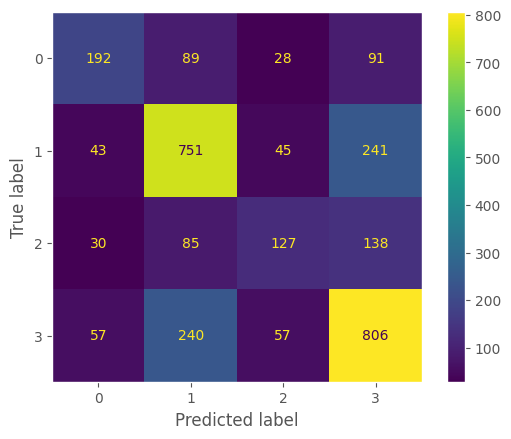

In [280]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_mnv2_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("mnv2")

plt.show()

In [281]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_mnv2_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.60      0.48      0.53       400
           1       0.64      0.70      0.67      1080
           2       0.49      0.33      0.40       380
           3       0.63      0.69      0.66      1160

    accuracy                           0.62      3020
   macro avg       0.59      0.55      0.57      3020
weighted avg       0.61      0.62      0.61      3020



# XceptionV3

In [282]:
import gc
gc.collect()

6127

In [283]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_xv3 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_xv3.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [284]:
import gc
gc.collect()

5

In [285]:
def create_model_xv3():
    
    model_xv3 = tf.keras.models.Sequential([
    tf.keras.applications.Xception(include_top=False, weights='imagenet', input_shape=(X_n.shape[1],X_n.shape[2],X_n.shape[3])),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_xv3.trainable = False
    return model_xv3

In [286]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_xv3 = []
y_test_all_xv3 = []
train_acc_xv3 = []
test_acc_xv3 = []
train_loss_xv3 = []
test_loss_xv3 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_xv3.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_xv3 = None
    model_xv3 = create_model_xv3()
        
    model_xv3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_xv3.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_xv3.predict(X_test)
    
    scores_xv3.append(x)
    train_acc_xv3.append(history.history["accuracy"])
    test_acc_xv3.append(history.history["val_accuracy"])
    train_loss_xv3.append(history.history["loss"])
    test_loss_xv3.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 6s 58ms/step - loss: 1.8603 - accuracy: 0.1357 - val_loss: 1.7458 - val_accuracy: 0.1801 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 4s 51ms/step - loss: 1.8652 - accuracy: 0.1402 - val_loss: 1.7458 - val_accuracy: 0.1801 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 4s 50ms/step - loss: 1.8731 - accuracy: 0.1464 - val_loss: 1.7458 - val_accuracy: 0.1801 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 4s 51ms/step - loss: 1.8503 - accuracy: 0.1308 - val_loss: 1.7458 - val_accuracy: 0.1801 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 4s 51ms/step - loss: 1.8529 - accuracy: 0.1447 - val_loss: 1.7458 - val_accuracy: 0.1801 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 4s 51ms/step - loss: 1.8719 - accuracy: 0.1431 - val_loss: 1.7458 - val_accuracy: 0.1801 - lr: 0.0010
Epoch 7/100
77/77 [==========================

Time taken for epoch 29: 3.99 seconds
77/77 [==============================] - 4s 52ms/step - loss: 1.8552 - accuracy: 0.1419 - val_loss: 1.7458 - val_accuracy: 0.1801 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 4s 52ms/step - loss: 1.8556 - accuracy: 0.1374 - val_loss: 1.7458 - val_accuracy: 0.1801 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 4s 52ms/step - loss: 1.8555 - accuracy: 0.1431 - val_loss: 1.7458 - val_accuracy: 0.1801 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 4s 52ms/step - loss: 1.8585 - accuracy: 0.1427 - val_loss: 1.7458 - val_accuracy: 0.1801 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 4s 52ms/step - loss: 1.8688 - accuracy: 0.1484 - val_loss: 1.7458 - val_accuracy: 0.1801 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 4s 52ms/step - loss: 1.8742 - accuracy: 0.1443 - val_loss: 1.7458 - val_accuracy: 0.1801 - lr: 1.6000e-06
Epoch 35/100
77

Epoch 58/100
77/77 [==============================] - 4s 52ms/step - loss: 1.8650 - accuracy: 0.1345 - val_loss: 1.7458 - val_accuracy: 0.1801 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 4s 52ms/step - loss: 1.8459 - accuracy: 0.1492 - val_loss: 1.7458 - val_accuracy: 0.1801 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 4s 52ms/step - loss: 1.8570 - accuracy: 0.1398 - val_loss: 1.7458 - val_accuracy: 0.1801 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 4s 52ms/step - loss: 1.8756 - accuracy: 0.1415 - val_loss: 1.7458 - val_accuracy: 0.1801 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 4s 52ms/step - loss: 1.8600 - accuracy: 0.1451 - val_loss: 1.7458 - val_accuracy: 0.1801 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 4s 52ms/step - loss: 1.8642 - accuracy: 0.1398 - val_loss: 1.7458 - val_accuracy: 0.1801 - lr: 2.5600e-09
Epoch 64/100
76/77 [====================

Epoch 15/100
76/77 [============================>.] - ETA: 0s - loss: 1.4424 - accuracy: 0.3458
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 3.97 seconds
77/77 [==============================] - 4s 52ms/step - loss: 1.4444 - accuracy: 0.3455 - val_loss: 1.3735 - val_accuracy: 0.3235 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 4s 51ms/step - loss: 1.4400 - accuracy: 0.3389 - val_loss: 1.3735 - val_accuracy: 0.3235 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 4s 52ms/step - loss: 1.4414 - accuracy: 0.3381 - val_loss: 1.3735 - val_accuracy: 0.3235 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 4s 52ms/step - loss: 1.4368 - accuracy: 0.3418 - val_loss: 1.3735 - val_accuracy: 0.3235 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 4s 51ms/step - loss: 1.4297 - accuracy: 0.3483 - val_loss: 1.3735 - val_accuracy: 0.3235 - lr: 4.0000e-05
E

76/77 [============================>.] - ETA: 0s - loss: 1.4482 - accuracy: 0.3503
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 3.97 seconds
77/77 [==============================] - 4s 52ms/step - loss: 1.4482 - accuracy: 0.3496 - val_loss: 1.3735 - val_accuracy: 0.3235 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 4s 52ms/step - loss: 1.4479 - accuracy: 0.3500 - val_loss: 1.3735 - val_accuracy: 0.3235 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 4s 52ms/step - loss: 1.4442 - accuracy: 0.3307 - val_loss: 1.3735 - val_accuracy: 0.3235 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 4s 52ms/step - loss: 1.4484 - accuracy: 0.3508 - val_loss: 1.3735 - val_accuracy: 0.3235 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 4s 51ms/step - loss: 1.4457 - accuracy: 0.3467 - val_loss: 1.3735 - val_accuracy: 0.3235 - lr: 1.0240e-10
Epoch 76/100
7

77/77 [==============================] - 4s 52ms/step - loss: 1.8297 - accuracy: 0.2735 - val_loss: 1.7873 - val_accuracy: 0.3088 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 4s 52ms/step - loss: 1.8292 - accuracy: 0.2764 - val_loss: 1.7873 - val_accuracy: 0.3088 - lr: 8.0000e-06
Epoch 29/100
76/77 [============================>.] - ETA: 0s - loss: 1.8341 - accuracy: 0.2800
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 4.00 seconds
77/77 [==============================] - 4s 52ms/step - loss: 1.8360 - accuracy: 0.2805 - val_loss: 1.7873 - val_accuracy: 0.3088 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 4s 52ms/step - loss: 1.8359 - accuracy: 0.2686 - val_loss: 1.7873 - val_accuracy: 0.3088 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 4s 52ms/step - loss: 1.8301 - accuracy: 0.2756 - val_loss: 1.7873 - val_accuracy: 0.3088 - lr: 1.6000e-06
Epoch 32/100
7

77/77 [==============================] - 4s 51ms/step - loss: 1.8422 - accuracy: 0.2645 - val_loss: 1.7873 - val_accuracy: 0.3088 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 4s 52ms/step - loss: 1.8379 - accuracy: 0.2739 - val_loss: 1.7873 - val_accuracy: 0.3088 - lr: 2.0480e-11
Epoch 85/100
76/77 [============================>.] - ETA: 0s - loss: 1.8313 - accuracy: 0.2714
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 3.97 seconds
77/77 [==============================] - 4s 52ms/step - loss: 1.8312 - accuracy: 0.2715 - val_loss: 1.7873 - val_accuracy: 0.3088 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 4s 52ms/step - loss: 1.8359 - accuracy: 0.2678 - val_loss: 1.7873 - val_accuracy: 0.3088 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 4s 52ms/step - loss: 1.8363 - accuracy: 0.2743 - val_loss: 1.7873 - val_accuracy: 0.3088 - lr: 4.0960e-12
Epoch 88/100
77

77/77 [==============================] - 4s 52ms/step - loss: 1.7891 - accuracy: 0.1578 - val_loss: 1.7167 - val_accuracy: 0.1434 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 4s 52ms/step - loss: 1.7807 - accuracy: 0.1586 - val_loss: 1.7167 - val_accuracy: 0.1434 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 4s 52ms/step - loss: 1.7894 - accuracy: 0.1635 - val_loss: 1.7167 - val_accuracy: 0.1434 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 4s 52ms/step - loss: 1.7969 - accuracy: 0.1529 - val_loss: 1.7167 - val_accuracy: 0.1434 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 1.7889 - accuracy: 0.1533
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 4.02 seconds
77/77 [==============================] - 4s 52ms/step - loss: 1.7889 - accuracy: 0.1533 - val_loss: 1.7167 - val_accuracy: 0.1434 - lr: 3.2000e-07
Epoch 44/100
77

77/77 [==============================] - 4s 52ms/step - loss: 1.7798 - accuracy: 0.1521 - val_loss: 1.7167 - val_accuracy: 0.1434 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 4s 51ms/step - loss: 1.7878 - accuracy: 0.1668 - val_loss: 1.7167 - val_accuracy: 0.1434 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 4s 51ms/step - loss: 1.7881 - accuracy: 0.1578 - val_loss: 1.7167 - val_accuracy: 0.1434 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 4s 51ms/step - loss: 1.7930 - accuracy: 0.1541 - val_loss: 1.7167 - val_accuracy: 0.1434 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 1.7873 - accuracy: 0.1566
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 3.98 seconds
77/77 [==============================] - 4s 52ms/step - loss: 1.7873 - accuracy: 0.1566 - val_loss: 1.7167 - val_accuracy: 0.1434 - lr: 8.1920e-13
Epoch 100/100


77/77 [==============================] - 4s 52ms/step - loss: 2.0630 - accuracy: 0.3868 - val_loss: 2.1376 - val_accuracy: 0.3529 - lr: 1.2800e-08
Epoch 52/100
77/77 [==============================] - 4s 52ms/step - loss: 2.0558 - accuracy: 0.3904 - val_loss: 2.1376 - val_accuracy: 0.3529 - lr: 1.2800e-08
Epoch 53/100
77/77 [==============================] - 4s 52ms/step - loss: 2.0589 - accuracy: 0.3888 - val_loss: 2.1376 - val_accuracy: 0.3529 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 4s 52ms/step - loss: 2.0537 - accuracy: 0.3872 - val_loss: 2.1376 - val_accuracy: 0.3529 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 4s 52ms/step - loss: 2.0620 - accuracy: 0.3868 - val_loss: 2.1376 - val_accuracy: 0.3529 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 4s 52ms/step - loss: 2.0523 - accuracy: 0.3847 - val_loss: 2.1376 - val_accuracy: 0.3529 - lr: 1.2800e-08
Epoch 57/100
76/77 [============================>.] -

77/77 [==============================] - 4s 51ms/step - loss: 1.6939 - accuracy: 0.1975 - val_loss: 1.6350 - val_accuracy: 0.1544 - lr: 0.0010
Epoch 8/100
76/77 [============================>.] - ETA: 0s - loss: 1.7202 - accuracy: 0.1953
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 3.92 seconds
77/77 [==============================] - 4s 51ms/step - loss: 1.7201 - accuracy: 0.1950 - val_loss: 1.6350 - val_accuracy: 0.1544 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 4s 51ms/step - loss: 1.7090 - accuracy: 0.2011 - val_loss: 1.6350 - val_accuracy: 0.1544 - lr: 2.0000e-04
Epoch 10/100
77/77 [==============================] - 4s 52ms/step - loss: 1.7115 - accuracy: 0.1901 - val_loss: 1.6350 - val_accuracy: 0.1544 - lr: 2.0000e-04
Epoch 11/100
77/77 [==============================] - 4s 51ms/step - loss: 1.7300 - accuracy: 0.2065 - val_loss: 1.6350 - val_accuracy: 0.1544 - lr: 2.0000e-04
Epoch 12/100
77/77 [======

77/77 [==============================] - 4s 52ms/step - loss: 1.7136 - accuracy: 0.1913 - val_loss: 1.6350 - val_accuracy: 0.1544 - lr: 2.5600e-09
Epoch 64/100
77/77 [==============================] - ETA: 0s - loss: 1.7094 - accuracy: 0.2024
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 3.95 seconds
77/77 [==============================] - 4s 51ms/step - loss: 1.7094 - accuracy: 0.2024 - val_loss: 1.6350 - val_accuracy: 0.1544 - lr: 2.5600e-09
Epoch 65/100
77/77 [==============================] - 4s 52ms/step - loss: 1.7188 - accuracy: 0.1975 - val_loss: 1.6350 - val_accuracy: 0.1544 - lr: 5.1200e-10
Epoch 66/100
77/77 [==============================] - 4s 52ms/step - loss: 1.7036 - accuracy: 0.2044 - val_loss: 1.6350 - val_accuracy: 0.1544 - lr: 5.1200e-10
Epoch 67/100
77/77 [==============================] - 4s 52ms/step - loss: 1.6928 - accuracy: 0.2110 - val_loss: 1.6350 - val_accuracy: 0.1544 - lr: 5.1200e-10
Epoch 68/100
77/7

77/77 [==============================] - 4s 51ms/step - loss: 1.4317 - accuracy: 0.3275 - val_loss: 1.3492 - val_accuracy: 0.3419 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 4s 51ms/step - loss: 1.4402 - accuracy: 0.3193 - val_loss: 1.3492 - val_accuracy: 0.3419 - lr: 4.0000e-05
Epoch 21/100
77/77 [==============================] - 4s 52ms/step - loss: 1.4322 - accuracy: 0.3258 - val_loss: 1.3492 - val_accuracy: 0.3419 - lr: 4.0000e-05
Epoch 22/100
76/77 [============================>.] - ETA: 0s - loss: 1.4179 - accuracy: 0.3335
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 22: 3.97 seconds
77/77 [==============================] - 4s 52ms/step - loss: 1.4162 - accuracy: 0.3348 - val_loss: 1.3492 - val_accuracy: 0.3419 - lr: 4.0000e-05
Epoch 23/100
77/77 [==============================] - 4s 52ms/step - loss: 1.4222 - accuracy: 0.3307 - val_loss: 1.3492 - val_accuracy: 0.3419 - lr: 8.0000e-06
Epoch 24/100
77

77/77 [==============================] - 4s 52ms/step - loss: 1.4348 - accuracy: 0.3262 - val_loss: 1.3492 - val_accuracy: 0.3419 - lr: 1.0240e-10
Epoch 76/100
77/77 [==============================] - 4s 52ms/step - loss: 1.4308 - accuracy: 0.3324 - val_loss: 1.3492 - val_accuracy: 0.3419 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 4s 52ms/step - loss: 1.4225 - accuracy: 0.3226 - val_loss: 1.3492 - val_accuracy: 0.3419 - lr: 1.0240e-10
Epoch 78/100
76/77 [============================>.] - ETA: 0s - loss: 1.4243 - accuracy: 0.3363
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 78: 3.95 seconds
77/77 [==============================] - 4s 51ms/step - loss: 1.4240 - accuracy: 0.3365 - val_loss: 1.3492 - val_accuracy: 0.3419 - lr: 1.0240e-10
Epoch 79/100
77/77 [==============================] - 4s 51ms/step - loss: 1.4309 - accuracy: 0.3340 - val_loss: 1.3492 - val_accuracy: 0.3419 - lr: 2.0480e-11
Epoch 80/100
7

Epoch 3/100
77/77 [==============================] - 4s 51ms/step - loss: 1.9851 - accuracy: 0.1472 - val_loss: 1.8760 - val_accuracy: 0.1728 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 4s 51ms/step - loss: 1.9716 - accuracy: 0.1415 - val_loss: 1.8760 - val_accuracy: 0.1728 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 4s 51ms/step - loss: 1.9634 - accuracy: 0.1431 - val_loss: 1.8760 - val_accuracy: 0.1728 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 4s 51ms/step - loss: 1.9893 - accuracy: 0.1394 - val_loss: 1.8760 - val_accuracy: 0.1728 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 4s 51ms/step - loss: 1.9987 - accuracy: 0.1431 - val_loss: 1.8760 - val_accuracy: 0.1728 - lr: 0.0010
Epoch 8/100
76/77 [============================>.] - ETA: 0s - loss: 1.9879 - accuracy: 0.1414
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 3.92 seconds
77/77 [=========

77/77 [==============================] - 4s 52ms/step - loss: 2.0083 - accuracy: 0.1357 - val_loss: 1.8760 - val_accuracy: 0.1728 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 4s 52ms/step - loss: 1.9928 - accuracy: 0.1378 - val_loss: 1.8760 - val_accuracy: 0.1728 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 4s 52ms/step - loss: 1.9870 - accuracy: 0.1447 - val_loss: 1.8760 - val_accuracy: 0.1728 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 4s 51ms/step - loss: 1.9826 - accuracy: 0.1374 - val_loss: 1.8760 - val_accuracy: 0.1728 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 4s 52ms/step - loss: 1.9831 - accuracy: 0.1394 - val_loss: 1.8760 - val_accuracy: 0.1728 - lr: 2.5600e-09
Epoch 64/100
76/77 [============================>.] - ETA: 0s - loss: 1.9974 - accuracy: 0.1410
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 3.98 seconds
77/7

Time taken for epoch 15: 3.97 seconds
77/77 [==============================] - 4s 52ms/step - loss: 1.4516 - accuracy: 0.3230 - val_loss: 1.3574 - val_accuracy: 0.3750 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 4s 52ms/step - loss: 1.4469 - accuracy: 0.3295 - val_loss: 1.3574 - val_accuracy: 0.3750 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 4s 51ms/step - loss: 1.4480 - accuracy: 0.3307 - val_loss: 1.3574 - val_accuracy: 0.3750 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 4s 52ms/step - loss: 1.4434 - accuracy: 0.3234 - val_loss: 1.3574 - val_accuracy: 0.3750 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 4s 52ms/step - loss: 1.4404 - accuracy: 0.3283 - val_loss: 1.3574 - val_accuracy: 0.3750 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 4s 51ms/step - loss: 1.4326 - accuracy: 0.3361 - val_loss: 1.3574 - val_accuracy: 0.3750 - lr: 4.0000e-05
Epoch 21/100
77

Epoch 44/100
77/77 [==============================] - 4s 52ms/step - loss: 1.4574 - accuracy: 0.3283 - val_loss: 1.3574 - val_accuracy: 0.3750 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 4s 52ms/step - loss: 1.4426 - accuracy: 0.3250 - val_loss: 1.3574 - val_accuracy: 0.3750 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 4s 52ms/step - loss: 1.4537 - accuracy: 0.3234 - val_loss: 1.3574 - val_accuracy: 0.3750 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 4s 52ms/step - loss: 1.4452 - accuracy: 0.3242 - val_loss: 1.3574 - val_accuracy: 0.3750 - lr: 6.4000e-08
Epoch 48/100
77/77 [==============================] - 4s 52ms/step - loss: 1.4362 - accuracy: 0.3267 - val_loss: 1.3574 - val_accuracy: 0.3750 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 4s 52ms/step - loss: 1.4453 - accuracy: 0.3316 - val_loss: 1.3574 - val_accuracy: 0.3750 - lr: 6.4000e-08
Epoch 50/100
77/77 [====================

10/10 [==============================] - 1s 44ms/step
Training on fold 10/10...
Epoch 1/100
77/77 [==============================] - 6s 58ms/step - loss: 1.5383 - accuracy: 0.2527 - val_loss: 1.4637 - val_accuracy: 0.2353 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 4s 51ms/step - loss: 1.5433 - accuracy: 0.2388 - val_loss: 1.4637 - val_accuracy: 0.2353 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 4s 51ms/step - loss: 1.5645 - accuracy: 0.2453 - val_loss: 1.4637 - val_accuracy: 0.2353 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 4s 51ms/step - loss: 1.5536 - accuracy: 0.2302 - val_loss: 1.4637 - val_accuracy: 0.2353 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 4s 51ms/step - loss: 1.5421 - accuracy: 0.2359 - val_loss: 1.4637 - val_accuracy: 0.2353 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 4s 51ms/step - loss: 1.5371 - accuracy: 0.2621 - val_loss: 1.4637 - val_accuracy: 0.2353 - l

Epoch 29/100
76/77 [============================>.] - ETA: 0s - loss: 1.5220 - accuracy: 0.2558
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 3.93 seconds
77/77 [==============================] - 4s 51ms/step - loss: 1.5212 - accuracy: 0.2563 - val_loss: 1.4637 - val_accuracy: 0.2353 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 4s 51ms/step - loss: 1.5488 - accuracy: 0.2461 - val_loss: 1.4637 - val_accuracy: 0.2353 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 4s 52ms/step - loss: 1.5465 - accuracy: 0.2347 - val_loss: 1.4637 - val_accuracy: 0.2353 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 4s 51ms/step - loss: 1.5492 - accuracy: 0.2453 - val_loss: 1.4637 - val_accuracy: 0.2353 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 4s 51ms/step - loss: 1.5368 - accuracy: 0.2424 - val_loss: 1.4637 - val_accuracy: 0.2353 - lr: 1.6000e-06
E

77/77 [==============================] - ETA: 0s - loss: 1.5498 - accuracy: 0.2408
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 3.95 seconds
77/77 [==============================] - 4s 51ms/step - loss: 1.5498 - accuracy: 0.2408 - val_loss: 1.4637 - val_accuracy: 0.2353 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 4s 52ms/step - loss: 1.5485 - accuracy: 0.2339 - val_loss: 1.4637 - val_accuracy: 0.2353 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 4s 52ms/step - loss: 1.5563 - accuracy: 0.2322 - val_loss: 1.4637 - val_accuracy: 0.2353 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 4s 52ms/step - loss: 1.5502 - accuracy: 0.2379 - val_loss: 1.4637 - val_accuracy: 0.2353 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 4s 51ms/step - loss: 1.5401 - accuracy: 0.2490 - val_loss: 1.4637 - val_accuracy: 0.2353 - lr: 4.0960e-12
Epoch 90/100
77

In [287]:
np.array(y_test_all_xv3).shape

(10, 302)

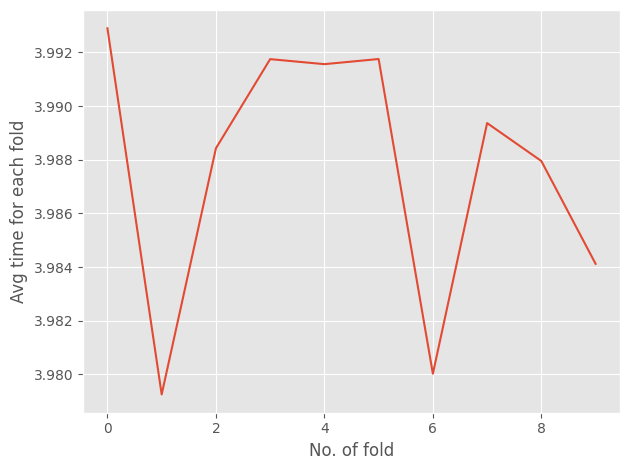

In [288]:
import matplotlib.pyplot as plt

times_xv3_n = np.zeros((10,100))
for i, row in enumerate(times_xv3):
    times_xv3_n[i, :len(row)] = row

times_xv3_n_n = np.mean(times_xv3_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_xv3_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("xv3 times")
plt.show()

In [289]:
train_acc_xv3_n = np.zeros((10,100))
for i, row in enumerate(train_acc_xv3):
    train_acc_xv3_n[i, :len(row)] = row
    
test_acc_xv3_n = np.zeros((10,100))
for i, row in enumerate(test_acc_xv3):
    test_acc_xv3_n[i, :len(row)] = row
    
train_loss_xv3_n = np.zeros((10,100))
for i, row in enumerate(train_loss_xv3):
    train_loss_xv3_n[i, :len(row)] = row
    
test_loss_xv3_n = np.zeros((10,100))
for i, row in enumerate(test_loss_xv3):
    test_loss_xv3_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_xv3_n = np.mean(train_acc_xv3_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_xv3_n = np.mean(test_acc_xv3_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_xv3_n = np.mean(train_loss_xv3_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_xv3_n = np.mean(test_loss_xv3_n,axis=0)

In [290]:
import gc
gc.collect()

3386

In [291]:
data = [train_acc_xv3_n,test_acc_xv3_n,train_loss_xv3_n,test_loss_xv3_n]

df = pd.DataFrame(data)
df.to_csv('xv3_acc', index=False)
df = pd.read_csv('xv3_acc')

train_acc_xv3_n = df.iloc[0]
test_acc_xv3_n = df.iloc[1]
train_loss_xv3_n = df.iloc[2]
test_loss_xv3_n = df.iloc[3]


df_t = pd.DataFrame([times_xv3_n_n])
df_t.to_csv('xv3_times', index=False)
df_t = pd.read_csv('xv3_times')

times_xv3_n_n = df_t.iloc[0]

In [292]:
train_acc_xv3_n

0     0.251717
1     0.250859
2     0.256419
3     0.250327
4     0.251799
        ...   
95    0.255601
96    0.255151
97    0.253434
98    0.249469
99    0.251676
Name: 0, Length: 100, dtype: float64

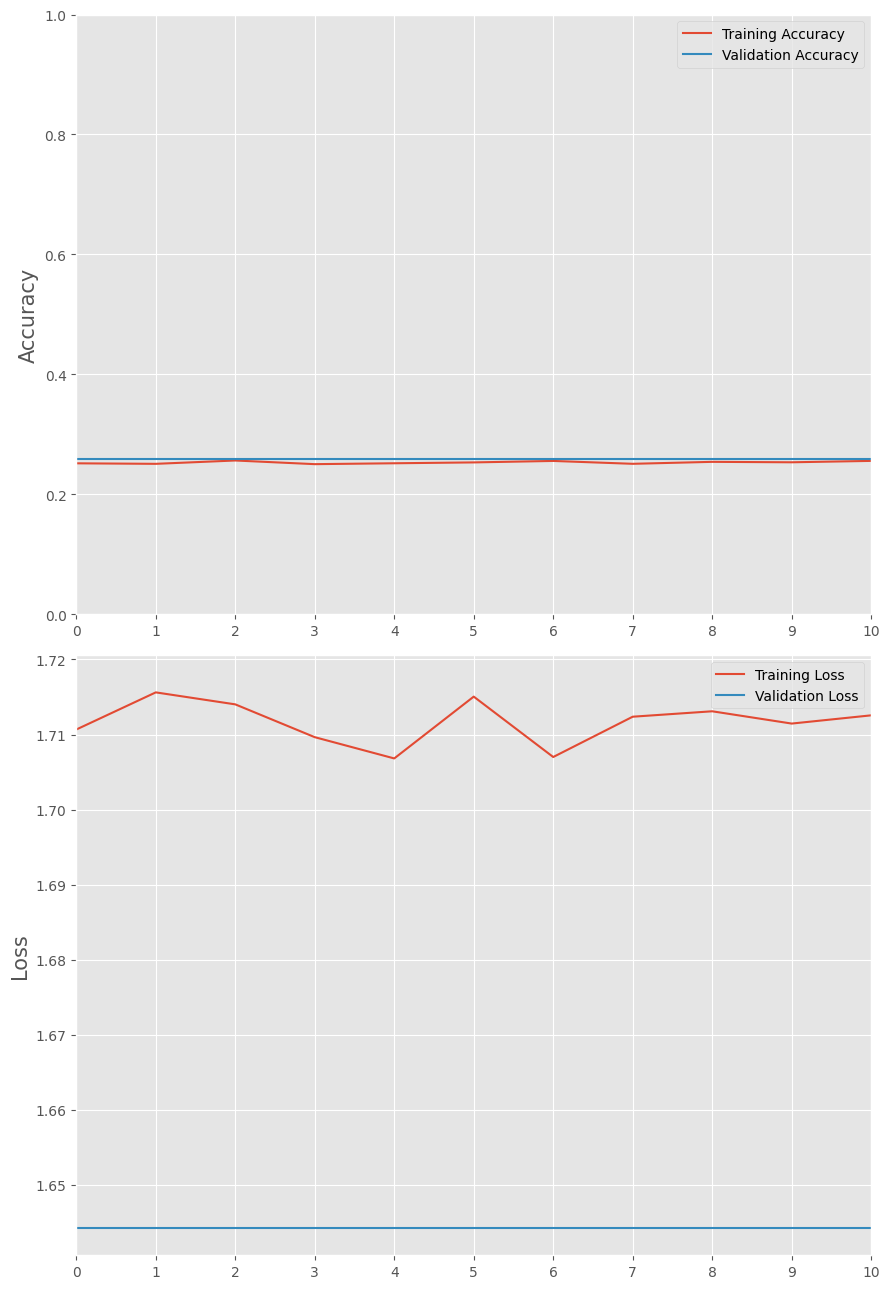

In [293]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_xv3_n, label='Training Accuracy')
axs[0].plot(test_acc_xv3_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_xv3_n, label='Training Loss')
axs[1].plot(test_loss_xv3_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("xv3 Training and Testing Loss")
plt.show()

In [294]:
np.array(scores_xv3).shape

(10, 302, 4)

In [295]:
y_pred_xv3 = np.argmax(scores_xv3,axis=2)

In [296]:
y_pred_xv3.shape

(10, 302)

In [297]:
from sklearn.metrics import accuracy_score
acc_scores_xv3 = []
for i in range(len(y_test_all_xv3)):
    acc_scores_xv3.append(accuracy_score(y_true = y_test_all_xv3[i],y_pred = y_pred_xv3[i]))

In [298]:
import gc
gc.collect()

23904

In [299]:
acc_scores_xv3

[0.11920529801324503,
 0.3543046357615894,
 0.2814569536423841,
 0.13245033112582782,
 0.38741721854304634,
 0.18211920529801323,
 0.304635761589404,
 0.1291390728476821,
 0.3543046357615894,
 0.24834437086092714]

In [300]:
df_acc = pd.DataFrame([acc_scores_xv3])

df_acc.to_csv('xv3_accuracy', index=False)

df_acc = pd.read_csv('xv3_accuracy')

acc_scores_xv3 = df_acc.iloc[0].values

In [301]:
y_test_all_n = np.array(y_test_all_xv3)

y_pred_xv3_n = y_pred_xv3.flatten()
y_test_all_n = y_test_all_n.flatten()

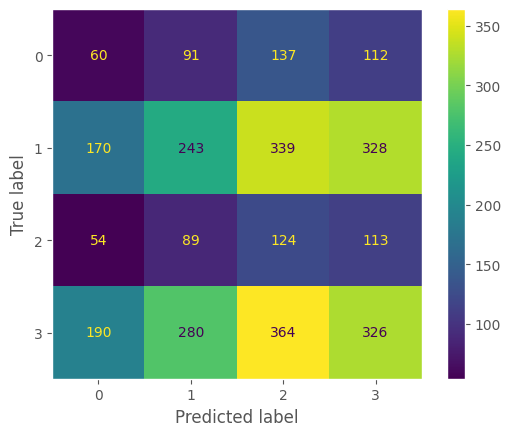

In [302]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_xv3_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("xv3")
plt.show()

In [303]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_xv3_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.13      0.15      0.14       400
           1       0.35      0.23      0.27      1080
           2       0.13      0.33      0.18       380
           3       0.37      0.28      0.32      1160

    accuracy                           0.25      3020
   macro avg       0.24      0.25      0.23      3020
weighted avg       0.30      0.25      0.26      3020



# EfficientNetV2L

In [304]:
import gc
gc.collect()

6421

In [305]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_env2l = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_env2l.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [306]:
def create_model_env2l():
    
    model_env2l = tf.keras.models.Sequential([
    tf.keras.applications.EfficientNetV2L(include_top=False, weights='imagenet', input_shape=(X_n.shape[1],X_n.shape[2],X_n.shape[3])),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_env2l.trainable = False
    return model_env2l

In [307]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_env2l = []
y_test_all_env2l = []
train_acc_env2l = []
test_acc_env2l = []
train_loss_env2l = []
test_loss_env2l = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_env2l.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_env2l = None
    model_env2l = create_model_env2l()
        
    model_env2l.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_env2l.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_env2l.predict(X_test)
    
    scores_env2l.append(x)
    train_acc_env2l.append(history.history["accuracy"])
    test_acc_env2l.append(history.history["val_accuracy"])
    train_loss_env2l.append(history.history["loss"])
    test_loss_env2l.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 30s 235ms/step - loss: 1.3914 - accuracy: 0.2551 - val_loss: 1.3889 - val_accuracy: 0.2243 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 15s 196ms/step - loss: 1.3941 - accuracy: 0.2527 - val_loss: 1.3889 - val_accuracy: 0.2243 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 15s 197ms/step - loss: 1.3897 - accuracy: 0.2522 - val_loss: 1.3889 - val_accuracy: 0.2243 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 15s 196ms/step - loss: 1.3894 - accuracy: 0.2637 - val_loss: 1.3889 - val_accuracy: 0.2243 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 15s 195ms/step - loss: 1.3912 - accuracy: 0.2490 - val_loss: 1.3889 - val_accuracy: 0.2243 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 15s 197ms/step - loss: 1.3926 - accuracy: 0.2596 - val_loss: 1.3889 - val_accuracy: 0.2243 - lr: 0.0010
Epoch 7/100
77/77 [==============

Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.3907 - accuracy: 0.2674
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 15.22 seconds
77/77 [==============================] - 15s 198ms/step - loss: 1.3907 - accuracy: 0.2674 - val_loss: 1.3889 - val_accuracy: 0.2243 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 15s 197ms/step - loss: 1.3940 - accuracy: 0.2567 - val_loss: 1.3889 - val_accuracy: 0.2243 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 15s 197ms/step - loss: 1.3881 - accuracy: 0.2547 - val_loss: 1.3889 - val_accuracy: 0.2243 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 15s 195ms/step - loss: 1.3915 - accuracy: 0.2572 - val_loss: 1.3889 - val_accuracy: 0.2243 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 15s 196ms/step - loss: 1.3929 - accuracy: 0.2469 - val_loss: 1.3889 - val_accuracy: 0.2243 - lr: 2

Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.3865 - accuracy: 0.2604
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 15.12 seconds
77/77 [==============================] - 15s 197ms/step - loss: 1.3865 - accuracy: 0.2604 - val_loss: 1.3889 - val_accuracy: 0.2243 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 15s 198ms/step - loss: 1.3918 - accuracy: 0.2612 - val_loss: 1.3889 - val_accuracy: 0.2243 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 15s 197ms/step - loss: 1.3956 - accuracy: 0.2482 - val_loss: 1.3889 - val_accuracy: 0.2243 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 15s 194ms/step - loss: 1.3944 - accuracy: 0.2383 - val_loss: 1.3889 - val_accuracy: 0.2243 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 15s 194ms/step - loss: 1.3912 - accuracy: 0.2469 - val_loss: 1.3889 - val_accuracy: 0.2243 - lr: 4.

Epoch 13/100
77/77 [==============================] - 15s 195ms/step - loss: 1.3441 - accuracy: 0.3459 - val_loss: 1.3153 - val_accuracy: 0.3750 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 15s 195ms/step - loss: 1.3425 - accuracy: 0.3352 - val_loss: 1.3153 - val_accuracy: 0.3750 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 1.3379 - accuracy: 0.3332
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 15.04 seconds
77/77 [==============================] - 15s 196ms/step - loss: 1.3379 - accuracy: 0.3332 - val_loss: 1.3153 - val_accuracy: 0.3750 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 15s 197ms/step - loss: 1.3432 - accuracy: 0.3271 - val_loss: 1.3153 - val_accuracy: 0.3750 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 15s 197ms/step - loss: 1.3384 - accuracy: 0.3434 - val_loss: 1.3153 - val_accuracy: 0.3750 - lr: 4

Epoch 41/100
77/77 [==============================] - 15s 197ms/step - loss: 1.3401 - accuracy: 0.3471 - val_loss: 1.3153 - val_accuracy: 0.3750 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 15s 198ms/step - loss: 1.3396 - accuracy: 0.3410 - val_loss: 1.3153 - val_accuracy: 0.3750 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 1.3370 - accuracy: 0.3581
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 15.16 seconds
77/77 [==============================] - 15s 197ms/step - loss: 1.3370 - accuracy: 0.3581 - val_loss: 1.3153 - val_accuracy: 0.3750 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 15s 197ms/step - loss: 1.3396 - accuracy: 0.3471 - val_loss: 1.3153 - val_accuracy: 0.3750 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 15s 196ms/step - loss: 1.3345 - accuracy: 0.3545 - val_loss: 1.3153 - val_accuracy: 0.3750 - lr: 6.

Epoch 69/100
77/77 [==============================] - 15s 195ms/step - loss: 1.3390 - accuracy: 0.3316 - val_loss: 1.3153 - val_accuracy: 0.3750 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 15s 195ms/step - loss: 1.3398 - accuracy: 0.3344 - val_loss: 1.3153 - val_accuracy: 0.3750 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - ETA: 0s - loss: 1.3409 - accuracy: 0.3418
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 15.15 seconds
77/77 [==============================] - 15s 197ms/step - loss: 1.3409 - accuracy: 0.3418 - val_loss: 1.3153 - val_accuracy: 0.3750 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 15s 198ms/step - loss: 1.3399 - accuracy: 0.3393 - val_loss: 1.3153 - val_accuracy: 0.3750 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 15s 197ms/step - loss: 1.3374 - accuracy: 0.3471 - val_loss: 1.3153 - val_accuracy: 0.3750 - lr: 1

Epoch 97/100
77/77 [==============================] - 15s 197ms/step - loss: 1.3414 - accuracy: 0.3426 - val_loss: 1.3153 - val_accuracy: 0.3750 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 15s 197ms/step - loss: 1.3401 - accuracy: 0.3357 - val_loss: 1.3153 - val_accuracy: 0.3750 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 1.3447 - accuracy: 0.3369
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 15.15 seconds
77/77 [==============================] - 15s 197ms/step - loss: 1.3447 - accuracy: 0.3369 - val_loss: 1.3153 - val_accuracy: 0.3750 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 4s 160ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 30s 233ms/step - loss: 1.3421 - accuracy: 0.3303 - val_loss: 1.3438 - val_accuracy: 0.3088 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 15s 196ms/

Epoch 25/100
77/77 [==============================] - 15s 196ms/step - loss: 1.3442 - accuracy: 0.3279 - val_loss: 1.3438 - val_accuracy: 0.3088 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 15s 196ms/step - loss: 1.3458 - accuracy: 0.3123 - val_loss: 1.3438 - val_accuracy: 0.3088 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 15s 198ms/step - loss: 1.3412 - accuracy: 0.3369 - val_loss: 1.3438 - val_accuracy: 0.3088 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 15s 195ms/step - loss: 1.3468 - accuracy: 0.3234 - val_loss: 1.3438 - val_accuracy: 0.3088 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - ETA: 0s - loss: 1.3402 - accuracy: 0.3238
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 15.07 seconds
77/77 [==============================] - 15s 196ms/step - loss: 1.3402 - accuracy: 0.3238 - val_loss: 1.3438 - val_accuracy: 0.3088 - lr: 8

Epoch 53/100
77/77 [==============================] - 15s 197ms/step - loss: 1.3429 - accuracy: 0.3209 - val_loss: 1.3438 - val_accuracy: 0.3088 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 15s 195ms/step - loss: 1.3446 - accuracy: 0.3283 - val_loss: 1.3438 - val_accuracy: 0.3088 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 15s 194ms/step - loss: 1.3475 - accuracy: 0.3123 - val_loss: 1.3438 - val_accuracy: 0.3088 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 15s 196ms/step - loss: 1.3420 - accuracy: 0.3340 - val_loss: 1.3438 - val_accuracy: 0.3088 - lr: 1.2800e-08
Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.3393 - accuracy: 0.3307
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 15.16 seconds
77/77 [==============================] - 15s 197ms/step - loss: 1.3393 - accuracy: 0.3307 - val_loss: 1.3438 - val_accuracy: 0.3088 - lr: 1

Epoch 81/100
77/77 [==============================] - 15s 196ms/step - loss: 1.3438 - accuracy: 0.3275 - val_loss: 1.3438 - val_accuracy: 0.3088 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 15s 196ms/step - loss: 1.3471 - accuracy: 0.3173 - val_loss: 1.3438 - val_accuracy: 0.3088 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 15s 196ms/step - loss: 1.3434 - accuracy: 0.3189 - val_loss: 1.3438 - val_accuracy: 0.3088 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 15s 196ms/step - loss: 1.3386 - accuracy: 0.3279 - val_loss: 1.3438 - val_accuracy: 0.3088 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.3429 - accuracy: 0.3144
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 15.22 seconds
77/77 [==============================] - 15s 198ms/step - loss: 1.3429 - accuracy: 0.3144 - val_loss: 1.3438 - val_accuracy: 0.3088 - lr: 2.

Epoch 9/100
77/77 [==============================] - 15s 194ms/step - loss: 1.4413 - accuracy: 0.1770 - val_loss: 1.4600 - val_accuracy: 0.1324 - lr: 2.0000e-04
Epoch 10/100
77/77 [==============================] - 15s 197ms/step - loss: 1.4429 - accuracy: 0.1868 - val_loss: 1.4600 - val_accuracy: 0.1324 - lr: 2.0000e-04
Epoch 11/100
77/77 [==============================] - 15s 196ms/step - loss: 1.4424 - accuracy: 0.1848 - val_loss: 1.4600 - val_accuracy: 0.1324 - lr: 2.0000e-04
Epoch 12/100
77/77 [==============================] - 15s 197ms/step - loss: 1.4414 - accuracy: 0.1966 - val_loss: 1.4600 - val_accuracy: 0.1324 - lr: 2.0000e-04
Epoch 13/100
77/77 [==============================] - 15s 197ms/step - loss: 1.4444 - accuracy: 0.1807 - val_loss: 1.4600 - val_accuracy: 0.1324 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 15s 197ms/step - loss: 1.4374 - accuracy: 0.1897 - val_loss: 1.4600 - val_accuracy: 0.1324 - lr: 2.0000e-04
Epoch 15/100
77/77 [=========

Epoch 37/100
77/77 [==============================] - 15s 197ms/step - loss: 1.4419 - accuracy: 0.1868 - val_loss: 1.4600 - val_accuracy: 0.1324 - lr: 3.2000e-07
Epoch 38/100
77/77 [==============================] - 15s 197ms/step - loss: 1.4416 - accuracy: 0.1836 - val_loss: 1.4600 - val_accuracy: 0.1324 - lr: 3.2000e-07
Epoch 39/100
77/77 [==============================] - 15s 196ms/step - loss: 1.4430 - accuracy: 0.1909 - val_loss: 1.4600 - val_accuracy: 0.1324 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 15s 195ms/step - loss: 1.4396 - accuracy: 0.1926 - val_loss: 1.4600 - val_accuracy: 0.1324 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 15s 195ms/step - loss: 1.4459 - accuracy: 0.1926 - val_loss: 1.4600 - val_accuracy: 0.1324 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 15s 196ms/step - loss: 1.4445 - accuracy: 0.1815 - val_loss: 1.4600 - val_accuracy: 0.1324 - lr: 3.2000e-07
Epoch 43/100
77/77 [========

Epoch 65/100
77/77 [==============================] - 15s 195ms/step - loss: 1.4408 - accuracy: 0.1819 - val_loss: 1.4600 - val_accuracy: 0.1324 - lr: 5.1200e-10
Epoch 66/100
77/77 [==============================] - 15s 197ms/step - loss: 1.4432 - accuracy: 0.1848 - val_loss: 1.4600 - val_accuracy: 0.1324 - lr: 5.1200e-10
Epoch 67/100
77/77 [==============================] - 15s 197ms/step - loss: 1.4437 - accuracy: 0.1844 - val_loss: 1.4600 - val_accuracy: 0.1324 - lr: 5.1200e-10
Epoch 68/100
77/77 [==============================] - 15s 196ms/step - loss: 1.4405 - accuracy: 0.1966 - val_loss: 1.4600 - val_accuracy: 0.1324 - lr: 5.1200e-10
Epoch 69/100
77/77 [==============================] - 15s 196ms/step - loss: 1.4392 - accuracy: 0.1934 - val_loss: 1.4600 - val_accuracy: 0.1324 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 15s 196ms/step - loss: 1.4422 - accuracy: 0.1872 - val_loss: 1.4600 - val_accuracy: 0.1324 - lr: 5.1200e-10
Epoch 71/100
77/77 [========

Epoch 93/100
77/77 [==============================] - 15s 197ms/step - loss: 1.4422 - accuracy: 0.1868 - val_loss: 1.4600 - val_accuracy: 0.1324 - lr: 8.1920e-13
Epoch 94/100
77/77 [==============================] - 15s 196ms/step - loss: 1.4465 - accuracy: 0.1733 - val_loss: 1.4600 - val_accuracy: 0.1324 - lr: 8.1920e-13
Epoch 95/100
77/77 [==============================] - 15s 195ms/step - loss: 1.4465 - accuracy: 0.1877 - val_loss: 1.4600 - val_accuracy: 0.1324 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 15s 194ms/step - loss: 1.4451 - accuracy: 0.1770 - val_loss: 1.4600 - val_accuracy: 0.1324 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 15s 195ms/step - loss: 1.4429 - accuracy: 0.1881 - val_loss: 1.4600 - val_accuracy: 0.1324 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 15s 196ms/step - loss: 1.4417 - accuracy: 0.1897 - val_loss: 1.4600 - val_accuracy: 0.1324 - lr: 8.1920e-13
Epoch 99/100
77/77 [========

77/77 [==============================] - 15s 197ms/step - loss: 1.4648 - accuracy: 0.1554 - val_loss: 1.4569 - val_accuracy: 0.1140 - lr: 4.0000e-05
Epoch 22/100
77/77 [==============================] - ETA: 0s - loss: 1.4594 - accuracy: 0.1635
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 22: 15.25 seconds
77/77 [==============================] - 15s 198ms/step - loss: 1.4594 - accuracy: 0.1635 - val_loss: 1.4569 - val_accuracy: 0.1140 - lr: 4.0000e-05
Epoch 23/100
77/77 [==============================] - 15s 198ms/step - loss: 1.4603 - accuracy: 0.1554 - val_loss: 1.4569 - val_accuracy: 0.1140 - lr: 8.0000e-06
Epoch 24/100
77/77 [==============================] - 15s 197ms/step - loss: 1.4594 - accuracy: 0.1545 - val_loss: 1.4569 - val_accuracy: 0.1140 - lr: 8.0000e-06
Epoch 25/100
77/77 [==============================] - 15s 195ms/step - loss: 1.4636 - accuracy: 0.1513 - val_loss: 1.4569 - val_accuracy: 0.1140 - lr: 8.0000e-06
Epoc

Epoch 49/100
77/77 [==============================] - 15s 195ms/step - loss: 1.4617 - accuracy: 0.1566 - val_loss: 1.4569 - val_accuracy: 0.1140 - lr: 6.4000e-08
Epoch 50/100
77/77 [==============================] - ETA: 0s - loss: 1.4625 - accuracy: 0.1529
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 50: 14.95 seconds
77/77 [==============================] - 15s 194ms/step - loss: 1.4625 - accuracy: 0.1529 - val_loss: 1.4569 - val_accuracy: 0.1140 - lr: 6.4000e-08
Epoch 51/100
77/77 [==============================] - 15s 197ms/step - loss: 1.4653 - accuracy: 0.1554 - val_loss: 1.4569 - val_accuracy: 0.1140 - lr: 1.2800e-08
Epoch 52/100
77/77 [==============================] - 15s 198ms/step - loss: 1.4581 - accuracy: 0.1619 - val_loss: 1.4569 - val_accuracy: 0.1140 - lr: 1.2800e-08
Epoch 53/100
77/77 [==============================] - 15s 197ms/step - loss: 1.4617 - accuracy: 0.1578 - val_loss: 1.4569 - val_accuracy: 0.1140 - lr: 1

Epoch 77/100
77/77 [==============================] - 15s 197ms/step - loss: 1.4653 - accuracy: 0.1529 - val_loss: 1.4569 - val_accuracy: 0.1140 - lr: 1.0240e-10
Epoch 78/100
77/77 [==============================] - ETA: 0s - loss: 1.4596 - accuracy: 0.1558
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 78: 15.14 seconds
77/77 [==============================] - 15s 197ms/step - loss: 1.4596 - accuracy: 0.1558 - val_loss: 1.4569 - val_accuracy: 0.1140 - lr: 1.0240e-10
Epoch 79/100
77/77 [==============================] - 15s 197ms/step - loss: 1.4621 - accuracy: 0.1627 - val_loss: 1.4569 - val_accuracy: 0.1140 - lr: 2.0480e-11
Epoch 80/100
77/77 [==============================] - 15s 196ms/step - loss: 1.4615 - accuracy: 0.1451 - val_loss: 1.4569 - val_accuracy: 0.1140 - lr: 2.0480e-11
Epoch 81/100
77/77 [==============================] - 15s 195ms/step - loss: 1.4637 - accuracy: 0.1509 - val_loss: 1.4569 - val_accuracy: 0.1140 - lr: 2

Epoch 5/100
77/77 [==============================] - 15s 197ms/step - loss: 1.5473 - accuracy: 0.1394 - val_loss: 1.5656 - val_accuracy: 0.1213 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 15s 197ms/step - loss: 1.5478 - accuracy: 0.1398 - val_loss: 1.5656 - val_accuracy: 0.1213 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 15s 197ms/step - loss: 1.5513 - accuracy: 0.1390 - val_loss: 1.5656 - val_accuracy: 0.1213 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - ETA: 0s - loss: 1.5520 - accuracy: 0.1472
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 15.09 seconds
77/77 [==============================] - 15s 196ms/step - loss: 1.5520 - accuracy: 0.1472 - val_loss: 1.5656 - val_accuracy: 0.1213 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 15s 198ms/step - loss: 1.5565 - accuracy: 0.1296 - val_loss: 1.5656 - val_accuracy: 0.1213 - lr: 2.0000e-04
Epoch 10/100


Epoch 33/100
77/77 [==============================] - 15s 197ms/step - loss: 1.5523 - accuracy: 0.1410 - val_loss: 1.5656 - val_accuracy: 0.1213 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 15s 195ms/step - loss: 1.5541 - accuracy: 0.1329 - val_loss: 1.5656 - val_accuracy: 0.1213 - lr: 1.6000e-06
Epoch 35/100
77/77 [==============================] - 15s 195ms/step - loss: 1.5513 - accuracy: 0.1410 - val_loss: 1.5656 - val_accuracy: 0.1213 - lr: 1.6000e-06
Epoch 36/100
77/77 [==============================] - ETA: 0s - loss: 1.5526 - accuracy: 0.1427
Epoch 36: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 36: 15.24 seconds
77/77 [==============================] - 15s 198ms/step - loss: 1.5526 - accuracy: 0.1427 - val_loss: 1.5656 - val_accuracy: 0.1213 - lr: 1.6000e-06
Epoch 37/100
77/77 [==============================] - 15s 197ms/step - loss: 1.5522 - accuracy: 0.1374 - val_loss: 1.5656 - val_accuracy: 0.1213 - lr: 3.

Epoch 61/100
77/77 [==============================] - 15s 197ms/step - loss: 1.5477 - accuracy: 0.1509 - val_loss: 1.5656 - val_accuracy: 0.1213 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 15s 198ms/step - loss: 1.5511 - accuracy: 0.1423 - val_loss: 1.5656 - val_accuracy: 0.1213 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 15s 197ms/step - loss: 1.5532 - accuracy: 0.1419 - val_loss: 1.5656 - val_accuracy: 0.1213 - lr: 2.5600e-09
Epoch 64/100
77/77 [==============================] - ETA: 0s - loss: 1.5469 - accuracy: 0.1406
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 15.21 seconds
77/77 [==============================] - 15s 198ms/step - loss: 1.5469 - accuracy: 0.1406 - val_loss: 1.5656 - val_accuracy: 0.1213 - lr: 2.5600e-09
Epoch 65/100
77/77 [==============================] - 15s 196ms/step - loss: 1.5493 - accuracy: 0.1460 - val_loss: 1.5656 - val_accuracy: 0.1213 - lr: 5.12

Epoch 89/100
77/77 [==============================] - 15s 195ms/step - loss: 1.5538 - accuracy: 0.1410 - val_loss: 1.5656 - val_accuracy: 0.1213 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 15s 195ms/step - loss: 1.5496 - accuracy: 0.1415 - val_loss: 1.5656 - val_accuracy: 0.1213 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 15s 197ms/step - loss: 1.5502 - accuracy: 0.1386 - val_loss: 1.5656 - val_accuracy: 0.1213 - lr: 4.0960e-12
Epoch 92/100
77/77 [==============================] - ETA: 0s - loss: 1.5411 - accuracy: 0.1521
Epoch 92: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 92: 15.14 seconds
77/77 [==============================] - 15s 197ms/step - loss: 1.5411 - accuracy: 0.1521 - val_loss: 1.5656 - val_accuracy: 0.1213 - lr: 4.0960e-12
Epoch 93/100
77/77 [==============================] - 15s 197ms/step - loss: 1.5503 - accuracy: 0.1378 - val_loss: 1.5656 - val_accuracy: 0.1213 - lr: 8.

Epoch 17/100
77/77 [==============================] - 15s 198ms/step - loss: 1.3834 - accuracy: 0.3512 - val_loss: 1.3944 - val_accuracy: 0.3456 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 15s 198ms/step - loss: 1.3743 - accuracy: 0.3545 - val_loss: 1.3944 - val_accuracy: 0.3456 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 15s 196ms/step - loss: 1.3782 - accuracy: 0.3532 - val_loss: 1.3944 - val_accuracy: 0.3456 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 15s 196ms/step - loss: 1.3786 - accuracy: 0.3553 - val_loss: 1.3944 - val_accuracy: 0.3456 - lr: 4.0000e-05
Epoch 21/100
77/77 [==============================] - 15s 198ms/step - loss: 1.3783 - accuracy: 0.3614 - val_loss: 1.3944 - val_accuracy: 0.3456 - lr: 4.0000e-05
Epoch 22/100
77/77 [==============================] - ETA: 0s - loss: 1.3769 - accuracy: 0.3594
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for ep

Epoch 45/100
77/77 [==============================] - 15s 197ms/step - loss: 1.3839 - accuracy: 0.3540 - val_loss: 1.3944 - val_accuracy: 0.3456 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 15s 199ms/step - loss: 1.3734 - accuracy: 0.3569 - val_loss: 1.3944 - val_accuracy: 0.3456 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 15s 198ms/step - loss: 1.3784 - accuracy: 0.3561 - val_loss: 1.3944 - val_accuracy: 0.3456 - lr: 6.4000e-08
Epoch 48/100
77/77 [==============================] - 15s 197ms/step - loss: 1.3735 - accuracy: 0.3500 - val_loss: 1.3944 - val_accuracy: 0.3456 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 15s 197ms/step - loss: 1.3803 - accuracy: 0.3496 - val_loss: 1.3944 - val_accuracy: 0.3456 - lr: 6.4000e-08
Epoch 50/100
77/77 [==============================] - ETA: 0s - loss: 1.3771 - accuracy: 0.3549
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for e

Epoch 73/100
77/77 [==============================] - 15s 198ms/step - loss: 1.3807 - accuracy: 0.3606 - val_loss: 1.3944 - val_accuracy: 0.3456 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 15s 195ms/step - loss: 1.3781 - accuracy: 0.3598 - val_loss: 1.3944 - val_accuracy: 0.3456 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 15s 195ms/step - loss: 1.3764 - accuracy: 0.3626 - val_loss: 1.3944 - val_accuracy: 0.3456 - lr: 1.0240e-10
Epoch 76/100
77/77 [==============================] - 15s 198ms/step - loss: 1.3763 - accuracy: 0.3598 - val_loss: 1.3944 - val_accuracy: 0.3456 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 15s 198ms/step - loss: 1.3813 - accuracy: 0.3545 - val_loss: 1.3944 - val_accuracy: 0.3456 - lr: 1.0240e-10
Epoch 78/100
77/77 [==============================] - ETA: 0s - loss: 1.3806 - accuracy: 0.3610
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for e

10/10 [==============================] - 4s 162ms/step
Training on fold 8/10...
Epoch 1/100
77/77 [==============================] - 36s 261ms/step - loss: 1.4215 - accuracy: 0.2482 - val_loss: 1.4503 - val_accuracy: 0.2169 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 15s 197ms/step - loss: 1.4254 - accuracy: 0.2441 - val_loss: 1.4503 - val_accuracy: 0.2169 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 15s 195ms/step - loss: 1.4193 - accuracy: 0.2518 - val_loss: 1.4503 - val_accuracy: 0.2169 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 15s 194ms/step - loss: 1.4258 - accuracy: 0.2498 - val_loss: 1.4503 - val_accuracy: 0.2169 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 15s 198ms/step - loss: 1.4192 - accuracy: 0.2600 - val_loss: 1.4503 - val_accuracy: 0.2169 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 15s 198ms/step - loss: 1.4182 - accuracy: 0.2506 - val_loss: 1.4503 - val_accuracy

77/77 [==============================] - ETA: 0s - loss: 1.4207 - accuracy: 0.2543
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 15.15 seconds
77/77 [==============================] - 15s 197ms/step - loss: 1.4207 - accuracy: 0.2543 - val_loss: 1.4503 - val_accuracy: 0.2169 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 15s 197ms/step - loss: 1.4157 - accuracy: 0.2584 - val_loss: 1.4503 - val_accuracy: 0.2169 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 15s 198ms/step - loss: 1.4214 - accuracy: 0.2592 - val_loss: 1.4503 - val_accuracy: 0.2169 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 15s 198ms/step - loss: 1.4217 - accuracy: 0.2604 - val_loss: 1.4503 - val_accuracy: 0.2169 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 15s 197ms/step - loss: 1.4253 - accuracy: 0.2559 - val_loss: 1.4503 - val_accuracy: 0.2169 - lr: 1.6000e-06
Epo

Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.4187 - accuracy: 0.2572
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 15.17 seconds
77/77 [==============================] - 15s 197ms/step - loss: 1.4187 - accuracy: 0.2572 - val_loss: 1.4503 - val_accuracy: 0.2169 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 15s 197ms/step - loss: 1.4220 - accuracy: 0.2473 - val_loss: 1.4503 - val_accuracy: 0.2169 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 15s 194ms/step - loss: 1.4222 - accuracy: 0.2514 - val_loss: 1.4503 - val_accuracy: 0.2169 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 15s 196ms/step - loss: 1.4190 - accuracy: 0.2600 - val_loss: 1.4503 - val_accuracy: 0.2169 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 15s 198ms/step - loss: 1.4179 - accuracy: 0.2490 - val_loss: 1.4503 - val_accuracy: 0.2169 - lr: 2

Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.4263 - accuracy: 0.2379
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 15.26 seconds
77/77 [==============================] - 15s 198ms/step - loss: 1.4263 - accuracy: 0.2379 - val_loss: 1.4503 - val_accuracy: 0.2169 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 15s 198ms/step - loss: 1.4157 - accuracy: 0.2657 - val_loss: 1.4503 - val_accuracy: 0.2169 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 15s 198ms/step - loss: 1.4187 - accuracy: 0.2584 - val_loss: 1.4503 - val_accuracy: 0.2169 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 15s 198ms/step - loss: 1.4201 - accuracy: 0.2592 - val_loss: 1.4503 - val_accuracy: 0.2169 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 15s 197ms/step - loss: 1.4216 - accuracy: 0.2600 - val_loss: 1.4503 - val_accuracy: 0.2169 - lr: 4.

Epoch 13/100
77/77 [==============================] - 15s 196ms/step - loss: 1.4788 - accuracy: 0.1766 - val_loss: 1.4387 - val_accuracy: 0.1801 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 15s 198ms/step - loss: 1.4720 - accuracy: 0.1848 - val_loss: 1.4387 - val_accuracy: 0.1801 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 1.4726 - accuracy: 0.1783
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 15.25 seconds
77/77 [==============================] - 15s 198ms/step - loss: 1.4726 - accuracy: 0.1783 - val_loss: 1.4387 - val_accuracy: 0.1801 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 15s 198ms/step - loss: 1.4742 - accuracy: 0.1762 - val_loss: 1.4387 - val_accuracy: 0.1801 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 15s 198ms/step - loss: 1.4729 - accuracy: 0.1758 - val_loss: 1.4387 - val_accuracy: 0.1801 - lr: 4

Epoch 41/100
77/77 [==============================] - 15s 198ms/step - loss: 1.4729 - accuracy: 0.1811 - val_loss: 1.4387 - val_accuracy: 0.1801 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 15s 198ms/step - loss: 1.4716 - accuracy: 0.1901 - val_loss: 1.4387 - val_accuracy: 0.1801 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 1.4755 - accuracy: 0.1889
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 15.11 seconds
77/77 [==============================] - 15s 196ms/step - loss: 1.4755 - accuracy: 0.1889 - val_loss: 1.4387 - val_accuracy: 0.1801 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 15s 196ms/step - loss: 1.4703 - accuracy: 0.1827 - val_loss: 1.4387 - val_accuracy: 0.1801 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 15s 197ms/step - loss: 1.4803 - accuracy: 0.1770 - val_loss: 1.4387 - val_accuracy: 0.1801 - lr: 6.

Epoch 69/100
77/77 [==============================] - 15s 198ms/step - loss: 1.4768 - accuracy: 0.1778 - val_loss: 1.4387 - val_accuracy: 0.1801 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 15s 199ms/step - loss: 1.4739 - accuracy: 0.1926 - val_loss: 1.4387 - val_accuracy: 0.1801 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - ETA: 0s - loss: 1.4736 - accuracy: 0.1885
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 15.24 seconds
77/77 [==============================] - 15s 198ms/step - loss: 1.4736 - accuracy: 0.1885 - val_loss: 1.4387 - val_accuracy: 0.1801 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 15s 198ms/step - loss: 1.4766 - accuracy: 0.1917 - val_loss: 1.4387 - val_accuracy: 0.1801 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 15s 197ms/step - loss: 1.4654 - accuracy: 0.2028 - val_loss: 1.4387 - val_accuracy: 0.1801 - lr: 1

Epoch 97/100
77/77 [==============================] - 15s 199ms/step - loss: 1.4754 - accuracy: 0.1733 - val_loss: 1.4387 - val_accuracy: 0.1801 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 15s 196ms/step - loss: 1.4712 - accuracy: 0.1819 - val_loss: 1.4387 - val_accuracy: 0.1801 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 1.4663 - accuracy: 0.1934
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 15.15 seconds
77/77 [==============================] - 15s 197ms/step - loss: 1.4663 - accuracy: 0.1934 - val_loss: 1.4387 - val_accuracy: 0.1801 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 4s 160ms/step
Training on fold 10/10...
Epoch 1/100
77/77 [==============================] - 32s 263ms/step - loss: 1.5377 - accuracy: 0.1517 - val_loss: 1.5466 - val_accuracy: 0.1397 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 15s 198ms

Epoch 25/100
77/77 [==============================] - 15s 199ms/step - loss: 1.5397 - accuracy: 0.1484 - val_loss: 1.5466 - val_accuracy: 0.1397 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 15s 198ms/step - loss: 1.5370 - accuracy: 0.1447 - val_loss: 1.5466 - val_accuracy: 0.1397 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 15s 199ms/step - loss: 1.5384 - accuracy: 0.1447 - val_loss: 1.5466 - val_accuracy: 0.1397 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 15s 196ms/step - loss: 1.5396 - accuracy: 0.1488 - val_loss: 1.5466 - val_accuracy: 0.1397 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - ETA: 0s - loss: 1.5397 - accuracy: 0.1398
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 15.10 seconds
77/77 [==============================] - 15s 196ms/step - loss: 1.5397 - accuracy: 0.1398 - val_loss: 1.5466 - val_accuracy: 0.1397 - lr: 8

Epoch 53/100
77/77 [==============================] - 15s 198ms/step - loss: 1.5420 - accuracy: 0.1398 - val_loss: 1.5466 - val_accuracy: 0.1397 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 15s 198ms/step - loss: 1.5411 - accuracy: 0.1431 - val_loss: 1.5466 - val_accuracy: 0.1397 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 15s 199ms/step - loss: 1.5386 - accuracy: 0.1533 - val_loss: 1.5466 - val_accuracy: 0.1397 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 15s 200ms/step - loss: 1.5397 - accuracy: 0.1460 - val_loss: 1.5466 - val_accuracy: 0.1397 - lr: 1.2800e-08
Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.5357 - accuracy: 0.1586
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 15.30 seconds
77/77 [==============================] - 15s 199ms/step - loss: 1.5357 - accuracy: 0.1586 - val_loss: 1.5466 - val_accuracy: 0.1397 - lr: 1

Epoch 81/100
77/77 [==============================] - 15s 197ms/step - loss: 1.5407 - accuracy: 0.1484 - val_loss: 1.5466 - val_accuracy: 0.1397 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 15s 197ms/step - loss: 1.5393 - accuracy: 0.1415 - val_loss: 1.5466 - val_accuracy: 0.1397 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 15s 195ms/step - loss: 1.5380 - accuracy: 0.1464 - val_loss: 1.5466 - val_accuracy: 0.1397 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 15s 196ms/step - loss: 1.5383 - accuracy: 0.1435 - val_loss: 1.5466 - val_accuracy: 0.1397 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.5384 - accuracy: 0.1545
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 15.08 seconds
77/77 [==============================] - 15s 196ms/step - loss: 1.5384 - accuracy: 0.1545 - val_loss: 1.5466 - val_accuracy: 0.1397 - lr: 2.

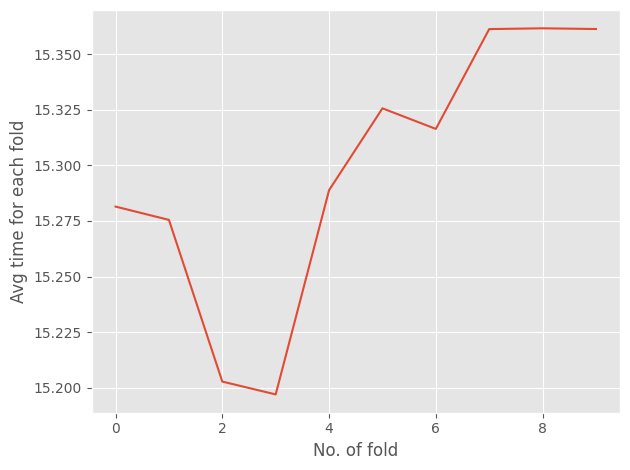

In [308]:
import matplotlib.pyplot as plt

times_env2l_n = np.zeros((10,100))
for i, row in enumerate(times_env2l):
    times_env2l_n[i, :len(row)] = row

times_env2l_n_n = np.mean(times_env2l_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_env2l_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("env2l times")
plt.show()

In [309]:
train_acc_env2l_n = np.zeros((10,100))
for i, row in enumerate(train_acc_env2l):
    train_acc_env2l_n[i, :len(row)] = row
    
test_acc_env2l_n = np.zeros((10,100))
for i, row in enumerate(test_acc_env2l):
    test_acc_env2l_n[i, :len(row)] = row
    
train_loss_env2l_n = np.zeros((10,100))
for i, row in enumerate(train_loss_env2l):
    train_loss_env2l_n[i, :len(row)] = row
    
test_loss_env2l_n = np.zeros((10,100))
for i, row in enumerate(test_loss_env2l):
    test_loss_env2l_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_env2l_n = np.mean(train_acc_env2l_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_env2l_n = np.mean(test_acc_env2l_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_env2l_n = np.mean(train_loss_env2l_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_env2l_n = np.mean(test_loss_env2l_n,axis=0)

In [310]:
data = [train_acc_env2l_n,test_acc_env2l_n,train_loss_env2l_n,test_loss_env2l_n]

df = pd.DataFrame(data)
df.to_csv('env2l_acc', index=False)
df = pd.read_csv('env2l_acc')

train_acc_env2l_n = df.iloc[0]
test_acc_env2l_n = df.iloc[1]
train_loss_env2l_n = df.iloc[2]
test_loss_env2l_n = df.iloc[3]


df_t = pd.DataFrame([times_env2l_n_n])
df_t.to_csv('env2l_times', index=False)
df_t = pd.read_csv('env2l_times')

times_env2l_n_n = df_t.iloc[0]

In [311]:
train_acc_env2l_n

0     0.235854
1     0.231971
2     0.235364
3     0.233647
4     0.235650
        ...   
95    0.231766
96    0.234056
97    0.235282
98    0.233688
99    0.233279
Name: 0, Length: 100, dtype: float64

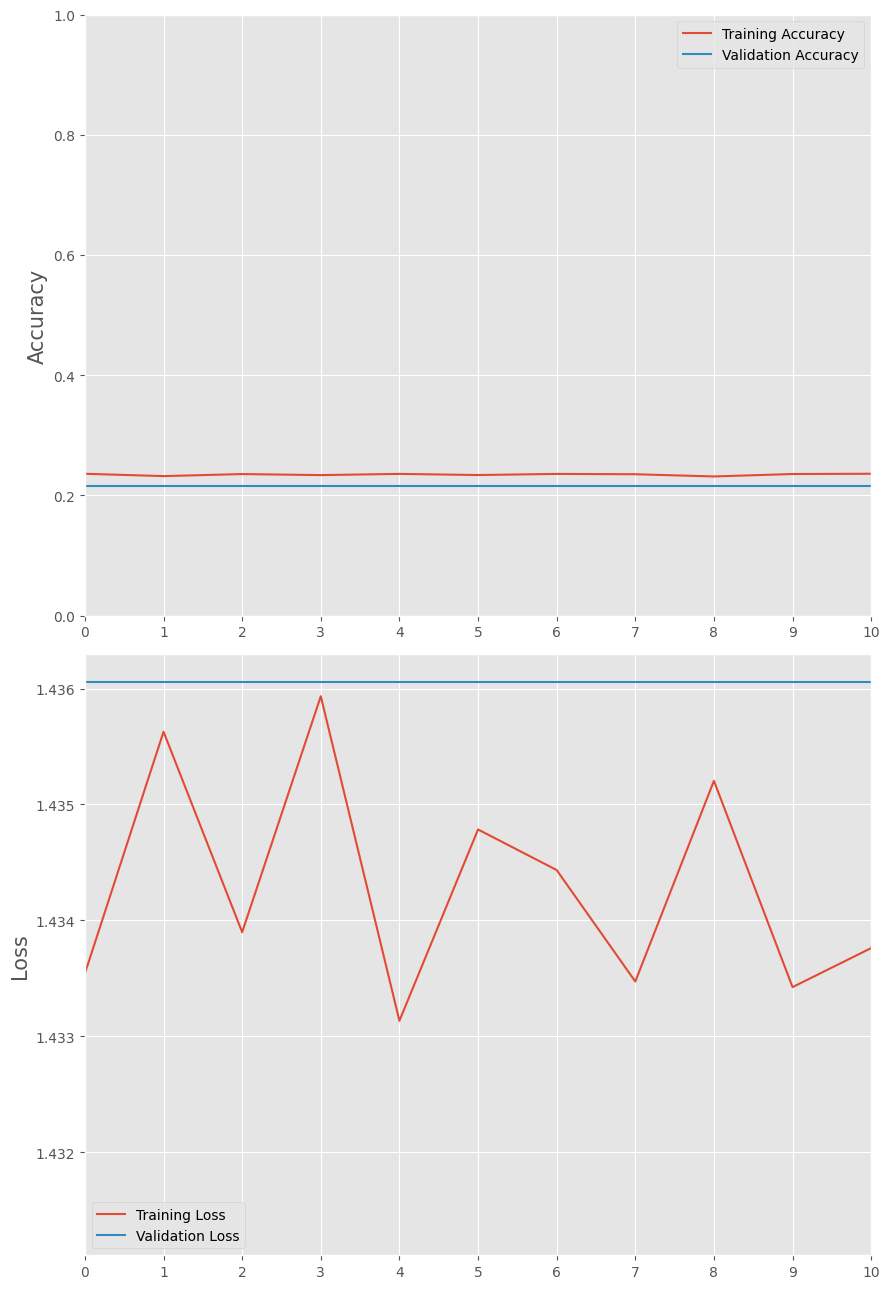

In [312]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_env2l_n, label='Training Accuracy')
axs[0].plot(test_acc_env2l_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_env2l_n, label='Training Loss')
axs[1].plot(test_loss_env2l_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("env2l Training and Testing Loss")
plt.show()

In [313]:
np.array(scores_env2l).shape

(10, 302, 4)

In [314]:
y_pred_env2l = np.argmax(scores_env2l,axis=2)

In [315]:
y_pred_env2l.shape

(10, 302)

In [316]:
from sklearn.metrics import accuracy_score
acc_scores_env2l = []
for i in range(len(y_test_all_env2l)):
    acc_scores_env2l.append(accuracy_score(y_true = y_test_all_env2l[i],y_pred = y_pred_env2l[i]))

In [317]:
import gc
gc.collect()

23950

In [318]:
acc_scores_env2l

[0.25496688741721857,
 0.37748344370860926,
 0.31788079470198677,
 0.12251655629139073,
 0.1423841059602649,
 0.16556291390728478,
 0.3675496688741722,
 0.24834437086092714,
 0.1423841059602649,
 0.1357615894039735]

In [319]:
df_acc = pd.DataFrame([acc_scores_env2l])

df_acc.to_csv('env2l_accuracy', index=False)

df_acc = pd.read_csv('env2l_accuracy')

acc_scores_env2l = df_acc.iloc[0].values

In [320]:
y_test_all_n = np.array(y_test_all_env2l)

y_pred_env2l_n = y_pred_env2l.flatten()
y_test_all_n = y_test_all_n.flatten()

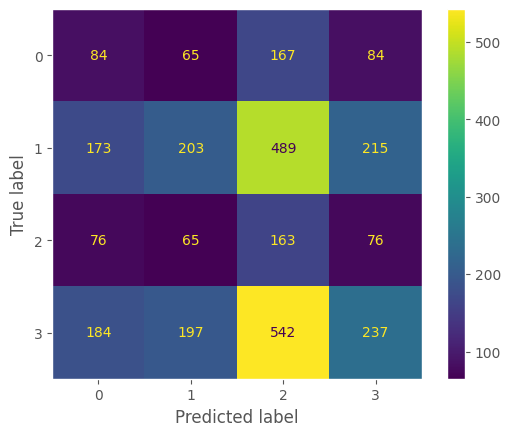

In [321]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_env2l_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("env2l")

plt.show()

In [322]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_env2l_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.16      0.21      0.18       400
           1       0.38      0.19      0.25      1080
           2       0.12      0.43      0.19       380
           3       0.39      0.20      0.27      1160

    accuracy                           0.23      3020
   macro avg       0.26      0.26      0.22      3020
weighted avg       0.32      0.23      0.24      3020



# NasNetLarge

In [323]:
import gc
gc.collect()

6220

In [324]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_nnl = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_nnl.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [325]:
import gc
gc.collect()

5

In [326]:
def create_model_nnl():
    
    model_nnl = tf.keras.models.Sequential([
    tf.keras.applications.NASNetLarge(include_top=False, weights='imagenet', input_shape=(X_n.shape[1],X_n.shape[2],X_n.shape[3])),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_nnl.trainable = False
    return model_nnl

In [327]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_nnl = []
y_test_all_nnl = []
train_acc_nnl = []
test_acc_nnl = []
train_loss_nnl = []
test_loss_nnl = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_nnl.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_nnl = None
    model_nnl = create_model_nnl()
        
    model_nnl.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_nnl.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_nnl.predict(X_test)
    
    scores_nnl.append(x)
    train_acc_nnl.append(history.history["accuracy"])
    test_acc_nnl.append(history.history["val_accuracy"])
    train_loss_nnl.append(history.history["loss"])
    test_loss_nnl.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 27s 249ms/step - loss: 1.7451 - accuracy: 0.2784 - val_loss: 1.5658 - val_accuracy: 0.2904 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 15s 194ms/step - loss: 1.7570 - accuracy: 0.2956 - val_loss: 1.5658 - val_accuracy: 0.2904 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 15s 194ms/step - loss: 1.7481 - accuracy: 0.2829 - val_loss: 1.5658 - val_accuracy: 0.2904 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 15s 194ms/step - loss: 1.7481 - accuracy: 0.2833 - val_loss: 1.5658 - val_accuracy: 0.2904 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 15s 192ms/step - loss: 1.7579 - accuracy: 0.2768 - val_loss: 1.5658 - val_accuracy: 0.2904 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 15s 193ms/step - loss: 1.7390 - accuracy: 0.2919 - val_loss: 1.5658 - val_accuracy: 0.2904 - lr: 0.0010
Epoch 7/100
77/77 [==============

Epoch 68/100
77/77 [==============================] - 15s 198ms/step - loss: 1.6260 - accuracy: 0.1930 - val_loss: 1.5715 - val_accuracy: 0.1324 - lr: 5.1200e-10
Epoch 69/100
77/77 [==============================] - 15s 197ms/step - loss: 1.6182 - accuracy: 0.1885 - val_loss: 1.5715 - val_accuracy: 0.1324 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 15s 197ms/step - loss: 1.6247 - accuracy: 0.1938 - val_loss: 1.5715 - val_accuracy: 0.1324 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - ETA: 0s - loss: 1.6301 - accuracy: 0.1966
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 15.21 seconds
77/77 [==============================] - 15s 198ms/step - loss: 1.6301 - accuracy: 0.1966 - val_loss: 1.5715 - val_accuracy: 0.1324 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 15s 196ms/step - loss: 1.6219 - accuracy: 0.1954 - val_loss: 1.5715 - val_accuracy: 0.1324 - lr: 1

Epoch 96/100
77/77 [==============================] - 15s 197ms/step - loss: 1.6139 - accuracy: 0.1934 - val_loss: 1.5715 - val_accuracy: 0.1324 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 15s 196ms/step - loss: 1.6345 - accuracy: 0.1987 - val_loss: 1.5715 - val_accuracy: 0.1324 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 15s 198ms/step - loss: 1.6144 - accuracy: 0.1954 - val_loss: 1.5715 - val_accuracy: 0.1324 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 1.6135 - accuracy: 0.1975
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 15.15 seconds
77/77 [==============================] - 15s 197ms/step - loss: 1.6135 - accuracy: 0.1975 - val_loss: 1.5715 - val_accuracy: 0.1324 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 4s 172ms/step
Training on fold 4/10...
Epoch 1/100
77/77 [==============================] - 28s 2

Epoch 24/100
77/77 [==============================] - 15s 198ms/step - loss: 1.3645 - accuracy: 0.3888 - val_loss: 1.2615 - val_accuracy: 0.4301 - lr: 8.0000e-06
Epoch 25/100
77/77 [==============================] - 15s 198ms/step - loss: 1.3628 - accuracy: 0.3647 - val_loss: 1.2615 - val_accuracy: 0.4301 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 15s 196ms/step - loss: 1.3698 - accuracy: 0.3729 - val_loss: 1.2615 - val_accuracy: 0.4301 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 15s 197ms/step - loss: 1.3781 - accuracy: 0.3659 - val_loss: 1.2615 - val_accuracy: 0.4301 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 15s 198ms/step - loss: 1.3567 - accuracy: 0.3745 - val_loss: 1.2615 - val_accuracy: 0.4301 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - ETA: 0s - loss: 1.3664 - accuracy: 0.3724
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for e

Epoch 52/100
77/77 [==============================] - 15s 199ms/step - loss: 1.3869 - accuracy: 0.3594 - val_loss: 1.2615 - val_accuracy: 0.4301 - lr: 1.2800e-08
Epoch 53/100
77/77 [==============================] - 15s 198ms/step - loss: 1.3801 - accuracy: 0.3626 - val_loss: 1.2615 - val_accuracy: 0.4301 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 15s 198ms/step - loss: 1.3748 - accuracy: 0.3635 - val_loss: 1.2615 - val_accuracy: 0.4301 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 15s 198ms/step - loss: 1.3903 - accuracy: 0.3581 - val_loss: 1.2615 - val_accuracy: 0.4301 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 15s 198ms/step - loss: 1.3681 - accuracy: 0.3700 - val_loss: 1.2615 - val_accuracy: 0.4301 - lr: 1.2800e-08
Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.3792 - accuracy: 0.3696
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for e

Epoch 80/100
77/77 [==============================] - 15s 198ms/step - loss: 1.3699 - accuracy: 0.3782 - val_loss: 1.2615 - val_accuracy: 0.4301 - lr: 2.0480e-11
Epoch 81/100
77/77 [==============================] - 15s 196ms/step - loss: 1.3830 - accuracy: 0.3708 - val_loss: 1.2615 - val_accuracy: 0.4301 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 15s 196ms/step - loss: 1.3628 - accuracy: 0.3630 - val_loss: 1.2615 - val_accuracy: 0.4301 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 15s 197ms/step - loss: 1.3800 - accuracy: 0.3614 - val_loss: 1.2615 - val_accuracy: 0.4301 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 15s 198ms/step - loss: 1.3742 - accuracy: 0.3733 - val_loss: 1.2615 - val_accuracy: 0.4301 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.3766 - accuracy: 0.3659
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for ep

Epoch 8/100
77/77 [==============================] - ETA: 0s - loss: 1.3748 - accuracy: 0.3528
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 15.28 seconds
77/77 [==============================] - 15s 199ms/step - loss: 1.3748 - accuracy: 0.3528 - val_loss: 1.2816 - val_accuracy: 0.4191 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 15s 197ms/step - loss: 1.3724 - accuracy: 0.3512 - val_loss: 1.2816 - val_accuracy: 0.4191 - lr: 2.0000e-04
Epoch 10/100
77/77 [==============================] - 15s 197ms/step - loss: 1.3693 - accuracy: 0.3647 - val_loss: 1.2816 - val_accuracy: 0.4191 - lr: 2.0000e-04
Epoch 11/100
77/77 [==============================] - 15s 197ms/step - loss: 1.3634 - accuracy: 0.3675 - val_loss: 1.2816 - val_accuracy: 0.4191 - lr: 2.0000e-04
Epoch 12/100
77/77 [==============================] - 15s 197ms/step - loss: 1.3643 - accuracy: 0.3598 - val_loss: 1.2816 - val_accuracy: 0.4191 - lr: 2.0000e-0

Epoch 36/100
77/77 [==============================] - ETA: 0s - loss: 1.3775 - accuracy: 0.3381
Epoch 36: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 36: 15.18 seconds
77/77 [==============================] - 15s 197ms/step - loss: 1.3775 - accuracy: 0.3381 - val_loss: 1.2816 - val_accuracy: 0.4191 - lr: 1.6000e-06
Epoch 37/100
77/77 [==============================] - 15s 199ms/step - loss: 1.3773 - accuracy: 0.3487 - val_loss: 1.2816 - val_accuracy: 0.4191 - lr: 3.2000e-07
Epoch 38/100
77/77 [==============================] - 15s 198ms/step - loss: 1.3682 - accuracy: 0.3496 - val_loss: 1.2816 - val_accuracy: 0.4191 - lr: 3.2000e-07
Epoch 39/100
77/77 [==============================] - 15s 198ms/step - loss: 1.3875 - accuracy: 0.3442 - val_loss: 1.2816 - val_accuracy: 0.4191 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 15s 198ms/step - loss: 1.3585 - accuracy: 0.3614 - val_loss: 1.2816 - val_accuracy: 0.4191 - lr: 3.

Epoch 64/100
77/77 [==============================] - ETA: 0s - loss: 1.3778 - accuracy: 0.3410
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 15.17 seconds
77/77 [==============================] - 15s 197ms/step - loss: 1.3778 - accuracy: 0.3410 - val_loss: 1.2816 - val_accuracy: 0.4191 - lr: 2.5600e-09
Epoch 65/100
77/77 [==============================] - 15s 197ms/step - loss: 1.3812 - accuracy: 0.3508 - val_loss: 1.2816 - val_accuracy: 0.4191 - lr: 5.1200e-10
Epoch 66/100
77/77 [==============================] - 15s 197ms/step - loss: 1.3707 - accuracy: 0.3581 - val_loss: 1.2816 - val_accuracy: 0.4191 - lr: 5.1200e-10
Epoch 67/100
77/77 [==============================] - 15s 197ms/step - loss: 1.3651 - accuracy: 0.3573 - val_loss: 1.2816 - val_accuracy: 0.4191 - lr: 5.1200e-10
Epoch 68/100
77/77 [==============================] - 15s 197ms/step - loss: 1.3672 - accuracy: 0.3610 - val_loss: 1.2816 - val_accuracy: 0.4191 - lr: 5.12

Epoch 92/100
77/77 [==============================] - ETA: 0s - loss: 1.3661 - accuracy: 0.3426
Epoch 92: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 92: 15.12 seconds
77/77 [==============================] - 15s 197ms/step - loss: 1.3661 - accuracy: 0.3426 - val_loss: 1.2816 - val_accuracy: 0.4191 - lr: 4.0960e-12
Epoch 93/100
77/77 [==============================] - 15s 197ms/step - loss: 1.3648 - accuracy: 0.3491 - val_loss: 1.2816 - val_accuracy: 0.4191 - lr: 8.1920e-13
Epoch 94/100
77/77 [==============================] - 15s 198ms/step - loss: 1.3780 - accuracy: 0.3467 - val_loss: 1.2816 - val_accuracy: 0.4191 - lr: 8.1920e-13
Epoch 95/100
77/77 [==============================] - 15s 198ms/step - loss: 1.3784 - accuracy: 0.3446 - val_loss: 1.2816 - val_accuracy: 0.4191 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 15s 197ms/step - loss: 1.3560 - accuracy: 0.3606 - val_loss: 1.2816 - val_accuracy: 0.4191 - lr: 8.

Epoch 20/100
77/77 [==============================] - 15s 197ms/step - loss: 2.1065 - accuracy: 0.1513 - val_loss: 2.0206 - val_accuracy: 0.1103 - lr: 4.0000e-05
Epoch 21/100
77/77 [==============================] - 15s 197ms/step - loss: 2.1204 - accuracy: 0.1406 - val_loss: 2.0206 - val_accuracy: 0.1103 - lr: 4.0000e-05
Epoch 22/100
77/77 [==============================] - ETA: 0s - loss: 2.1279 - accuracy: 0.1455
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 22: 15.22 seconds
77/77 [==============================] - 15s 198ms/step - loss: 2.1279 - accuracy: 0.1455 - val_loss: 2.0206 - val_accuracy: 0.1103 - lr: 4.0000e-05
Epoch 23/100
77/77 [==============================] - 15s 199ms/step - loss: 2.1094 - accuracy: 0.1431 - val_loss: 2.0206 - val_accuracy: 0.1103 - lr: 8.0000e-06
Epoch 24/100
77/77 [==============================] - 15s 198ms/step - loss: 2.1348 - accuracy: 0.1410 - val_loss: 2.0206 - val_accuracy: 0.1103 - lr: 8.

Epoch 48/100
77/77 [==============================] - 15s 199ms/step - loss: 2.1284 - accuracy: 0.1431 - val_loss: 2.0206 - val_accuracy: 0.1103 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 15s 198ms/step - loss: 2.1242 - accuracy: 0.1410 - val_loss: 2.0206 - val_accuracy: 0.1103 - lr: 6.4000e-08
Epoch 50/100
77/77 [==============================] - ETA: 0s - loss: 2.1240 - accuracy: 0.1419
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 50: 15.15 seconds
77/77 [==============================] - 15s 197ms/step - loss: 2.1240 - accuracy: 0.1419 - val_loss: 2.0206 - val_accuracy: 0.1103 - lr: 6.4000e-08
Epoch 51/100
77/77 [==============================] - 15s 196ms/step - loss: 2.1359 - accuracy: 0.1419 - val_loss: 2.0206 - val_accuracy: 0.1103 - lr: 1.2800e-08
Epoch 52/100
77/77 [==============================] - 15s 196ms/step - loss: 2.1059 - accuracy: 0.1509 - val_loss: 2.0206 - val_accuracy: 0.1103 - lr: 1

Epoch 76/100
77/77 [==============================] - 15s 196ms/step - loss: 2.1155 - accuracy: 0.1382 - val_loss: 2.0206 - val_accuracy: 0.1103 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 15s 198ms/step - loss: 2.1346 - accuracy: 0.1431 - val_loss: 2.0206 - val_accuracy: 0.1103 - lr: 1.0240e-10
Epoch 78/100
77/77 [==============================] - ETA: 0s - loss: 2.1295 - accuracy: 0.1386
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 78: 15.20 seconds
77/77 [==============================] - 15s 198ms/step - loss: 2.1295 - accuracy: 0.1386 - val_loss: 2.0206 - val_accuracy: 0.1103 - lr: 1.0240e-10
Epoch 79/100
77/77 [==============================] - 15s 198ms/step - loss: 2.1232 - accuracy: 0.1410 - val_loss: 2.0206 - val_accuracy: 0.1103 - lr: 2.0480e-11
Epoch 80/100
77/77 [==============================] - 15s 197ms/step - loss: 2.1281 - accuracy: 0.1390 - val_loss: 2.0206 - val_accuracy: 0.1103 - lr: 2

Epoch 4/100
77/77 [==============================] - 15s 196ms/step - loss: 1.7527 - accuracy: 0.1762 - val_loss: 1.6505 - val_accuracy: 0.1985 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 15s 195ms/step - loss: 1.7521 - accuracy: 0.1774 - val_loss: 1.6505 - val_accuracy: 0.1985 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 15s 195ms/step - loss: 1.7374 - accuracy: 0.1815 - val_loss: 1.6505 - val_accuracy: 0.1985 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 15s 198ms/step - loss: 1.7512 - accuracy: 0.1787 - val_loss: 1.6505 - val_accuracy: 0.1985 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - ETA: 0s - loss: 1.7560 - accuracy: 0.1660
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 15.18 seconds
77/77 [==============================] - 15s 198ms/step - loss: 1.7560 - accuracy: 0.1660 - val_loss: 1.6505 - val_accuracy: 0.1985 - lr: 0.0010
Epoch 9/100
77/77

Epoch 32/100
77/77 [==============================] - 15s 197ms/step - loss: 1.7482 - accuracy: 0.1881 - val_loss: 1.6505 - val_accuracy: 0.1985 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 15s 197ms/step - loss: 1.7479 - accuracy: 0.1803 - val_loss: 1.6505 - val_accuracy: 0.1985 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 15s 197ms/step - loss: 1.7441 - accuracy: 0.1725 - val_loss: 1.6505 - val_accuracy: 0.1985 - lr: 1.6000e-06
Epoch 35/100
77/77 [==============================] - 15s 198ms/step - loss: 1.7572 - accuracy: 0.1754 - val_loss: 1.6505 - val_accuracy: 0.1985 - lr: 1.6000e-06
Epoch 36/100
77/77 [==============================] - ETA: 0s - loss: 1.7543 - accuracy: 0.1815
Epoch 36: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 36: 15.08 seconds
77/77 [==============================] - 15s 196ms/step - loss: 1.7543 - accuracy: 0.1815 - val_loss: 1.6505 - val_accuracy: 0.1985 - lr: 1.

Epoch 60/100
77/77 [==============================] - 15s 196ms/step - loss: 1.7514 - accuracy: 0.1713 - val_loss: 1.6505 - val_accuracy: 0.1985 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 15s 196ms/step - loss: 1.7548 - accuracy: 0.1684 - val_loss: 1.6505 - val_accuracy: 0.1985 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 15s 196ms/step - loss: 1.7379 - accuracy: 0.1917 - val_loss: 1.6505 - val_accuracy: 0.1985 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 15s 197ms/step - loss: 1.7534 - accuracy: 0.1893 - val_loss: 1.6505 - val_accuracy: 0.1985 - lr: 2.5600e-09
Epoch 64/100
77/77 [==============================] - ETA: 0s - loss: 1.7493 - accuracy: 0.1762
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 15.04 seconds
77/77 [==============================] - 15s 196ms/step - loss: 1.7493 - accuracy: 0.1762 - val_loss: 1.6505 - val_accuracy: 0.1985 - lr: 2.56

Epoch 88/100
77/77 [==============================] - 15s 198ms/step - loss: 1.7490 - accuracy: 0.1639 - val_loss: 1.6505 - val_accuracy: 0.1985 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 15s 198ms/step - loss: 1.7623 - accuracy: 0.1803 - val_loss: 1.6505 - val_accuracy: 0.1985 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 15s 197ms/step - loss: 1.7527 - accuracy: 0.1750 - val_loss: 1.6505 - val_accuracy: 0.1985 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 15s 198ms/step - loss: 1.7633 - accuracy: 0.1721 - val_loss: 1.6505 - val_accuracy: 0.1985 - lr: 4.0960e-12
Epoch 92/100
77/77 [==============================] - ETA: 0s - loss: 1.7472 - accuracy: 0.1684
Epoch 92: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 92: 15.05 seconds
77/77 [==============================] - 15s 196ms/step - loss: 1.7472 - accuracy: 0.1684 - val_loss: 1.6505 - val_accuracy: 0.1985 - lr: 4.

Epoch 16/100
77/77 [==============================] - 15s 199ms/step - loss: 1.4507 - accuracy: 0.3103 - val_loss: 1.3385 - val_accuracy: 0.3419 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 15s 198ms/step - loss: 1.4485 - accuracy: 0.2960 - val_loss: 1.3385 - val_accuracy: 0.3419 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 15s 199ms/step - loss: 1.4480 - accuracy: 0.3132 - val_loss: 1.3385 - val_accuracy: 0.3419 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 15s 198ms/step - loss: 1.4650 - accuracy: 0.2935 - val_loss: 1.3385 - val_accuracy: 0.3419 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 15s 198ms/step - loss: 1.4604 - accuracy: 0.3038 - val_loss: 1.3385 - val_accuracy: 0.3419 - lr: 4.0000e-05
Epoch 21/100
77/77 [==============================] - 15s 197ms/step - loss: 1.4409 - accuracy: 0.3189 - val_loss: 1.3385 - val_accuracy: 0.3419 - lr: 4.0000e-05
Epoch 22/100
77/77 [========

Epoch 44/100
77/77 [==============================] - 15s 197ms/step - loss: 1.4509 - accuracy: 0.3013 - val_loss: 1.3385 - val_accuracy: 0.3419 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 15s 197ms/step - loss: 1.4579 - accuracy: 0.3025 - val_loss: 1.3385 - val_accuracy: 0.3419 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 15s 196ms/step - loss: 1.4560 - accuracy: 0.2931 - val_loss: 1.3385 - val_accuracy: 0.3419 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 15s 198ms/step - loss: 1.4594 - accuracy: 0.3034 - val_loss: 1.3385 - val_accuracy: 0.3419 - lr: 6.4000e-08
Epoch 48/100
77/77 [==============================] - 15s 197ms/step - loss: 1.4420 - accuracy: 0.3164 - val_loss: 1.3385 - val_accuracy: 0.3419 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 15s 199ms/step - loss: 1.4463 - accuracy: 0.3009 - val_loss: 1.3385 - val_accuracy: 0.3419 - lr: 6.4000e-08
Epoch 50/100
77/77 [========

Epoch 72/100
77/77 [==============================] - 15s 198ms/step - loss: 1.4383 - accuracy: 0.3299 - val_loss: 1.3385 - val_accuracy: 0.3419 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 15s 197ms/step - loss: 1.4417 - accuracy: 0.3111 - val_loss: 1.3385 - val_accuracy: 0.3419 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 15s 198ms/step - loss: 1.4556 - accuracy: 0.3099 - val_loss: 1.3385 - val_accuracy: 0.3419 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 15s 198ms/step - loss: 1.4421 - accuracy: 0.3062 - val_loss: 1.3385 - val_accuracy: 0.3419 - lr: 1.0240e-10
Epoch 76/100
77/77 [==============================] - 15s 197ms/step - loss: 1.4590 - accuracy: 0.3128 - val_loss: 1.3385 - val_accuracy: 0.3419 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 15s 196ms/step - loss: 1.4586 - accuracy: 0.2989 - val_loss: 1.3385 - val_accuracy: 0.3419 - lr: 1.0240e-10
Epoch 78/100
77/77 [========

Epoch 100/100
10/10 [==============================] - 4s 169ms/step
Training on fold 9/10...
Epoch 1/100
77/77 [==============================] - 30s 243ms/step - loss: 1.9227 - accuracy: 0.1627 - val_loss: 1.7772 - val_accuracy: 0.1397 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 15s 197ms/step - loss: 1.9040 - accuracy: 0.1545 - val_loss: 1.7772 - val_accuracy: 0.1397 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 15s 197ms/step - loss: 1.9045 - accuracy: 0.1558 - val_loss: 1.7772 - val_accuracy: 0.1397 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 15s 197ms/step - loss: 1.9255 - accuracy: 0.1566 - val_loss: 1.7772 - val_accuracy: 0.1397 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 15s 197ms/step - loss: 1.9413 - accuracy: 0.1619 - val_loss: 1.7772 - val_accuracy: 0.1397 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 15s 197ms/step - loss: 1.9034 - accuracy: 0.1599 - val_loss: 1.7772 

77/77 [==============================] - 15s 199ms/step - loss: 1.9251 - accuracy: 0.1574 - val_loss: 1.7772 - val_accuracy: 0.1397 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - ETA: 0s - loss: 1.9263 - accuracy: 0.1549
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 15.32 seconds
77/77 [==============================] - 15s 199ms/step - loss: 1.9263 - accuracy: 0.1549 - val_loss: 1.7772 - val_accuracy: 0.1397 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 15s 197ms/step - loss: 1.9156 - accuracy: 0.1549 - val_loss: 1.7772 - val_accuracy: 0.1397 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 15s 196ms/step - loss: 1.9211 - accuracy: 0.1639 - val_loss: 1.7772 - val_accuracy: 0.1397 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 15s 199ms/step - loss: 1.9196 - accuracy: 0.1488 - val_loss: 1.7772 - val_accuracy: 0.1397 - lr: 1.6000e-06
Epo

Epoch 56/100
77/77 [==============================] - 15s 198ms/step - loss: 1.9187 - accuracy: 0.1460 - val_loss: 1.7772 - val_accuracy: 0.1397 - lr: 1.2800e-08
Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.9335 - accuracy: 0.1558
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 15.29 seconds
77/77 [==============================] - 15s 199ms/step - loss: 1.9335 - accuracy: 0.1558 - val_loss: 1.7772 - val_accuracy: 0.1397 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 15s 198ms/step - loss: 1.9464 - accuracy: 0.1476 - val_loss: 1.7772 - val_accuracy: 0.1397 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 15s 199ms/step - loss: 1.9446 - accuracy: 0.1558 - val_loss: 1.7772 - val_accuracy: 0.1397 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 15s 198ms/step - loss: 1.9259 - accuracy: 0.1504 - val_loss: 1.7772 - val_accuracy: 0.1397 - lr: 2

Epoch 84/100
77/77 [==============================] - 15s 198ms/step - loss: 1.9237 - accuracy: 0.1619 - val_loss: 1.7772 - val_accuracy: 0.1397 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.9116 - accuracy: 0.1648
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 15.12 seconds
77/77 [==============================] - 15s 197ms/step - loss: 1.9116 - accuracy: 0.1648 - val_loss: 1.7772 - val_accuracy: 0.1397 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 15s 196ms/step - loss: 1.9235 - accuracy: 0.1525 - val_loss: 1.7772 - val_accuracy: 0.1397 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 15s 197ms/step - loss: 1.9265 - accuracy: 0.1607 - val_loss: 1.7772 - val_accuracy: 0.1397 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 15s 198ms/step - loss: 1.9509 - accuracy: 0.1492 - val_loss: 1.7772 - val_accuracy: 0.1397 - lr: 4.

Epoch 12/100
77/77 [==============================] - 15s 199ms/step - loss: 1.6396 - accuracy: 0.1983 - val_loss: 1.5087 - val_accuracy: 0.1838 - lr: 2.0000e-04
Epoch 13/100
77/77 [==============================] - 15s 199ms/step - loss: 1.6306 - accuracy: 0.2056 - val_loss: 1.5087 - val_accuracy: 0.1838 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 15s 198ms/step - loss: 1.6100 - accuracy: 0.2114 - val_loss: 1.5087 - val_accuracy: 0.1838 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 1.6500 - accuracy: 0.2073
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 15.13 seconds
77/77 [==============================] - 15s 197ms/step - loss: 1.6500 - accuracy: 0.2073 - val_loss: 1.5087 - val_accuracy: 0.1838 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 15s 197ms/step - loss: 1.6154 - accuracy: 0.2065 - val_loss: 1.5087 - val_accuracy: 0.1838 - lr: 4

Epoch 40/100
77/77 [==============================] - 15s 197ms/step - loss: 1.6371 - accuracy: 0.2028 - val_loss: 1.5087 - val_accuracy: 0.1838 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 15s 198ms/step - loss: 1.6412 - accuracy: 0.2003 - val_loss: 1.5087 - val_accuracy: 0.1838 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 15s 198ms/step - loss: 1.6420 - accuracy: 0.1995 - val_loss: 1.5087 - val_accuracy: 0.1838 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 1.6235 - accuracy: 0.2118
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 15.21 seconds
77/77 [==============================] - 15s 198ms/step - loss: 1.6235 - accuracy: 0.2118 - val_loss: 1.5087 - val_accuracy: 0.1838 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 15s 197ms/step - loss: 1.6282 - accuracy: 0.2101 - val_loss: 1.5087 - val_accuracy: 0.1838 - lr: 6.

Epoch 68/100
77/77 [==============================] - 15s 197ms/step - loss: 1.6267 - accuracy: 0.2110 - val_loss: 1.5087 - val_accuracy: 0.1838 - lr: 5.1200e-10
Epoch 69/100
77/77 [==============================] - 15s 197ms/step - loss: 1.6197 - accuracy: 0.2171 - val_loss: 1.5087 - val_accuracy: 0.1838 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 15s 196ms/step - loss: 1.6340 - accuracy: 0.2114 - val_loss: 1.5087 - val_accuracy: 0.1838 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - ETA: 0s - loss: 1.6325 - accuracy: 0.2110
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 15.05 seconds
77/77 [==============================] - 15s 196ms/step - loss: 1.6325 - accuracy: 0.2110 - val_loss: 1.5087 - val_accuracy: 0.1838 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 15s 197ms/step - loss: 1.6363 - accuracy: 0.2110 - val_loss: 1.5087 - val_accuracy: 0.1838 - lr: 1

Epoch 96/100
77/77 [==============================] - 15s 196ms/step - loss: 1.6439 - accuracy: 0.2077 - val_loss: 1.5087 - val_accuracy: 0.1838 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 15s 198ms/step - loss: 1.6195 - accuracy: 0.2134 - val_loss: 1.5087 - val_accuracy: 0.1838 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 15s 197ms/step - loss: 1.6472 - accuracy: 0.1926 - val_loss: 1.5087 - val_accuracy: 0.1838 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 1.6457 - accuracy: 0.2114
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 15.11 seconds
77/77 [==============================] - 15s 197ms/step - loss: 1.6457 - accuracy: 0.2114 - val_loss: 1.5087 - val_accuracy: 0.1838 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 5s 170ms/step


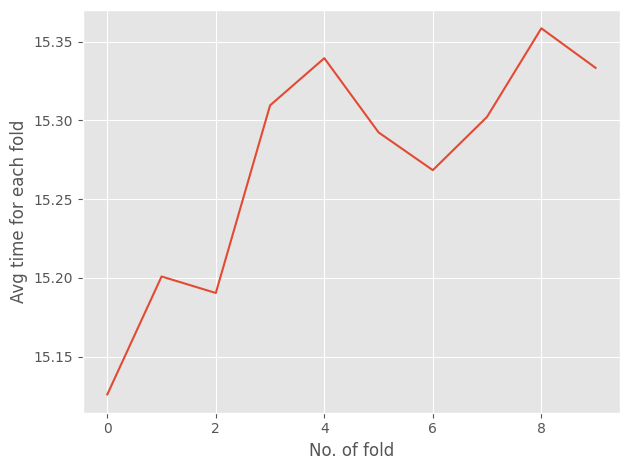

In [328]:
import matplotlib.pyplot as plt

times_nnl_n = np.zeros((10,100))
for i, row in enumerate(times_nnl):
    times_nnl_n[i, :len(row)] = row

times_nnl_n_n = np.mean(times_nnl_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_nnl_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("nnl times")
plt.show()

In [329]:
train_acc_nnl_n = np.zeros((10,100))
for i, row in enumerate(train_acc_nnl):
    train_acc_nnl_n[i, :len(row)] = row
    
test_acc_nnl_n = np.zeros((10,100))
for i, row in enumerate(test_acc_nnl):
    test_acc_nnl_n[i, :len(row)] = row
    
train_loss_nnl_n = np.zeros((10,100))
for i, row in enumerate(train_loss_nnl):
    train_loss_nnl_n[i, :len(row)] = row
    
test_loss_nnl_n = np.zeros((10,100))
for i, row in enumerate(test_loss_nnl):
    test_loss_nnl_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_nnl_n = np.mean(train_acc_nnl_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_nnl_n = np.mean(test_acc_nnl_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_nnl_n = np.mean(train_loss_nnl_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_nnl_n = np.mean(test_loss_nnl_n,axis=0)

In [330]:
data = [train_acc_nnl_n,test_acc_nnl_n,train_loss_nnl_n,test_loss_nnl_n]

df = pd.DataFrame(data)
df.to_csv('nnl_acc', index=False)
df = pd.read_csv('nnl_acc')

train_acc_nnl_n = df.iloc[0]
test_acc_nnl_n = df.iloc[1]
train_loss_nnl_n = df.iloc[2]
test_loss_nnl_n = df.iloc[3]


df_t = pd.DataFrame([times_nnl_n_n])
df_t.to_csv('nnl_times', index=False)
df_t = pd.read_csv('nnl_times')

times_nnl_n_n = df_t.iloc[0]

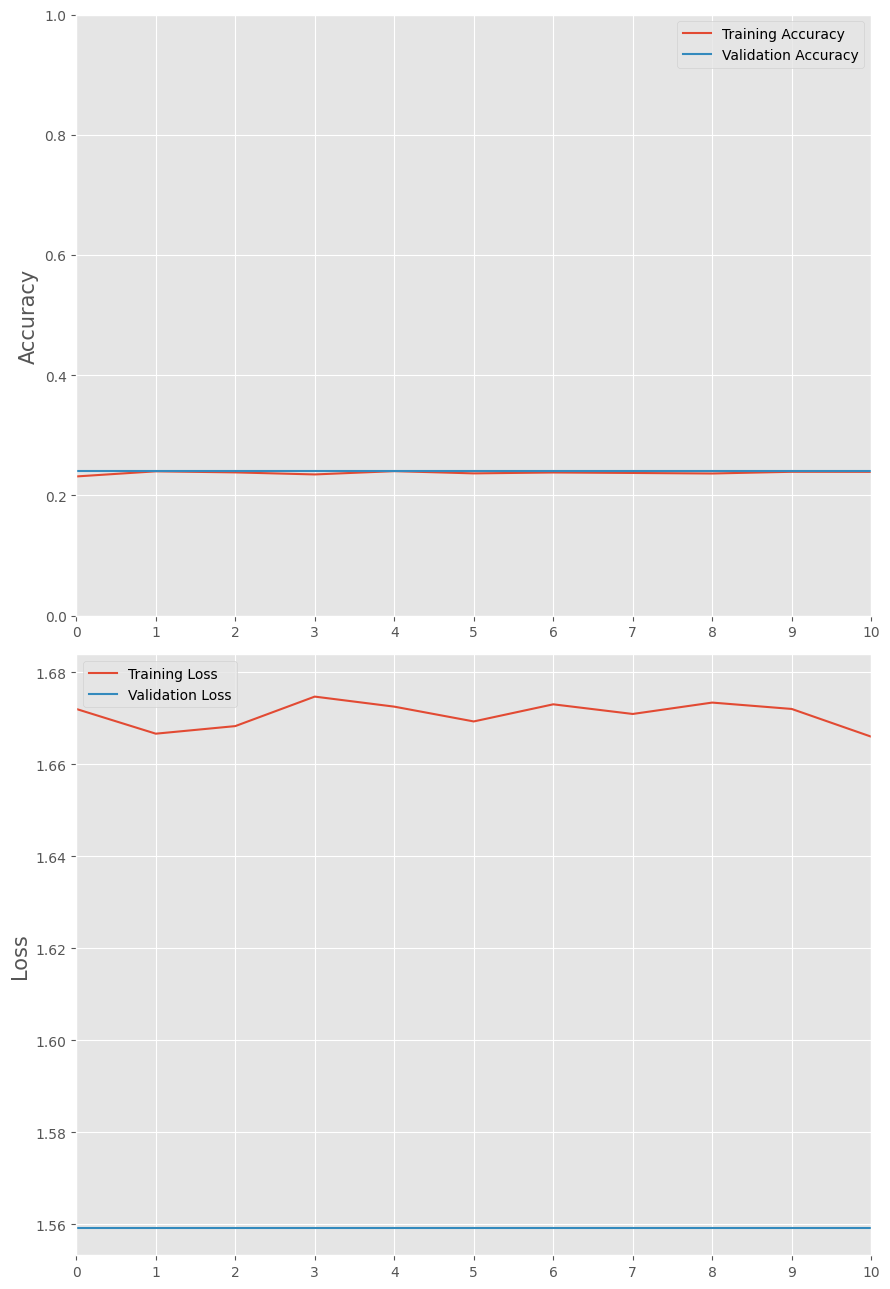

In [331]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_nnl_n, label='Training Accuracy')
axs[0].plot(test_acc_nnl_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_nnl_n, label='Training Loss')
axs[1].plot(test_loss_nnl_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("nnl Training and Testing Loss")
plt.show()

In [332]:
import gc
gc.collect()

23627

In [333]:
np.array(scores_nnl).shape

(10, 302, 4)

In [334]:
y_pred_nnl = np.argmax(scores_nnl,axis=2)

In [335]:
y_pred_nnl.shape

(10, 302)

In [336]:
from sklearn.metrics import accuracy_score
acc_scores_nnl = []
for i in range(len(y_test_all_nnl)):
    acc_scores_nnl.append(accuracy_score(y_true = y_test_all_nnl[i],y_pred = y_pred_nnl[i]))

In [337]:
acc_scores_nnl

[0.3344370860927152,
 0.1390728476821192,
 0.1390728476821192,
 0.3841059602649007,
 0.40066225165562913,
 0.1291390728476821,
 0.1490066225165563,
 0.3543046357615894,
 0.13245033112582782,
 0.19205298013245034]

In [338]:
df_acc = pd.DataFrame([acc_scores_nnl])

df_acc.to_csv('nnl_accuracy', index=False)

df_acc = pd.read_csv('nnl_accuracy')

acc_scores_nnl = df_acc.iloc[0].values

In [339]:
y_test_all_n = np.array(y_test_all_nnl)

y_pred_nnl_n = y_pred_nnl.flatten()
y_test_all_n = y_test_all_n.flatten()

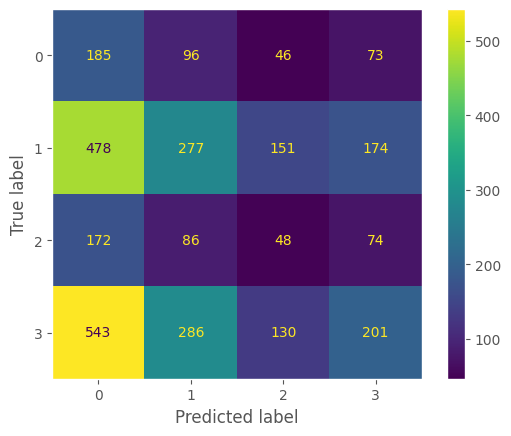

In [340]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_nnl_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("nnl")

plt.show()

In [341]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_nnl_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.13      0.46      0.21       400
           1       0.37      0.26      0.30      1080
           2       0.13      0.13      0.13       380
           3       0.39      0.17      0.24      1160

    accuracy                           0.24      3020
   macro avg       0.25      0.25      0.22      3020
weighted avg       0.31      0.24      0.24      3020



# NasNetMobile

In [342]:
import gc
gc.collect()

6122

In [343]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_nnb = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_nnb.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [344]:
def create_model_nnb():
    
    model_nnb = tf.keras.models.Sequential([
    tf.keras.applications.NASNetMobile(include_top=False, weights='imagenet', input_shape=(X_n.shape[1],X_n.shape[2],X_n.shape[3])),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_nnb.trainable = False
    return model_nnb

In [345]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_nnb = []
y_test_all_nnb = []
train_acc_nnb = []
test_acc_nnb = []
train_loss_nnb = []
test_loss_nnb = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_nnb.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_nnb = None
    model_nnb = create_model_nnb()
        
    model_nnb.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_nnb.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_nnb.predict(X_test)
    
    scores_nnb.append(x)
    train_acc_nnb.append(history.history["accuracy"])
    test_acc_nnb.append(history.history["val_accuracy"])
    train_loss_nnb.append(history.history["loss"])
    test_loss_nnb.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 11s 66ms/step - loss: 2.1232 - accuracy: 0.1860 - val_loss: 2.0088 - val_accuracy: 0.1544 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 3s 41ms/step - loss: 2.1463 - accuracy: 0.1746 - val_loss: 2.0088 - val_accuracy: 0.1544 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 3s 41ms/step - loss: 2.1427 - accuracy: 0.1832 - val_loss: 2.0088 - val_accuracy: 0.1544 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 3s 41ms/step - loss: 2.1633 - accuracy: 0.1856 - val_loss: 2.0088 - val_accuracy: 0.1544 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 3s 41ms/step - loss: 2.1224 - accuracy: 0.1836 - val_loss: 2.0088 - val_accuracy: 0.1544 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 3s 41ms/step - loss: 2.1255 - accuracy: 0.1872 - val_loss: 2.0088 - val_accuracy: 0.1544 - lr: 0.0010
Epoch 7/100
77/77 [=========================

Time taken for epoch 29: 3.14 seconds
77/77 [==============================] - 3s 41ms/step - loss: 2.1776 - accuracy: 0.1668 - val_loss: 2.0088 - val_accuracy: 0.1544 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 3s 41ms/step - loss: 2.1241 - accuracy: 0.1811 - val_loss: 2.0088 - val_accuracy: 0.1544 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 3s 41ms/step - loss: 2.1220 - accuracy: 0.1905 - val_loss: 2.0088 - val_accuracy: 0.1544 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 3s 41ms/step - loss: 2.1421 - accuracy: 0.1909 - val_loss: 2.0088 - val_accuracy: 0.1544 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 3s 40ms/step - loss: 2.1240 - accuracy: 0.1811 - val_loss: 2.0088 - val_accuracy: 0.1544 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 3s 40ms/step - loss: 2.1300 - accuracy: 0.1926 - val_loss: 2.0088 - val_accuracy: 0.1544 - lr: 1.6000e-06
Epoch 35/100
77

Epoch 58/100
77/77 [==============================] - 3s 41ms/step - loss: 2.1284 - accuracy: 0.1778 - val_loss: 2.0088 - val_accuracy: 0.1544 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 3s 41ms/step - loss: 2.1587 - accuracy: 0.1787 - val_loss: 2.0088 - val_accuracy: 0.1544 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 3s 40ms/step - loss: 2.1543 - accuracy: 0.1697 - val_loss: 2.0088 - val_accuracy: 0.1544 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 3s 40ms/step - loss: 2.1378 - accuracy: 0.1742 - val_loss: 2.0088 - val_accuracy: 0.1544 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 3s 41ms/step - loss: 2.1275 - accuracy: 0.1742 - val_loss: 2.0088 - val_accuracy: 0.1544 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 3s 41ms/step - loss: 2.1357 - accuracy: 0.1926 - val_loss: 2.0088 - val_accuracy: 0.1544 - lr: 2.5600e-09
Epoch 64/100
77/77 [====================

Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 2.2529 - accuracy: 0.2052
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 3.06 seconds
77/77 [==============================] - 3s 40ms/step - loss: 2.2529 - accuracy: 0.2052 - val_loss: 2.0085 - val_accuracy: 0.2206 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 3s 40ms/step - loss: 2.2000 - accuracy: 0.2171 - val_loss: 2.0085 - val_accuracy: 0.2206 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 3s 39ms/step - loss: 2.2183 - accuracy: 0.2179 - val_loss: 2.0085 - val_accuracy: 0.2206 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 3s 40ms/step - loss: 2.2340 - accuracy: 0.2212 - val_loss: 2.0085 - val_accuracy: 0.2206 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 3s 40ms/step - loss: 2.2154 - accuracy: 0.2277 - val_loss: 2.0085 - val_accuracy: 0.2206 - lr: 4.0000e-05
E

77/77 [==============================] - ETA: 0s - loss: 2.2321 - accuracy: 0.2097
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 3.04 seconds
77/77 [==============================] - 3s 39ms/step - loss: 2.2321 - accuracy: 0.2097 - val_loss: 2.0085 - val_accuracy: 0.2206 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 3s 40ms/step - loss: 2.2332 - accuracy: 0.2183 - val_loss: 2.0085 - val_accuracy: 0.2206 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 3s 39ms/step - loss: 2.2391 - accuracy: 0.2130 - val_loss: 2.0085 - val_accuracy: 0.2206 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 3s 40ms/step - loss: 2.2543 - accuracy: 0.2081 - val_loss: 2.0085 - val_accuracy: 0.2206 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 3s 40ms/step - loss: 2.1994 - accuracy: 0.2105 - val_loss: 2.0085 - val_accuracy: 0.2206 - lr: 1.0240e-10
Epoch 76/100
7

77/77 [==============================] - 3s 39ms/step - loss: 1.9243 - accuracy: 0.2457 - val_loss: 1.6881 - val_accuracy: 0.2353 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 3s 40ms/step - loss: 1.9170 - accuracy: 0.2433 - val_loss: 1.6881 - val_accuracy: 0.2353 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - ETA: 0s - loss: 1.9085 - accuracy: 0.2428
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 3.04 seconds
77/77 [==============================] - 3s 39ms/step - loss: 1.9085 - accuracy: 0.2428 - val_loss: 1.6881 - val_accuracy: 0.2353 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 3s 39ms/step - loss: 1.9249 - accuracy: 0.2392 - val_loss: 1.6881 - val_accuracy: 0.2353 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8826 - accuracy: 0.2551 - val_loss: 1.6881 - val_accuracy: 0.2353 - lr: 1.6000e-06
Epoch 32/100
7

77/77 [==============================] - 3s 39ms/step - loss: 1.8957 - accuracy: 0.2522 - val_loss: 1.6881 - val_accuracy: 0.2353 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 3s 39ms/step - loss: 1.8752 - accuracy: 0.2514 - val_loss: 1.6881 - val_accuracy: 0.2353 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.8801 - accuracy: 0.2506
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 2.99 seconds
77/77 [==============================] - 3s 39ms/step - loss: 1.8801 - accuracy: 0.2506 - val_loss: 1.6881 - val_accuracy: 0.2353 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 3s 39ms/step - loss: 1.9051 - accuracy: 0.2412 - val_loss: 1.6881 - val_accuracy: 0.2353 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 3s 39ms/step - loss: 1.9068 - accuracy: 0.2498 - val_loss: 1.6881 - val_accuracy: 0.2353 - lr: 4.0960e-12
Epoch 88/100
77

77/77 [==============================] - 3s 40ms/step - loss: 1.7118 - accuracy: 0.2984 - val_loss: 1.5762 - val_accuracy: 0.3419 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 3s 40ms/step - loss: 1.7027 - accuracy: 0.2989 - val_loss: 1.5762 - val_accuracy: 0.3419 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 3s 40ms/step - loss: 1.7126 - accuracy: 0.2895 - val_loss: 1.5762 - val_accuracy: 0.3419 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 3s 40ms/step - loss: 1.7038 - accuracy: 0.2976 - val_loss: 1.5762 - val_accuracy: 0.3419 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 1.7126 - accuracy: 0.2989
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 3.07 seconds
77/77 [==============================] - 3s 40ms/step - loss: 1.7126 - accuracy: 0.2989 - val_loss: 1.5762 - val_accuracy: 0.3419 - lr: 3.2000e-07
Epoch 44/100
77

77/77 [==============================] - 3s 39ms/step - loss: 1.6995 - accuracy: 0.3046 - val_loss: 1.5762 - val_accuracy: 0.3419 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 3s 39ms/step - loss: 1.7185 - accuracy: 0.3042 - val_loss: 1.5762 - val_accuracy: 0.3419 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 3s 40ms/step - loss: 1.7123 - accuracy: 0.2993 - val_loss: 1.5762 - val_accuracy: 0.3419 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 3s 40ms/step - loss: 1.7140 - accuracy: 0.2972 - val_loss: 1.5762 - val_accuracy: 0.3419 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 1.7049 - accuracy: 0.3009
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 3.10 seconds
77/77 [==============================] - 3s 40ms/step - loss: 1.7049 - accuracy: 0.3009 - val_loss: 1.5762 - val_accuracy: 0.3419 - lr: 8.1920e-13
Epoch 100/100


Epoch 52/100
77/77 [==============================] - 3s 39ms/step - loss: 2.2597 - accuracy: 0.3545 - val_loss: 1.9761 - val_accuracy: 0.4154 - lr: 1.2800e-08
Epoch 53/100
77/77 [==============================] - 3s 39ms/step - loss: 2.2553 - accuracy: 0.3549 - val_loss: 1.9761 - val_accuracy: 0.4154 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 3s 39ms/step - loss: 2.2732 - accuracy: 0.3508 - val_loss: 1.9761 - val_accuracy: 0.4154 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 3s 39ms/step - loss: 2.2571 - accuracy: 0.3504 - val_loss: 1.9761 - val_accuracy: 0.4154 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 3s 39ms/step - loss: 2.2591 - accuracy: 0.3459 - val_loss: 1.9761 - val_accuracy: 0.4154 - lr: 1.2800e-08
Epoch 57/100
76/77 [============================>.] - ETA: 0s - loss: 2.2734 - accuracy: 0.3512
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 2

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [346]:
import gc
gc.collect()

In [347]:
import matplotlib.pyplot as plt

times_nnb_n = np.zeros((10,100))
for i, row in enumerate(times_nnb):
    times_nnb_n[i, :len(row)] = row

times_nnb_n_n = np.mean(times_nnb_n,axis=1)

plt.style.use('ggplot')
plt.plot(times_nnb_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.tight_layout()
plt.savefig("nnb times")
plt.show()

In [348]:
train_acc_nnb_n = np.zeros((10,100))
for i, row in enumerate(train_acc_nnb):
    train_acc_nnb_n[i, :len(row)] = row
    
test_acc_nnb_n = np.zeros((10,100))
for i, row in enumerate(test_acc_nnb):
    test_acc_nnb_n[i, :len(row)] = row
    
train_loss_nnb_n = np.zeros((10,100))
for i, row in enumerate(train_loss_nnb):
    train_loss_nnb_n[i, :len(row)] = row
    
test_loss_nnb_n = np.zeros((10,100))
for i, row in enumerate(test_loss_nnb):
    test_loss_nnb_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_nnb_n = np.mean(train_acc_nnb_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_nnb_n = np.mean(test_acc_nnb_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_nnb_n = np.mean(train_loss_nnb_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_nnb_n = np.mean(test_loss_nnb_n,axis=0)

In [349]:
data = [train_acc_nnb_n,test_acc_nnb_n,train_loss_nnb_n,test_loss_nnb_n]

df = pd.DataFrame(data)
df.to_csv('nnb_acc', index=False)
df = pd.read_csv('nnb_acc')

train_acc_nnb_n = df.iloc[0]
test_acc_nnb_n = df.iloc[1]
train_loss_nnb_n = df.iloc[2]
test_loss_nnb_n = df.iloc[3]


df_t = pd.DataFrame([times_nnb_n_n])
df_t.to_csv('nnb_times', index=False)
df_t = pd.read_csv('nnb_times')

times_nnb_n_n = df_t.iloc[0]

In [350]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_nnb_n, label='Training Accuracy')
axs[0].plot(test_acc_nnb_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_nnb_n, label='Training Loss')
axs[1].plot(test_loss_nnb_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("nnb Training and Testing Loss")
plt.show()

In [351]:
np.array(scores_nnb).shape

In [352]:
y_pred_nnb = np.argmax(scores_nnb,axis=2)

In [353]:
y_pred_nnb.shape

In [354]:
from sklearn.metrics import accuracy_score
acc_scores_nnb = []
for i in range(len(y_test_all_nnb)):
    acc_scores_nnb.append(accuracy_score(y_true = y_test_all_nnb[i],y_pred = y_pred_nnb[i]))

In [355]:
import gc
gc.collect()

In [356]:
acc_scores_nnb

In [357]:
df_acc = pd.DataFrame([acc_scores_nnb])

df_acc.to_csv('nnb_accuracy', index=False)

df_acc = pd.read_csv('nnb_accuracy')

acc_scores_nnb = df_acc.iloc[0].values

In [358]:
y_test_all_n = np.array(y_test_all_nnb)

y_pred_nnb_n = y_pred_nnb.flatten()
y_test_all_n = y_test_all_n.flatten()

In [359]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_nnb_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("nnb")

plt.show()

In [360]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_nnb_n)
print(cf_r)

# AlexNet

In [361]:
import gc
gc.collect()

In [362]:
X.shape

In [363]:
X_tl = np.concatenate([X,X,X],axis=-1)

In [364]:
X_tl.shape

In [365]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_axn = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_axn.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=7, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 5, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [366]:
import gc
gc.collect()

In [367]:
from keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [368]:
def create_model_axn():
    
    model_axn = Sequential()
    model_axn.add(Conv2D(filters=96,kernel_size=(3,3),strides=(4,4),input_shape=(X_tl.shape[1],X_tl.shape[2],X_tl.shape[3]), activation='relu'))
    model_axn.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model_axn.add(Conv2D(256,(5,5),padding='same',activation='relu'))
    model_axn.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model_axn.add(Conv2D(384,(3,3),padding='same',activation='relu'))
    model_axn.add(Conv2D(384,(3,3),padding='same',activation='relu'))
    model_axn.add(Conv2D(256,(3,3),padding='same',activation='relu'))
    model_axn.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

    model_axn.add(Flatten())
    model_axn.add(Dense(4096, activation='relu'))
    model_axn.add(Dropout(0.4))
    model_axn.add(Dense(4096, activation='relu'))
    model_axn.add(Dropout(0.4))
    model_axn.add(Dense(4,activation='softmax'))

    return model_axn

In [369]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_axn = []
y_test_all_axn = []
train_acc_axn = []
test_acc_axn = []
train_loss_axn = []
test_loss_axn = []

for index, (train_indices, val_indices) in enumerate(skf.split(X_n, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_tl[train_indices], X_tl[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_axn.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_axn = None
    model_axn = create_model_axn()
        
    model_axn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_axn.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_axn.predict(X_test)
    
    scores_axn.append(x)
    train_acc_axn.append(history.history["accuracy"])
    test_acc_axn.append(history.history["val_accuracy"])
    train_loss_axn.append(history.history["loss"])
    test_loss_axn.append(history.history["val_loss"])
    
    gc.collect()

In [370]:
import matplotlib.pyplot as plt

times_axn_n = np.zeros((10,100))
for i, row in enumerate(times_axn):
    times_axn_n[i, :len(row)] = row

times_axn_n_n = np.mean(times_axn_n,axis=1)

plt.plot(times_axn_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("axn times")
plt.show()

In [371]:
times_axn_n_n

In [372]:
train_acc_axn_n = np.zeros((10,100))
for i, row in enumerate(train_acc_axn):
    train_acc_axn_n[i, :len(row)] = row
    
test_acc_axn_n = np.zeros((10,100))
for i, row in enumerate(test_acc_axn):
    test_acc_axn_n[i, :len(row)] = row
    
train_loss_axn_n = np.zeros((10,100))
for i, row in enumerate(train_loss_axn):
    train_loss_axn_n[i, :len(row)] = row
    
test_loss_axn_n = np.zeros((10,100))
for i, row in enumerate(test_loss_axn):
    test_loss_axn_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_axn_n = np.mean(train_acc_axn_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_axn_n = np.mean(test_acc_axn_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_axn_n = np.mean(train_loss_axn_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_axn_n = np.mean(test_loss_axn_n,axis=0)

In [373]:
data = [train_acc_axn_n,test_acc_axn_n,train_loss_axn_n,test_loss_axn_n]

df = pd.DataFrame(data)
df.to_csv('axn_acc', index=False)
df = pd.read_csv('axn_acc')

train_acc_axn_n = df.iloc[0]
test_acc_axn_n = df.iloc[1]
train_loss_axn_n = df.iloc[2]
test_loss_axn_n = df.iloc[3]


df_t = pd.DataFrame([times_axn_n_n])
df_t.to_csv('axn_times', index=False)
df_t = pd.read_csv('axn_times')

times_axn_n_n = df_t.iloc[0]

In [374]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_axn_n, label='Training Accuracy')
axs[0].plot(test_acc_axn_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_axn_n, label='Training Loss')
axs[1].plot(test_loss_axn_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim(train_loss_axn_n.min(),train_loss_axn_n.max())
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("axn Training and Testing Loss")
plt.show()

In [375]:
import gc
gc.collect()

In [376]:
np.array(scores_axn).shape

In [377]:
y_pred_axn = np.argmax(scores_axn,axis=2)

In [378]:
y_pred_axn.shape

In [379]:
from sklearn.metrics import accuracy_score
acc_scores_axn = []
for i in range(len(y_test_all_axn)):
    acc_scores_axn.append(accuracy_score(y_true = y_test_all_axn[i],y_pred = y_pred_axn[i]))

In [380]:
acc_scores_axn

In [381]:
df_acc = pd.DataFrame([acc_scores_axn])

df_acc.to_csv('axn_accuracy', index=False)

df_acc = pd.read_csv('axn_accuracy')

acc_scores_axn = df_acc.iloc[0].values

In [382]:
y_test_all_n = np.array(y_test_all_axn)

y_pred_axn_n = y_pred_axn.flatten()
y_test_all_n = y_test_all_n.flatten()

In [383]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_axn_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("axn")
plt.show()

In [384]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_axn_n)
print(cf_r)

# EfficientNetB7

In [12]:
import gc
gc.collect()

0

In [13]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_enb7 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_enb7.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [14]:
def create_model_enb7():
    
    model_enb7 = tf.keras.models.Sequential([
    tf.keras.applications.EfficientNetB7(include_top=False, weights='imagenet', input_shape=(X_n.shape[1],X_n.shape[2],X_n.shape[3])),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_enb7.trainable = False
    return model_enb7

In [15]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_enb7 = []
y_test_all_enb7 = []
train_acc_enb7 = []
test_acc_enb7 = []
train_loss_enb7 = []
test_loss_enb7 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_enb7.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_enb7 = None
    model_enb7 = create_model_enb7()
        
    model_enb7.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_enb7.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [ reduce_lr,time_callback])
    
    
    x = model_enb7.predict(X_test)
    
    scores_enb7.append(x)
    train_acc_enb7.append(history.history["accuracy"])
    test_acc_enb7.append(history.history["val_accuracy"])
    train_loss_enb7.append(history.history["loss"])
    test_loss_enb7.append(history.history["val_loss"])
    
    gc.collect()

Training on fold 1/10...
Epoch 1/100
77/77 [==============================] - 37s 239ms/step - loss: 1.4207 - accuracy: 0.3606 - val_loss: 1.3721 - val_accuracy: 0.3860 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 14s 186ms/step - loss: 1.4215 - accuracy: 0.3528 - val_loss: 1.3721 - val_accuracy: 0.3860 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 14s 188ms/step - loss: 1.4164 - accuracy: 0.3516 - val_loss: 1.3721 - val_accuracy: 0.3860 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 14s 187ms/step - loss: 1.4199 - accuracy: 0.3528 - val_loss: 1.3721 - val_accuracy: 0.3860 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 14s 188ms/step - loss: 1.4110 - accuracy: 0.3553 - val_loss: 1.3721 - val_accuracy: 0.3860 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 15s 189ms/step - loss: 1.4101 - accuracy: 0.3639 - val_loss: 1.3721 - val_accuracy: 0.3860 - lr: 0.0010
Epoch 7/100
77/77 [==============

77/77 [==============================] - ETA: 0s - loss: 1.4073 - accuracy: 0.3602
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 14.48 seconds
77/77 [==============================] - 14s 188ms/step - loss: 1.4073 - accuracy: 0.3602 - val_loss: 1.3721 - val_accuracy: 0.3860 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 15s 189ms/step - loss: 1.4153 - accuracy: 0.3536 - val_loss: 1.3721 - val_accuracy: 0.3860 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 15s 189ms/step - loss: 1.4151 - accuracy: 0.3581 - val_loss: 1.3721 - val_accuracy: 0.3860 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 15s 190ms/step - loss: 1.4107 - accuracy: 0.3557 - val_loss: 1.3721 - val_accuracy: 0.3860 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 15s 190ms/step - loss: 1.4176 - accuracy: 0.3496 - val_loss: 1.3721 - val_accuracy: 0.3860 - lr: 1.6000e-06
Epo

Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.4149 - accuracy: 0.3590
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 14.51 seconds
77/77 [==============================] - 15s 189ms/step - loss: 1.4149 - accuracy: 0.3590 - val_loss: 1.3721 - val_accuracy: 0.3860 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 15s 190ms/step - loss: 1.4096 - accuracy: 0.3540 - val_loss: 1.3721 - val_accuracy: 0.3860 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 15s 189ms/step - loss: 1.4160 - accuracy: 0.3553 - val_loss: 1.3721 - val_accuracy: 0.3860 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 15s 190ms/step - loss: 1.4154 - accuracy: 0.3573 - val_loss: 1.3721 - val_accuracy: 0.3860 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 14s 188ms/step - loss: 1.4172 - accuracy: 0.3491 - val_loss: 1.3721 - val_accuracy: 0.3860 - lr: 2

Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.4099 - accuracy: 0.3516
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 14.42 seconds
77/77 [==============================] - 14s 187ms/step - loss: 1.4099 - accuracy: 0.3516 - val_loss: 1.3721 - val_accuracy: 0.3860 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 14s 188ms/step - loss: 1.4162 - accuracy: 0.3565 - val_loss: 1.3721 - val_accuracy: 0.3860 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 14s 188ms/step - loss: 1.4133 - accuracy: 0.3561 - val_loss: 1.3721 - val_accuracy: 0.3860 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 15s 190ms/step - loss: 1.4181 - accuracy: 0.3569 - val_loss: 1.3721 - val_accuracy: 0.3860 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 15s 189ms/step - loss: 1.4090 - accuracy: 0.3528 - val_loss: 1.3721 - val_accuracy: 0.3860 - lr: 4.

Epoch 13/100
77/77 [==============================] - 15s 189ms/step - loss: 1.3721 - accuracy: 0.2899 - val_loss: 1.3494 - val_accuracy: 0.3382 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 15s 189ms/step - loss: 1.3791 - accuracy: 0.2805 - val_loss: 1.3494 - val_accuracy: 0.3382 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 1.3776 - accuracy: 0.2817
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 14.59 seconds
77/77 [==============================] - 15s 190ms/step - loss: 1.3776 - accuracy: 0.2817 - val_loss: 1.3494 - val_accuracy: 0.3382 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 15s 189ms/step - loss: 1.3799 - accuracy: 0.2939 - val_loss: 1.3494 - val_accuracy: 0.3382 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 14s 188ms/step - loss: 1.3754 - accuracy: 0.2813 - val_loss: 1.3494 - val_accuracy: 0.3382 - lr: 4

Epoch 41/100
77/77 [==============================] - 14s 189ms/step - loss: 1.3795 - accuracy: 0.2837 - val_loss: 1.3494 - val_accuracy: 0.3382 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 14s 187ms/step - loss: 1.3860 - accuracy: 0.2751 - val_loss: 1.3494 - val_accuracy: 0.3382 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 1.3756 - accuracy: 0.2944
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 14.42 seconds
77/77 [==============================] - 14s 188ms/step - loss: 1.3756 - accuracy: 0.2944 - val_loss: 1.3494 - val_accuracy: 0.3382 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 14s 188ms/step - loss: 1.3804 - accuracy: 0.2784 - val_loss: 1.3494 - val_accuracy: 0.3382 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 14s 188ms/step - loss: 1.3713 - accuracy: 0.2927 - val_loss: 1.3494 - val_accuracy: 0.3382 - lr: 6.

Epoch 69/100
77/77 [==============================] - 15s 189ms/step - loss: 1.3751 - accuracy: 0.2907 - val_loss: 1.3494 - val_accuracy: 0.3382 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 15s 190ms/step - loss: 1.3747 - accuracy: 0.2784 - val_loss: 1.3494 - val_accuracy: 0.3382 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - ETA: 0s - loss: 1.3770 - accuracy: 0.3046
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 14.63 seconds
77/77 [==============================] - 15s 190ms/step - loss: 1.3770 - accuracy: 0.3046 - val_loss: 1.3494 - val_accuracy: 0.3382 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 15s 189ms/step - loss: 1.3807 - accuracy: 0.2837 - val_loss: 1.3494 - val_accuracy: 0.3382 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 14s 188ms/step - loss: 1.3849 - accuracy: 0.2764 - val_loss: 1.3494 - val_accuracy: 0.3382 - lr: 1

Epoch 97/100
77/77 [==============================] - 15s 189ms/step - loss: 1.3702 - accuracy: 0.3095 - val_loss: 1.3494 - val_accuracy: 0.3382 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 15s 189ms/step - loss: 1.3770 - accuracy: 0.2870 - val_loss: 1.3494 - val_accuracy: 0.3382 - lr: 8.1920e-13
Epoch 99/100
77/77 [==============================] - ETA: 0s - loss: 1.3805 - accuracy: 0.2764
Epoch 99: ReduceLROnPlateau reducing learning rate to 1.6384001360475466e-13.
Time taken for epoch 99: 14.50 seconds
77/77 [==============================] - 14s 188ms/step - loss: 1.3805 - accuracy: 0.2764 - val_loss: 1.3494 - val_accuracy: 0.3382 - lr: 8.1920e-13
Epoch 100/100
10/10 [==============================] - 4s 159ms/step
Training on fold 3/10...
Epoch 1/100
77/77 [==============================] - 26s 220ms/step - loss: 1.3588 - accuracy: 0.3312 - val_loss: 1.3185 - val_accuracy: 0.3934 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 14s 188ms/

Epoch 25/100
77/77 [==============================] - 15s 189ms/step - loss: 1.3517 - accuracy: 0.3406 - val_loss: 1.3185 - val_accuracy: 0.3934 - lr: 8.0000e-06
Epoch 26/100
77/77 [==============================] - 15s 190ms/step - loss: 1.3615 - accuracy: 0.3279 - val_loss: 1.3185 - val_accuracy: 0.3934 - lr: 8.0000e-06
Epoch 27/100
77/77 [==============================] - 15s 190ms/step - loss: 1.3551 - accuracy: 0.3410 - val_loss: 1.3185 - val_accuracy: 0.3934 - lr: 8.0000e-06
Epoch 28/100
77/77 [==============================] - 15s 190ms/step - loss: 1.3626 - accuracy: 0.3324 - val_loss: 1.3185 - val_accuracy: 0.3934 - lr: 8.0000e-06
Epoch 29/100
77/77 [==============================] - ETA: 0s - loss: 1.3538 - accuracy: 0.3463
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 14.47 seconds
77/77 [==============================] - 14s 188ms/step - loss: 1.3538 - accuracy: 0.3463 - val_loss: 1.3185 - val_accuracy: 0.3934 - lr: 8

Epoch 53/100
77/77 [==============================] - 15s 190ms/step - loss: 1.3563 - accuracy: 0.3438 - val_loss: 1.3185 - val_accuracy: 0.3934 - lr: 1.2800e-08
Epoch 54/100
77/77 [==============================] - 15s 190ms/step - loss: 1.3576 - accuracy: 0.3271 - val_loss: 1.3185 - val_accuracy: 0.3934 - lr: 1.2800e-08
Epoch 55/100
77/77 [==============================] - 15s 189ms/step - loss: 1.3547 - accuracy: 0.3389 - val_loss: 1.3185 - val_accuracy: 0.3934 - lr: 1.2800e-08
Epoch 56/100
77/77 [==============================] - 14s 187ms/step - loss: 1.3526 - accuracy: 0.3414 - val_loss: 1.3185 - val_accuracy: 0.3934 - lr: 1.2800e-08
Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.3500 - accuracy: 0.3536
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 14.44 seconds
77/77 [==============================] - 14s 188ms/step - loss: 1.3500 - accuracy: 0.3536 - val_loss: 1.3185 - val_accuracy: 0.3934 - lr: 1

Epoch 81/100
77/77 [==============================] - 14s 188ms/step - loss: 1.3498 - accuracy: 0.3455 - val_loss: 1.3185 - val_accuracy: 0.3934 - lr: 2.0480e-11
Epoch 82/100
77/77 [==============================] - 14s 188ms/step - loss: 1.3602 - accuracy: 0.3418 - val_loss: 1.3185 - val_accuracy: 0.3934 - lr: 2.0480e-11
Epoch 83/100
77/77 [==============================] - 15s 190ms/step - loss: 1.3524 - accuracy: 0.3340 - val_loss: 1.3185 - val_accuracy: 0.3934 - lr: 2.0480e-11
Epoch 84/100
77/77 [==============================] - 15s 189ms/step - loss: 1.3544 - accuracy: 0.3361 - val_loss: 1.3185 - val_accuracy: 0.3934 - lr: 2.0480e-11
Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.3512 - accuracy: 0.3532
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 14.59 seconds
77/77 [==============================] - 15s 190ms/step - loss: 1.3512 - accuracy: 0.3532 - val_loss: 1.3185 - val_accuracy: 0.3934 - lr: 2.

Epoch 9/100
77/77 [==============================] - 15s 190ms/step - loss: 1.3867 - accuracy: 0.2792 - val_loss: 1.3647 - val_accuracy: 0.2794 - lr: 2.0000e-04
Epoch 10/100
77/77 [==============================] - 15s 192ms/step - loss: 1.3886 - accuracy: 0.2862 - val_loss: 1.3647 - val_accuracy: 0.2794 - lr: 2.0000e-04
Epoch 11/100
77/77 [==============================] - 14s 188ms/step - loss: 1.3910 - accuracy: 0.2845 - val_loss: 1.3647 - val_accuracy: 0.2794 - lr: 2.0000e-04
Epoch 12/100
77/77 [==============================] - 14s 188ms/step - loss: 1.3828 - accuracy: 0.2854 - val_loss: 1.3647 - val_accuracy: 0.2794 - lr: 2.0000e-04
Epoch 13/100
77/77 [==============================] - 15s 189ms/step - loss: 1.3945 - accuracy: 0.2784 - val_loss: 1.3647 - val_accuracy: 0.2794 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 15s 190ms/step - loss: 1.3819 - accuracy: 0.2858 - val_loss: 1.3647 - val_accuracy: 0.2794 - lr: 2.0000e-04
Epoch 15/100
77/77 [=========

Epoch 37/100
77/77 [==============================] - 14s 188ms/step - loss: 1.3888 - accuracy: 0.2621 - val_loss: 1.3647 - val_accuracy: 0.2794 - lr: 3.2000e-07
Epoch 38/100
77/77 [==============================] - 15s 191ms/step - loss: 1.3879 - accuracy: 0.2731 - val_loss: 1.3647 - val_accuracy: 0.2794 - lr: 3.2000e-07
Epoch 39/100
77/77 [==============================] - 15s 191ms/step - loss: 1.3807 - accuracy: 0.2935 - val_loss: 1.3647 - val_accuracy: 0.2794 - lr: 3.2000e-07
Epoch 40/100
77/77 [==============================] - 15s 190ms/step - loss: 1.3842 - accuracy: 0.2858 - val_loss: 1.3647 - val_accuracy: 0.2794 - lr: 3.2000e-07
Epoch 41/100
77/77 [==============================] - 15s 190ms/step - loss: 1.3976 - accuracy: 0.2641 - val_loss: 1.3647 - val_accuracy: 0.2794 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 15s 191ms/step - loss: 1.3881 - accuracy: 0.2731 - val_loss: 1.3647 - val_accuracy: 0.2794 - lr: 3.2000e-07
Epoch 43/100
77/77 [========

Epoch 65/100
77/77 [==============================] - 15s 191ms/step - loss: 1.3846 - accuracy: 0.2731 - val_loss: 1.3647 - val_accuracy: 0.2794 - lr: 5.1200e-10
Epoch 66/100
77/77 [==============================] - 15s 191ms/step - loss: 1.3888 - accuracy: 0.2743 - val_loss: 1.3647 - val_accuracy: 0.2794 - lr: 5.1200e-10
Epoch 67/100
77/77 [==============================] - 15s 191ms/step - loss: 1.3881 - accuracy: 0.2670 - val_loss: 1.3647 - val_accuracy: 0.2794 - lr: 5.1200e-10
Epoch 68/100
77/77 [==============================] - 15s 190ms/step - loss: 1.3891 - accuracy: 0.2682 - val_loss: 1.3647 - val_accuracy: 0.2794 - lr: 5.1200e-10
Epoch 69/100
77/77 [==============================] - 14s 188ms/step - loss: 1.3917 - accuracy: 0.2686 - val_loss: 1.3647 - val_accuracy: 0.2794 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 15s 190ms/step - loss: 1.3792 - accuracy: 0.2972 - val_loss: 1.3647 - val_accuracy: 0.2794 - lr: 5.1200e-10
Epoch 71/100
77/77 [========

Epoch 93/100
77/77 [==============================] - 15s 189ms/step - loss: 1.3820 - accuracy: 0.2903 - val_loss: 1.3647 - val_accuracy: 0.2794 - lr: 8.1920e-13
Epoch 94/100
77/77 [==============================] - 15s 189ms/step - loss: 1.3806 - accuracy: 0.2817 - val_loss: 1.3647 - val_accuracy: 0.2794 - lr: 8.1920e-13
Epoch 95/100
77/77 [==============================] - 15s 190ms/step - loss: 1.3842 - accuracy: 0.2919 - val_loss: 1.3647 - val_accuracy: 0.2794 - lr: 8.1920e-13
Epoch 96/100
77/77 [==============================] - 15s 190ms/step - loss: 1.3869 - accuracy: 0.2702 - val_loss: 1.3647 - val_accuracy: 0.2794 - lr: 8.1920e-13
Epoch 97/100
77/77 [==============================] - 15s 191ms/step - loss: 1.3875 - accuracy: 0.2837 - val_loss: 1.3647 - val_accuracy: 0.2794 - lr: 8.1920e-13
Epoch 98/100
77/77 [==============================] - 15s 191ms/step - loss: 1.3852 - accuracy: 0.2800 - val_loss: 1.3647 - val_accuracy: 0.2794 - lr: 8.1920e-13
Epoch 99/100
77/77 [========

77/77 [==============================] - 15s 190ms/step - loss: 1.4910 - accuracy: 0.3573 - val_loss: 1.4253 - val_accuracy: 0.4081 - lr: 4.0000e-05
Epoch 22/100
77/77 [==============================] - ETA: 0s - loss: 1.4809 - accuracy: 0.3671
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for epoch 22: 14.65 seconds
77/77 [==============================] - 15s 190ms/step - loss: 1.4809 - accuracy: 0.3671 - val_loss: 1.4253 - val_accuracy: 0.4081 - lr: 4.0000e-05
Epoch 23/100
77/77 [==============================] - 15s 191ms/step - loss: 1.4873 - accuracy: 0.3745 - val_loss: 1.4253 - val_accuracy: 0.4081 - lr: 8.0000e-06
Epoch 24/100
77/77 [==============================] - 14s 188ms/step - loss: 1.4834 - accuracy: 0.3684 - val_loss: 1.4253 - val_accuracy: 0.4081 - lr: 8.0000e-06
Epoch 25/100
77/77 [==============================] - 14s 188ms/step - loss: 1.4839 - accuracy: 0.3737 - val_loss: 1.4253 - val_accuracy: 0.4081 - lr: 8.0000e-06
Epoc

Epoch 49/100
77/77 [==============================] - 15s 189ms/step - loss: 1.4752 - accuracy: 0.3712 - val_loss: 1.4253 - val_accuracy: 0.4081 - lr: 6.4000e-08
Epoch 50/100
77/77 [==============================] - ETA: 0s - loss: 1.4856 - accuracy: 0.3696
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for epoch 50: 14.51 seconds
77/77 [==============================] - 15s 189ms/step - loss: 1.4856 - accuracy: 0.3696 - val_loss: 1.4253 - val_accuracy: 0.4081 - lr: 6.4000e-08
Epoch 51/100
77/77 [==============================] - 15s 190ms/step - loss: 1.4850 - accuracy: 0.3618 - val_loss: 1.4253 - val_accuracy: 0.4081 - lr: 1.2800e-08
Epoch 52/100
77/77 [==============================] - 15s 190ms/step - loss: 1.4788 - accuracy: 0.3671 - val_loss: 1.4253 - val_accuracy: 0.4081 - lr: 1.2800e-08
Epoch 53/100
77/77 [==============================] - 15s 190ms/step - loss: 1.4831 - accuracy: 0.3679 - val_loss: 1.4253 - val_accuracy: 0.4081 - lr: 1

Epoch 77/100
77/77 [==============================] - 15s 191ms/step - loss: 1.4707 - accuracy: 0.3704 - val_loss: 1.4253 - val_accuracy: 0.4081 - lr: 1.0240e-10
Epoch 78/100
77/77 [==============================] - ETA: 0s - loss: 1.4753 - accuracy: 0.3679
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for epoch 78: 14.65 seconds
77/77 [==============================] - 15s 191ms/step - loss: 1.4753 - accuracy: 0.3679 - val_loss: 1.4253 - val_accuracy: 0.4081 - lr: 1.0240e-10
Epoch 79/100
77/77 [==============================] - 15s 192ms/step - loss: 1.4883 - accuracy: 0.3733 - val_loss: 1.4253 - val_accuracy: 0.4081 - lr: 2.0480e-11
Epoch 80/100
77/77 [==============================] - 15s 191ms/step - loss: 1.4799 - accuracy: 0.3708 - val_loss: 1.4253 - val_accuracy: 0.4081 - lr: 2.0480e-11
Epoch 81/100
77/77 [==============================] - 15s 189ms/step - loss: 1.4798 - accuracy: 0.3708 - val_loss: 1.4253 - val_accuracy: 0.4081 - lr: 2

Epoch 5/100
77/77 [==============================] - 14s 188ms/step - loss: 1.6183 - accuracy: 0.3512 - val_loss: 1.6823 - val_accuracy: 0.3456 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 15s 190ms/step - loss: 1.6209 - accuracy: 0.3500 - val_loss: 1.6823 - val_accuracy: 0.3456 - lr: 0.0010
Epoch 7/100
77/77 [==============================] - 15s 191ms/step - loss: 1.6200 - accuracy: 0.3516 - val_loss: 1.6823 - val_accuracy: 0.3456 - lr: 0.0010
Epoch 8/100
77/77 [==============================] - ETA: 0s - loss: 1.6186 - accuracy: 0.3536
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Time taken for epoch 8: 14.67 seconds
77/77 [==============================] - 15s 191ms/step - loss: 1.6186 - accuracy: 0.3536 - val_loss: 1.6823 - val_accuracy: 0.3456 - lr: 0.0010
Epoch 9/100
77/77 [==============================] - 15s 191ms/step - loss: 1.6236 - accuracy: 0.3504 - val_loss: 1.6823 - val_accuracy: 0.3456 - lr: 2.0000e-04
Epoch 10/100


Epoch 33/100
77/77 [==============================] - 15s 190ms/step - loss: 1.6166 - accuracy: 0.3536 - val_loss: 1.6823 - val_accuracy: 0.3456 - lr: 1.6000e-06
Epoch 34/100
77/77 [==============================] - 15s 190ms/step - loss: 1.6220 - accuracy: 0.3500 - val_loss: 1.6823 - val_accuracy: 0.3456 - lr: 1.6000e-06
Epoch 35/100
77/77 [==============================] - 15s 190ms/step - loss: 1.6215 - accuracy: 0.3532 - val_loss: 1.6823 - val_accuracy: 0.3456 - lr: 1.6000e-06
Epoch 36/100
77/77 [==============================] - ETA: 0s - loss: 1.6207 - accuracy: 0.3532
Epoch 36: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Time taken for epoch 36: 14.59 seconds
77/77 [==============================] - 15s 190ms/step - loss: 1.6207 - accuracy: 0.3532 - val_loss: 1.6823 - val_accuracy: 0.3456 - lr: 1.6000e-06
Epoch 37/100
77/77 [==============================] - 14s 188ms/step - loss: 1.6144 - accuracy: 0.3532 - val_loss: 1.6823 - val_accuracy: 0.3456 - lr: 3.

Epoch 61/100
77/77 [==============================] - 15s 190ms/step - loss: 1.6172 - accuracy: 0.3528 - val_loss: 1.6823 - val_accuracy: 0.3456 - lr: 2.5600e-09
Epoch 62/100
77/77 [==============================] - 15s 189ms/step - loss: 1.6147 - accuracy: 0.3508 - val_loss: 1.6823 - val_accuracy: 0.3456 - lr: 2.5600e-09
Epoch 63/100
77/77 [==============================] - 15s 190ms/step - loss: 1.6204 - accuracy: 0.3504 - val_loss: 1.6823 - val_accuracy: 0.3456 - lr: 2.5600e-09
Epoch 64/100
77/77 [==============================] - ETA: 0s - loss: 1.6207 - accuracy: 0.3508
Epoch 64: ReduceLROnPlateau reducing learning rate to 5.1200004236307e-10.
Time taken for epoch 64: 14.69 seconds
77/77 [==============================] - 15s 191ms/step - loss: 1.6207 - accuracy: 0.3508 - val_loss: 1.6823 - val_accuracy: 0.3456 - lr: 2.5600e-09
Epoch 65/100
77/77 [==============================] - 15s 191ms/step - loss: 1.6177 - accuracy: 0.3524 - val_loss: 1.6823 - val_accuracy: 0.3456 - lr: 5.12

Epoch 89/100
77/77 [==============================] - 15s 191ms/step - loss: 1.6229 - accuracy: 0.3549 - val_loss: 1.6823 - val_accuracy: 0.3456 - lr: 4.0960e-12
Epoch 90/100
77/77 [==============================] - 15s 191ms/step - loss: 1.6068 - accuracy: 0.3487 - val_loss: 1.6823 - val_accuracy: 0.3456 - lr: 4.0960e-12
Epoch 91/100
77/77 [==============================] - 15s 191ms/step - loss: 1.6233 - accuracy: 0.3536 - val_loss: 1.6823 - val_accuracy: 0.3456 - lr: 4.0960e-12
Epoch 92/100
77/77 [==============================] - ETA: 0s - loss: 1.6175 - accuracy: 0.3540
Epoch 92: ReduceLROnPlateau reducing learning rate to 8.192000897078167e-13.
Time taken for epoch 92: 14.64 seconds
77/77 [==============================] - 15s 190ms/step - loss: 1.6175 - accuracy: 0.3540 - val_loss: 1.6823 - val_accuracy: 0.3456 - lr: 4.0960e-12
Epoch 93/100
77/77 [==============================] - 15s 191ms/step - loss: 1.6158 - accuracy: 0.3512 - val_loss: 1.6823 - val_accuracy: 0.3456 - lr: 8.

Epoch 17/100
77/77 [==============================] - 15s 189ms/step - loss: 1.3855 - accuracy: 0.2661 - val_loss: 1.3708 - val_accuracy: 0.1618 - lr: 4.0000e-05
Epoch 18/100
77/77 [==============================] - 15s 189ms/step - loss: 1.3827 - accuracy: 0.2674 - val_loss: 1.3708 - val_accuracy: 0.1618 - lr: 4.0000e-05
Epoch 19/100
77/77 [==============================] - 15s 192ms/step - loss: 1.3780 - accuracy: 0.2584 - val_loss: 1.3708 - val_accuracy: 0.1618 - lr: 4.0000e-05
Epoch 20/100
77/77 [==============================] - 15s 191ms/step - loss: 1.3845 - accuracy: 0.2715 - val_loss: 1.3708 - val_accuracy: 0.1618 - lr: 4.0000e-05
Epoch 21/100
77/77 [==============================] - 15s 191ms/step - loss: 1.3851 - accuracy: 0.2604 - val_loss: 1.3708 - val_accuracy: 0.1618 - lr: 4.0000e-05
Epoch 22/100
77/77 [==============================] - ETA: 0s - loss: 1.3836 - accuracy: 0.2711
Epoch 22: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
Time taken for ep

Epoch 45/100
77/77 [==============================] - 15s 190ms/step - loss: 1.3843 - accuracy: 0.2629 - val_loss: 1.3708 - val_accuracy: 0.1618 - lr: 6.4000e-08
Epoch 46/100
77/77 [==============================] - 15s 191ms/step - loss: 1.3862 - accuracy: 0.2645 - val_loss: 1.3708 - val_accuracy: 0.1618 - lr: 6.4000e-08
Epoch 47/100
77/77 [==============================] - 15s 191ms/step - loss: 1.3803 - accuracy: 0.2661 - val_loss: 1.3708 - val_accuracy: 0.1618 - lr: 6.4000e-08
Epoch 48/100
77/77 [==============================] - 15s 192ms/step - loss: 1.3759 - accuracy: 0.2854 - val_loss: 1.3708 - val_accuracy: 0.1618 - lr: 6.4000e-08
Epoch 49/100
77/77 [==============================] - 15s 190ms/step - loss: 1.3810 - accuracy: 0.2641 - val_loss: 1.3708 - val_accuracy: 0.1618 - lr: 6.4000e-08
Epoch 50/100
77/77 [==============================] - ETA: 0s - loss: 1.3829 - accuracy: 0.2764
Epoch 50: ReduceLROnPlateau reducing learning rate to 1.2800001059076749e-08.
Time taken for e

Epoch 73/100
77/77 [==============================] - 15s 192ms/step - loss: 1.3870 - accuracy: 0.2657 - val_loss: 1.3708 - val_accuracy: 0.1618 - lr: 1.0240e-10
Epoch 74/100
77/77 [==============================] - 15s 189ms/step - loss: 1.3812 - accuracy: 0.2686 - val_loss: 1.3708 - val_accuracy: 0.1618 - lr: 1.0240e-10
Epoch 75/100
77/77 [==============================] - 14s 188ms/step - loss: 1.3895 - accuracy: 0.2588 - val_loss: 1.3708 - val_accuracy: 0.1618 - lr: 1.0240e-10
Epoch 76/100
77/77 [==============================] - 15s 190ms/step - loss: 1.3883 - accuracy: 0.2555 - val_loss: 1.3708 - val_accuracy: 0.1618 - lr: 1.0240e-10
Epoch 77/100
77/77 [==============================] - 15s 191ms/step - loss: 1.3792 - accuracy: 0.2788 - val_loss: 1.3708 - val_accuracy: 0.1618 - lr: 1.0240e-10
Epoch 78/100
77/77 [==============================] - ETA: 0s - loss: 1.3919 - accuracy: 0.2694
Epoch 78: ReduceLROnPlateau reducing learning rate to 2.0480002416167767e-11.
Time taken for e

10/10 [==============================] - 6s 161ms/step
Training on fold 8/10...
Epoch 1/100
77/77 [==============================] - 32s 228ms/step - loss: 1.6533 - accuracy: 0.1304 - val_loss: 1.6634 - val_accuracy: 0.1029 - lr: 0.0010
Epoch 2/100
77/77 [==============================] - 15s 189ms/step - loss: 1.6443 - accuracy: 0.1226 - val_loss: 1.6634 - val_accuracy: 0.1029 - lr: 0.0010
Epoch 3/100
77/77 [==============================] - 15s 191ms/step - loss: 1.6441 - accuracy: 0.1288 - val_loss: 1.6634 - val_accuracy: 0.1029 - lr: 0.0010
Epoch 4/100
77/77 [==============================] - 15s 190ms/step - loss: 1.6491 - accuracy: 0.1300 - val_loss: 1.6634 - val_accuracy: 0.1029 - lr: 0.0010
Epoch 5/100
77/77 [==============================] - 15s 189ms/step - loss: 1.6499 - accuracy: 0.1259 - val_loss: 1.6634 - val_accuracy: 0.1029 - lr: 0.0010
Epoch 6/100
77/77 [==============================] - 15s 189ms/step - loss: 1.6574 - accuracy: 0.1292 - val_loss: 1.6634 - val_accuracy

77/77 [==============================] - ETA: 0s - loss: 1.6446 - accuracy: 0.1300
Epoch 29: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Time taken for epoch 29: 14.61 seconds
77/77 [==============================] - 15s 190ms/step - loss: 1.6446 - accuracy: 0.1300 - val_loss: 1.6634 - val_accuracy: 0.1029 - lr: 8.0000e-06
Epoch 30/100
77/77 [==============================] - 15s 189ms/step - loss: 1.6448 - accuracy: 0.1267 - val_loss: 1.6634 - val_accuracy: 0.1029 - lr: 1.6000e-06
Epoch 31/100
77/77 [==============================] - 15s 189ms/step - loss: 1.6532 - accuracy: 0.1255 - val_loss: 1.6634 - val_accuracy: 0.1029 - lr: 1.6000e-06
Epoch 32/100
77/77 [==============================] - 15s 190ms/step - loss: 1.6508 - accuracy: 0.1280 - val_loss: 1.6634 - val_accuracy: 0.1029 - lr: 1.6000e-06
Epoch 33/100
77/77 [==============================] - 15s 191ms/step - loss: 1.6478 - accuracy: 0.1321 - val_loss: 1.6634 - val_accuracy: 0.1029 - lr: 1.6000e-06
Epo

Epoch 57/100
77/77 [==============================] - ETA: 0s - loss: 1.6622 - accuracy: 0.1345
Epoch 57: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Time taken for epoch 57: 14.69 seconds
77/77 [==============================] - 15s 191ms/step - loss: 1.6622 - accuracy: 0.1345 - val_loss: 1.6634 - val_accuracy: 0.1029 - lr: 1.2800e-08
Epoch 58/100
77/77 [==============================] - 15s 191ms/step - loss: 1.6520 - accuracy: 0.1288 - val_loss: 1.6634 - val_accuracy: 0.1029 - lr: 2.5600e-09
Epoch 59/100
77/77 [==============================] - 15s 191ms/step - loss: 1.6423 - accuracy: 0.1308 - val_loss: 1.6634 - val_accuracy: 0.1029 - lr: 2.5600e-09
Epoch 60/100
77/77 [==============================] - 15s 190ms/step - loss: 1.6521 - accuracy: 0.1276 - val_loss: 1.6634 - val_accuracy: 0.1029 - lr: 2.5600e-09
Epoch 61/100
77/77 [==============================] - 15s 191ms/step - loss: 1.6591 - accuracy: 0.1251 - val_loss: 1.6634 - val_accuracy: 0.1029 - lr: 2

Epoch 85/100
77/77 [==============================] - ETA: 0s - loss: 1.6547 - accuracy: 0.1259
Epoch 85: ReduceLROnPlateau reducing learning rate to 4.096000622011431e-12.
Time taken for epoch 85: 14.75 seconds
77/77 [==============================] - 15s 192ms/step - loss: 1.6547 - accuracy: 0.1259 - val_loss: 1.6634 - val_accuracy: 0.1029 - lr: 2.0480e-11
Epoch 86/100
77/77 [==============================] - 15s 190ms/step - loss: 1.6553 - accuracy: 0.1218 - val_loss: 1.6634 - val_accuracy: 0.1029 - lr: 4.0960e-12
Epoch 87/100
77/77 [==============================] - 15s 189ms/step - loss: 1.6517 - accuracy: 0.1276 - val_loss: 1.6634 - val_accuracy: 0.1029 - lr: 4.0960e-12
Epoch 88/100
77/77 [==============================] - 15s 189ms/step - loss: 1.6516 - accuracy: 0.1271 - val_loss: 1.6634 - val_accuracy: 0.1029 - lr: 4.0960e-12
Epoch 89/100
77/77 [==============================] - 15s 191ms/step - loss: 1.6585 - accuracy: 0.1239 - val_loss: 1.6634 - val_accuracy: 0.1029 - lr: 4.

Epoch 13/100
77/77 [==============================] - 15s 191ms/step - loss: 1.4284 - accuracy: 0.2155 - val_loss: 1.4285 - val_accuracy: 0.1434 - lr: 2.0000e-04
Epoch 14/100
77/77 [==============================] - 15s 191ms/step - loss: 1.4308 - accuracy: 0.2155 - val_loss: 1.4285 - val_accuracy: 0.1434 - lr: 2.0000e-04
Epoch 15/100
77/77 [==============================] - ETA: 0s - loss: 1.4224 - accuracy: 0.2195
Epoch 15: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Time taken for epoch 15: 14.68 seconds
77/77 [==============================] - 15s 191ms/step - loss: 1.4224 - accuracy: 0.2195 - val_loss: 1.4285 - val_accuracy: 0.1434 - lr: 2.0000e-04
Epoch 16/100
77/77 [==============================] - 15s 192ms/step - loss: 1.4271 - accuracy: 0.2224 - val_loss: 1.4285 - val_accuracy: 0.1434 - lr: 4.0000e-05
Epoch 17/100
77/77 [==============================] - 15s 190ms/step - loss: 1.4308 - accuracy: 0.2101 - val_loss: 1.4285 - val_accuracy: 0.1434 - lr: 4

Epoch 41/100
77/77 [==============================] - 15s 191ms/step - loss: 1.4232 - accuracy: 0.2269 - val_loss: 1.4285 - val_accuracy: 0.1434 - lr: 3.2000e-07
Epoch 42/100
77/77 [==============================] - 15s 191ms/step - loss: 1.4273 - accuracy: 0.2216 - val_loss: 1.4285 - val_accuracy: 0.1434 - lr: 3.2000e-07
Epoch 43/100
77/77 [==============================] - ETA: 0s - loss: 1.4242 - accuracy: 0.2244
Epoch 43: ReduceLROnPlateau reducing learning rate to 6.400000529538374e-08.
Time taken for epoch 43: 14.56 seconds
77/77 [==============================] - 15s 189ms/step - loss: 1.4242 - accuracy: 0.2244 - val_loss: 1.4285 - val_accuracy: 0.1434 - lr: 3.2000e-07
Epoch 44/100
77/77 [==============================] - 15s 190ms/step - loss: 1.4197 - accuracy: 0.2183 - val_loss: 1.4285 - val_accuracy: 0.1434 - lr: 6.4000e-08
Epoch 45/100
77/77 [==============================] - 15s 192ms/step - loss: 1.4316 - accuracy: 0.2110 - val_loss: 1.4285 - val_accuracy: 0.1434 - lr: 6.

Epoch 69/100
77/77 [==============================] - 14s 188ms/step - loss: 1.4299 - accuracy: 0.2281 - val_loss: 1.4285 - val_accuracy: 0.1434 - lr: 5.1200e-10
Epoch 70/100
77/77 [==============================] - 14s 188ms/step - loss: 1.4251 - accuracy: 0.2191 - val_loss: 1.4285 - val_accuracy: 0.1434 - lr: 5.1200e-10
Epoch 71/100
77/77 [==============================] - ETA: 0s - loss: 1.4214 - accuracy: 0.2314
Epoch 71: ReduceLROnPlateau reducing learning rate to 1.0240001069306004e-10.
Time taken for epoch 71: 14.50 seconds
77/77 [==============================] - 14s 189ms/step - loss: 1.4214 - accuracy: 0.2314 - val_loss: 1.4285 - val_accuracy: 0.1434 - lr: 5.1200e-10
Epoch 72/100
77/77 [==============================] - 14s 188ms/step - loss: 1.4203 - accuracy: 0.2253 - val_loss: 1.4285 - val_accuracy: 0.1434 - lr: 1.0240e-10
Epoch 73/100
77/77 [==============================] - 14s 188ms/step - loss: 1.4221 - accuracy: 0.2200 - val_loss: 1.4285 - val_accuracy: 0.1434 - lr: 1

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [103]:
import matplotlib.pyplot as plt

times_enb7_n = np.zeros((10,100))
for i, row in enumerate(times_enb7):
    times_enb7_n[i, :len(row)] = row

times_enb7_n_n = np.mean(times_enb7_n,axis=1)
plt.style.use('ggplot')
plt.plot(times_enb7_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")

plt.tight_layout()
plt.savefig("enb7 times")
plt.show()

TypeError: 'numpy.float64' object is not iterable

In [17]:
import gc
gc.collect()

In [18]:
train_acc_enb7_n = np.zeros((10,100))
for i, row in enumerate(train_acc_enb7):
    train_acc_enb7_n[i, :len(row)] = row
    
test_acc_enb7_n = np.zeros((10,100))
for i, row in enumerate(test_acc_enb7):
    test_acc_enb7_n[i, :len(row)] = row
    
train_loss_enb7_n = np.zeros((10,100))
for i, row in enumerate(train_loss_enb7):
    train_loss_enb7_n[i, :len(row)] = row
    
test_loss_enb7_n = np.zeros((10,100))
for i, row in enumerate(test_loss_enb7):
    test_loss_enb7_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_enb7_n = np.mean(train_acc_enb7_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_enb7_n = np.mean(test_acc_enb7_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_enb7_n = np.mean(train_loss_enb7_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_enb7_n = np.mean(test_loss_enb7_n,axis=0)

In [19]:
data = [train_acc_enb7_n,test_acc_enb7_n,train_loss_enb7_n,test_loss_enb7_n]

df = pd.DataFrame(data)
df.to_csv('enb7_acc', index=False)
df = pd.read_csv('enb7_acc')

train_acc_enb7_n = df.iloc[0]
test_acc_enb7_n = df.iloc[1]
train_loss_enb7_n = df.iloc[2]
test_loss_enb7_n = df.iloc[3]


df_t = pd.DataFrame([times_enb7_n_n])
df_t.to_csv('enb7_times', index=False)
df_t = pd.read_csv('enb7_times')

times_enb7_n_n = df_t.iloc[0]

In [20]:
test_loss_enb7_n

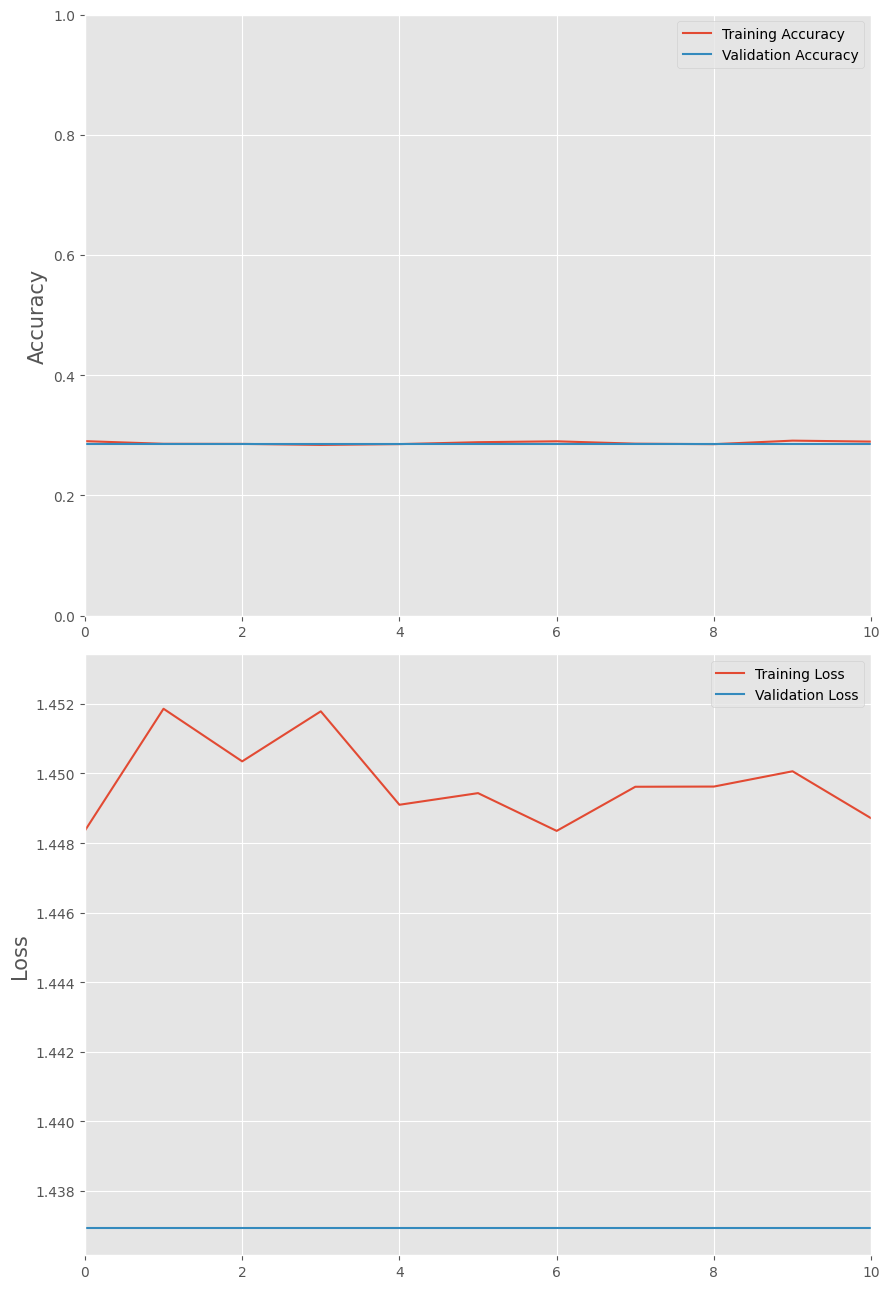

In [104]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_enb7_n, label='Training Accuracy')
axs[0].plot(test_acc_enb7_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_enb7_n, label='Training Loss')
axs[1].plot(test_loss_enb7_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,10])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("enb7 Training and Testing Loss")
plt.show()

In [22]:
np.array(scores_enb7).shape

In [23]:
y_pred_enb7 = np.argmax(scores_enb7,axis=2)

In [24]:
y_pred_enb7.shape

In [25]:
np.array(y_test_all_enb7).shape

In [26]:
from sklearn.metrics import accuracy_score
acc_scores_enb7 = []
for i in range(len(y_test_all_enb7)):
    acc_scores_enb7.append(accuracy_score(y_true = y_test_all_enb7[i],y_pred = y_pred_enb7[i]))

In [27]:
acc_scores_enb7

In [28]:
df_acc = pd.DataFrame([acc_scores_enb7])

df_acc.to_csv('enb7_accuracy', index=False)

df_acc = pd.read_csv('enb7_accuracy')

acc_scores_enb7 = df_acc.iloc[0].values

In [29]:
y_test_all_n = np.array(y_test_all_enb7)

y_pred_enb7_n = y_pred_enb7.flatten()
y_test_all_n = y_test_all_n.flatten()

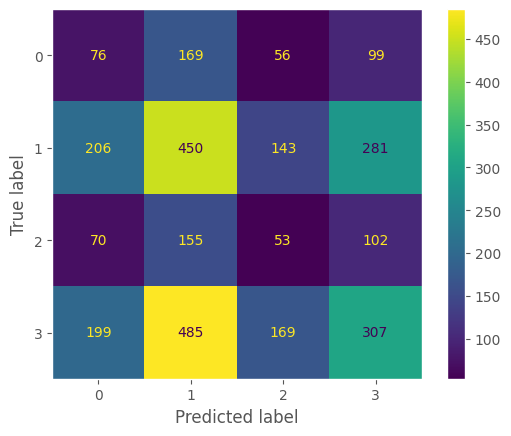

In [105]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_enb7_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("enb7")

plt.show()

In [106]:
import gc
gc.collect()

73146

In [107]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_enb7_n)
print(cf_r)

              precision    recall  f1-score   support

           0       0.14      0.19      0.16       400
           1       0.36      0.42      0.38      1080
           2       0.13      0.14      0.13       380
           3       0.39      0.26      0.32      1160

    accuracy                           0.29      3020
   macro avg       0.25      0.25      0.25      3020
weighted avg       0.31      0.29      0.30      3020



# ResNetV2

In [33]:
import gc
gc.collect()

In [34]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_rnv2 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_rnv2.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [35]:
def create_model_rnv2():

    model_rnv2 = tf.keras.Sequential([
    tf.keras.applications.ResNet50V2(input_shape=(X_n.shape[1], X_n.shape[2], X_n.shape[3]),include_top= False,weights='imagenet'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_rnv2.trainable = False
    return model_rnv2

In [36]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_rnv2 = []
y_test_all_rnv2 = []
train_acc_rnv2 = []
test_acc_rnv2 = []
train_loss_rnv2 = []
test_loss_rnv2 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_rnv2.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_rnv2 = None
    model_rnv2 = create_model_rnv2()
        
    model_rnv2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_rnv2.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [ reduce_lr,time_callback])
    
    
    x = model_rnv2.predict(X_test)
    
    scores_rnv2.append(x)
    train_acc_rnv2.append(history.history["accuracy"])
    test_acc_rnv2.append(history.history["val_accuracy"])
    train_loss_rnv2.append(history.history["loss"])
    test_loss_rnv2.append(history.history["val_loss"])
    
    gc.collect()

In [108]:
import gc
gc.collect()

0

In [109]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

times_rnv2_n = np.zeros((10,100))
for i, row in enumerate(times_rnv2):
    times_rnv2_n[i, :len(row)] = row

times_rnv2_n_n = np.mean(times_rnv2_n,axis=1)

plt.plot(times_rnv2_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")

plt.tight_layout()
plt.savefig("rnv2 times")
plt.show()

TypeError: 'numpy.float64' object is not iterable

In [39]:
train_acc_rnv2_n = np.zeros((10,100))
for i, row in enumerate(train_acc_rnv2):
    train_acc_rnv2_n[i, :len(row)] = row
    
test_acc_rnv2_n = np.zeros((10,100))
for i, row in enumerate(test_acc_rnv2):
    test_acc_rnv2_n[i, :len(row)] = row
    
train_loss_rnv2_n = np.zeros((10,100))
for i, row in enumerate(train_loss_rnv2):
    train_loss_rnv2_n[i, :len(row)] = row
    
test_loss_rnv2_n = np.zeros((10,100))
for i, row in enumerate(test_loss_rnv2):
    test_loss_rnv2_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_rnv2_n = np.mean(train_acc_rnv2_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_rnv2_n = np.mean(test_acc_rnv2_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_rnv2_n = np.mean(train_loss_rnv2_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_rnv2_n = np.mean(test_loss_rnv2_n,axis=0)

In [40]:
data = [train_acc_rnv2_n,test_acc_rnv2_n,train_loss_rnv2_n,test_loss_rnv2_n]

df = pd.DataFrame(data)
df.to_csv('rnv2_acc', index=False)
df = pd.read_csv('rnv2_acc')

train_acc_rnv2_n = df.iloc[0]
test_acc_rnv2_n = df.iloc[1]
train_loss_rnv2_n = df.iloc[2]
test_loss_rnv2_n = df.iloc[3]


df_t = pd.DataFrame([times_rnv2_n_n])
df_t.to_csv('rnv2_times', index=False)
df_t = pd.read_csv('rnv2_times')

times_rnv2_n_n = df_t.iloc[0]

In [41]:
train_acc_rnv2_n

In [42]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_rnv2_n, label='Training Accuracy')
axs[0].plot(test_acc_rnv2_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_rnv2_n, label='Training Loss')
axs[1].plot(test_loss_rnv2_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("rnv2 Training and Testing Loss")
plt.show()

In [43]:
np.array(scores_rnv2).shape

In [44]:
y_pred_rnv2 = np.argmax(scores_rnv2,axis=2)

In [45]:
y_pred_rnv2.shape

In [46]:
from sklearn.metrics import accuracy_score
acc_scores_rnv2 = []
for i in range(len(y_test_all_rnv2)):
    acc_scores_rnv2.append(accuracy_score(y_true = y_test_all_rnv2[i],y_pred = y_pred_rnv2[i]))

In [47]:
import gc
gc.collect()

In [48]:
acc_scores_rnv2

In [49]:
df_acc = pd.DataFrame([acc_scores_rnv2])

df_acc.to_csv('rnv2_accuracy', index=False)

df_acc = pd.read_csv('rnv2_accuracy')

acc_scores_rnv2 = df_acc.iloc[0].values

In [50]:
y_test_all_n = np.array(y_test_all_rnv2)

y_pred_rnv2_n = y_pred_rnv2.flatten()
y_test_all_n = y_test_all_n.flatten()

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_rnv2_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("rnv2")
plt.show()

In [52]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_rnv2_n)
print(cf_r)

# VGG16

In [53]:
import gc
gc.collect()

In [54]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_vgg16 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_vgg16.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [55]:
def create_model_vgg16():

    model_vgg16 = tf.keras.Sequential([
    tf.keras.applications.VGG16(input_shape=(X_n.shape[1], X_n.shape[2], X_n.shape[3]),include_top= False,weights='imagenet'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_vgg16.trainable = False
    return model_vgg16

In [56]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_vgg16 = []
y_test_all_vgg16 = []
train_acc_vgg16 = []
test_acc_vgg16 = []
train_loss_vgg16 = []
test_loss_vgg16 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_vgg16.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_vgg16 = None
    model_vgg16 = create_model_vgg16()
        
    model_vgg16.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_vgg16.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_vgg16.predict(X_test)
    
    scores_vgg16.append(x)
    train_acc_vgg16.append(history.history["accuracy"])
    test_acc_vgg16.append(history.history["val_accuracy"])
    train_loss_vgg16.append(history.history["loss"])
    test_loss_vgg16.append(history.history["val_loss"])
    
    gc.collect()

In [57]:
import gc
gc.collect()

In [58]:
import matplotlib.pyplot as plt

times_vgg16_n = np.zeros((10,100))
for i, row in enumerate(times_vgg16):
    times_vgg16_n[i, :len(row)] = row

times_vgg16_n_n = np.mean(times_vgg16_n,axis=1)

plt.plot(times_vgg16_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("vgg16 times")
plt.show()

In [59]:
train_acc_vgg16_n = np.zeros((10,100))
for i, row in enumerate(train_acc_vgg16):
    train_acc_vgg16_n[i, :len(row)] = row
    
test_acc_vgg16_n = np.zeros((10,100))
for i, row in enumerate(test_acc_vgg16):
    test_acc_vgg16_n[i, :len(row)] = row
    
train_loss_vgg16_n = np.zeros((10,100))
for i, row in enumerate(train_loss_vgg16):
    train_loss_vgg16_n[i, :len(row)] = row
    
test_loss_vgg16_n = np.zeros((10,100))
for i, row in enumerate(test_loss_vgg16):
    test_loss_vgg16_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_vgg16_n = np.mean(train_acc_vgg16_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_vgg16_n = np.mean(test_acc_vgg16_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_vgg16_n = np.mean(train_loss_vgg16_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_vgg16_n = np.mean(test_loss_vgg16_n,axis=0)

In [60]:
data = [train_acc_vgg16_n,test_acc_vgg16_n,train_loss_vgg16_n,test_loss_vgg16_n]

df = pd.DataFrame(data)
df.to_csv('vgg16_acc', index=False)
df = pd.read_csv('vgg16_acc')

train_acc_vgg16_n = df.iloc[0]
test_acc_vgg16_n = df.iloc[1]
train_loss_vgg16_n = df.iloc[2]
test_loss_vgg16_n = df.iloc[3]


df_t = pd.DataFrame([times_vgg16_n_n])
df_t.to_csv('vgg16_times', index=False)
df_t = pd.read_csv('vgg16_times')

times_vgg16_n_n = df_t.iloc[0]

In [61]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_vgg16_n, label='Training Accuracy')
axs[0].plot(test_acc_vgg16_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_vgg16_n, label='Training Loss')
axs[1].plot(test_loss_vgg16_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
# axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("vgg16 Training and Testing Loss")
plt.show()

In [62]:
np.array(scores_vgg16).shape

In [63]:
y_pred_vgg16 = np.argmax(scores_vgg16,axis=2)

In [64]:
y_pred_vgg16.shape

In [65]:
from sklearn.metrics import accuracy_score
acc_scores_vgg16 = []
for i in range(len(y_test_all_vgg16)):
    acc_scores_vgg16.append(accuracy_score(y_true = y_test_all_vgg16[i],y_pred = y_pred_vgg16[i]))

In [66]:
acc_scores_vgg16

In [67]:
df_acc = pd.DataFrame([acc_scores_vgg16])

df_acc.to_csv('vgg16_accuracy', index=False)

df_acc = pd.read_csv('vgg16_accuracy')

acc_scores_vgg16 = df_acc.iloc[0].values

In [68]:
y_test_all_n = np.array(y_test_all_vgg16)

y_pred_vgg16_n = y_pred_vgg16.flatten()
y_test_all_n = y_test_all_n.flatten()

In [69]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_vgg16_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("vgg16")
plt.show()

In [70]:
import gc
gc.collect()

In [71]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_vgg16_n)
print(cf_r)

# VGG19

In [72]:
import gc
gc.collect()

In [73]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import time
times_vgg19 = []

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print('Time taken for epoch %s: %.2f seconds' % (epoch+1, epoch_time))
        
    def on_train_end(self,logs={}):
        times_vgg19.append(self.times)

# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',factor = 0.2, patience = 7, verbose = 1, min_delta = 0.0001)
time_callback = TimeHistory()

In [74]:
def create_model_vgg19():

    model_vgg19 = tf.keras.Sequential([
    tf.keras.applications.VGG19(input_shape=(X_n.shape[1], X_n.shape[2], X_n.shape[3]),include_top= False,weights='imagenet'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
    model_vgg19.trainable = False
    return model_vgg19

In [75]:
import warnings
warnings.filterwarnings("ignore", message=".*contains input name.*unsupported characters.*")
from sklearn.model_selection import StratifiedKFold
import gc

skf = StratifiedKFold(n_splits=10, shuffle=True)

scores_vgg19 = []
y_test_all_vgg19 = []
train_acc_vgg19 = []
test_acc_vgg19 = []
train_loss_vgg19 = []
test_loss_vgg19 = []

for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print ("Training on fold " + str(index+1) + "/10...")
    
    X_train, X_test = X_n[train_indices], X_n[val_indices]
    y_train, y_test = y[train_indices], y[val_indices]
    
    y_test_all_vgg19.append(y_test)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, shuffle= True)
    
    model_vgg19 = None
    model_vgg19 = create_model_vgg19()
        
    model_vgg19.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    history = model_vgg19.fit(X_train, y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=100, callbacks = [reduce_lr,time_callback])
    
    
    x = model_vgg19.predict(X_test)
    
    scores_vgg19.append(x)
    train_acc_vgg19.append(history.history["accuracy"])
    test_acc_vgg19.append(history.history["val_accuracy"])
    train_loss_vgg19.append(history.history["loss"])
    test_loss_vgg19.append(history.history["val_loss"])
    
    gc.collect()

In [76]:
times_vgg19

In [77]:
import gc
gc.collect()

In [78]:
import matplotlib.pyplot as plt

times_vgg19_n = np.zeros((10,100))
for i, row in enumerate(times_vgg19):
    times_vgg19_n[i, :len(row)] = row

times_vgg19_n_n = np.mean(times_vgg19_n,axis=1)

plt.plot(times_vgg19_n_n)
plt.xlabel("No. of fold")
plt.ylabel("Avg time for each fold")
plt.style.use('ggplot')
plt.tight_layout()
plt.savefig("vgg19 times")
plt.show()

In [79]:
train_acc_vgg19_n = np.zeros((10,100))
for i, row in enumerate(train_acc_vgg19):
    train_acc_vgg19_n[i, :len(row)] = row
    
test_acc_vgg19_n = np.zeros((10,100))
for i, row in enumerate(test_acc_vgg19):
    test_acc_vgg19_n[i, :len(row)] = row
    
train_loss_vgg19_n = np.zeros((10,100))
for i, row in enumerate(train_loss_vgg19):
    train_loss_vgg19_n[i, :len(row)] = row
    
test_loss_vgg19_n = np.zeros((10,100))
for i, row in enumerate(test_loss_vgg19):
    test_loss_vgg19_n[i, :len(row)] = row
    
# train_acc_cnn_svm_n = np.array(train_acc_cnn_svm)
train_acc_vgg19_n = np.mean(train_acc_vgg19_n,axis=0)

# test_acc_cnn_svm_n = np.array(test_acc_cnn_svm)
test_acc_vgg19_n = np.mean(test_acc_vgg19_n,axis=0)

# train_loss_cnn_svm_n = np.array(train_loss_cnn_svm)
train_loss_vgg19_n = np.mean(train_loss_vgg19_n,axis=0)

# test_loss_cnn_svm_n = np.array(test_loss_cnn_svm)
test_loss_vgg19_n = np.mean(test_loss_vgg19_n,axis=0)

In [80]:
data = [train_acc_vgg19_n,test_acc_vgg19_n,train_loss_vgg19_n,test_loss_vgg19_n]

df = pd.DataFrame(data)
df.to_csv('vgg19_acc', index=False)
df = pd.read_csv('vgg19_acc')

train_acc_vgg19_n = df.iloc[0]
test_acc_vgg19_n = df.iloc[1]
train_loss_vgg19_n = df.iloc[2]
test_loss_vgg19_n = df.iloc[3]


df_t = pd.DataFrame([times_vgg19_n_n])
df_t.to_csv('vgg19_times', index=False)
df_t = pd.read_csv('vgg19_times')

times_vgg19_n_n = df_t.iloc[0]

In [81]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,figsize=(9,13))

axs[0].plot(train_acc_vgg19_n, label='Training Accuracy')
axs[0].plot(test_acc_vgg19_n, label='Validation Accuracy')
# axs[0].set_title('Accuracy of 10 fold Cross validation',size='20')
axs[0].set_ylabel('Accuracy',size='15')
# axs[0].set_xlabel('Epochs',size='15')
axs[0].set_ylim([0,1])
axs[0].set_xlim([0,10])
axs[0].legend()


# Plot loss curve
axs[1].plot(train_loss_vgg19_n, label='Training Loss')
axs[1].plot(test_loss_vgg19_n, label='Validation Loss')
# axs[1].set_title('Loss of 10 fold Cross validation',size='20')
axs[1].set_ylabel('Loss',size='15')
# axs[1].set_xlabel('Epochs',size='15')
axs[1].set_ylim([0,1])
axs[1].set_xlim([0,10])
axs[1].legend()

plt.tight_layout()
# plt.style.use("seaborn-v0_8-whitegrid")
plt.style.use('ggplot')
plt.savefig("vgg19 Training and Testing Loss")
plt.show()

In [82]:
np.array(scores_vgg19).shape

In [83]:
y_pred_vgg19 = np.argmax(scores_vgg19,axis=2)

In [84]:
y_pred_vgg19.shape

In [85]:
from sklearn.metrics import accuracy_score
acc_scores_vgg19 = []
for i in range(len(y_test_all_vgg19)):
    acc_scores_vgg19.append(accuracy_score(y_true = y_test_all_vgg19[i],y_pred = y_pred_vgg19[i]))

In [86]:
acc_scores_vgg19

In [87]:
df_acc = pd.DataFrame([acc_scores_vgg19])

df_acc.to_csv('vgg19_accuracy', index=False)

df_acc = pd.read_csv('vgg19_accuracy')

acc_scores_vgg19 = df_acc.iloc[0].values

In [88]:
y_test_all_n = np.array(y_test_all_vgg19)

y_pred_vgg19_n = y_pred_vgg19.flatten()
y_test_all_n = y_test_all_n.flatten()

In [89]:
import gc
gc.collect()

In [90]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_all_n, y_pred_vgg19_n)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.savefig("vgg19")
plt.show()

In [91]:
from sklearn.metrics import classification_report
cf_r= classification_report(y_test_all_n, y_pred_vgg19_n)
print(cf_r)

In [111]:
train_loss_vgg19_n.shape

(100,)

#  Performance Metrics

## accuracy_score Metrics

In [112]:
df_acc = pd.read_csv('cnn_svm_accuracy')
acc_scores_cnn_svm = df_acc.iloc[0].values


df_acc = pd.read_csv('lstm_accuracy')
acc_scores_lstm = df_acc.iloc[0].values


df_acc = pd.read_csv('bilstm_accuracy')
acc_scores_bilstm = df_acc.iloc[0].values


df_acc = pd.read_csv('birnn_accuracy')
acc_scores_birnn = df_acc.iloc[0].values



df_acc = pd.read_csv('mnv2_accuracy')
acc_scores_mnv2 = df_acc.iloc[0].values


df_acc = pd.read_csv('env2l_accuracy')
acc_scores_env2l = df_acc.iloc[0].values


df_acc = pd.read_csv('enb7_accuracy')
acc_scores_enb7 = df_acc.iloc[0].values


df_acc = pd.read_csv('nnl_accuracy')
acc_scores_nnl = df_acc.iloc[0].values


df_acc = pd.read_csv('nnb_accuracy')
acc_scores_nnb = df_acc.iloc[0].values



df_acc = pd.read_csv('axn_accuracy')
acc_scores_axn = df_acc.iloc[0].values



df_acc = pd.read_csv('rnv2_accuracy')
acc_scores_rnv2 = df_acc.iloc[0].values



df_acc = pd.read_csv('xv3_accuracy')
acc_scores_xv3 = df_acc.iloc[0].values



df_acc = pd.read_csv('vgg16_accuracy')
acc_scores_vgg16 = df_acc.iloc[0].values



df_acc = pd.read_csv('vgg19_accuracy')
acc_scores_vgg19 = df_acc.iloc[0].values

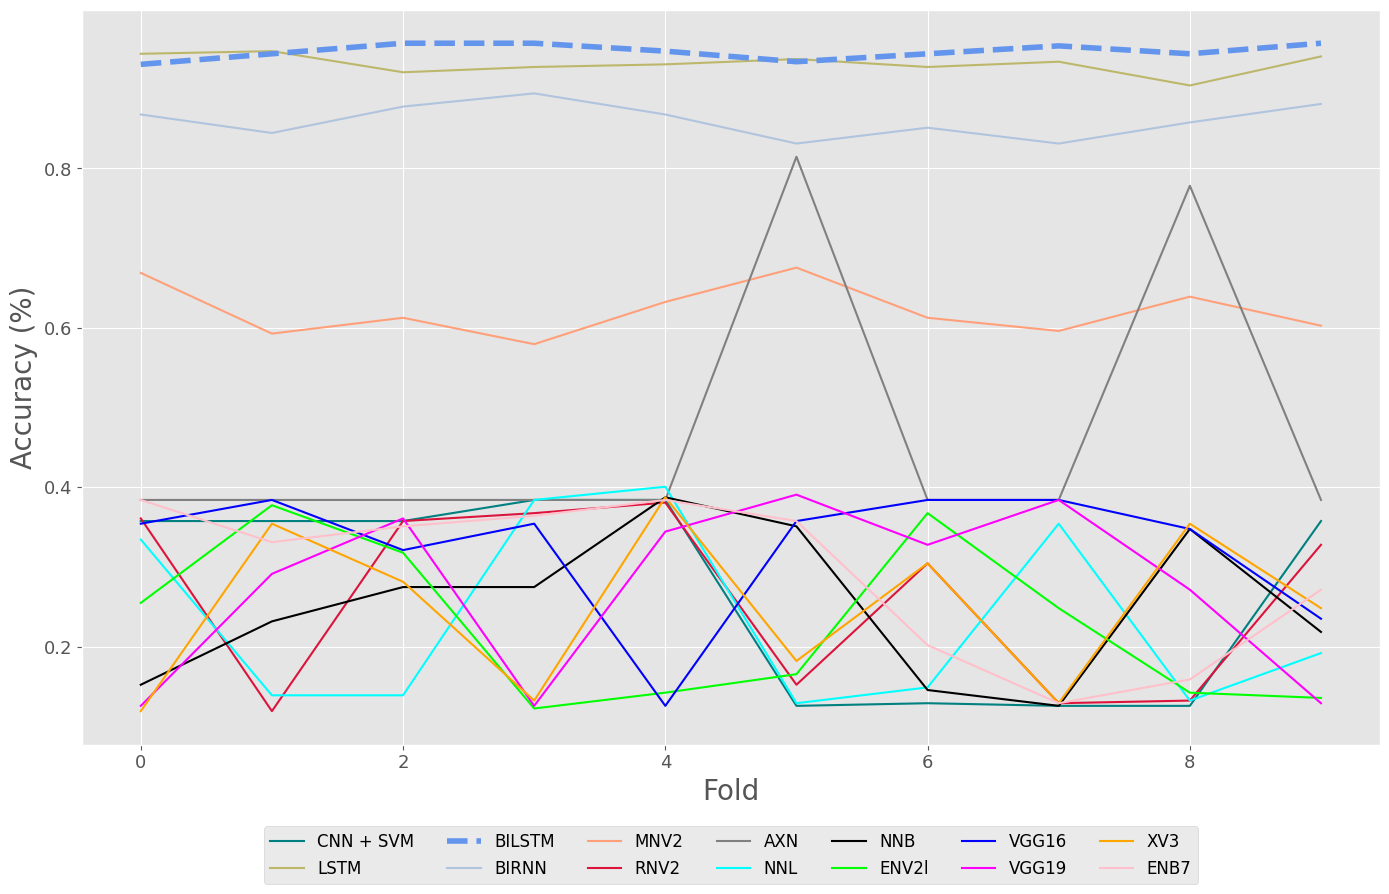

In [113]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(acc_scores_cnn_svm,label='CNN + SVM',color='teal')
plt.plot(acc_scores_lstm,label='LSTM',color='darkkhaki')
plt.plot(acc_scores_bilstm,label='BILSTM',color='cornflowerblue',linewidth=4,linestyle='--')
plt.plot(acc_scores_birnn,label='BIRNN',color='lightsteelblue')
plt.plot(acc_scores_mnv2,label='MNV2',color = 'lightsalmon')
plt.plot(acc_scores_rnv2,label='RNV2',color='crimson')
plt.plot(acc_scores_axn,label='AXN',color='gray')
plt.plot(acc_scores_nnl,label='NNL',color='cyan')
plt.plot(acc_scores_nnb,label='NNB',color='black')
plt.plot(acc_scores_env2l,label='ENV2l',color='lime')
plt.plot(acc_scores_vgg16,label='VGG16',color='blue')
plt.plot(acc_scores_vgg19,label='VGG19',color='fuchsia')
plt.plot(acc_scores_xv3,label='XV3',color='orange')
plt.plot(acc_scores_enb7,label='ENB7',color='pink')

plt.xlabel("Fold",fontsize = 20)
plt.ylabel("Accuracy (%)",fontsize = 20)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="12")
plt.tight_layout()
plt.savefig("Deep Learning Chroma Accuracy")
plt.show()

## Times Metrics

In [114]:
df_acc = pd.read_csv('cnn_svm_times')
times_cnn_svm = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('lstm_times')
times_lstm = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('bilstm_times')
times_bilstm = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('birnn_times')
times_birnn = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('mnv2_times')
times_mnv2 = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('env2l_times')
times_env2l = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('enb7_times')
times_enb7 = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('nnl_times')
times_nnl = np.mean(df_acc.iloc[0].values)


df_acc = pd.read_csv('nnb_times')
times_nnb = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('axn_times')
times_axn = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('rnv2_times')
times_rnv2 = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('xv3_times')
times_xv3 = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('vgg16_times')
times_vgg16 = np.mean(df_acc.iloc[0].values)



df_acc = pd.read_csv('vgg19_times')
times_vgg19 = np.mean(df_acc.iloc[0].values)

In [115]:
df_acc = pd.read_csv('vgg19_times')
times_vgg19 = df_acc.iloc[0].values
times_vgg19

array([6.04649127, 6.04691244, 6.03660063, 6.0451577 , 6.04387231,
       6.04413286, 6.04449401, 6.04415892, 6.04480412, 6.04677386])

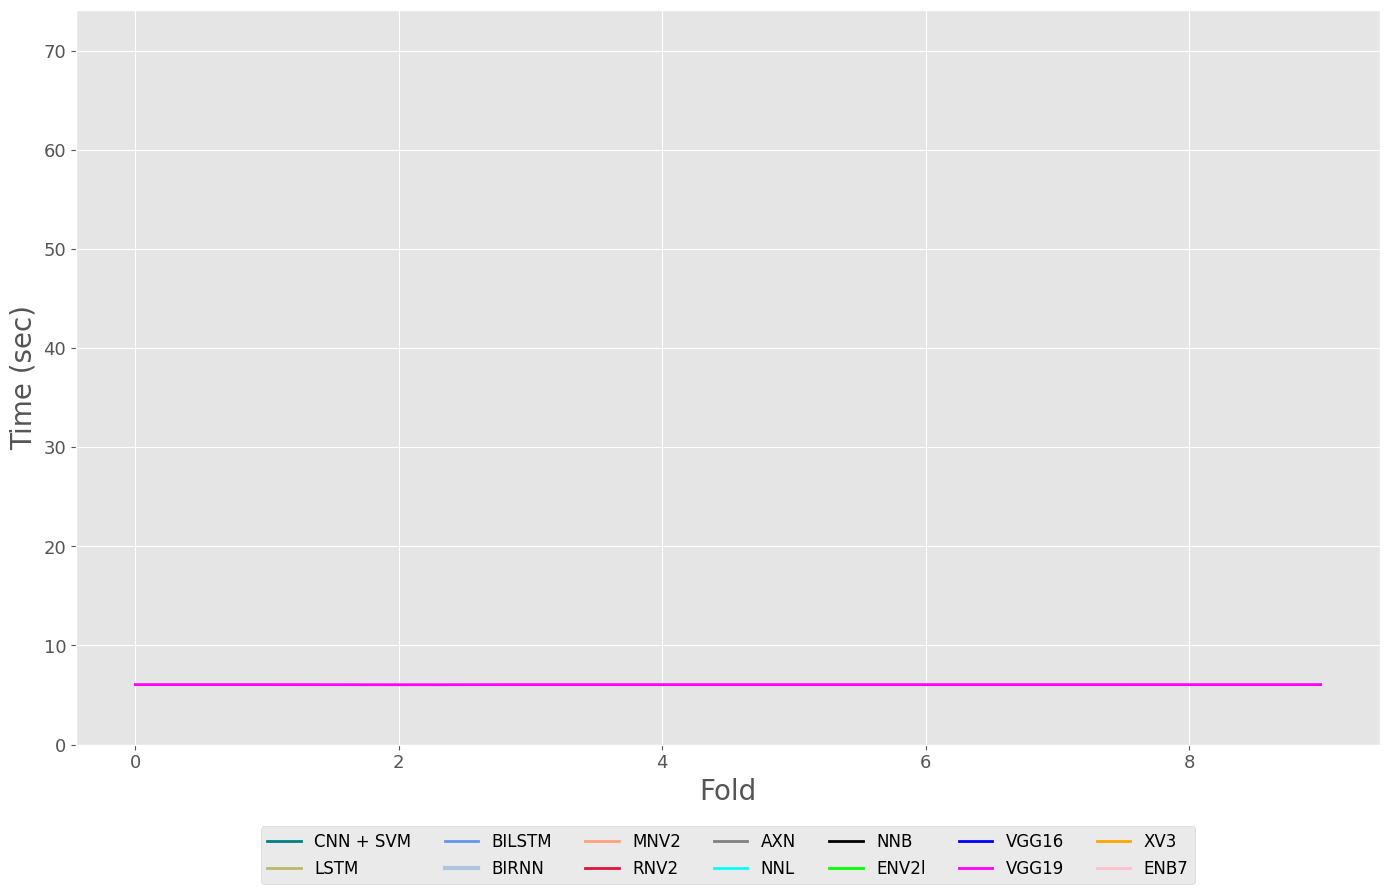

In [116]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(times_cnn_svm,label='CNN + SVM',color='teal',linewidth=2)
plt.plot(times_lstm,label='LSTM',color='darkkhaki',linewidth=2)
plt.plot(times_bilstm,label='BILSTM',color='cornflowerblue',linewidth=2)
plt.plot(times_birnn,label='BIRNN',color='lightsteelblue',linewidth=3)
plt.plot(times_mnv2,label='MNV2',color = 'lightsalmon',linewidth=2)
plt.plot(times_rnv2,label='RNV2',color='crimson',linewidth=2)
plt.plot(times_axn,label='AXN',color='gray',linewidth=2)
plt.plot(times_nnl,label='NNL',color='cyan',linewidth=2)
plt.plot(times_nnb,label='NNB',color='black',linewidth=2)
plt.plot(times_env2l,label='ENV2l',color='lime',linewidth=2)
plt.plot(times_vgg16,label='VGG16',color='blue',linewidth=2)
plt.plot(times_vgg19,label='VGG19',color='fuchsia',linewidth=2)
plt.plot(times_xv3,label='XV3',color='orange',linewidth=2)
plt.plot(times_enb7,label='ENB7',color='pink',linewidth=2)

plt.xlabel("Fold",fontsize = 20)
plt.ylabel("Time (sec)",fontsize = 20)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.ylim(y.min(),)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="12")
plt.tight_layout()
plt.savefig("Deep Learning Chroma Times")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


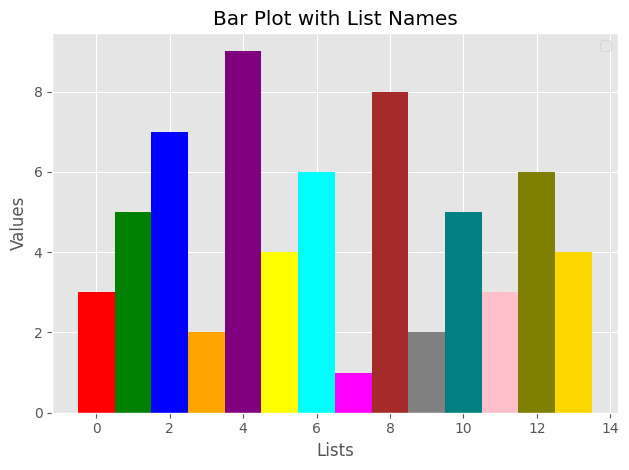

In [117]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
# List names
list_names = ["List 1", "List 2", "List 3", "List 4", "List 5", "List 6", "List 7", "List 8", "List 9", "List 10", "List 11", "List 12", "List 13", "List 14"]

# Data values for each list
data_values = [3, 5, 7, 2, 9, 4, 6, 1, 8, 2, 5, 3, 6, 4]

# Custom colors for each bar
custom_colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'brown', 'gray', 'teal', 'pink', 'olive', 'gold']

# Width of each bar
bar_width = 1

# Calculate the positions of the bars on the x-axis
bar_positions = np.arange(len(data_values))

# Creating the bar plot
plt.bar(bar_positions, data_values, color=custom_colors, width=bar_width)

# Adding labels to each bar
# for i in range(len(list_names)):
#     plt.text(bar_positions[i], data_values[i], list_names[i], ha='center', va='bottom')

# Customizing the plot
plt.xlabel('Lists')
plt.ylabel('Values')
plt.title('Bar Plot with List Names')
# plt.xticks(bar_positions, list_names, rotation=45)

# Displaying the plot
plt.tight_layout()
plt.legend()
plt.show()


# Training and Testing Perfomance

In [118]:
df_acc = pd.read_csv('cnn_svm_acc')
train_acc_cnn_svm_n = df_acc.iloc[0].values
test_acc_cnn_svm_n = df_acc.iloc[1].values
train_loss_cnn_svm_n = df_acc.iloc[2].values
test_loss_cnn_svm_n = df_acc.iloc[3].values

df_acc = pd.read_csv('lstm_acc')
train_acc_lstm_n = df_acc.iloc[0].values
test_acc_lstm_n = df_acc.iloc[1].values
train_loss_lstm_n = df_acc.iloc[2].values
test_loss_lstm_n = df_acc.iloc[3].values


df_acc = pd.read_csv('bilstm_acc')
train_acc_bilstm_n = df_acc.iloc[0].values
test_acc_bilstm_n = df_acc.iloc[1].values
train_loss_bilstm_n = df_acc.iloc[2].values
test_loss_bilstm_n = df_acc.iloc[3].values


df_acc = pd.read_csv('birnn_acc')
train_acc_birnn_n = df_acc.iloc[0].values
test_acc_birnn_n = df_acc.iloc[1].values
train_loss_birnn_n = df_acc.iloc[2].values
test_loss_birnn_n = df_acc.iloc[3].values



df_acc = pd.read_csv('mnv2_acc')
train_acc_mnv2_n = df_acc.iloc[0].values
test_acc_mnv2_n = df_acc.iloc[1].values
train_loss_mnv2_n = df_acc.iloc[2].values
test_loss_mnv2_n = df_acc.iloc[3].values


df_acc = pd.read_csv('env2l_acc')
train_acc_env2l_n = df_acc.iloc[0].values
test_acc_env2l_n = df_acc.iloc[1].values
train_loss_env2l_n = df_acc.iloc[2].values
test_loss_env2l_n = df_acc.iloc[3].values


df_acc = pd.read_csv('enb7_acc')
train_acc_enb7_n = df_acc.iloc[0].values
test_acc_enb7_n = df_acc.iloc[1].values
train_loss_enb7_n = df_acc.iloc[2].values
test_loss_enb7_n = df_acc.iloc[3].values


df_acc = pd.read_csv('nnl_acc')
train_acc_nnl_n = df_acc.iloc[0].values
test_acc_nnl_n = df_acc.iloc[1].values
train_loss_nnl_n = df_acc.iloc[2].values
test_loss_nnl_n = df_acc.iloc[3].values


df_acc = pd.read_csv('nnb_acc')
train_acc_nnb_n = df_acc.iloc[0].values
test_acc_nnb_n = df_acc.iloc[1].values
train_loss_nnb_n = df_acc.iloc[2].values
test_loss_nnb_n = df_acc.iloc[3].values



df_acc = pd.read_csv('axn_acc')
train_acc_axn_n = df_acc.iloc[0].values
test_acc_axn_n = df_acc.iloc[1].values
train_loss_axn_n = df_acc.iloc[2].values
test_loss_axn_n = df_acc.iloc[3].values



df_acc = pd.read_csv('rnv2_acc')
train_acc_rnv2_n = df_acc.iloc[0].values
test_acc_rnv2_n = df_acc.iloc[1].values
train_loss_rnv2_n = df_acc.iloc[2].values
test_loss_rnv2_n = df_acc.iloc[3].values



df_acc = pd.read_csv('xv3_acc')
train_acc_xv3_n = df_acc.iloc[0].values
test_acc_xv3_n = df_acc.iloc[1].values
train_loss_xv3_n = df_acc.iloc[2].values
test_loss_xv3_n = df_acc.iloc[3].values



df_acc = pd.read_csv('vgg16_acc')
train_acc_vgg16_n = df_acc.iloc[0].values
test_acc_vgg16_n = df_acc.iloc[1].values
train_loss_vgg16_n = df_acc.iloc[2].values
test_loss_vgg16_n = df_acc.iloc[3].values



df_acc = pd.read_csv('vgg19_acc')
train_acc_vgg19_n = df_acc.iloc[0].values
test_acc_vgg19_n = df_acc.iloc[1].values
train_loss_vgg19_n = df_acc.iloc[2].values
test_loss_vgg19_n = df_acc.iloc[3].values

## Training Accuracy Perfomance

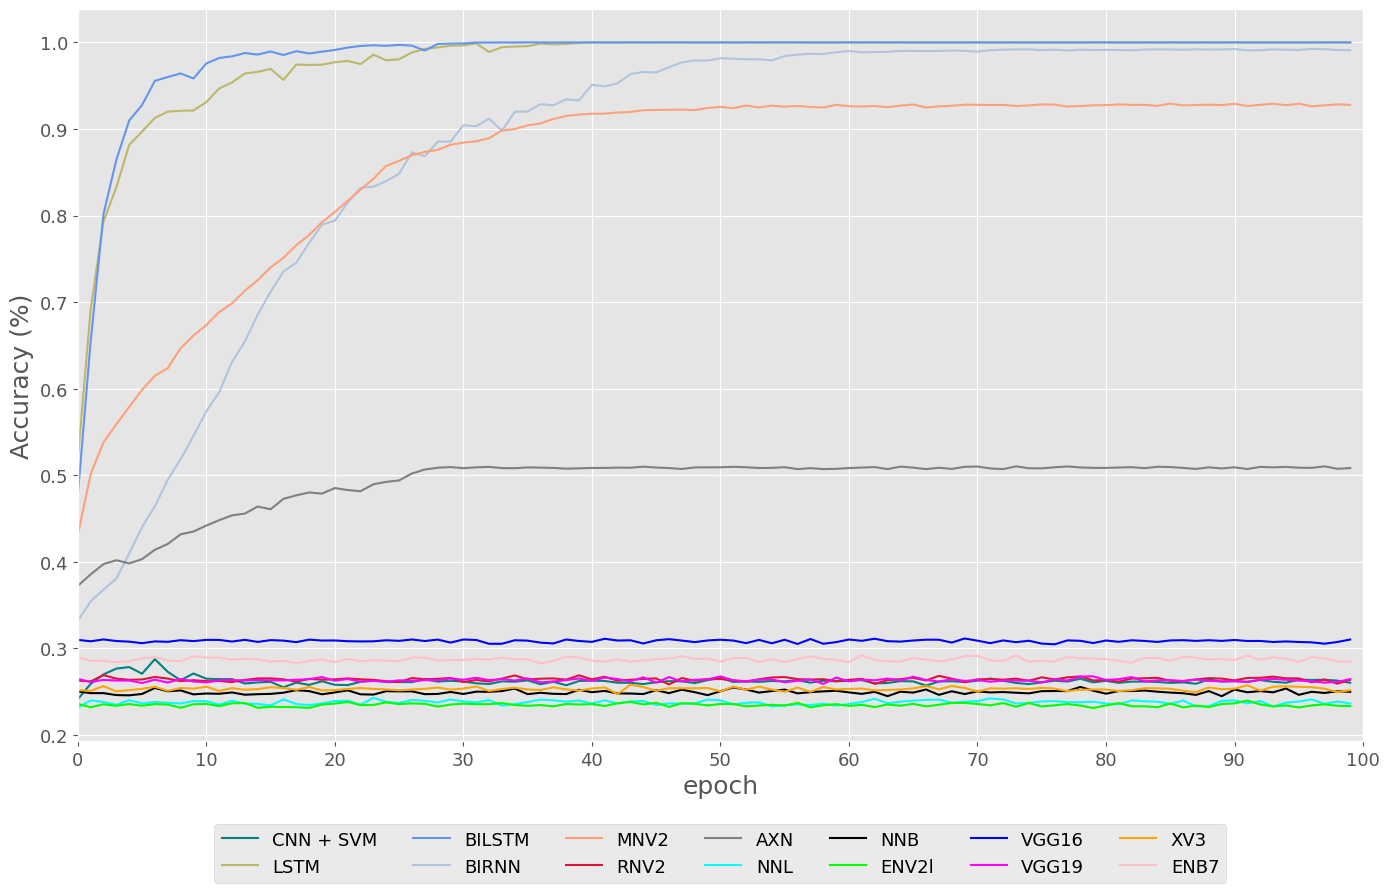

In [119]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(train_acc_cnn_svm_n,label='CNN + SVM',color='teal')
plt.plot(train_acc_lstm_n,label='LSTM',color='darkkhaki')
plt.plot(train_acc_bilstm_n,label='BILSTM',color='cornflowerblue')#,linewidth=4,linestyle='--')
plt.plot(train_acc_birnn_n,label='BIRNN',color='lightsteelblue')
plt.plot(train_acc_mnv2_n,label='MNV2',color = 'lightsalmon')
plt.plot(train_acc_rnv2_n,label='RNV2',color='crimson')
plt.plot(train_acc_axn_n,label='AXN',color='gray')
plt.plot(train_acc_nnl_n,label='NNL',color='cyan')
plt.plot(train_acc_nnb_n,label='NNB',color='black')
plt.plot(train_acc_env2l_n,label='ENV2l',color='lime')
plt.plot(train_acc_vgg16_n,label='VGG16',color='blue')
plt.plot(train_acc_vgg19_n,label='VGG19',color='fuchsia')
plt.plot(train_acc_xv3_n,label='XV3',color='orange')
plt.plot(train_acc_enb7_n,label='ENB7',color='pink')

plt.xlabel("epoch",fontsize = 18)
plt.xticks(np.arange(0, 101, 10), np.arange(0, 101, 10))
plt.xlim(0, 100)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.ylabel("Accuracy (%)",fontsize = 18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="13")
plt.tight_layout()
plt.savefig("Training Accuracy Performance")
plt.show()

## Testing Accuracy Perfomance

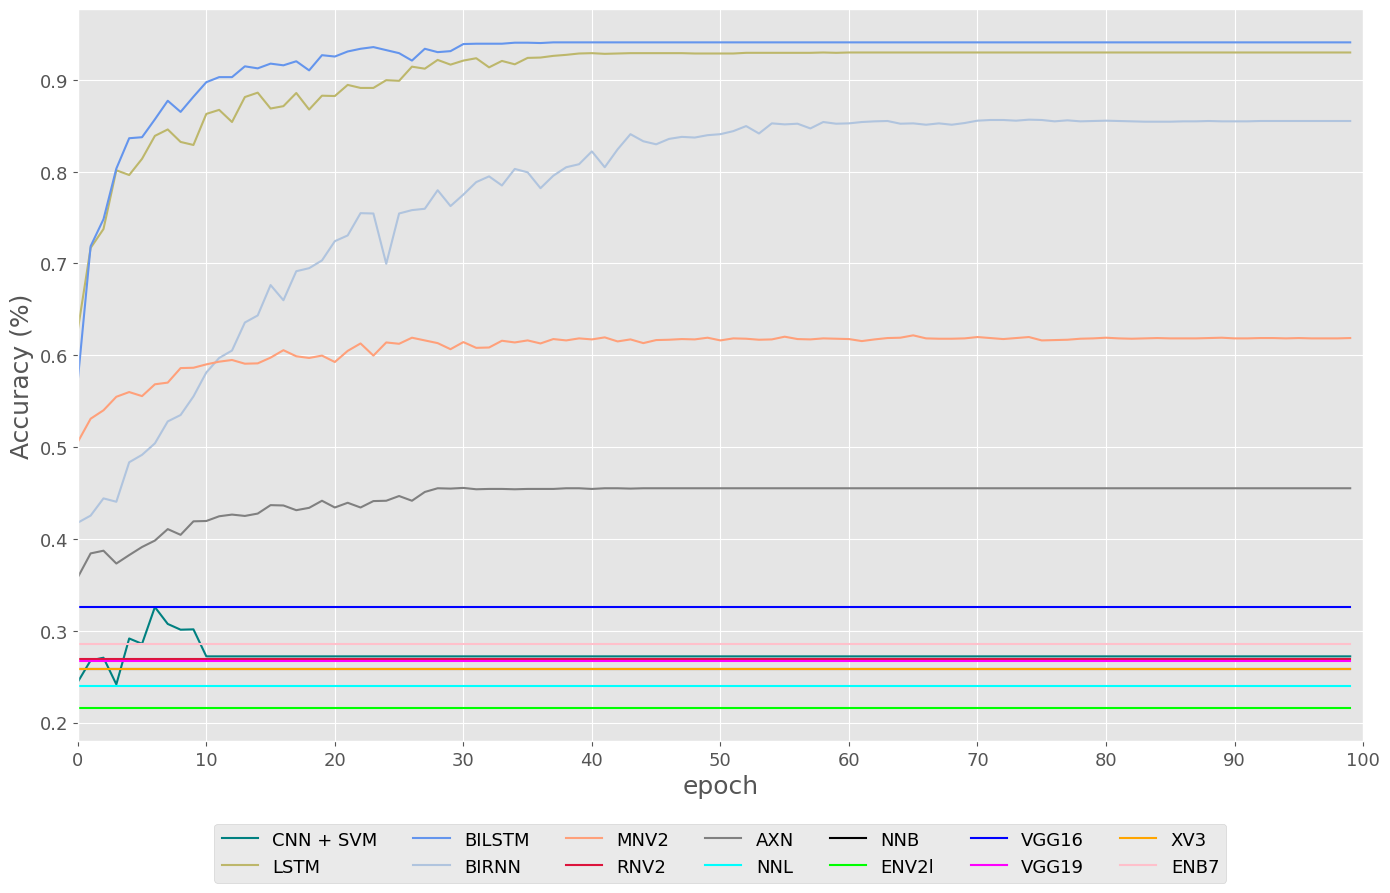

In [120]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(test_acc_cnn_svm_n,label='CNN + SVM',color='teal')
plt.plot(test_acc_lstm_n,label='LSTM',color='darkkhaki')
plt.plot(test_acc_bilstm_n,label='BILSTM',color='cornflowerblue')#,linewidth=4,linestyle='--')
plt.plot(test_acc_birnn_n,label='BIRNN',color='lightsteelblue')
plt.plot(test_acc_mnv2_n,label='MNV2',color = 'lightsalmon')
plt.plot(test_acc_rnv2_n,label='RNV2',color='crimson')
plt.plot(test_acc_axn_n,label='AXN',color='gray')
plt.plot(test_acc_nnl_n,label='NNL',color='cyan')
plt.plot(test_acc_nnb_n,label='NNB',color='black')
plt.plot(test_acc_env2l_n,label='ENV2l',color='lime')
plt.plot(test_acc_vgg16_n,label='VGG16',color='blue')
plt.plot(test_acc_vgg19_n,label='VGG19',color='fuchsia')
plt.plot(test_acc_xv3_n,label='XV3',color='orange')
plt.plot(test_acc_enb7_n,label='ENB7',color='pink')

plt.xlabel("epoch",fontsize = 18)
plt.xticks(np.arange(0, 101, 10), np.arange(0, 101, 10))
plt.xlim(0, 100)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.ylabel("Accuracy (%)",fontsize = 18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="13")
plt.tight_layout()
plt.savefig("Testing Accuracy Performance")
plt.show()

## Training Loss Perfomance

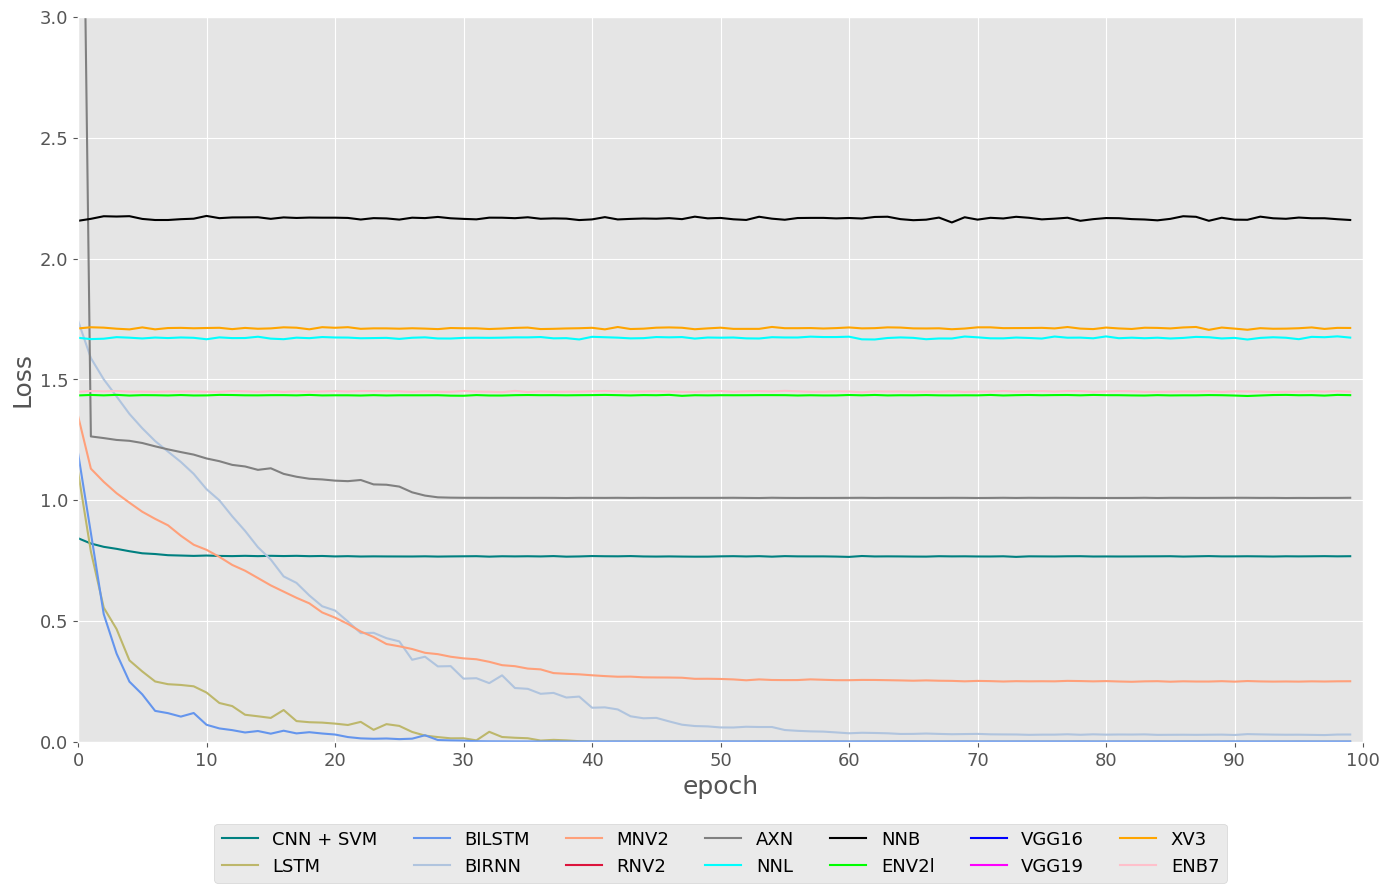

In [121]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(train_loss_cnn_svm_n,label='CNN + SVM',color='teal')
plt.plot(train_loss_lstm_n,label='LSTM',color='darkkhaki')
plt.plot(train_loss_bilstm_n,label='BILSTM',color='cornflowerblue')#,linewidth=4,linestyle='--')
plt.plot(train_loss_birnn_n,label='BIRNN',color='lightsteelblue')
plt.plot(train_loss_mnv2_n,label='MNV2',color = 'lightsalmon')
plt.plot(train_loss_rnv2_n,label='RNV2',color='crimson')
plt.plot(train_loss_axn_n,label='AXN',color='gray')
plt.plot(train_loss_nnl_n,label='NNL',color='cyan')
plt.plot(train_loss_nnb_n,label='NNB',color='black')
plt.plot(train_loss_env2l_n,label='ENV2l',color='lime')
plt.plot(train_loss_vgg16_n,label='VGG16',color='blue')
plt.plot(train_loss_vgg19_n,label='VGG19',color='fuchsia')
plt.plot(train_loss_xv3_n,label='XV3',color='orange')
plt.plot(train_loss_enb7_n,label='ENB7',color='pink')

plt.xlabel("epoch",fontsize = 18)
plt.xticks(np.arange(0, 101, 10), np.arange(0, 101, 10))
plt.xlim(0, 100)
plt.ylim(y.min(),y.max())
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.ylabel("Loss",fontsize = 18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="13")
plt.tight_layout()
plt.savefig("Training Loss Performance")
plt.show()

## Testing Loss Perfomance

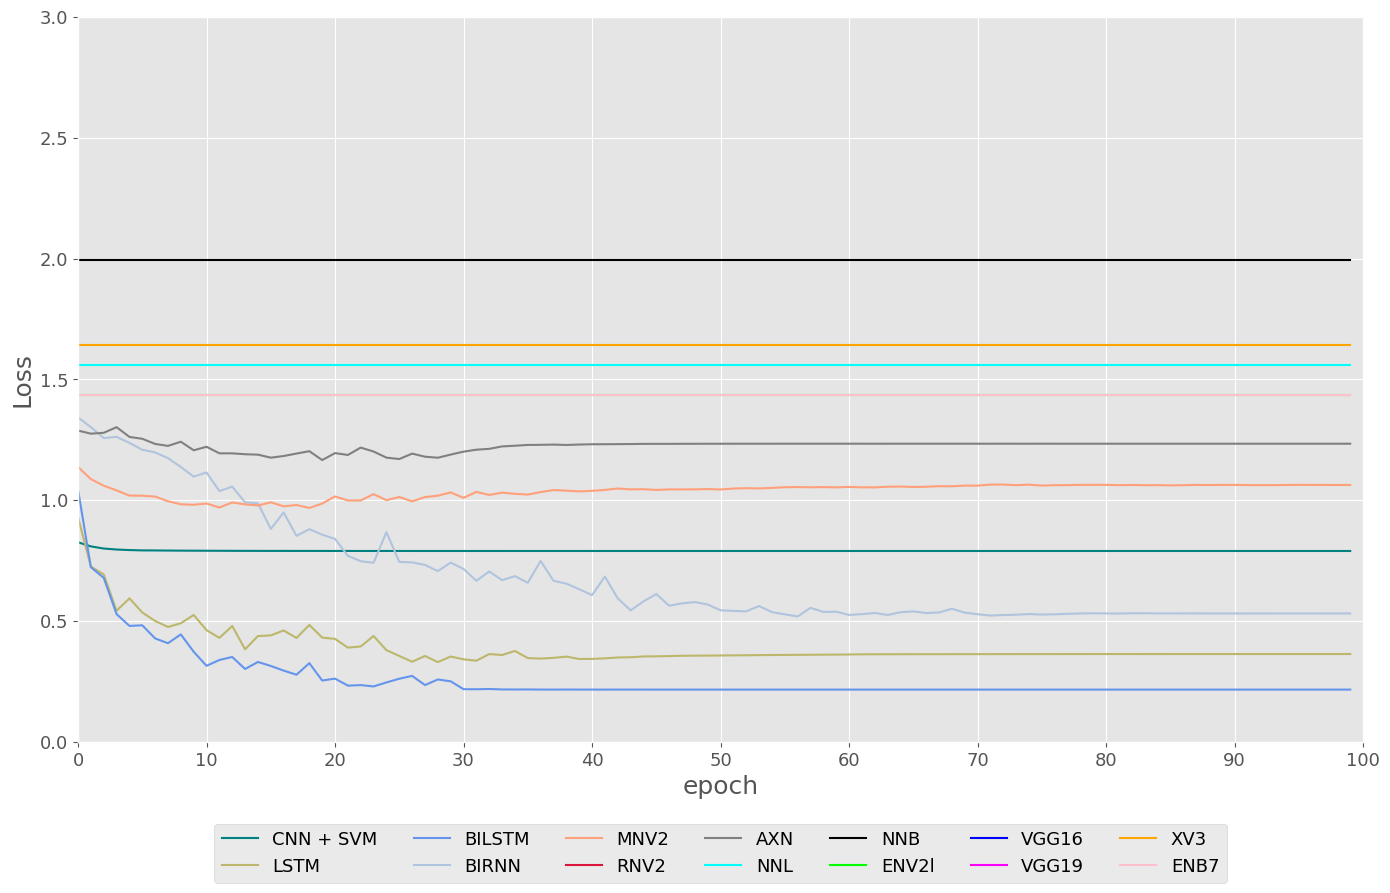

In [122]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(14,9))
plt.plot(test_loss_cnn_svm_n,label='CNN + SVM',color='teal')
plt.plot(test_loss_lstm_n,label='LSTM',color='darkkhaki')
plt.plot(test_loss_bilstm_n,label='BILSTM',color='cornflowerblue')#,linewidth=4,linestyle='--')
plt.plot(test_loss_birnn_n,label='BIRNN',color='lightsteelblue')
plt.plot(test_loss_mnv2_n,label='MNV2',color = 'lightsalmon')
plt.plot(test_loss_rnv2_n,label='RNV2',color='crimson')
plt.plot(test_loss_axn_n,label='AXN',color='gray')
plt.plot(test_loss_nnl_n,label='NNL',color='cyan')
plt.plot(test_loss_nnb_n,label='NNB',color='black')
plt.plot(test_loss_env2l_n,label='ENV2l',color='lime')
plt.plot(test_loss_vgg16_n,label='VGG16',color='blue')
plt.plot(test_loss_vgg19_n,label='VGG19',color='fuchsia')
plt.plot(test_loss_xv3_n,label='XV3',color='orange')
plt.plot(test_loss_enb7_n,label='ENB7',color='pink')

plt.xlabel("epoch",fontsize = 18)
plt.xticks(np.arange(0, 101, 10), np.arange(0, 101, 10))
plt.xlim(0, 100)
plt.ylim(y.min(),y.max())
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)
plt.ylabel("Loss",fontsize = 18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=7,fontsize="13")
plt.tight_layout()
plt.savefig("Testing Loss Performance")
plt.show()